In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from arch import arch_model
import datetime as dt
import arch.data.sp500

In [3]:
data = arch.data.sp500.load()
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()

In [11]:
data

Open         High          Low        Close    Adj Close  \
Date                                                                          
1999-01-04  1229.229980  1248.810059  1219.099976  1228.099976  1228.099976   
1999-01-05  1228.099976  1246.109985  1228.099976  1244.780029  1244.780029   
1999-01-06  1244.780029  1272.500000  1244.780029  1272.339966  1272.339966   
1999-01-07  1272.339966  1272.339966  1257.680054  1269.729980  1269.729980   
1999-01-08  1269.729980  1278.239990  1261.819946  1275.089966  1275.089966   
...                 ...          ...          ...          ...          ...   
2018-12-24  2400.560059  2410.340088  2351.100098  2351.100098  2351.100098   
2018-12-26  2363.120117  2467.760010  2346.580078  2467.699951  2467.699951   
2018-12-27  2442.500000  2489.100098  2397.939941  2488.830078  2488.830078   
2018-12-28  2498.770020  2520.270020  2472.889893  2485.739990  2485.739990   
2018-12-31  2498.939941  2509.239990  2482.820068  2506.850098  2506.850098   

                Volume  
Date                    
1999-01-04   877000000  
1999-01-05   775000000  
1999-01-06   986900000  
1999-01-07   863000000  
1999-01-08   937800000  
...                ...  
2018-12-24  2613930000  
2018-12-26  4233990000  
2018-12-27  4096610000  
2018-12-28  3702620000  
2018-12-31  3442870000  

[5031 rows x 6 columns]

In [4]:
returns

Date
1999-01-05    1.358200
1999-01-06    2.214041
1999-01-07   -0.205133
1999-01-08    0.422136
1999-01-11   -0.879151
                ...   
2018-12-24   -2.711225
2018-12-26    4.959374
2018-12-27    0.856268
2018-12-28   -0.124158
2018-12-31    0.849248
Name: Adj Close, Length: 5030, dtype: float64

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2188.0776772285362
Iteration:      2,   Func. Count:     14,   Neg. LLF: 131.69936494989773
Iteration:      3,   Func. Count:     19,   Neg. LLF: 131.6846037630268
Iteration:      4,   Func. Count:     24,   Neg. LLF: 131.67803277275723
Iteration:      5,   Func. Count:     29,   Neg. LLF: 131.44693796443485
Iteration:      6,   Func. Count:     34,   Neg. LLF: 133.3623624385277
Iteration:      7,   Func. Count:     41,   Neg. LLF: 131.44635367266775
Iteration:      8,   Func. Count:     45,   Neg. LLF: 131.44635367257686
Optimization terminated successfully    (Exit mode 0)
            Current function value: 131.44635367266775
            Iterations: 8
            Function evaluations: 45
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39095724.99021311
Iteration:      2,   Func. Count:     14,   Neg. LLF: 131.31314464264216
Iteration:      3,   Func. Count:     19,   Neg. LLF: 131.3064331

Iteration:      1,   Func. Count:      6,   Neg. LLF: 223.53557029118008
Iteration:      2,   Func. Count:     13,   Neg. LLF: 128.12064116442696
Iteration:      3,   Func. Count:     18,   Neg. LLF: 128.11327249583644
Iteration:      4,   Func. Count:     23,   Neg. LLF: 128.11512959841292
Iteration:      5,   Func. Count:     29,   Neg. LLF: 128.10315790902422
Iteration:      6,   Func. Count:     34,   Neg. LLF: 128.10293599870698
Iteration:      7,   Func. Count:     39,   Neg. LLF: 128.10291351991094
Iteration:      8,   Func. Count:     44,   Neg. LLF: 128.10278274544166
Iteration:      9,   Func. Count:     49,   Neg. LLF: 128.10209571362873
Iteration:     10,   Func. Count:     54,   Neg. LLF: 128.09886972024051
Iteration:     11,   Func. Count:     59,   Neg. LLF: 128.09882694622684
Iteration:     12,   Func. Count:     64,   Neg. LLF: 128.09876836404305
Iteration:     13,   Func. Count:     69,   Neg. LLF: 128.0987636738956
Iteration:     14,   Func. Count:     74,   Neg. LLF

Iteration:      1,   Func. Count:      6,   Neg. LLF: 41885362.68136545
Iteration:      2,   Func. Count:     14,   Neg. LLF: 131.57359946920573
Iteration:      3,   Func. Count:     20,   Neg. LLF: 129.94606383081702
Iteration:      4,   Func. Count:     26,   Neg. LLF: 129.34772766105095
Iteration:      5,   Func. Count:     31,   Neg. LLF: 130.00608697220952
Iteration:      6,   Func. Count:     37,   Neg. LLF: 130.51579819942137
Iteration:      7,   Func. Count:     46,   Neg. LLF: 129.17472429224918
Iteration:      8,   Func. Count:     51,   Neg. LLF: 129.16953582265455
Iteration:      9,   Func. Count:     56,   Neg. LLF: 129.16918116073967
Iteration:     10,   Func. Count:     61,   Neg. LLF: 129.16901380280765
Iteration:     11,   Func. Count:     66,   Neg. LLF: 129.16901147721637
Iteration:     12,   Func. Count:     71,   Neg. LLF: 129.16901069714322
Optimization terminated successfully    (Exit mode 0)
            Current function value: 129.16901069714322
            Iter

Iteration:      1,   Func. Count:      6,   Neg. LLF: 127.16697552503663
Iteration:      2,   Func. Count:     12,   Neg. LLF: 126.78043265580308
Iteration:      3,   Func. Count:     17,   Neg. LLF: 126.87755016367346
Iteration:      4,   Func. Count:     24,   Neg. LLF: 126.78032831494308
Iteration:      5,   Func. Count:     29,   Neg. LLF: 126.77972780802277
Iteration:      6,   Func. Count:     34,   Neg. LLF: 126.77950463217294
Iteration:      7,   Func. Count:     40,   Neg. LLF: 127.14475916063972
Iteration:      8,   Func. Count:     46,   Neg. LLF: 126.98036716986877
Iteration:      9,   Func. Count:     52,   Neg. LLF: 126.78573787564639
Iteration:     10,   Func. Count:     58,   Neg. LLF: 126.77479688339238
Iteration:     11,   Func. Count:     64,   Neg. LLF: 126.77433683084291
Iteration:     12,   Func. Count:     70,   Neg. LLF: 126.77430456991442
Optimization terminated successfully    (Exit mode 0)
            Current function value: 126.77430456991442
            Ite

Iteration:      1,   Func. Count:      6,   Neg. LLF: 251.91788947928592
Iteration:      2,   Func. Count:     14,   Neg. LLF: 124.25370795932511
Iteration:      3,   Func. Count:     19,   Neg. LLF: 124.25582510298547
Iteration:      4,   Func. Count:     25,   Neg. LLF: 124.79790627397621
Iteration:      5,   Func. Count:     31,   Neg. LLF: 124.48789417689984
Iteration:      6,   Func. Count:     37,   Neg. LLF: 124.34972915938634
Iteration:      7,   Func. Count:     43,   Neg. LLF: 124.22978002389361
Iteration:      8,   Func. Count:     48,   Neg. LLF: 124.22797315898497
Iteration:      9,   Func. Count:     53,   Neg. LLF: 124.22712299508325
Iteration:     10,   Func. Count:     58,   Neg. LLF: 124.22714299739525
Iteration:     11,   Func. Count:     64,   Neg. LLF: 124.22685992809458
Iteration:     12,   Func. Count:     69,   Neg. LLF: 124.2268016249586
Optimization terminated successfully    (Exit mode 0)
            Current function value: 124.22680162535657
            Iter

Iteration:      5,   Func. Count:     30,   Neg. LLF: 119.74476926760848
Iteration:      6,   Func. Count:     35,   Neg. LLF: 119.7406661595613
Iteration:      7,   Func. Count:     40,   Neg. LLF: 119.71675514972458
Iteration:      8,   Func. Count:     45,   Neg. LLF: 119.7406273429128
Iteration:      9,   Func. Count:     53,   Neg. LLF: 119.44780602694127
Iteration:     10,   Func. Count:     58,   Neg. LLF: 119.45075909089036
Iteration:     11,   Func. Count:     64,   Neg. LLF: 119.33511510358841
Iteration:     12,   Func. Count:     69,   Neg. LLF: 119.33457802936283
Iteration:     13,   Func. Count:     74,   Neg. LLF: 119.33442562329563
Iteration:     14,   Func. Count:     78,   Neg. LLF: 119.3344256234013
Optimization terminated successfully    (Exit mode 0)
            Current function value: 119.33442562329563
            Iterations: 14
            Function evaluations: 78
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 129.72915

Iteration:      5,   Func. Count:     31,   Neg. LLF: 117.7888563555297
Iteration:      6,   Func. Count:     36,   Neg. LLF: 117.78874908531122
Iteration:      7,   Func. Count:     40,   Neg. LLF: 117.78874908478414
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.78874908531122
            Iterations: 7
            Function evaluations: 40
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38860686.51793522
Iteration:      2,   Func. Count:     13,   Neg. LLF: 119.25697170356682
Iteration:      3,   Func. Count:     19,   Neg. LLF: 117.89040160214594
Iteration:      4,   Func. Count:     24,   Neg. LLF: 118.81586894540379
Iteration:      5,   Func. Count:     30,   Neg. LLF: 117.35569008602612
Iteration:      6,   Func. Count:     35,   Neg. LLF: 117.35465365504945
Iteration:      7,   Func. Count:     40,   Neg. LLF: 117.35463315151728
Iteration:      8,   Func. Count:     44,   Neg. LLF: 117.354633

Iteration:      6,   Func. Count:     36,   Neg. LLF: 117.18354804631295
Iteration:      7,   Func. Count:     41,   Neg. LLF: 117.18321323219978
Iteration:      8,   Func. Count:     46,   Neg. LLF: 117.18313880449682
Iteration:      9,   Func. Count:     51,   Neg. LLF: 117.1830609319639
Iteration:     10,   Func. Count:     56,   Neg. LLF: 117.1830427917737
Iteration:     11,   Func. Count:     61,   Neg. LLF: 117.18304092816652
Iteration:     12,   Func. Count:     65,   Neg. LLF: 117.18304092869474
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.18304092816652
            Iterations: 12
            Function evaluations: 65
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42256612.45033603
Iteration:      2,   Func. Count:     14,   Neg. LLF: 119.25538680245076
Iteration:      3,   Func. Count:     20,   Neg. LLF: 118.6885005625449
Iteration:      4,   Func. Count:     26,   Neg. LLF: 118.481368

Iteration:      3,   Func. Count:     21,   Neg. LLF: 121.79475190025781
Iteration:      4,   Func. Count:     27,   Neg. LLF: 121.55889279526475
Iteration:      5,   Func. Count:     32,   Neg. LLF: 121.55817506796853
Iteration:      6,   Func. Count:     37,   Neg. LLF: 121.55810635005554
Iteration:      7,   Func. Count:     43,   Neg. LLF: 121.5579122037704
Iteration:      8,   Func. Count:     47,   Neg. LLF: 121.55791220367695
Optimization terminated successfully    (Exit mode 0)
            Current function value: 121.5579122037704
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 51930768.97220558
Iteration:      2,   Func. Count:     14,   Neg. LLF: 132.88244534929953
Iteration:      3,   Func. Count:     21,   Neg. LLF: 122.88334920414759
Iteration:      4,   Func. Count:     27,   Neg. LLF: 121.53705049311071
Iteration:      5,   Func. Count:     32,   Neg. LLF: 121.5647310

Iteration:      1,   Func. Count:      6,   Neg. LLF: 143.6202400540119
Iteration:      2,   Func. Count:     13,   Neg. LLF: 118.09163051140426
Iteration:      3,   Func. Count:     19,   Neg. LLF: 117.77544991968381
Iteration:      4,   Func. Count:     24,   Neg. LLF: 117.77515718058082
Iteration:      5,   Func. Count:     29,   Neg. LLF: 117.77509564385193
Iteration:      6,   Func. Count:     34,   Neg. LLF: 117.77460381522928
Iteration:      7,   Func. Count:     39,   Neg. LLF: 117.7665654500291
Iteration:      8,   Func. Count:     44,   Neg. LLF: 117.76593050966352
Iteration:      9,   Func. Count:     49,   Neg. LLF: 117.76590028944162
Iteration:     10,   Func. Count:     54,   Neg. LLF: 117.76586967591564
Iteration:     11,   Func. Count:     59,   Neg. LLF: 117.76586194142907
Iteration:     12,   Func. Count:     64,   Neg. LLF: 117.76586090194431
Iteration:     13,   Func. Count:     68,   Neg. LLF: 117.76586090243589
Optimization terminated successfully    (Exit mode 0)

Iteration:      4,   Func. Count:     25,   Neg. LLF: 117.50009456549631
Iteration:      5,   Func. Count:     30,   Neg. LLF: 117.50007491848785
Iteration:      6,   Func. Count:     35,   Neg. LLF: 117.50006397923616
Iteration:      7,   Func. Count:     40,   Neg. LLF: 117.50006083075709
Iteration:      8,   Func. Count:     44,   Neg. LLF: 117.50006083084529
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.50006083075709
            Iterations: 8
            Function evaluations: 44
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 292.6381984539781
Iteration:      2,   Func. Count:     15,   Neg. LLF: 129.2323092182691
Iteration:      3,   Func. Count:     22,   Neg. LLF: 118.71501227623652
Iteration:      4,   Func. Count:     27,   Neg. LLF: 118.6227613653603
Iteration:      5,   Func. Count:     32,   Neg. LLF: 118.61991532634583
Iteration:      6,   Func. Count:     37,   Neg. LLF: 118.6198224

Iteration:      3,   Func. Count:     25,   Neg. LLF: 123.24577793325363
Iteration:      4,   Func. Count:     30,   Neg. LLF: 122.96222654294229
Iteration:      5,   Func. Count:     35,   Neg. LLF: 122.92152983925746
Iteration:      6,   Func. Count:     40,   Neg. LLF: 122.9175665646311
Iteration:      7,   Func. Count:     45,   Neg. LLF: 122.91753167701515
Iteration:      8,   Func. Count:     49,   Neg. LLF: 122.91753188237261
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.91753167701515
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 312.632640034464
Iteration:      2,   Func. Count:     15,   Neg. LLF: 145.9417316394456
Iteration:      3,   Func. Count:     22,   Neg. LLF: 121.8990556315214
Iteration:      4,   Func. Count:     27,   Neg. LLF: 220.2887141606319
Iteration:      5,   Func. Count:     34,   Neg. LLF: 121.8042102273

Iteration:      7,   Func. Count:     42,   Neg. LLF: 128.39970336030353
Iteration:      8,   Func. Count:     47,   Neg. LLF: 128.39969994022096
Iteration:      9,   Func. Count:     51,   Neg. LLF: 128.39970006419918
Optimization terminated successfully    (Exit mode 0)
            Current function value: 128.39969994022096
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 302.959742245817
Iteration:      2,   Func. Count:     15,   Neg. LLF: 136.41485612407612
Iteration:      3,   Func. Count:     22,   Neg. LLF: 128.64796736376022
Iteration:      4,   Func. Count:     27,   Neg. LLF: 128.44585694567508
Iteration:      5,   Func. Count:     32,   Neg. LLF: 128.43223446357635
Iteration:      6,   Func. Count:     37,   Neg. LLF: 128.43005252577186
Iteration:      7,   Func. Count:     42,   Neg. LLF: 128.4300150586769
Iteration:      8,   Func. Count:     47,   Neg. LLF: 128.4300103

Iteration:      1,   Func. Count:      6,   Neg. LLF: 302.87314802550736
Iteration:      2,   Func. Count:     15,   Neg. LLF: 127.85013491366877
Iteration:      3,   Func. Count:     21,   Neg. LLF: 128.0450970538072
Iteration:      4,   Func. Count:     27,   Neg. LLF: 127.04247499558477
Iteration:      5,   Func. Count:     32,   Neg. LLF: 127.19374667228556
Iteration:      6,   Func. Count:     38,   Neg. LLF: 127.03656369716698
Iteration:      7,   Func. Count:     43,   Neg. LLF: 127.02536395169899
Iteration:      8,   Func. Count:     48,   Neg. LLF: 127.02346014786039
Iteration:      9,   Func. Count:     53,   Neg. LLF: 127.02313760404128
Iteration:     10,   Func. Count:     58,   Neg. LLF: 127.02311755449736
Iteration:     11,   Func. Count:     62,   Neg. LLF: 127.02311755436638
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.02311755449736
            Iterations: 11
            Function evaluations: 62
            Gradient eval

Iteration:      1,   Func. Count:      6,   Neg. LLF: 175.64445017576065
Iteration:      2,   Func. Count:     13,   Neg. LLF: 127.1988664515067
Iteration:      3,   Func. Count:     19,   Neg. LLF: 127.09581896373426
Iteration:      4,   Func. Count:     24,   Neg. LLF: 127.0955000498378
Iteration:      5,   Func. Count:     29,   Neg. LLF: 127.09532607248975
Iteration:      6,   Func. Count:     34,   Neg. LLF: 127.09519149277904
Iteration:      7,   Func. Count:     39,   Neg. LLF: 127.09495753858803
Iteration:      8,   Func. Count:     44,   Neg. LLF: 127.0948667116497
Iteration:      9,   Func. Count:     49,   Neg. LLF: 127.09485910594827
Iteration:     10,   Func. Count:     53,   Neg. LLF: 127.09485910598625
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.09485910594827
            Iterations: 10
            Function evaluations: 53
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 243.77111

Iteration:      1,   Func. Count:      6,   Neg. LLF: 42913139.086766005
Iteration:      2,   Func. Count:     14,   Neg. LLF: 9530.393168718805
Iteration:      3,   Func. Count:     21,   Neg. LLF: 122.80955651106464
Iteration:      4,   Func. Count:     27,   Neg. LLF: 122.41820117060604
Iteration:      5,   Func. Count:     32,   Neg. LLF: 122.28930478563552
Iteration:      6,   Func. Count:     37,   Neg. LLF: 122.25941401635978
Iteration:      7,   Func. Count:     43,   Neg. LLF: 121.92968235056766
Iteration:      8,   Func. Count:     48,   Neg. LLF: 121.72052266255182
Iteration:      9,   Func. Count:     53,   Neg. LLF: 121.67756056981203
Iteration:     10,   Func. Count:     58,   Neg. LLF: 121.64049000156388
Iteration:     11,   Func. Count:     63,   Neg. LLF: 123.30063625153306
Iteration:     12,   Func. Count:     70,   Neg. LLF: 124.53681420631787
Iteration:     13,   Func. Count:     78,   Neg. LLF: 121.64006991578572
Iteration:     14,   Func. Count:     82,   Neg. LLF

Iteration:      1,   Func. Count:      6,   Neg. LLF: 41792158.873672605
Iteration:      2,   Func. Count:     15,   Neg. LLF: 125.96916120820723
Iteration:      3,   Func. Count:     21,   Neg. LLF: 124.62284275323378
Iteration:      4,   Func. Count:     26,   Neg. LLF: 124.56346469955078
Iteration:      5,   Func. Count:     31,   Neg. LLF: 124.51667277299254
Iteration:      6,   Func. Count:     36,   Neg. LLF: 124.55638330660157
Iteration:      7,   Func. Count:     43,   Neg. LLF: 124.71688432210986
Iteration:      8,   Func. Count:     49,   Neg. LLF: 124.34226599744572
Iteration:      9,   Func. Count:     54,   Neg. LLF: 124.32025223907391
Iteration:     10,   Func. Count:     59,   Neg. LLF: 124.31874063522788
Iteration:     11,   Func. Count:     64,   Neg. LLF: 124.3186032184035
Iteration:     12,   Func. Count:     69,   Neg. LLF: 124.31859704811984
Iteration:     13,   Func. Count:     74,   Neg. LLF: 124.31859464370916
Iteration:     14,   Func. Count:     78,   Neg. LLF

Iteration:      1,   Func. Count:      6,   Neg. LLF: 45493515.447433785
Iteration:      2,   Func. Count:     14,   Neg. LLF: 124.6476883820287
Iteration:      3,   Func. Count:     20,   Neg. LLF: 124.75281742739482
Iteration:      4,   Func. Count:     26,   Neg. LLF: 124.5104337256341
Iteration:      5,   Func. Count:     32,   Neg. LLF: 124.13570265672608
Iteration:      6,   Func. Count:     38,   Neg. LLF: 125.00062159326536
Iteration:      7,   Func. Count:     44,   Neg. LLF: 193.1529621215294
Iteration:      8,   Func. Count:     53,   Neg. LLF: 411.0724988869069
Iteration:      9,   Func. Count:     61,   Neg. LLF: 123.87947903275428
Iteration:     10,   Func. Count:     66,   Neg. LLF: 123.75509772008591
Iteration:     11,   Func. Count:     71,   Neg. LLF: 123.76703147201604
Iteration:     12,   Func. Count:     77,   Neg. LLF: 123.75168992223647
Iteration:     13,   Func. Count:     83,   Neg. LLF: 123.75123538572169
Iteration:     14,   Func. Count:     87,   Neg. LLF: 1

Iteration:      1,   Func. Count:      6,   Neg. LLF: 54282046.97762852
Iteration:      2,   Func. Count:     13,   Neg. LLF: 135.02198020355854
Iteration:      3,   Func. Count:     20,   Neg. LLF: 128.69215048815047
Iteration:      4,   Func. Count:     25,   Neg. LLF: 129.05397756286823
Iteration:      5,   Func. Count:     31,   Neg. LLF: 128.7100236317233
Iteration:      6,   Func. Count:     37,   Neg. LLF: 128.67271491506656
Iteration:      7,   Func. Count:     42,   Neg. LLF: 128.67269004720913
Iteration:      8,   Func. Count:     46,   Neg. LLF: 128.67269004754547
Optimization terminated successfully    (Exit mode 0)
            Current function value: 128.67269004720913
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 48082104.71877182
Iteration:      2,   Func. Count:     13,   Neg. LLF: 129.46517259444585
Iteration:      3,   Func. Count:     20,   Neg. LLF: 128.0198206

Iteration:      8,   Func. Count:     48,   Neg. LLF: 141.357521661533
Iteration:      9,   Func. Count:     54,   Neg. LLF: 137.23263024573785
Iteration:     10,   Func. Count:     60,   Neg. LLF: 128.37555467913705
Iteration:     11,   Func. Count:     66,   Neg. LLF: 127.53332235610966
Iteration:     12,   Func. Count:     72,   Neg. LLF: 133.33332104502455
Iteration:     13,   Func. Count:     78,   Neg. LLF: 125.4227758602874
Iteration:     14,   Func. Count:     84,   Neg. LLF: 125.41913837433302
Iteration:     15,   Func. Count:     89,   Neg. LLF: 125.41884925089246
Iteration:     16,   Func. Count:     94,   Neg. LLF: 125.41866269004294
Iteration:     17,   Func. Count:     99,   Neg. LLF: 125.41865923078919
Iteration:     18,   Func. Count:    104,   Neg. LLF: 125.418658071489
Iteration:     19,   Func. Count:    108,   Neg. LLF: 125.41865807149293
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.418658071489
            Iterations

Iteration:      1,   Func. Count:      6,   Neg. LLF: 315.8873211145463
Iteration:      2,   Func. Count:     15,   Neg. LLF: 143.94827219582726
Iteration:      3,   Func. Count:     22,   Neg. LLF: 124.56687961943152
Iteration:      4,   Func. Count:     27,   Neg. LLF: 124.69088666774758
Iteration:      5,   Func. Count:     33,   Neg. LLF: 124.55228305785057
Iteration:      6,   Func. Count:     38,   Neg. LLF: 124.55181687712572
Iteration:      7,   Func. Count:     43,   Neg. LLF: 150.34623083842015
Optimization terminated successfully    (Exit mode 0)
            Current function value: 124.55181666651596
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 318.0851003150649
Iteration:      2,   Func. Count:     15,   Neg. LLF: 143.61416981571122
Iteration:      3,   Func. Count:     22,   Neg. LLF: 126.56091872902083
Iteration:      4,   Func. Count:     27,   Neg. LLF: 126.794902

Iteration:      1,   Func. Count:      6,   Neg. LLF: 329.3426372176687
Iteration:      2,   Func. Count:     18,   Neg. LLF: 253.01704992247025
Iteration:      3,   Func. Count:     26,   Neg. LLF: 178.5151292024376
Iteration:      4,   Func. Count:     33,   Neg. LLF: 137.13031716163212
Iteration:      5,   Func. Count:     38,   Neg. LLF: 137.60935642582564
Iteration:      6,   Func. Count:     44,   Neg. LLF: 136.55811823616654
Iteration:      7,   Func. Count:     49,   Neg. LLF: 136.5139041680872
Iteration:      8,   Func. Count:     54,   Neg. LLF: 136.5128726239818
Iteration:      9,   Func. Count:     59,   Neg. LLF: 136.5128456587818
Iteration:     10,   Func. Count:     63,   Neg. LLF: 136.5128461334089
Optimization terminated successfully    (Exit mode 0)
            Current function value: 136.5128456587818
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 329.965790283

Iteration:      7,   Func. Count:     45,   Neg. LLF: 139.07366392042866
Iteration:      8,   Func. Count:     50,   Neg. LLF: 139.06944354061784
Iteration:      9,   Func. Count:     55,   Neg. LLF: 139.06924650639064
Iteration:     10,   Func. Count:     60,   Neg. LLF: 139.06923438767535
Iteration:     11,   Func. Count:     64,   Neg. LLF: 139.06923438792427
Optimization terminated successfully    (Exit mode 0)
            Current function value: 139.06923438767535
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 311.7265130662693
Iteration:      2,   Func. Count:     15,   Neg. LLF: 139.94759008847655
Iteration:      3,   Func. Count:     21,   Neg. LLF: 139.8470236140526
Iteration:      4,   Func. Count:     27,   Neg. LLF: 140.16917345787684
Iteration:      5,   Func. Count:     33,   Neg. LLF: 139.98330812438024
Iteration:      6,   Func. Count:     39,   Neg. LLF: 139.6790

Iteration:      6,   Func. Count:     35,   Neg. LLF: 151.85245724417695
Iteration:      7,   Func. Count:     40,   Neg. LLF: 151.8523823491499
Iteration:      8,   Func. Count:     45,   Neg. LLF: 151.85237200576347
Iteration:      9,   Func. Count:     49,   Neg. LLF: 151.8523720114905
Optimization terminated successfully    (Exit mode 0)
            Current function value: 151.85237200576347
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 160.80621021360042
Iteration:      2,   Func. Count:     13,   Neg. LLF: 179.83889153549205
Iteration:      3,   Func. Count:     20,   Neg. LLF: 154.37213170073386
Iteration:      4,   Func. Count:     25,   Neg. LLF: 155.1511720085822
Iteration:      5,   Func. Count:     31,   Neg. LLF: 154.3048564651482
Iteration:      6,   Func. Count:     36,   Neg. LLF: 154.30058334629922
Iteration:      7,   Func. Count:     41,   Neg. LLF: 154.30035760

Iteration:      6,   Func. Count:     35,   Neg. LLF: 151.16986035577173
Iteration:      7,   Func. Count:     40,   Neg. LLF: 151.1696019909303
Iteration:      8,   Func. Count:     45,   Neg. LLF: 151.1695706987002
Iteration:      9,   Func. Count:     50,   Neg. LLF: 151.16956912994476
Iteration:     10,   Func. Count:     54,   Neg. LLF: 151.16956912994482
Optimization terminated successfully    (Exit mode 0)
            Current function value: 151.16956912994476
            Iterations: 10
            Function evaluations: 54
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 247.79966337608397
Iteration:      2,   Func. Count:     13,   Neg. LLF: 159.5843229801792
Iteration:      3,   Func. Count:     19,   Neg. LLF: 153.42513035485646
Iteration:      4,   Func. Count:     25,   Neg. LLF: 151.79849102581923
Iteration:      5,   Func. Count:     30,   Neg. LLF: 151.75995033421742
Iteration:      6,   Func. Count:     35,   Neg. LLF: 151.75598

Iteration:      1,   Func. Count:      6,   Neg. LLF: 243.5344509264601
Iteration:      2,   Func. Count:     13,   Neg. LLF: 153.60622806756368
Iteration:      3,   Func. Count:     19,   Neg. LLF: 152.31192628406112
Iteration:      4,   Func. Count:     25,   Neg. LLF: 152.09064959621463
Iteration:      5,   Func. Count:     31,   Neg. LLF: 152.08235451655497
Iteration:      6,   Func. Count:     36,   Neg. LLF: 152.08153959040988
Iteration:      7,   Func. Count:     41,   Neg. LLF: 152.081376967825
Iteration:      8,   Func. Count:     46,   Neg. LLF: 152.0813696955527
Iteration:      9,   Func. Count:     50,   Neg. LLF: 152.081369695573
Optimization terminated successfully    (Exit mode 0)
            Current function value: 152.0813696955527
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 243.8328249849063
Iteration:      2,   Func. Count:     13,   Neg. LLF: 153.874314435807

Iteration:      2,   Func. Count:     13,   Neg. LLF: 161.14040126931997
Iteration:      3,   Func. Count:     20,   Neg. LLF: 157.00536033457735
Iteration:      4,   Func. Count:     27,   Neg. LLF: 151.63034827403527
Iteration:      5,   Func. Count:     33,   Neg. LLF: 151.62857936550608
Iteration:      6,   Func. Count:     37,   Neg. LLF: 151.62857936555673
Optimization terminated successfully    (Exit mode 0)
            Current function value: 151.62857936550608
            Iterations: 6
            Function evaluations: 37
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 178.93924784479077
Iteration:      2,   Func. Count:     13,   Neg. LLF: 162.89587007618016
Iteration:      3,   Func. Count:     20,   Neg. LLF: 157.0356570152125
Iteration:      4,   Func. Count:     27,   Neg. LLF: 151.6712112392602
Iteration:      5,   Func. Count:     33,   Neg. LLF: 151.6690765752493
Iteration:      6,   Func. Count:     38,   Neg. LLF: 151.6690760

Iteration:      7,   Func. Count:     42,   Neg. LLF: 148.92086026540682
Iteration:      8,   Func. Count:     47,   Neg. LLF: 148.9208288290394
Iteration:      9,   Func. Count:     52,   Neg. LLF: 148.9208274978721
Iteration:     10,   Func. Count:     56,   Neg. LLF: 148.92082749803146
Optimization terminated successfully    (Exit mode 0)
            Current function value: 148.9208274978721
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 247.5208162918419
Iteration:      2,   Func. Count:     12,   Neg. LLF: 171.88568960610917
Iteration:      3,   Func. Count:     19,   Neg. LLF: 152.80168552699251
Iteration:      4,   Func. Count:     25,   Neg. LLF: 148.80396497226997
Iteration:      5,   Func. Count:     31,   Neg. LLF: 149.22257801803926
Iteration:      6,   Func. Count:     37,   Neg. LLF: 147.8599951116159
Iteration:      7,   Func. Count:     43,   Neg. LLF: 147.8410259

Iteration:      7,   Func. Count:     44,   Neg. LLF: 139.31078660276583
Iteration:      8,   Func. Count:     48,   Neg. LLF: 139.31078660276805
Optimization terminated successfully    (Exit mode 0)
            Current function value: 139.31078660276583
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 235.5835045319058
Iteration:      2,   Func. Count:     14,   Neg. LLF: 724.986953458325
Iteration:      3,   Func. Count:     21,   Neg. LLF: 166.8163161634413
Iteration:      4,   Func. Count:     27,   Neg. LLF: 144.2734612919683
Iteration:      5,   Func. Count:     34,   Neg. LLF: 139.587896232801
Iteration:      6,   Func. Count:     39,   Neg. LLF: 139.58789028707045
Iteration:      7,   Func. Count:     44,   Neg. LLF: 139.58788937481646
Optimization terminated successfully    (Exit mode 0)
            Current function value: 139.58788937481646
            Iterations: 7
       

Iteration:     12,   Func. Count:     71,   Neg. LLF: 137.19588348031627
Iteration:     13,   Func. Count:     76,   Neg. LLF: 137.19586440175107
Iteration:     14,   Func. Count:     81,   Neg. LLF: 137.19586237678897
Iteration:     15,   Func. Count:     85,   Neg. LLF: 137.1958623767694
Optimization terminated successfully    (Exit mode 0)
            Current function value: 137.19586237678897
            Iterations: 15
            Function evaluations: 85
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 104624849.72179545
Iteration:      2,   Func. Count:     13,   Neg. LLF: 180.95144104736306
Iteration:      3,   Func. Count:     20,   Neg. LLF: 144.72984512741937
Iteration:      4,   Func. Count:     26,   Neg. LLF: 143.65719082084695
Iteration:      5,   Func. Count:     32,   Neg. LLF: 145.12877373760588
Iteration:      6,   Func. Count:     38,   Neg. LLF: 142.53070015448037
Iteration:      7,   Func. Count:     44,   Neg. LLF: 140.833

Iteration:      5,   Func. Count:     33,   Neg. LLF: 125.26446774416675
Iteration:      6,   Func. Count:     38,   Neg. LLF: 125.26443599181037
Iteration:      7,   Func. Count:     42,   Neg. LLF: 125.26443599149437
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.26443599181037
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38871950.728909194
Iteration:      2,   Func. Count:     13,   Neg. LLF: 132.71247240472204
Iteration:      3,   Func. Count:     19,   Neg. LLF: 125.80393713563504
Iteration:      4,   Func. Count:     24,   Neg. LLF: 126.5179223626344
Iteration:      5,   Func. Count:     30,   Neg. LLF: 125.46478306976454
Iteration:      6,   Func. Count:     35,   Neg. LLF: 125.46476845787438
Iteration:      7,   Func. Count:     39,   Neg. LLF: 125.4647684576762
Optimization terminated successfully    (Exit mode 0)
          

Iteration:      1,   Func. Count:      6,   Neg. LLF: 45466513.31023231
Iteration:      2,   Func. Count:     13,   Neg. LLF: 140.3802202596648
Iteration:      3,   Func. Count:     19,   Neg. LLF: 125.59375001792739
Iteration:      4,   Func. Count:     25,   Neg. LLF: 116.85659545245201
Iteration:      5,   Func. Count:     30,   Neg. LLF: 120.95043885073146
Iteration:      6,   Func. Count:     36,   Neg. LLF: 116.4016883993092
Iteration:      7,   Func. Count:     41,   Neg. LLF: 116.40157361798529
Iteration:      8,   Func. Count:     45,   Neg. LLF: 116.40157361845215
Optimization terminated successfully    (Exit mode 0)
            Current function value: 116.40157361798529
            Iterations: 8
            Function evaluations: 45
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47794606.51369254
Iteration:      2,   Func. Count:     13,   Neg. LLF: 172.737953993412
Iteration:      3,   Func. Count:     19,   Neg. LLF: 137.1602072124

Iteration:      1,   Func. Count:      6,   Neg. LLF: 186831634.13845402
Iteration:      2,   Func. Count:     13,   Neg. LLF: 925862646.559387
Iteration:      3,   Func. Count:     21,   Neg. LLF: 115.19495117848693
Iteration:      4,   Func. Count:     29,   Neg. LLF: 120.5236080428183
Iteration:      5,   Func. Count:     35,   Neg. LLF: 123.11897324302419
Iteration:      6,   Func. Count:     41,   Neg. LLF: 124.72805386602535
Iteration:      7,   Func. Count:     47,   Neg. LLF: 121.50879616753134
Iteration:      8,   Func. Count:     53,   Neg. LLF: 118.66294014509288
Iteration:      9,   Func. Count:     59,   Neg. LLF: 115.99214462507646
Iteration:     10,   Func. Count:     65,   Neg. LLF: 114.57721824581489
Iteration:     11,   Func. Count:     71,   Neg. LLF: 113.11275220388166
Iteration:     12,   Func. Count:     77,   Neg. LLF: 112.1753518939077
Iteration:     13,   Func. Count:     83,   Neg. LLF: 111.38158344852523
Iteration:     14,   Func. Count:     89,   Neg. LLF: 1

Iteration:     15,   Func. Count:     93,   Neg. LLF: 106.24387544195956
Iteration:     16,   Func. Count:     99,   Neg. LLF: 105.93884375343687
Iteration:     17,   Func. Count:    104,   Neg. LLF: 105.86606319331833
Iteration:     18,   Func. Count:    109,   Neg. LLF: 105.8439896456211
Iteration:     19,   Func. Count:    114,   Neg. LLF: 105.84156814675295
Iteration:     20,   Func. Count:    119,   Neg. LLF: 105.8413015605356
Iteration:     21,   Func. Count:    124,   Neg. LLF: 105.84129980068973
Iteration:     22,   Func. Count:    128,   Neg. LLF: 105.84129980102998
Optimization terminated successfully    (Exit mode 0)
            Current function value: 105.84129980068973
            Iterations: 22
            Function evaluations: 128
            Gradient evaluations: 22
Iteration:      1,   Func. Count:      6,   Neg. LLF: 506454940.3755269
Iteration:      2,   Func. Count:     13,   Neg. LLF: 349673554.42841077
Iteration:      3,   Func. Count:     20,   Neg. LLF: 156.2683

Iteration:      8,   Func. Count:     53,   Neg. LLF: 108729197.27866605
Iteration:      9,   Func. Count:     62,   Neg. LLF: 645.2952559027756
Iteration:     10,   Func. Count:     70,   Neg. LLF: 102.30139036544139
Iteration:     11,   Func. Count:     75,   Neg. LLF: 102.2285085323135
Iteration:     12,   Func. Count:     80,   Neg. LLF: 102.21809783038013
Iteration:     13,   Func. Count:     85,   Neg. LLF: 102.30218642585264
Iteration:     14,   Func. Count:     91,   Neg. LLF: 102.20802965337215
Iteration:     15,   Func. Count:     96,   Neg. LLF: 102.20713679447057
Iteration:     16,   Func. Count:    101,   Neg. LLF: 102.2071078018346
Iteration:     17,   Func. Count:    106,   Neg. LLF: 102.20710740186851
Optimization terminated successfully    (Exit mode 0)
            Current function value: 102.20710740186851
            Iterations: 18
            Function evaluations: 106
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      6,   Neg. LLF: 40744276

Iteration:      1,   Func. Count:      6,   Neg. LLF: 252.81989346798883
Iteration:      2,   Func. Count:     13,   Neg. LLF: 663.5411041232358
Iteration:      3,   Func. Count:     20,   Neg. LLF: 117.97621207451843
Iteration:      4,   Func. Count:     27,   Neg. LLF: 108.47206208151795
Iteration:      5,   Func. Count:     33,   Neg. LLF: 108.4632904646397
Iteration:      6,   Func. Count:     39,   Neg. LLF: 108.3656314742089
Iteration:      7,   Func. Count:     45,   Neg. LLF: 115.79395171496552
Iteration:      8,   Func. Count:     52,   Neg. LLF: 108.33072465645206
Iteration:      9,   Func. Count:     58,   Neg. LLF: 108.22618084794338
Iteration:     10,   Func. Count:     64,   Neg. LLF: 108.22323915682722
Iteration:     11,   Func. Count:     70,   Neg. LLF: 108.22301009116637
Iteration:     12,   Func. Count:     75,   Neg. LLF: 108.22294477350133
Iteration:     13,   Func. Count:     79,   Neg. LLF: 108.22294477359979
Optimization terminated successfully    (Exit mode 0)


Iteration:      9,   Func. Count:     55,   Neg. LLF: 113.00970917115072
Iteration:     10,   Func. Count:     60,   Neg. LLF: 113.00970787819713
Iteration:     11,   Func. Count:     64,   Neg. LLF: 113.00970787821235
Optimization terminated successfully    (Exit mode 0)
            Current function value: 113.00970787819713
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 299.9212947743804
Iteration:      2,   Func. Count:     14,   Neg. LLF: 517856051.723906
Iteration:      3,   Func. Count:     21,   Neg. LLF: 118.76026002892885
Iteration:      4,   Func. Count:     27,   Neg. LLF: 114.9914054440051
Iteration:      5,   Func. Count:     32,   Neg. LLF: 115.18969063201612
Iteration:      6,   Func. Count:     38,   Neg. LLF: 127.26172130650414
Iteration:      7,   Func. Count:     45,   Neg. LLF: 114.69904719656299
Iteration:      8,   Func. Count:     50,   Neg. LLF: 114.690561

Iteration:      1,   Func. Count:      6,   Neg. LLF: 259.09463806035336
Iteration:      2,   Func. Count:     17,   Neg. LLF: 263.02676344357053
Iteration:      3,   Func. Count:     24,   Neg. LLF: 198.60256459130864
Iteration:      4,   Func. Count:     31,   Neg. LLF: 119.8613186572253
Iteration:      5,   Func. Count:     37,   Neg. LLF: 121.30051090577822
Iteration:      6,   Func. Count:     44,   Neg. LLF: 119.83689037677189
Iteration:      7,   Func. Count:     49,   Neg. LLF: 119.83657706517936
Iteration:      8,   Func. Count:     54,   Neg. LLF: 119.83657604619961
Iteration:      9,   Func. Count:     58,   Neg. LLF: 119.83657604616974
Optimization terminated successfully    (Exit mode 0)
            Current function value: 119.83657604619961
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 256.4224760624285
Iteration:      2,   Func. Count:     17,   Neg. LLF: 278.889105

Iteration:      9,   Func. Count:     57,   Neg. LLF: 121.75969113034112
Optimization terminated successfully    (Exit mode 0)
            Current function value: 121.75969113045997
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 326.2330203711688
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4422.417125994329
Iteration:      3,   Func. Count:     24,   Neg. LLF: 215.21646653768562
Iteration:      4,   Func. Count:     31,   Neg. LLF: 122.11680107185603
Iteration:      5,   Func. Count:     37,   Neg. LLF: 130.08102281015294
Iteration:      6,   Func. Count:     43,   Neg. LLF: 122.01774011940849
Iteration:      7,   Func. Count:     48,   Neg. LLF: 122.01748271408722
Iteration:      8,   Func. Count:     53,   Neg. LLF: 122.01747428824169
Iteration:      9,   Func. Count:     58,   Neg. LLF: 122.01747376957506
Optimization terminated successfully    (Exit mode 0)
          

Iteration:      9,   Func. Count:     60,   Neg. LLF: 129.63802043571317
Iteration:     10,   Func. Count:     65,   Neg. LLF: 129.36921419287415
Iteration:     11,   Func. Count:     70,   Neg. LLF: 129.26031977847208
Iteration:     12,   Func. Count:     75,   Neg. LLF: 129.2525132725208
Iteration:     13,   Func. Count:     80,   Neg. LLF: 129.25202850906794
Iteration:     14,   Func. Count:     85,   Neg. LLF: 129.25194431481884
Iteration:     15,   Func. Count:     90,   Neg. LLF: 129.2519426983161
Iteration:     16,   Func. Count:     94,   Neg. LLF: 129.25194279261623
Optimization terminated successfully    (Exit mode 0)
            Current function value: 129.2519426983161
            Iterations: 16
            Function evaluations: 94
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 324.6352924488094
Iteration:      2,   Func. Count:     17,   Neg. LLF: 234.56206988183726
Iteration:      3,   Func. Count:     24,   Neg. LLF: 131.925815

Iteration:      1,   Func. Count:      6,   Neg. LLF: 314.22829238241684
Iteration:      2,   Func. Count:     15,   Neg. LLF: 138.10288190654478
Iteration:      3,   Func. Count:     20,   Neg. LLF: 142.01386262530553
Iteration:      4,   Func. Count:     26,   Neg. LLF: 142.25574189360321
Iteration:      5,   Func. Count:     33,   Neg. LLF: 139.37222669023785
Iteration:      6,   Func. Count:     39,   Neg. LLF: 138.03476416174647
Iteration:      7,   Func. Count:     45,   Neg. LLF: 137.7230257904536
Iteration:      8,   Func. Count:     50,   Neg. LLF: 137.72233221047122
Iteration:      9,   Func. Count:     55,   Neg. LLF: 137.72142128033545
Iteration:     10,   Func. Count:     60,   Neg. LLF: 137.721416353826
Iteration:     11,   Func. Count:     64,   Neg. LLF: 137.7214163538394
Optimization terminated successfully    (Exit mode 0)
            Current function value: 137.721416353826
            Iterations: 11
            Function evaluations: 64
            Gradient evaluatio

Iteration:      1,   Func. Count:      6,   Neg. LLF: 236.8411405365733
Iteration:      2,   Func. Count:     13,   Neg. LLF: 149.31940162541147
Iteration:      3,   Func. Count:     19,   Neg. LLF: 149.01684821884456
Iteration:      4,   Func. Count:     24,   Neg. LLF: 148.92823814268104
Iteration:      5,   Func. Count:     29,   Neg. LLF: 149.93404516567855
Iteration:      6,   Func. Count:     35,   Neg. LLF: 148.69280294485205
Iteration:      7,   Func. Count:     40,   Neg. LLF: 148.69069624640588
Iteration:      8,   Func. Count:     45,   Neg. LLF: 148.69061511249203
Iteration:      9,   Func. Count:     50,   Neg. LLF: 148.6905569624082
Iteration:     10,   Func. Count:     54,   Neg. LLF: 148.69055699133253
Optimization terminated successfully    (Exit mode 0)
            Current function value: 148.6905569624082
            Iterations: 10
            Function evaluations: 54
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 230.71653

Iteration:      6,   Func. Count:     37,   Neg. LLF: 147.64368022988592
Optimization terminated successfully    (Exit mode 0)
            Current function value: 147.64368022988592
            Iterations: 6
            Function evaluations: 37
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2471.7441846491547
Iteration:      2,   Func. Count:     13,   Neg. LLF: 203.13331600242844
Iteration:      3,   Func. Count:     20,   Neg. LLF: 147.62704037189056
Iteration:      4,   Func. Count:     27,   Neg. LLF: 147.27390254044812
Iteration:      5,   Func. Count:     32,   Neg. LLF: 147.27374291412406
Iteration:      6,   Func. Count:     37,   Neg. LLF: 147.27369573134496
Iteration:      7,   Func. Count:     41,   Neg. LLF: 147.27369573120953
Optimization terminated successfully    (Exit mode 0)
            Current function value: 147.27369573134496
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7


Iteration:      6,   Func. Count:     36,   Neg. LLF: 140.54707568010926
Optimization terminated successfully    (Exit mode 0)
            Current function value: 140.54707568008087
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 179.0418085010729
Iteration:      2,   Func. Count:     13,   Neg. LLF: 159.96770796555717
Iteration:      3,   Func. Count:     20,   Neg. LLF: 140.44060322863214
Iteration:      4,   Func. Count:     26,   Neg. LLF: 140.18776453910263
Iteration:      5,   Func. Count:     32,   Neg. LLF: 140.17925065493873
Iteration:      6,   Func. Count:     37,   Neg. LLF: 140.17924897861477
Iteration:      7,   Func. Count:     41,   Neg. LLF: 140.1792489786238
Optimization terminated successfully    (Exit mode 0)
            Current function value: 140.17924897861477
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
It

Iteration:      2,   Func. Count:     13,   Neg. LLF: 146.7151153817876
Iteration:      3,   Func. Count:     19,   Neg. LLF: 152.3199535451916
Iteration:      4,   Func. Count:     26,   Neg. LLF: 141.9752854655126
Iteration:      5,   Func. Count:     32,   Neg. LLF: 141.69245119754476
Iteration:      6,   Func. Count:     37,   Neg. LLF: 141.69168837143434
Iteration:      7,   Func. Count:     42,   Neg. LLF: 141.6916569742468
Iteration:      8,   Func. Count:     46,   Neg. LLF: 141.69165697427155
Optimization terminated successfully    (Exit mode 0)
            Current function value: 141.6916569742468
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 224.9386566719784
Iteration:      2,   Func. Count:     13,   Neg. LLF: 149.2823201418029
Iteration:      3,   Func. Count:     19,   Neg. LLF: 147.6843253453412
Iteration:      4,   Func. Count:     26,   Neg. LLF: 142.936999997534

Iteration:      1,   Func. Count:      6,   Neg. LLF: 562.8648267570221
Iteration:      2,   Func. Count:     13,   Neg. LLF: 18907.124729649262
Iteration:      3,   Func. Count:     19,   Neg. LLF: 149.36564097178143
Iteration:      4,   Func. Count:     26,   Neg. LLF: 148.0753566630425
Iteration:      5,   Func. Count:     32,   Neg. LLF: 146.4965594983912
Iteration:      6,   Func. Count:     37,   Neg. LLF: 146.49606697364354
Iteration:      7,   Func. Count:     42,   Neg. LLF: 146.49605918559178
Iteration:      8,   Func. Count:     46,   Neg. LLF: 146.49605918564396
Optimization terminated successfully    (Exit mode 0)
            Current function value: 146.49605918559178
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 461.07689709312365
Iteration:      2,   Func. Count:     13,   Neg. LLF: 490.51354813807046
Iteration:      3,   Func. Count:     19,   Neg. LLF: 147.7435330

Iteration:      2,   Func. Count:     13,   Neg. LLF: 1536.5418151122121
Iteration:      3,   Func. Count:     19,   Neg. LLF: 167.01131763685157
Iteration:      4,   Func. Count:     25,   Neg. LLF: 155.490869086173
Iteration:      5,   Func. Count:     31,   Neg. LLF: 149.26040294868122
Iteration:      6,   Func. Count:     37,   Neg. LLF: 149.22036150555516
Iteration:      7,   Func. Count:     42,   Neg. LLF: 149.2188320403275
Iteration:      8,   Func. Count:     47,   Neg. LLF: 149.21875203762443
Iteration:      9,   Func. Count:     52,   Neg. LLF: 149.21875059471165
Iteration:     10,   Func. Count:     56,   Neg. LLF: 149.2187505947149
Optimization terminated successfully    (Exit mode 0)
            Current function value: 149.21875059471165
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 336.1212784940337
Iteration:      2,   Func. Count:     13,   Neg. LLF: 155.4487210

Iteration:      7,   Func. Count:     47,   Neg. LLF: 144.07668722928702
Iteration:      8,   Func. Count:     52,   Neg. LLF: 144.07668543027594
Iteration:      9,   Func. Count:     56,   Neg. LLF: 144.0766854302808
Optimization terminated successfully    (Exit mode 0)
            Current function value: 144.07668543027594
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 335.4251473800981
Iteration:      2,   Func. Count:     17,   Neg. LLF: 158.86715706805035
Iteration:      3,   Func. Count:     24,   Neg. LLF: 140.47865513474488
Iteration:      4,   Func. Count:     29,   Neg. LLF: 174.90582961609948
Iteration:      5,   Func. Count:     35,   Neg. LLF: 140.7247272212761
Iteration:      6,   Func. Count:     41,   Neg. LLF: 142.8321712889025
Iteration:      7,   Func. Count:     47,   Neg. LLF: 140.44478086796997
Iteration:      8,   Func. Count:     52,   Neg. LLF: 140.44477405

Iteration:      1,   Func. Count:      6,   Neg. LLF: 250.1283335628546
Iteration:      2,   Func. Count:     14,   Neg. LLF: 146.41168929639923
Iteration:      3,   Func. Count:     20,   Neg. LLF: 151.05943793968922
Iteration:      4,   Func. Count:     26,   Neg. LLF: 145.66561952387673
Iteration:      5,   Func. Count:     32,   Neg. LLF: 145.41459154509639
Iteration:      6,   Func. Count:     38,   Neg. LLF: 144.54497336594656
Iteration:      7,   Func. Count:     44,   Neg. LLF: 144.51968439479867
Iteration:      8,   Func. Count:     49,   Neg. LLF: 144.5196290257432
Iteration:      9,   Func. Count:     54,   Neg. LLF: 144.51962856232586
Optimization terminated successfully    (Exit mode 0)
            Current function value: 144.51962856232586
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 251.46946355283148
Iteration:      2,   Func. Count:     14,   Neg. LLF: 157.055116

Iteration:      4,   Func. Count:     27,   Neg. LLF: 148.60292814078537
Iteration:      5,   Func. Count:     34,   Neg. LLF: 147.63097972888107
Iteration:      6,   Func. Count:     39,   Neg. LLF: 147.63080189861012
Iteration:      7,   Func. Count:     43,   Neg. LLF: 147.63080189885815
Optimization terminated successfully    (Exit mode 0)
            Current function value: 147.63080189861012
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 238.26257211084427
Iteration:      2,   Func. Count:     14,   Neg. LLF: 176.12477885513013
Iteration:      3,   Func. Count:     21,   Neg. LLF: 151.2641697292807
Iteration:      4,   Func. Count:     27,   Neg. LLF: 148.355441752881
Iteration:      5,   Func. Count:     34,   Neg. LLF: 147.45158485955767
Iteration:      6,   Func. Count:     39,   Neg. LLF: 147.45158190278738
Iteration:      7,   Func. Count:     43,   Neg. LLF: 147.4515819

Iteration:      1,   Func. Count:      6,   Neg. LLF: 37064357.43631983
Iteration:      2,   Func. Count:     14,   Neg. LLF: 182.11025607156967
Iteration:      3,   Func. Count:     20,   Neg. LLF: 178.6881397638768
Iteration:      4,   Func. Count:     26,   Neg. LLF: 144.64674666226102
Iteration:      5,   Func. Count:     32,   Neg. LLF: 144.25888805144643
Iteration:      6,   Func. Count:     38,   Neg. LLF: 143.63208809257338
Iteration:      7,   Func. Count:     43,   Neg. LLF: 143.64797788067912
Iteration:      8,   Func. Count:     49,   Neg. LLF: 143.59699534907912
Iteration:      9,   Func. Count:     55,   Neg. LLF: 143.58587775585224
Iteration:     10,   Func. Count:     60,   Neg. LLF: 143.58586813996268
Iteration:     11,   Func. Count:     65,   Neg. LLF: 143.5858674328361
Optimization terminated successfully    (Exit mode 0)
            Current function value: 143.5858674328361
            Iterations: 11
            Function evaluations: 65
            Gradient evaluat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 33255116.468916893
Iteration:      2,   Func. Count:     13,   Neg. LLF: 321.2708669032471
Iteration:      3,   Func. Count:     19,   Neg. LLF: 192.90621607575076
Iteration:      4,   Func. Count:     25,   Neg. LLF: 161.3490452073876
Iteration:      5,   Func. Count:     31,   Neg. LLF: 147.44179791036657
Iteration:      6,   Func. Count:     37,   Neg. LLF: 143.66829474659758
Iteration:      7,   Func. Count:     43,   Neg. LLF: 140.57941171186445
Iteration:      8,   Func. Count:     49,   Neg. LLF: 138.26751304754833
Iteration:      9,   Func. Count:     55,   Neg. LLF: 136.3915655848444
Iteration:     10,   Func. Count:     60,   Neg. LLF: 139.09389909838802
Iteration:     11,   Func. Count:     66,   Neg. LLF: 152.11294111511614
Iteration:     12,   Func. Count:     72,   Neg. LLF: 135.61881007810626
Iteration:     13,   Func. Count:     77,   Neg. LLF: 135.47502715914592
Iteration:     14,   Func. Count:     82,   Neg. LLF: 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 716.9648146329637
Iteration:      2,   Func. Count:     13,   Neg. LLF: 601.03473868698
Iteration:      3,   Func. Count:     22,   Neg. LLF: 260.8039600868284
Iteration:      4,   Func. Count:     29,   Neg. LLF: 135.6405371371896
Iteration:      5,   Func. Count:     35,   Neg. LLF: 136.14966642069163
Iteration:      6,   Func. Count:     41,   Neg. LLF: 134.2159743421587
Iteration:      7,   Func. Count:     46,   Neg. LLF: 134.39397430819523
Iteration:      8,   Func. Count:     52,   Neg. LLF: 134.06909869615328
Iteration:      9,   Func. Count:     58,   Neg. LLF: 134.06601024622051
Iteration:     10,   Func. Count:     63,   Neg. LLF: 134.06586834190415
Iteration:     11,   Func. Count:     67,   Neg. LLF: 134.06586834221363
Optimization terminated successfully    (Exit mode 0)
            Current function value: 134.06586834190415
            Iterations: 11
            Function evaluations: 67
            Gradient evaluation

Iteration:      6,   Func. Count:     38,   Neg. LLF: 134.75027441361294
Iteration:      7,   Func. Count:     44,   Neg. LLF: 128.54826356716717
Iteration:      8,   Func. Count:     50,   Neg. LLF: 127.60464886679077
Iteration:      9,   Func. Count:     55,   Neg. LLF: 127.60176519339174
Iteration:     10,   Func. Count:     60,   Neg. LLF: 127.60167695786866
Iteration:     11,   Func. Count:     64,   Neg. LLF: 127.60167695755175
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.60167695786866
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 75699153.39293647
Iteration:      2,   Func. Count:     13,   Neg. LLF: 146.28494312654175
Iteration:      3,   Func. Count:     20,   Neg. LLF: 140.99505031066198
Iteration:      4,   Func. Count:     26,   Neg. LLF: 125.74802036850645
Iteration:      5,   Func. Count:     32,   Neg. LLF: 125.118

Iteration:     14,   Func. Count:     84,   Neg. LLF: 115.36833870402327
Iteration:     15,   Func. Count:     90,   Neg. LLF: 115.35260569737052
Iteration:     16,   Func. Count:     95,   Neg. LLF: 115.35068391213028
Iteration:     17,   Func. Count:    100,   Neg. LLF: 115.334277647649
Iteration:     18,   Func. Count:    105,   Neg. LLF: 115.34116466929268
Iteration:     19,   Func. Count:    111,   Neg. LLF: 115.33086546520815
Iteration:     20,   Func. Count:    116,   Neg. LLF: 115.3307851983321
Iteration:     21,   Func. Count:    120,   Neg. LLF: 115.33078519824682
Optimization terminated successfully    (Exit mode 0)
            Current function value: 115.3307851983321
            Iterations: 21
            Function evaluations: 120
            Gradient evaluations: 21
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39911516.545504905
Iteration:      2,   Func. Count:     14,   Neg. LLF: 115.35775150906184
Iteration:      3,   Func. Count:     20,   Neg. LLF: 115.10415

Iteration:      1,   Func. Count:      6,   Neg. LLF: 117.0290904092243
Iteration:      2,   Func. Count:     13,   Neg. LLF: 114.80892848174267
Iteration:      3,   Func. Count:     18,   Neg. LLF: 114.7591447247755
Iteration:      4,   Func. Count:     23,   Neg. LLF: 114.7518437581598
Iteration:      5,   Func. Count:     28,   Neg. LLF: 114.74958277521759
Iteration:      6,   Func. Count:     33,   Neg. LLF: 114.7492573847212
Iteration:      7,   Func. Count:     38,   Neg. LLF: 114.74888440028725
Iteration:      8,   Func. Count:     43,   Neg. LLF: 114.74859144980752
Iteration:      9,   Func. Count:     48,   Neg. LLF: 114.74837149516381
Iteration:     10,   Func. Count:     53,   Neg. LLF: 114.74837018237183
Iteration:     11,   Func. Count:     57,   Neg. LLF: 114.74837018236906
Optimization terminated successfully    (Exit mode 0)
            Current function value: 114.74837018237183
            Iterations: 11
            Function evaluations: 57
            Gradient evaluat

Iteration:      7,   Func. Count:     46,   Neg. LLF: 123.39573967314973
Iteration:      8,   Func. Count:     51,   Neg. LLF: 123.39572303525273
Iteration:      9,   Func. Count:     55,   Neg. LLF: 123.39572303535269
Optimization terminated successfully    (Exit mode 0)
            Current function value: 123.39572303525273
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 305.4883326017656
Iteration:      2,   Func. Count:     15,   Neg. LLF: 133.66916440914719
Iteration:      3,   Func. Count:     22,   Neg. LLF: 122.84735508089854
Iteration:      4,   Func. Count:     27,   Neg. LLF: 939.6256764092623
Iteration:      5,   Func. Count:     34,   Neg. LLF: 122.58250736379392
Iteration:      6,   Func. Count:     39,   Neg. LLF: 122.57914367482647
Iteration:      7,   Func. Count:     44,   Neg. LLF: 122.57913151417303
Iteration:      8,   Func. Count:     48,   Neg. LLF: 122.579131

Iteration:      8,   Func. Count:     49,   Neg. LLF: 130.86453286853143
Iteration:      9,   Func. Count:     53,   Neg. LLF: 130.8645328685961
Optimization terminated successfully    (Exit mode 0)
            Current function value: 130.86453286853143
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 157.71803342368463
Iteration:      2,   Func. Count:     14,   Neg. LLF: 414.3122950931836
Iteration:      3,   Func. Count:     21,   Neg. LLF: 139.78239580371752
Iteration:      4,   Func. Count:     28,   Neg. LLF: 130.8323965058392
Iteration:      5,   Func. Count:     33,   Neg. LLF: 130.89113175440758
Iteration:      6,   Func. Count:     39,   Neg. LLF: 130.8209732261833
Iteration:      7,   Func. Count:     45,   Neg. LLF: 130.78702592123122
Iteration:      8,   Func. Count:     51,   Neg. LLF: 130.78578858145798
Iteration:      9,   Func. Count:     56,   Neg. LLF: 130.78578500

Iteration:      6,   Func. Count:     39,   Neg. LLF: 134.69696710848098
Iteration:      7,   Func. Count:     43,   Neg. LLF: 134.6969671085902
Optimization terminated successfully    (Exit mode 0)
            Current function value: 134.69696710848098
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 211.525307107316
Iteration:      2,   Func. Count:     14,   Neg. LLF: 235.6228794108804
Iteration:      3,   Func. Count:     21,   Neg. LLF: 154.79627444976015
Iteration:      4,   Func. Count:     28,   Neg. LLF: 135.51253489184612
Iteration:      5,   Func. Count:     35,   Neg. LLF: 134.1945790613002
Iteration:      6,   Func. Count:     40,   Neg. LLF: 134.1945764495766
Iteration:      7,   Func. Count:     44,   Neg. LLF: 134.19457644969077
Optimization terminated successfully    (Exit mode 0)
            Current function value: 134.1945764495766
            Iterations: 7
       

Iteration:      1,   Func. Count:      6,   Neg. LLF: 265.98724913975366
Iteration:      2,   Func. Count:     14,   Neg. LLF: 343.9605948509111
Iteration:      3,   Func. Count:     21,   Neg. LLF: 138.95771184912644
Iteration:      4,   Func. Count:     28,   Neg. LLF: 138.02658320027425
Iteration:      5,   Func. Count:     35,   Neg. LLF: 137.9996810594451
Iteration:      6,   Func. Count:     39,   Neg. LLF: 137.99968105965388
Optimization terminated successfully    (Exit mode 0)
            Current function value: 137.9996810594451
            Iterations: 6
            Function evaluations: 39
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 196.5547516323385
Iteration:      2,   Func. Count:     13,   Neg. LLF: 878.2076138968491
Iteration:      3,   Func. Count:     20,   Neg. LLF: 140.03969516178475
Iteration:      4,   Func. Count:     27,   Neg. LLF: 139.58427951650344
Iteration:      5,   Func. Count:     34,   Neg. LLF: 138.096252025

Iteration:      1,   Func. Count:      6,   Neg. LLF: 214.07600417523147
Iteration:      2,   Func. Count:     14,   Neg. LLF: 342.1392755676927
Iteration:      3,   Func. Count:     21,   Neg. LLF: 197.21622597797273
Iteration:      4,   Func. Count:     28,   Neg. LLF: 135.06750340221637
Iteration:      5,   Func. Count:     34,   Neg. LLF: 133.9343464641653
Iteration:      6,   Func. Count:     39,   Neg. LLF: 133.93342884285886
Iteration:      7,   Func. Count:     44,   Neg. LLF: 133.93342791503457
Optimization terminated successfully    (Exit mode 0)
            Current function value: 133.93342791503457
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 214.8372476738977
Iteration:      2,   Func. Count:     14,   Neg. LLF: 5233.866270119119
Iteration:      3,   Func. Count:     21,   Neg. LLF: 210.78575099112967
Iteration:      4,   Func. Count:     28,   Neg. LLF: 135.48283920

Iteration:      1,   Func. Count:      6,   Neg. LLF: 159466999.4029656
Iteration:      2,   Func. Count:     13,   Neg. LLF: 373.05166636525473
Iteration:      3,   Func. Count:     21,   Neg. LLF: 470.73592516686415
Iteration:      4,   Func. Count:     28,   Neg. LLF: 141.65157023898735
Iteration:      5,   Func. Count:     35,   Neg. LLF: 138.91247648442004
Iteration:      6,   Func. Count:     40,   Neg. LLF: 138.9083923846626
Iteration:      7,   Func. Count:     45,   Neg. LLF: 138.90778883549802
Iteration:      8,   Func. Count:     50,   Neg. LLF: 138.90771000584775
Iteration:      9,   Func. Count:     55,   Neg. LLF: 138.90770826265106
Iteration:     10,   Func. Count:     59,   Neg. LLF: 138.90770826266166
Optimization terminated successfully    (Exit mode 0)
            Current function value: 138.90770826265106
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 16691998

Iteration:     15,   Func. Count:     87,   Neg. LLF: 131.58894612924792
Iteration:     16,   Func. Count:     92,   Neg. LLF: 131.58850125006052
Iteration:     17,   Func. Count:     97,   Neg. LLF: 131.58849940408493
Iteration:     18,   Func. Count:    102,   Neg. LLF: 131.89879762482383
Optimization terminated successfully    (Exit mode 0)
            Current function value: 131.58849940401598
            Iterations: 19
            Function evaluations: 107
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      6,   Neg. LLF: 507371239.8695859
Iteration:      2,   Func. Count:     13,   Neg. LLF: 305.2246825729617
Iteration:      3,   Func. Count:     21,   Neg. LLF: 157.99861210992862
Iteration:      4,   Func. Count:     27,   Neg. LLF: 153.96567128489124
Iteration:      5,   Func. Count:     33,   Neg. LLF: 152.5224912820724
Iteration:      6,   Func. Count:     39,   Neg. LLF: 151.9611102068666
Iteration:      7,   Func. Count:     45,   Neg. LLF: 148.81094

Iteration:      1,   Func. Count:      6,   Neg. LLF: 86571088.14159179
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1108.7600194828115
Iteration:      3,   Func. Count:     20,   Neg. LLF: 177.23933828384037
Iteration:      4,   Func. Count:     27,   Neg. LLF: 127.80432990708833
Iteration:      5,   Func. Count:     33,   Neg. LLF: 216.44531811431878
Iteration:      6,   Func. Count:     39,   Neg. LLF: 126.88617224597141
Iteration:      7,   Func. Count:     45,   Neg. LLF: 132.9798958445027
Iteration:      8,   Func. Count:     51,   Neg. LLF: 126.19646802966429
Iteration:      9,   Func. Count:     57,   Neg. LLF: 128.97494030052098
Iteration:     10,   Func. Count:     63,   Neg. LLF: 126.08337341849506
Iteration:     11,   Func. Count:     69,   Neg. LLF: 125.08672052811085
Iteration:     12,   Func. Count:     74,   Neg. LLF: 124.37230822564877
Iteration:     13,   Func. Count:     79,   Neg. LLF: 126.01775698738982
Iteration:     14,   Func. Count:     86,   Neg. LLF:

Iteration:      6,   Func. Count:     37,   Neg. LLF: 115.20018373338425
Iteration:      7,   Func. Count:     41,   Neg. LLF: 115.200183736119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 115.20018373338425
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 81882125.10158214
Iteration:      2,   Func. Count:     13,   Neg. LLF: 187.17105652122865
Iteration:      3,   Func. Count:     20,   Neg. LLF: 115.94419776013156
Iteration:      4,   Func. Count:     25,   Neg. LLF: 117.40914874911908
Iteration:      5,   Func. Count:     31,   Neg. LLF: 117.0569878691569
Iteration:      6,   Func. Count:     40,   Neg. LLF: 115.31872336935776
Iteration:      7,   Func. Count:     45,   Neg. LLF: 115.22568227797001
Iteration:      8,   Func. Count:     50,   Neg. LLF: 115.16868602128574
Iteration:      9,   Func. Count:     55,   Neg. LLF: 115.24880133

Iteration:      1,   Func. Count:      6,   Neg. LLF: 52201628.829752
Iteration:      2,   Func. Count:     13,   Neg. LLF: 134.55880279949744
Iteration:      3,   Func. Count:     20,   Neg. LLF: 119.65531325301691
Iteration:      4,   Func. Count:     26,   Neg. LLF: 121.99793863972789
Iteration:      5,   Func. Count:     32,   Neg. LLF: 119.64136173526563
Iteration:      6,   Func. Count:     38,   Neg. LLF: 119.57978056244404
Iteration:      7,   Func. Count:     44,   Neg. LLF: 119.55841125190776
Iteration:      8,   Func. Count:     49,   Neg. LLF: 119.5431086315989
Iteration:      9,   Func. Count:     54,   Neg. LLF: 119.53742084705905
Iteration:     10,   Func. Count:     59,   Neg. LLF: 119.5368773820457
Iteration:     11,   Func. Count:     64,   Neg. LLF: 119.53686744233819
Iteration:     12,   Func. Count:     68,   Neg. LLF: 119.53686744259456
Optimization terminated successfully    (Exit mode 0)
            Current function value: 119.53686744233819
            Iteratio

Iteration:      5,   Func. Count:     32,   Neg. LLF: 122.5686761950804
Iteration:      6,   Func. Count:     38,   Neg. LLF: 118.50672851014286
Iteration:      7,   Func. Count:     43,   Neg. LLF: 118.50672226686231
Iteration:      8,   Func. Count:     47,   Neg. LLF: 118.50672226678638
Optimization terminated successfully    (Exit mode 0)
            Current function value: 118.50672226686231
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42965474.38055849
Iteration:      2,   Func. Count:     13,   Neg. LLF: 120.04967217358504
Iteration:      3,   Func. Count:     21,   Neg. LLF: 125.55712994767833
Iteration:      4,   Func. Count:     28,   Neg. LLF: 118.87811464641894
Iteration:      5,   Func. Count:     34,   Neg. LLF: 118.79290660075239
Iteration:      6,   Func. Count:     39,   Neg. LLF: 118.79141817597568
Iteration:      7,   Func. Count:     44,   Neg. LLF: 118.791410

Iteration:      1,   Func. Count:      6,   Neg. LLF: 300.600101385338
Iteration:      2,   Func. Count:     15,   Neg. LLF: 117.68767049428689
Iteration:      3,   Func. Count:     20,   Neg. LLF: 117.44582523674701
Iteration:      4,   Func. Count:     25,   Neg. LLF: 122.85425894446374
Iteration:      5,   Func. Count:     32,   Neg. LLF: 117.41146356768657
Iteration:      6,   Func. Count:     38,   Neg. LLF: 117.30508425356524
Iteration:      7,   Func. Count:     43,   Neg. LLF: 117.3050802996682
Iteration:      8,   Func. Count:     47,   Neg. LLF: 117.3050804530798
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.3050802996682
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 280.0114857145776
Iteration:      2,   Func. Count:     15,   Neg. LLF: 117.72804192823483
Iteration:      3,   Func. Count:     20,   Neg. LLF: 117.7504227284

Iteration:      1,   Func. Count:      6,   Neg. LLF: 42701516.53871577
Iteration:      2,   Func. Count:     14,   Neg. LLF: 26863.603874382476
Iteration:      3,   Func. Count:     21,   Neg. LLF: 120.31012862760507
Iteration:      4,   Func. Count:     28,   Neg. LLF: 127.32169915376352
Iteration:      5,   Func. Count:     35,   Neg. LLF: 117.12062384390916
Iteration:      6,   Func. Count:     40,   Neg. LLF: 117.1202383398443
Iteration:      7,   Func. Count:     45,   Neg. LLF: 117.12016630945068
Iteration:      8,   Func. Count:     50,   Neg. LLF: 117.1201655151413
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.1201655151413
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42979763.215450734
Iteration:      2,   Func. Count:     14,   Neg. LLF: 270.81864686515075
Iteration:      3,   Func. Count:     21,   Neg. LLF: 121.64734053

Iteration:      1,   Func. Count:      6,   Neg. LLF: 186.69401965983678
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2624269468.119954
Iteration:      3,   Func. Count:     22,   Neg. LLF: 204.32407252470415
Iteration:      4,   Func. Count:     29,   Neg. LLF: 112.94303824704909
Iteration:      5,   Func. Count:     35,   Neg. LLF: 111.31292868145945
Iteration:      6,   Func. Count:     40,   Neg. LLF: 111.31193381041874
Iteration:      7,   Func. Count:     45,   Neg. LLF: 111.31190231138746
Iteration:      8,   Func. Count:     49,   Neg. LLF: 111.31190231137047
Optimization terminated successfully    (Exit mode 0)
            Current function value: 111.31190231138746
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 230.6909896333068
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2223.5223479436227
Iteration:      3,   Func. Count:     22,   Neg. LLF: 115.788046

Iteration:      4,   Func. Count:     27,   Neg. LLF: 118.62212679043819
Iteration:      5,   Func. Count:     33,   Neg. LLF: 116.93025662641931
Iteration:      6,   Func. Count:     38,   Neg. LLF: 116.93022247676413
Iteration:      7,   Func. Count:     43,   Neg. LLF: 116.93021450139129
Iteration:      8,   Func. Count:     48,   Neg. LLF: 116.93021330779052
Iteration:      9,   Func. Count:     52,   Neg. LLF: 116.9302133076556
Optimization terminated successfully    (Exit mode 0)
            Current function value: 116.93021330779052
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 306.5637341478287
Iteration:      2,   Func. Count:     15,   Neg. LLF: 120.95878593142137
Iteration:      3,   Func. Count:     22,   Neg. LLF: 117.23102054473436
Iteration:      4,   Func. Count:     28,   Neg. LLF: 116.94360642994076
Iteration:      5,   Func. Count:     33,   Neg. LLF: 116.995203

Iteration:     11,   Func. Count:     61,   Neg. LLF: 125.1799817057886
Iteration:     12,   Func. Count:     67,   Neg. LLF: 125.17976621374018
Iteration:     13,   Func. Count:     72,   Neg. LLF: 125.17976519109855
Iteration:     14,   Func. Count:     76,   Neg. LLF: 125.17976519109726
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.17976519109855
            Iterations: 14
            Function evaluations: 76
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 165.8477648684319
Iteration:      2,   Func. Count:     14,   Neg. LLF: 125.79328249177094
Iteration:      3,   Func. Count:     19,   Neg. LLF: 125.85865943674025
Iteration:      4,   Func. Count:     25,   Neg. LLF: 125.79301127438214
Iteration:      5,   Func. Count:     30,   Neg. LLF: 125.79300784100921
Iteration:      6,   Func. Count:     35,   Neg. LLF: 125.79299722477242
Iteration:      7,   Func. Count:     40,   Neg. LLF: 125.7929

Iteration:      1,   Func. Count:      6,   Neg. LLF: 45167802.84983913
Iteration:      2,   Func. Count:     14,   Neg. LLF: 126.70856731844509
Iteration:      3,   Func. Count:     21,   Neg. LLF: 126.72172940700281
Iteration:      4,   Func. Count:     28,   Neg. LLF: 126.38525999823248
Iteration:      5,   Func. Count:     34,   Neg. LLF: 126.37727058605321
Iteration:      6,   Func. Count:     38,   Neg. LLF: 126.37727058613542
Optimization terminated successfully    (Exit mode 0)
            Current function value: 126.37727058605321
            Iterations: 6
            Function evaluations: 38
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 45846578.86904506
Iteration:      2,   Func. Count:     14,   Neg. LLF: 126.43942126433907
Iteration:      3,   Func. Count:     21,   Neg. LLF: 126.02701363236065
Iteration:      4,   Func. Count:     27,   Neg. LLF: 125.79009611322213
Iteration:      5,   Func. Count:     33,   Neg. LLF: 125.789633

Iteration:      4,   Func. Count:     27,   Neg. LLF: 125.12004360026683
Iteration:      5,   Func. Count:     33,   Neg. LLF: 125.11826202991975
Iteration:      6,   Func. Count:     38,   Neg. LLF: 125.11824993528278
Iteration:      7,   Func. Count:     42,   Neg. LLF: 125.11824993531592
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.11824993528278
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1319.133280636302
Iteration:      2,   Func. Count:     14,   Neg. LLF: 130.92846756547686
Iteration:      3,   Func. Count:     21,   Neg. LLF: 124.50779311737554
Iteration:      4,   Func. Count:     27,   Neg. LLF: 124.34360040205146
Iteration:      5,   Func. Count:     33,   Neg. LLF: 124.33596204852041
Iteration:      6,   Func. Count:     38,   Neg. LLF: 124.33595278423086
Iteration:      7,   Func. Count:     42,   Neg. LLF: 124.33595

Iteration:      1,   Func. Count:      6,   Neg. LLF: 315.786414453976
Iteration:      2,   Func. Count:     15,   Neg. LLF: 146.2068881957044
Iteration:      3,   Func. Count:     22,   Neg. LLF: 124.17389921353303
Iteration:      4,   Func. Count:     27,   Neg. LLF: 124.29070294293695
Iteration:      5,   Func. Count:     33,   Neg. LLF: 124.91260615307334
Iteration:      6,   Func. Count:     39,   Neg. LLF: 124.16327691165532
Iteration:      7,   Func. Count:     43,   Neg. LLF: 124.16327692320972
Optimization terminated successfully    (Exit mode 0)
            Current function value: 124.16327691165532
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 316.79600786469166
Iteration:      2,   Func. Count:     15,   Neg. LLF: 138.69587217080235
Iteration:      3,   Func. Count:     22,   Neg. LLF: 125.16878072271759
Iteration:      4,   Func. Count:     27,   Neg. LLF: 127.1927692

Iteration:      1,   Func. Count:      6,   Neg. LLF: 311.42574646055857
Iteration:      2,   Func. Count:     15,   Neg. LLF: 140.91578342486605
Iteration:      3,   Func. Count:     21,   Neg. LLF: 135.38498573593247
Iteration:      4,   Func. Count:     26,   Neg. LLF: 137.07130921168317
Iteration:      5,   Func. Count:     32,   Neg. LLF: 135.15600707630853
Iteration:      6,   Func. Count:     37,   Neg. LLF: 135.04417765022038
Iteration:      7,   Func. Count:     42,   Neg. LLF: 135.03033514246403
Iteration:      8,   Func. Count:     47,   Neg. LLF: 135.02982610549782
Iteration:      9,   Func. Count:     52,   Neg. LLF: 135.02982426057736
Iteration:     10,   Func. Count:     56,   Neg. LLF: 135.02982442464625
Optimization terminated successfully    (Exit mode 0)
            Current function value: 135.02982426057736
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 313.23

Iteration:      1,   Func. Count:      6,   Neg. LLF: 202.31463699164357
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2995.899135100391
Iteration:      3,   Func. Count:     20,   Neg. LLF: 156.4204080732905
Iteration:      4,   Func. Count:     26,   Neg. LLF: 153.83039094785238
Iteration:      5,   Func. Count:     31,   Neg. LLF: 154.1327863356508
Iteration:      6,   Func. Count:     37,   Neg. LLF: 153.78617127002616
Iteration:      7,   Func. Count:     42,   Neg. LLF: 153.73949040304876
Iteration:      8,   Func. Count:     47,   Neg. LLF: 153.73582862906892
Iteration:      9,   Func. Count:     52,   Neg. LLF: 153.73579653688319
Iteration:     10,   Func. Count:     57,   Neg. LLF: 153.7357957013233
Optimization terminated successfully    (Exit mode 0)
            Current function value: 153.7357957013233
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 246.9222915

Iteration:      2,   Func. Count:     13,   Neg. LLF: 167.8827707300016
Iteration:      3,   Func. Count:     20,   Neg. LLF: 161.1592010082046
Iteration:      4,   Func. Count:     25,   Neg. LLF: 162.21451668428216
Iteration:      5,   Func. Count:     31,   Neg. LLF: 164.2588215483901
Iteration:      6,   Func. Count:     38,   Neg. LLF: 160.89088744361266
Iteration:      7,   Func. Count:     44,   Neg. LLF: 160.7562040456536
Iteration:      8,   Func. Count:     49,   Neg. LLF: 160.75345767553569
Iteration:      9,   Func. Count:     54,   Neg. LLF: 160.75342012762343
Iteration:     10,   Func. Count:     59,   Neg. LLF: 160.753405352093
Iteration:     11,   Func. Count:     63,   Neg. LLF: 160.75340530236076
Optimization terminated successfully    (Exit mode 0)
            Current function value: 160.753405352093
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6283.187057858

Iteration:      1,   Func. Count:      6,   Neg. LLF: 188.53324203854868
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4167.647170516048
Iteration:      3,   Func. Count:     18,   Neg. LLF: 171.42475651851078
Iteration:      4,   Func. Count:     24,   Neg. LLF: 166.6794761678645
Iteration:      5,   Func. Count:     30,   Neg. LLF: 165.3513036226796
Iteration:      6,   Func. Count:     36,   Neg. LLF: 165.03260196123583
Iteration:      7,   Func. Count:     42,   Neg. LLF: 165.03018167250457
Iteration:      8,   Func. Count:     47,   Neg. LLF: 165.03016497257977
Iteration:      9,   Func. Count:     51,   Neg. LLF: 165.03016497248484
Optimization terminated successfully    (Exit mode 0)
            Current function value: 165.03016497257977
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 200.7202880967599
Iteration:      2,   Func. Count:     13,   Neg. LLF: 967.17542294

Iteration:      5,   Func. Count:     31,   Neg. LLF: 166.370723436875
Iteration:      6,   Func. Count:     37,   Neg. LLF: 168.1257882286262
Iteration:      7,   Func. Count:     43,   Neg. LLF: 165.03970035320378
Iteration:      8,   Func. Count:     48,   Neg. LLF: 165.0372521156841
Iteration:      9,   Func. Count:     53,   Neg. LLF: 165.03713854075676
Iteration:     10,   Func. Count:     58,   Neg. LLF: 165.03713683421614
Iteration:     11,   Func. Count:     62,   Neg. LLF: 165.03713683399468
Optimization terminated successfully    (Exit mode 0)
            Current function value: 165.03713683421614
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 191.67408121132843
Iteration:      2,   Func. Count:     13,   Neg. LLF: 197.69594523099119
Iteration:      3,   Func. Count:     20,   Neg. LLF: 167.857774150679
Iteration:      4,   Func. Count:     26,   Neg. LLF: 166.36427160

Iteration:      1,   Func. Count:      6,   Neg. LLF: 261.82502387797905
Iteration:      2,   Func. Count:     13,   Neg. LLF: 174.32929143162096
Iteration:      3,   Func. Count:     20,   Neg. LLF: 173.65014002101157
Iteration:      4,   Func. Count:     27,   Neg. LLF: 172.86079546765694
Iteration:      5,   Func. Count:     33,   Neg. LLF: 173.02364513420795
Iteration:      6,   Func. Count:     39,   Neg. LLF: 172.85066369750228
Iteration:      7,   Func. Count:     43,   Neg. LLF: 172.85066369756015
Optimization terminated successfully    (Exit mode 0)
            Current function value: 172.85066369750228
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 260.9539647494105
Iteration:      2,   Func. Count:     13,   Neg. LLF: 175.50563142269135
Iteration:      3,   Func. Count:     20,   Neg. LLF: 173.6708067908701
Iteration:      4,   Func. Count:     26,   Neg. LLF: 172.970588

Iteration:      1,   Func. Count:      6,   Neg. LLF: 197.67568562954423
Iteration:      2,   Func. Count:     13,   Neg. LLF: 204.8376294169329
Iteration:      3,   Func. Count:     20,   Neg. LLF: 181.79164461906583
Iteration:      4,   Func. Count:     26,   Neg. LLF: 180.203808535129
Iteration:      5,   Func. Count:     32,   Neg. LLF: 180.13631988080357
Iteration:      6,   Func. Count:     37,   Neg. LLF: 180.13618257919754
Iteration:      7,   Func. Count:     42,   Neg. LLF: 180.13618015276353
Iteration:      8,   Func. Count:     46,   Neg. LLF: 180.13618015275637
Optimization terminated successfully    (Exit mode 0)
            Current function value: 180.13618015276353
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 256.86057336597406
Iteration:      2,   Func. Count:     13,   Neg. LLF: 216.42453077390957
Iteration:      3,   Func. Count:     20,   Neg. LLF: 180.3182637

Iteration:      1,   Func. Count:      6,   Neg. LLF: 35122049.352886416
Iteration:      2,   Func. Count:     13,   Neg. LLF: 214.4619358515408
Iteration:      3,   Func. Count:     20,   Neg. LLF: 176.4089636315419
Iteration:      4,   Func. Count:     26,   Neg. LLF: 175.19224876117778
Iteration:      5,   Func. Count:     32,   Neg. LLF: 176.6770476076881
Iteration:      6,   Func. Count:     38,   Neg. LLF: 175.17164485253267
Iteration:      7,   Func. Count:     43,   Neg. LLF: 175.1716285200688
Iteration:      8,   Func. Count:     47,   Neg. LLF: 175.17162852002576
Optimization terminated successfully    (Exit mode 0)
            Current function value: 175.1716285200688
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 34519105.96833533
Iteration:      2,   Func. Count:     13,   Neg. LLF: 180.57160331375542
Iteration:      3,   Func. Count:     20,   Neg. LLF: 178.4781430857

Iteration:      1,   Func. Count:      6,   Neg. LLF: 40486648.36379556
Iteration:      2,   Func. Count:     13,   Neg. LLF: 175.011850080032
Iteration:      3,   Func. Count:     20,   Neg. LLF: 166.33806835737565
Iteration:      4,   Func. Count:     26,   Neg. LLF: 165.61111859457523
Iteration:      5,   Func. Count:     33,   Neg. LLF: 165.18403957833226
Iteration:      6,   Func. Count:     37,   Neg. LLF: 165.1840395780509
Optimization terminated successfully    (Exit mode 0)
            Current function value: 165.18403957833226
            Iterations: 6
            Function evaluations: 37
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 46453378.70591242
Iteration:      2,   Func. Count:     13,   Neg. LLF: 206.00467166322284
Iteration:      3,   Func. Count:     20,   Neg. LLF: 165.47786255421704
Iteration:      4,   Func. Count:     26,   Neg. LLF: 166.2625084116197
Iteration:      5,   Func. Count:     33,   Neg. LLF: 164.5774473767

Iteration:      2,   Func. Count:     14,   Neg. LLF: 182.89655388203968
Iteration:      3,   Func. Count:     21,   Neg. LLF: 161.81139544880793
Iteration:      4,   Func. Count:     27,   Neg. LLF: 163.89270947004866
Iteration:      5,   Func. Count:     34,   Neg. LLF: 159.49599332583534
Iteration:      6,   Func. Count:     39,   Neg. LLF: 159.49590185767806
Iteration:      7,   Func. Count:     44,   Neg. LLF: 159.4958952987811
Iteration:      8,   Func. Count:     48,   Neg. LLF: 159.49589529884824
Optimization terminated successfully    (Exit mode 0)
            Current function value: 159.4958952987811
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42287100.67027806
Iteration:      2,   Func. Count:     14,   Neg. LLF: 171.1622122811425
Iteration:      3,   Func. Count:     21,   Neg. LLF: 161.10124993447232
Iteration:      4,   Func. Count:     27,   Neg. LLF: 162.93996428

Iteration:      4,   Func. Count:     26,   Neg. LLF: 156.56750900063082
Iteration:      5,   Func. Count:     32,   Neg. LLF: 153.9545225857341
Iteration:      6,   Func. Count:     37,   Neg. LLF: 153.95388442455254
Iteration:      7,   Func. Count:     42,   Neg. LLF: 153.95386009900756
Iteration:      8,   Func. Count:     47,   Neg. LLF: 153.95385908363414
Iteration:      9,   Func. Count:     51,   Neg. LLF: 153.9538590835409
Optimization terminated successfully    (Exit mode 0)
            Current function value: 153.95385908363414
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 230.49249879541722
Iteration:      2,   Func. Count:     13,   Neg. LLF: 539.1206408567239
Iteration:      3,   Func. Count:     20,   Neg. LLF: 159.9119471559677
Iteration:      4,   Func. Count:     26,   Neg. LLF: 153.5680083821493
Iteration:      5,   Func. Count:     32,   Neg. LLF: 153.198857336

Iteration:     15,   Func. Count:     93,   Neg. LLF: 152.63555518302928
Iteration:     16,   Func. Count:     98,   Neg. LLF: 169.216207941758
Iteration:     17,   Func. Count:    105,   Neg. LLF: 152.59131371600193
Iteration:     18,   Func. Count:    110,   Neg. LLF: 152.5885459454808
Iteration:     19,   Func. Count:    115,   Neg. LLF: 152.58829149461405
Iteration:     20,   Func. Count:    120,   Neg. LLF: 152.5882908487805
Optimization terminated successfully    (Exit mode 0)
            Current function value: 152.5882908487805
            Iterations: 21
            Function evaluations: 120
            Gradient evaluations: 20
Iteration:      1,   Func. Count:      6,   Neg. LLF: 34252219.54081799
Iteration:      2,   Func. Count:     13,   Neg. LLF: 196.98393933626755
Iteration:      3,   Func. Count:     19,   Neg. LLF: 188.51818174350325
Iteration:      4,   Func. Count:     25,   Neg. LLF: 170.01156650522427
Iteration:      5,   Func. Count:     31,   Neg. LLF: 164.0771492

Iteration:      3,   Func. Count:     20,   Neg. LLF: 157.56720396607972
Iteration:      4,   Func. Count:     27,   Neg. LLF: 153.94939799937725
Iteration:      5,   Func. Count:     33,   Neg. LLF: 189.05141879598946
Iteration:      6,   Func. Count:     39,   Neg. LLF: 187.5769922927377
Iteration:      7,   Func. Count:     45,   Neg. LLF: 178.39270409505568
Iteration:      8,   Func. Count:     51,   Neg. LLF: 170.4392533815564
Iteration:      9,   Func. Count:     57,   Neg. LLF: 156.25453626496392
Iteration:     10,   Func. Count:     63,   Neg. LLF: 158.56595463530726
Iteration:     11,   Func. Count:     69,   Neg. LLF: 151.9754659578713
Iteration:     12,   Func. Count:     75,   Neg. LLF: 152.89283798164203
Iteration:     13,   Func. Count:     81,   Neg. LLF: 151.40559836512193
Iteration:     14,   Func. Count:     87,   Neg. LLF: 151.14580817450508
Iteration:     15,   Func. Count:     92,   Neg. LLF: 150.9837597753695
Iteration:     16,   Func. Count:     97,   Neg. LLF: 1

Iteration:      2,   Func. Count:     13,   Neg. LLF: 174.82163164299277
Iteration:      3,   Func. Count:     20,   Neg. LLF: 144.2140717770011
Iteration:      4,   Func. Count:     26,   Neg. LLF: 142.7222107988165
Iteration:      5,   Func. Count:     31,   Neg. LLF: 142.71541544713182
Iteration:      6,   Func. Count:     36,   Neg. LLF: 142.7105842195159
Iteration:      7,   Func. Count:     41,   Neg. LLF: 142.7103409307524
Iteration:      8,   Func. Count:     46,   Neg. LLF: 142.71032915716785
Iteration:      9,   Func. Count:     50,   Neg. LLF: 142.71032915750402
Optimization terminated successfully    (Exit mode 0)
            Current function value: 142.71032915716785
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42446691.29886428
Iteration:      2,   Func. Count:     13,   Neg. LLF: 799.7939632445091
Iteration:      3,   Func. Count:     19,   Neg. LLF: 245.1997878045

Iteration:      9,   Func. Count:     48,   Neg. LLF: 137.46319678442666
Iteration:     10,   Func. Count:     54,   Neg. LLF: 137.47802485633093
Iteration:     11,   Func. Count:     60,   Neg. LLF: 137.48919113390798
Iteration:     12,   Func. Count:     66,   Neg. LLF: 137.22100264134673
Iteration:     13,   Func. Count:     72,   Neg. LLF: 193.31972175688963
Iteration:     14,   Func. Count:     81,   Neg. LLF: 145.69412616081019
Iteration:     15,   Func. Count:     89,   Neg. LLF: 137.21181115762286
Iteration:     16,   Func. Count:     95,   Neg. LLF: 137.20889644629315
Iteration:     17,   Func. Count:    100,   Neg. LLF: 137.20690001046154
Iteration:     18,   Func. Count:    105,   Neg. LLF: 137.20722850946785
Iteration:     19,   Func. Count:    111,   Neg. LLF: 137.2062727587328
Iteration:     20,   Func. Count:    116,   Neg. LLF: 137.2062757825124
Iteration:     21,   Func. Count:    121,   Neg. LLF: 137.2062696844404
Optimization terminated successfully    (Exit mode 0)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 170.634508374865
Iteration:      2,   Func. Count:     13,   Neg. LLF: 136.40066782687646
Iteration:      3,   Func. Count:     18,   Neg. LLF: 136.39522401918373
Iteration:      4,   Func. Count:     23,   Neg. LLF: 136.38864916116034
Iteration:      5,   Func. Count:     28,   Neg. LLF: 136.38849857218705
Iteration:      6,   Func. Count:     33,   Neg. LLF: 136.3884759979132
Iteration:      7,   Func. Count:     38,   Neg. LLF: 136.38843272123543
Iteration:      8,   Func. Count:     43,   Neg. LLF: 136.38822035223896
Iteration:      9,   Func. Count:     48,   Neg. LLF: 136.39426344827922
Iteration:     10,   Func. Count:     54,   Neg. LLF: 139.72508297179877
Iteration:     11,   Func. Count:     60,   Neg. LLF: 139.4466504164777
Iteration:     12,   Func. Count:     66,   Neg. LLF: 136.40180109471152
Iteration:     13,   Func. Count:     72,   Neg. LLF: 136.45589950249726
Iteration:     14,   Func. Count:     78,   Neg. LLF: 1

Iteration:      1,   Func. Count:      6,   Neg. LLF: 228.7708369295547
Iteration:      2,   Func. Count:     13,   Neg. LLF: 138.62423040104028
Iteration:      3,   Func. Count:     18,   Neg. LLF: 138.70172223292604
Iteration:      4,   Func. Count:     24,   Neg. LLF: 138.62353309805457
Iteration:      5,   Func. Count:     29,   Neg. LLF: 138.62353194751418
Iteration:      6,   Func. Count:     33,   Neg. LLF: 138.62353194750523
Optimization terminated successfully    (Exit mode 0)
            Current function value: 138.62353194751418
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 216.93172307493097
Iteration:      2,   Func. Count:     14,   Neg. LLF: 141.8168019695117
Iteration:      3,   Func. Count:     20,   Neg. LLF: 141.73411008489654
Iteration:      4,   Func. Count:     25,   Neg. LLF: 141.73381849085447
Iteration:      5,   Func. Count:     30,   Neg. LLF: 141.733444

Iteration:      1,   Func. Count:      6,   Neg. LLF: 290.8572936712055
Iteration:      2,   Func. Count:     14,   Neg. LLF: 143.59600050735838
Iteration:      3,   Func. Count:     20,   Neg. LLF: 141.00466429889863
Iteration:      4,   Func. Count:     25,   Neg. LLF: 225.7180229445333
Iteration:      5,   Func. Count:     32,   Neg. LLF: 140.95296474388354
Iteration:      6,   Func. Count:     37,   Neg. LLF: 140.95183606419096
Iteration:      7,   Func. Count:     42,   Neg. LLF: 140.9514918428481
Iteration:      8,   Func. Count:     47,   Neg. LLF: 140.95148983723334
Iteration:      9,   Func. Count:     51,   Neg. LLF: 140.95148995888707
Optimization terminated successfully    (Exit mode 0)
            Current function value: 140.95148983723334
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 293.38783766967765
Iteration:      2,   Func. Count:     14,   Neg. LLF: 142.1191946

Iteration:      5,   Func. Count:     30,   Neg. LLF: 141.22909555302863
Iteration:      6,   Func. Count:     35,   Neg. LLF: 141.30472625994025
Iteration:      7,   Func. Count:     41,   Neg. LLF: 141.2953792190723
Iteration:      8,   Func. Count:     48,   Neg. LLF: 141.20856510356663
Iteration:      9,   Func. Count:     53,   Neg. LLF: 141.2084415590129
Iteration:     10,   Func. Count:     58,   Neg. LLF: 141.2084393028594
Iteration:     11,   Func. Count:     62,   Neg. LLF: 141.20843930387704
Optimization terminated successfully    (Exit mode 0)
            Current function value: 141.2084393028594
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 237.6366294051325
Iteration:      2,   Func. Count:     13,   Neg. LLF: 141.21329319520123
Iteration:      3,   Func. Count:     19,   Neg. LLF: 141.32153383172434
Iteration:      4,   Func. Count:     25,   Neg. LLF: 141.1693042

Iteration:      1,   Func. Count:      6,   Neg. LLF: 221.24599517772234
Iteration:      2,   Func. Count:     14,   Neg. LLF: 140.96381568944406
Iteration:      3,   Func. Count:     20,   Neg. LLF: 140.7853389429074
Iteration:      4,   Func. Count:     25,   Neg. LLF: 140.78068765589762
Iteration:      5,   Func. Count:     30,   Neg. LLF: 140.78979864562393
Iteration:      6,   Func. Count:     36,   Neg. LLF: 140.78851926890735
Iteration:      7,   Func. Count:     42,   Neg. LLF: 140.78673245065116
Iteration:      8,   Func. Count:     48,   Neg. LLF: 140.7890573153806
Iteration:      9,   Func. Count:     54,   Neg. LLF: 142.79950717599866
Iteration:     10,   Func. Count:     61,   Neg. LLF: 140.78913079119027
Iteration:     11,   Func. Count:     67,   Neg. LLF: 140.73911785696913
Iteration:     12,   Func. Count:     72,   Neg. LLF: 140.73903873229278
Iteration:     13,   Func. Count:     77,   Neg. LLF: 140.73903142651056
Iteration:     14,   Func. Count:     81,   Neg. LLF:

Iteration:      6,   Func. Count:     36,   Neg. LLF: 139.16853594553018
Iteration:      7,   Func. Count:     41,   Neg. LLF: 141.7401577339663
Iteration:      8,   Func. Count:     48,   Neg. LLF: 139.13418510225438
Iteration:      9,   Func. Count:     53,   Neg. LLF: 139.106175726673
Iteration:     10,   Func. Count:     58,   Neg. LLF: 139.10037738423188
Iteration:     11,   Func. Count:     63,   Neg. LLF: 139.09544811077296
Iteration:     12,   Func. Count:     68,   Neg. LLF: 139.10473231479807
Optimization terminated successfully    (Exit mode 0)
            Current function value: 139.09544752538832
            Iterations: 12
            Function evaluations: 70
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 40317785.15718818
Iteration:      2,   Func. Count:     14,   Neg. LLF: 143.61127905550507
Iteration:      3,   Func. Count:     21,   Neg. LLF: 139.21918981145726
Iteration:      4,   Func. Count:     27,   Neg. LLF: 140.521355

Iteration:      6,   Func. Count:     42,   Neg. LLF: 134.60128545735972
Iteration:      7,   Func. Count:     47,   Neg. LLF: 134.60128480287773
Optimization terminated successfully    (Exit mode 0)
            Current function value: 134.60128480287773
            Iterations: 7
            Function evaluations: 47
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 161.5106236237608
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1398.4903739590243
Iteration:      3,   Func. Count:     21,   Neg. LLF: 135.48680400176983
Iteration:      4,   Func. Count:     27,   Neg. LLF: 135.10877624878353
Iteration:      5,   Func. Count:     33,   Neg. LLF: 134.63911524163288
Iteration:      6,   Func. Count:     38,   Neg. LLF: 134.63823015299
Iteration:      7,   Func. Count:     43,   Neg. LLF: 134.6382272510682
Iteration:      8,   Func. Count:     47,   Neg. LLF: 134.63822725115483
Optimization terminated successfully    (Exit mode 0)
            C

Iteration:      3,   Func. Count:     20,   Neg. LLF: 135.0230027793965
Iteration:      4,   Func. Count:     26,   Neg. LLF: 131.24722942883557
Iteration:      5,   Func. Count:     32,   Neg. LLF: 130.1109852968703
Iteration:      6,   Func. Count:     37,   Neg. LLF: 181.61933919877134
Iteration:      7,   Func. Count:     45,   Neg. LLF: 130.00952969521384
Iteration:      8,   Func. Count:     50,   Neg. LLF: 130.00938950507847
Iteration:      9,   Func. Count:     55,   Neg. LLF: 130.0093874774323
Iteration:     10,   Func. Count:     60,   Neg. LLF: 130.0093862397186
Iteration:     11,   Func. Count:     64,   Neg. LLF: 130.00938623971905
Optimization terminated successfully    (Exit mode 0)
            Current function value: 130.0093862397186
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 46634542.43537616
Iteration:      2,   Func. Count:     13,   Neg. LLF: 153.74703562

Iteration:      8,   Func. Count:     51,   Neg. LLF: 129.549971548305
Iteration:      9,   Func. Count:     57,   Neg. LLF: 129.12097005233954
Iteration:     10,   Func. Count:     62,   Neg. LLF: 129.10992244046366
Iteration:     11,   Func. Count:     67,   Neg. LLF: 129.1073806757083
Iteration:     12,   Func. Count:     72,   Neg. LLF: 129.1072614193164
Iteration:     13,   Func. Count:     76,   Neg. LLF: 129.1072614220471
Optimization terminated successfully    (Exit mode 0)
            Current function value: 129.1072614193164
            Iterations: 13
            Function evaluations: 76
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 50038061.62717812
Iteration:      2,   Func. Count:     13,   Neg. LLF: 208.10708788662504
Iteration:      3,   Func. Count:     21,   Neg. LLF: 157.3470197431165
Iteration:      4,   Func. Count:     28,   Neg. LLF: 129.25545062095526
Iteration:      5,   Func. Count:     33,   Neg. LLF: 131.3381100215

Iteration:      1,   Func. Count:      6,   Neg. LLF: 37819467.46997015
Iteration:      2,   Func. Count:     13,   Neg. LLF: 130.09595685778368
Iteration:      3,   Func. Count:     19,   Neg. LLF: 126.58967317752446
Iteration:      4,   Func. Count:     25,   Neg. LLF: 129.6241086807418
Iteration:      5,   Func. Count:     31,   Neg. LLF: 122.72277319507569
Iteration:      6,   Func. Count:     37,   Neg. LLF: 122.47618255662256
Iteration:      7,   Func. Count:     43,   Neg. LLF: 122.29589708125725
Iteration:      8,   Func. Count:     49,   Neg. LLF: 122.17986187572006
Iteration:      9,   Func. Count:     54,   Neg. LLF: 122.17853465706033
Iteration:     10,   Func. Count:     59,   Neg. LLF: 122.17847802429993
Iteration:     11,   Func. Count:     64,   Neg. LLF: 122.1784767083249
Iteration:     12,   Func. Count:     68,   Neg. LLF: 122.17847670871123
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.1784767083249
            Iterati

Iteration:      1,   Func. Count:      6,   Neg. LLF: 43894579.01708461
Iteration:      2,   Func. Count:     14,   Neg. LLF: 121.57210246176416
Iteration:      3,   Func. Count:     21,   Neg. LLF: 117.27344501132859
Iteration:      4,   Func. Count:     27,   Neg. LLF: 116.71469549845567
Iteration:      5,   Func. Count:     32,   Neg. LLF: 117.43635135755225
Iteration:      6,   Func. Count:     38,   Neg. LLF: 118.52380004737776
Iteration:      7,   Func. Count:     46,   Neg. LLF: 116.54876800788878
Iteration:      8,   Func. Count:     51,   Neg. LLF: 116.55081525832293
Iteration:      9,   Func. Count:     57,   Neg. LLF: 116.5387237893085
Iteration:     10,   Func. Count:     62,   Neg. LLF: 116.53637238053363
Iteration:     11,   Func. Count:     67,   Neg. LLF: 116.53581302237822
Iteration:     12,   Func. Count:     72,   Neg. LLF: 116.53565628034508
Iteration:     13,   Func. Count:     77,   Neg. LLF: 116.53564294044648
Iteration:     14,   Func. Count:     81,   Neg. LLF:

Iteration:     12,   Func. Count:     67,   Neg. LLF: 115.54889782793019
Iteration:     13,   Func. Count:     71,   Neg. LLF: 115.5488978278334
Optimization terminated successfully    (Exit mode 0)
            Current function value: 115.54889782793019
            Iterations: 13
            Function evaluations: 71
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42057424.81431659
Iteration:      2,   Func. Count:     14,   Neg. LLF: 116.67594770650072
Iteration:      3,   Func. Count:     20,   Neg. LLF: 114.6907700370766
Iteration:      4,   Func. Count:     26,   Neg. LLF: 114.59301111548588
Iteration:      5,   Func. Count:     32,   Neg. LLF: 114.31996987764668
Iteration:      6,   Func. Count:     37,   Neg. LLF: 114.40374382020549
Iteration:      7,   Func. Count:     43,   Neg. LLF: 114.30942329081256
Iteration:      8,   Func. Count:     48,   Neg. LLF: 117.8832678040049
Iteration:      9,   Func. Count:     56,   Neg. LLF: 114.306995

Iteration:      1,   Func. Count:      6,   Neg. LLF: 112.77402921411033
Iteration:      2,   Func. Count:     13,   Neg. LLF: 109.52785472086313
Iteration:      3,   Func. Count:     18,   Neg. LLF: 109.4154715247596
Iteration:      4,   Func. Count:     23,   Neg. LLF: 109.39651737709599
Iteration:      5,   Func. Count:     28,   Neg. LLF: 109.39584671682238
Iteration:      6,   Func. Count:     33,   Neg. LLF: 109.39538356675854
Iteration:      7,   Func. Count:     38,   Neg. LLF: 109.3948963177611
Iteration:      8,   Func. Count:     43,   Neg. LLF: 109.39488203648148
Iteration:      9,   Func. Count:     48,   Neg. LLF: 109.39488084040441
Iteration:     10,   Func. Count:     52,   Neg. LLF: 109.39488084039645
Optimization terminated successfully    (Exit mode 0)
            Current function value: 109.39488084040441
            Iterations: 10
            Function evaluations: 52
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 242.9359

Iteration:      1,   Func. Count:      6,   Neg. LLF: 37736324.22122836
Iteration:      2,   Func. Count:     13,   Neg. LLF: 105.38566383989783
Iteration:      3,   Func. Count:     19,   Neg. LLF: 121.69473135587776
Iteration:      4,   Func. Count:     26,   Neg. LLF: 104.23043947576483
Iteration:      5,   Func. Count:     31,   Neg. LLF: 104.31992055299435
Iteration:      6,   Func. Count:     37,   Neg. LLF: 104.15408801420236
Iteration:      7,   Func. Count:     42,   Neg. LLF: 104.15199334212986
Iteration:      8,   Func. Count:     47,   Neg. LLF: 104.15197773282475
Iteration:      9,   Func. Count:     51,   Neg. LLF: 104.15197773128358
Optimization terminated successfully    (Exit mode 0)
            Current function value: 104.15197773282475
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 35707984.38000571
Iteration:      2,   Func. Count:     13,   Neg. LLF: 105.037988

Iteration:      1,   Func. Count:      6,   Neg. LLF: 39022910.02971192
Iteration:      2,   Func. Count:     14,   Neg. LLF: 103.2577927377686
Iteration:      3,   Func. Count:     20,   Neg. LLF: 103.04528513253322
Iteration:      4,   Func. Count:     26,   Neg. LLF: 102.8633681156408
Iteration:      5,   Func. Count:     32,   Neg. LLF: 102.51635126662447
Iteration:      6,   Func. Count:     37,   Neg. LLF: 102.49084159735418
Iteration:      7,   Func. Count:     42,   Neg. LLF: 102.48617564945474
Iteration:      8,   Func. Count:     47,   Neg. LLF: 102.48615303921184
Iteration:      9,   Func. Count:     51,   Neg. LLF: 102.4861530376373
Optimization terminated successfully    (Exit mode 0)
            Current function value: 102.48615303921184
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41031706.074745074
Iteration:      2,   Func. Count:     14,   Neg. LLF: 106.83928301

Iteration:      4,   Func. Count:     26,   Neg. LLF: 110.77289355619422
Iteration:      5,   Func. Count:     32,   Neg. LLF: 106.4912220509737
Iteration:      6,   Func. Count:     37,   Neg. LLF: 106.47647927470197
Iteration:      7,   Func. Count:     42,   Neg. LLF: 106.4756639523893
Iteration:      8,   Func. Count:     47,   Neg. LLF: 106.47511438191721
Iteration:      9,   Func. Count:     52,   Neg. LLF: 106.4751060297099
Iteration:     10,   Func. Count:     56,   Neg. LLF: 106.47510602983662
Optimization terminated successfully    (Exit mode 0)
            Current function value: 106.4751060297099
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 43625738.92783187
Iteration:      2,   Func. Count:     13,   Neg. LLF: 108.77062318772141
Iteration:      3,   Func. Count:     19,   Neg. LLF: 108.07570002465852
Iteration:      4,   Func. Count:     25,   Neg. LLF: 110.1820295

Iteration:      1,   Func. Count:      6,   Neg. LLF: 45411232.65729141
Iteration:      2,   Func. Count:     14,   Neg. LLF: 103.15796311241078
Iteration:      3,   Func. Count:     21,   Neg. LLF: 102.2878209656263
Iteration:      4,   Func. Count:     27,   Neg. LLF: 100.69082531657219
Iteration:      5,   Func. Count:     33,   Neg. LLF: 100.63033209793997
Iteration:      6,   Func. Count:     38,   Neg. LLF: 100.66063100467777
Iteration:      7,   Func. Count:     44,   Neg. LLF: 100.61366003147339
Iteration:      8,   Func. Count:     49,   Neg. LLF: 100.60074282827541
Iteration:      9,   Func. Count:     54,   Neg. LLF: 100.60066454260422
Iteration:     10,   Func. Count:     59,   Neg. LLF: 100.60066269640818
Iteration:     11,   Func. Count:     64,   Neg. LLF: 100.6006620235982
Optimization terminated successfully    (Exit mode 0)
            Current function value: 100.6006620235982
            Iterations: 11
            Function evaluations: 64
            Gradient evaluat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 61889392.06666936
Iteration:      2,   Func. Count:     14,   Neg. LLF: 173.60729627607256
Iteration:      3,   Func. Count:     22,   Neg. LLF: 98.78069805240527
Iteration:      4,   Func. Count:     29,   Neg. LLF: 97.4533389278154
Iteration:      5,   Func. Count:     34,   Neg. LLF: 97.44930415341832
Iteration:      6,   Func. Count:     39,   Neg. LLF: 97.44828437337334
Iteration:      7,   Func. Count:     44,   Neg. LLF: 97.44809490190183
Iteration:      8,   Func. Count:     49,   Neg. LLF: 97.44790184284022
Iteration:      9,   Func. Count:     53,   Neg. LLF: 97.44790184257576
Optimization terminated successfully    (Exit mode 0)
            Current function value: 97.44790184284022
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 65599801.36881293
Iteration:      2,   Func. Count:     13,   Neg. LLF: 158.1040275320967
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 282.25791240654473
Iteration:      2,   Func. Count:     15,   Neg. LLF: 93.05337265566305
Iteration:      3,   Func. Count:     23,   Neg. LLF: 103.78397687815539
Iteration:      4,   Func. Count:     30,   Neg. LLF: 97.47081908847534
Iteration:      5,   Func. Count:     38,   Neg. LLF: 92.85375956313017
Iteration:      6,   Func. Count:     43,   Neg. LLF: 92.85354109155061
Iteration:      7,   Func. Count:     48,   Neg. LLF: 92.85353597387412
Iteration:      8,   Func. Count:     52,   Neg. LLF: 92.85353597342484
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.85353597387412
            Iterations: 8
            Function evaluations: 52
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 104.92426165473783
Iteration:      2,   Func. Count:     15,   Neg. LLF: 94.06648495517962
Iteration:      3,   Func. Count:     23,   Neg. LLF: 104.219881142290

Iteration:      1,   Func. Count:      6,   Neg. LLF: 153.27810146434197
Iteration:      2,   Func. Count:     16,   Neg. LLF: 29111.181897152066
Iteration:      3,   Func. Count:     23,   Neg. LLF: 100.34459338058056
Iteration:      4,   Func. Count:     30,   Neg. LLF: 116.99516255169773
Iteration:      5,   Func. Count:     37,   Neg. LLF: 91.75105329025055
Iteration:      6,   Func. Count:     42,   Neg. LLF: 91.7507173826506
Iteration:      7,   Func. Count:     47,   Neg. LLF: 91.75067279576405
Iteration:      8,   Func. Count:     52,   Neg. LLF: 91.75067156968342
Iteration:      9,   Func. Count:     56,   Neg. LLF: 91.75067156971119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.75067156968342
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 171.85832042959711
Iteration:      2,   Func. Count:     15,   Neg. LLF: 103.81647498703

Iteration:      9,   Func. Count:     53,   Neg. LLF: 91.77928148417391
Iteration:     10,   Func. Count:     57,   Neg. LLF: 91.77928148419038
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.77928148417391
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 60732210.64191425
Iteration:      2,   Func. Count:     13,   Neg. LLF: 149.76014020882837
Iteration:      3,   Func. Count:     20,   Neg. LLF: 90.91956358421704
Iteration:      4,   Func. Count:     25,   Neg. LLF: 90.64403241928039
Iteration:      5,   Func. Count:     30,   Neg. LLF: 90.64158121903499
Iteration:      6,   Func. Count:     35,   Neg. LLF: 90.64157936204383
Iteration:      7,   Func. Count:     39,   Neg. LLF: 90.64157936212686
Optimization terminated successfully    (Exit mode 0)
            Current function value: 90.64157936204383
            Iterations: 7
        

Iteration:     15,   Func. Count:     91,   Neg. LLF: 87.89005328925434
Iteration:     16,   Func. Count:     95,   Neg. LLF: 87.89005329076616
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.89005328925434
            Iterations: 16
            Function evaluations: 95
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 64768874.02677135
Iteration:      2,   Func. Count:     13,   Neg. LLF: 66577.16793637368
Iteration:      3,   Func. Count:     20,   Neg. LLF: 105.28299797676704
Iteration:      4,   Func. Count:     26,   Neg. LLF: 95.85394963374037
Iteration:      5,   Func. Count:     32,   Neg. LLF: 97.7213375736888
Iteration:      6,   Func. Count:     38,   Neg. LLF: 91.26707243811666
Iteration:      7,   Func. Count:     44,   Neg. LLF: 91.56962419254698
Iteration:      8,   Func. Count:     50,   Neg. LLF: 89.51962816296131
Iteration:      9,   Func. Count:     56,   Neg. LLF: 88.36290765904614

Iteration:      1,   Func. Count:      6,   Neg. LLF: 66227198.84843783
Iteration:      2,   Func. Count:     13,   Neg. LLF: 906.5492165293529
Iteration:      3,   Func. Count:     21,   Neg. LLF: 83.9789968908765
Iteration:      4,   Func. Count:     27,   Neg. LLF: 81.86172804294587
Iteration:      5,   Func. Count:     33,   Neg. LLF: 81.26614360430084
Iteration:      6,   Func. Count:     38,   Neg. LLF: 82.72674261357474
Iteration:      7,   Func. Count:     44,   Neg. LLF: 81.03877427775701
Iteration:      8,   Func. Count:     49,   Neg. LLF: 81.03870216324476
Iteration:      9,   Func. Count:     53,   Neg. LLF: 81.03870216170553
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.03870216324476
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39193372.55389482
Iteration:      2,   Func. Count:     13,   Neg. LLF: 83.13706573506971
It

Iteration:      9,   Func. Count:     54,   Neg. LLF: 80.58408803820588
Iteration:     10,   Func. Count:     60,   Neg. LLF: 80.58246294254745
Iteration:     11,   Func. Count:     65,   Neg. LLF: 80.58261640995619
Iteration:     12,   Func. Count:     71,   Neg. LLF: 80.58221897699036
Iteration:     13,   Func. Count:     75,   Neg. LLF: 80.58221897684587
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.58221897699036
            Iterations: 13
            Function evaluations: 75
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 246.25198790989742
Iteration:      2,   Func. Count:     14,   Neg. LLF: 89.68787469433181
Iteration:      3,   Func. Count:     21,   Neg. LLF: 80.57838730917274
Iteration:      4,   Func. Count:     26,   Neg. LLF: 80.57762578680126
Iteration:      5,   Func. Count:     31,   Neg. LLF: 80.57390294414748
Iteration:      6,   Func. Count:     36,   Neg. LLF: 80.5727089549031

Iteration:      1,   Func. Count:      6,   Neg. LLF: 120.6210591997532
Iteration:      2,   Func. Count:     14,   Neg. LLF: 200.49772529845808
Iteration:      3,   Func. Count:     22,   Neg. LLF: 80.22069186351163
Iteration:      4,   Func. Count:     27,   Neg. LLF: 80.22060867214506
Iteration:      5,   Func. Count:     32,   Neg. LLF: 80.22004942416231
Iteration:      6,   Func. Count:     37,   Neg. LLF: 80.21992314677138
Iteration:      7,   Func. Count:     42,   Neg. LLF: 80.21978361891922
Iteration:      8,   Func. Count:     47,   Neg. LLF: 80.2197514197763
Iteration:      9,   Func. Count:     52,   Neg. LLF: 80.2197392348229
Iteration:     10,   Func. Count:     56,   Neg. LLF: 80.21973923476503
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.2197392348229
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 58414402.153467536


Iteration:     10,   Func. Count:     60,   Neg. LLF: 77.33923524672511
Iteration:     11,   Func. Count:     65,   Neg. LLF: 77.33923190082507
Iteration:     12,   Func. Count:     69,   Neg. LLF: 77.33923190055711
Optimization terminated successfully    (Exit mode 0)
            Current function value: 77.33923190082507
            Iterations: 12
            Function evaluations: 69
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 61314222.66985488
Iteration:      2,   Func. Count:     14,   Neg. LLF: 79.06077246743747
Iteration:      3,   Func. Count:     20,   Neg. LLF: 79.22594451704003
Iteration:      4,   Func. Count:     26,   Neg. LLF: 78.48610115483186
Iteration:      5,   Func. Count:     32,   Neg. LLF: 78.24798125912285
Iteration:      6,   Func. Count:     38,   Neg. LLF: 78.89463632103212
Iteration:      7,   Func. Count:     44,   Neg. LLF: 78.08060069346396
Iteration:      8,   Func. Count:     49,   Neg. LLF: 78.08510146830724

Iteration:      1,   Func. Count:      6,   Neg. LLF: 309.94249144623876
Iteration:      2,   Func. Count:     14,   Neg. LLF: 864.1003430300145
Iteration:      3,   Func. Count:     21,   Neg. LLF: 89.84995706577162
Iteration:      4,   Func. Count:     28,   Neg. LLF: 85.49869723581703
Iteration:      5,   Func. Count:     34,   Neg. LLF: 84.13307350303559
Iteration:      6,   Func. Count:     40,   Neg. LLF: 84.12281222081211
Iteration:      7,   Func. Count:     45,   Neg. LLF: 84.12280253343121
Iteration:      8,   Func. Count:     49,   Neg. LLF: 84.12280253332331
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.12280253343121
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 302.02809041271297
Iteration:      2,   Func. Count:     14,   Neg. LLF: 11040.904134168513
Iteration:      3,   Func. Count:     21,   Neg. LLF: 18603784.9140194

Iteration:      9,   Func. Count:     54,   Neg. LLF: 86.07936149043968
Iteration:     10,   Func. Count:     59,   Neg. LLF: 86.07936073560565
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.07936073560565
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 343.2527234462343
Iteration:      2,   Func. Count:     13,   Neg. LLF: 730.5181556872391
Iteration:      3,   Func. Count:     20,   Neg. LLF: 86.77897456600104
Iteration:      4,   Func. Count:     26,   Neg. LLF: 165.449122222004
Iteration:      5,   Func. Count:     32,   Neg. LLF: 130.46512975634738
Iteration:      6,   Func. Count:     39,   Neg. LLF: 85.63141221272906
Iteration:      7,   Func. Count:     45,   Neg. LLF: 85.51026454387066
Iteration:      8,   Func. Count:     50,   Neg. LLF: 85.50959420804891
Iteration:      9,   Func. Count:     55,   Neg. LLF: 85.50958413759051

Iteration:      7,   Func. Count:     47,   Neg. LLF: 89.6160556932017
Iteration:      8,   Func. Count:     52,   Neg. LLF: 89.61579696653521
Iteration:      9,   Func. Count:     57,   Neg. LLF: 89.61578000560442
Iteration:     10,   Func. Count:     62,   Neg. LLF: 89.6157795218486
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.6157795218486
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 205.93219990013733
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3045.2443624218895
Iteration:      3,   Func. Count:     20,   Neg. LLF: 113.11270810526023
Iteration:      4,   Func. Count:     28,   Neg. LLF: 92.1596709472384
Iteration:      5,   Func. Count:     34,   Neg. LLF: 91.29251320268585
Iteration:      6,   Func. Count:     40,   Neg. LLF: 91.20833878786034
Iteration:      7,   Func. Count:     45,   Neg. LLF: 91.20724242026284


Iteration:      5,   Func. Count:     34,   Neg. LLF: 91.47117623106078
Iteration:      6,   Func. Count:     39,   Neg. LLF: 91.46950694766366
Iteration:      7,   Func. Count:     44,   Neg. LLF: 91.46944614650803
Iteration:      8,   Func. Count:     49,   Neg. LLF: 91.4694209043905
Iteration:      9,   Func. Count:     54,   Neg. LLF: 91.4694211889439
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.4694205549303
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 282.5079646723233
Iteration:      2,   Func. Count:     15,   Neg. LLF: 129.59477218229196
Iteration:      3,   Func. Count:     22,   Neg. LLF: 92.90827889775764
Iteration:      4,   Func. Count:     27,   Neg. LLF: 92.83594263886559
Iteration:      5,   Func. Count:     33,   Neg. LLF: 92.84203900307756
Iteration:      6,   Func. Count:     39,   Neg. LLF: 92.77876824349038
Ite

Iteration:      8,   Func. Count:     51,   Neg. LLF: 90.28669682064063
Iteration:      9,   Func. Count:     55,   Neg. LLF: 90.28669682052498
Optimization terminated successfully    (Exit mode 0)
            Current function value: 90.28669682064063
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 280.3175861500607
Iteration:      2,   Func. Count:     15,   Neg. LLF: 194.92579733382888
Iteration:      3,   Func. Count:     22,   Neg. LLF: 93.74109149410626
Iteration:      4,   Func. Count:     29,   Neg. LLF: 95.95259261354934
Iteration:      5,   Func. Count:     36,   Neg. LLF: 90.07343789589974
Iteration:      6,   Func. Count:     41,   Neg. LLF: 90.07321808153674
Iteration:      7,   Func. Count:     46,   Neg. LLF: 90.07316195783895
Iteration:      8,   Func. Count:     51,   Neg. LLF: 90.07315957715747
Iteration:      9,   Func. Count:     55,   Neg. LLF: 90.07315957719942


Iteration:      5,   Func. Count:     35,   Neg. LLF: 92.3457442869385
Iteration:      6,   Func. Count:     40,   Neg. LLF: 92.34513861304038
Iteration:      7,   Func. Count:     45,   Neg. LLF: 92.34489280174853
Iteration:      8,   Func. Count:     50,   Neg. LLF: 92.34487335112334
Iteration:      9,   Func. Count:     54,   Neg. LLF: 92.3448733512632
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.34487335112334
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 282.4323644625958
Iteration:      2,   Func. Count:     15,   Neg. LLF: 96.81907642226247
Iteration:      3,   Func. Count:     22,   Neg. LLF: 103.37581180107847
Iteration:      4,   Func. Count:     29,   Neg. LLF: 92.87579061068138
Iteration:      5,   Func. Count:     34,   Neg. LLF: 92.87435274375419
Iteration:      6,   Func. Count:     39,   Neg. LLF: 92.87323717967868
It

Iteration:      1,   Func. Count:      6,   Neg. LLF: 82550267.38850257
Iteration:      2,   Func. Count:     13,   Neg. LLF: 393.1670229471326
Iteration:      3,   Func. Count:     21,   Neg. LLF: 92.33551640744521
Iteration:      4,   Func. Count:     26,   Neg. LLF: 92.10274801672793
Iteration:      5,   Func. Count:     31,   Neg. LLF: 92.10012199584258
Iteration:      6,   Func. Count:     36,   Neg. LLF: 92.10011034621206
Iteration:      7,   Func. Count:     40,   Neg. LLF: 92.10011034601567
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.10011034621206
            Iterations: 7
            Function evaluations: 40
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 80806572.19281603
Iteration:      2,   Func. Count:     13,   Neg. LLF: 101.78153108606651
Iteration:      3,   Func. Count:     20,   Neg. LLF: 91.84594087182126
Iteration:      4,   Func. Count:     25,   Neg. LLF: 93.95482438407906


Iteration:      1,   Func. Count:      6,   Neg. LLF: 37043892.592139155
Iteration:      2,   Func. Count:     13,   Neg. LLF: 90.18467883490354
Iteration:      3,   Func. Count:     19,   Neg. LLF: 89.08571719546885
Iteration:      4,   Func. Count:     25,   Neg. LLF: 88.78077846475368
Iteration:      5,   Func. Count:     31,   Neg. LLF: 88.4257364335678
Iteration:      6,   Func. Count:     37,   Neg. LLF: 87.96255617427232
Iteration:      7,   Func. Count:     42,   Neg. LLF: 168.92503893860197
Iteration:      8,   Func. Count:     49,   Neg. LLF: 87.8590463508646
Iteration:      9,   Func. Count:     54,   Neg. LLF: 87.83299851455419
Iteration:     10,   Func. Count:     59,   Neg. LLF: 87.8329247880049
Iteration:     11,   Func. Count:     63,   Neg. LLF: 87.83292478946721
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.8329247880049
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 11
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 58636218.58532014
Iteration:      2,   Func. Count:     14,   Neg. LLF: 132.86037557487433
Iteration:      3,   Func. Count:     21,   Neg. LLF: 81.64943942608522
Iteration:      4,   Func. Count:     26,   Neg. LLF: 82.10211625276669
Iteration:      5,   Func. Count:     32,   Neg. LLF: 84.88855483144226
Iteration:      6,   Func. Count:     38,   Neg. LLF: 81.36975781451824
Iteration:      7,   Func. Count:     43,   Neg. LLF: 81.36011319805715
Iteration:      8,   Func. Count:     48,   Neg. LLF: 81.35881742526642
Iteration:      9,   Func. Count:     53,   Neg. LLF: 81.35881099498776
Iteration:     10,   Func. Count:     57,   Neg. LLF: 81.35881099425177
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.35881099498776
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 54629445.5148802

Iteration:      1,   Func. Count:      6,   Neg. LLF: 42883605.57634062
Iteration:      2,   Func. Count:     14,   Neg. LLF: 88.37595003270748
Iteration:      3,   Func. Count:     20,   Neg. LLF: 88.73687760028656
Iteration:      4,   Func. Count:     26,   Neg. LLF: 85.92634091295547
Iteration:      5,   Func. Count:     31,   Neg. LLF: 85.89721313399522
Iteration:      6,   Func. Count:     36,   Neg. LLF: 85.91866940766818
Iteration:      7,   Func. Count:     42,   Neg. LLF: 85.89492706383314
Iteration:      8,   Func. Count:     47,   Neg. LLF: 85.89484572217597
Iteration:      9,   Func. Count:     52,   Neg. LLF: 85.89483826525995
Iteration:     10,   Func. Count:     56,   Neg. LLF: 85.89483826581508
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.89483826525995
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 45347889.24113981

Iteration:      1,   Func. Count:      6,   Neg. LLF: 226.0711997207793
Iteration:      2,   Func. Count:     14,   Neg. LLF: 86.56578219626971
Iteration:      3,   Func. Count:     21,   Neg. LLF: 83.67273847084626
Iteration:      4,   Func. Count:     26,   Neg. LLF: 83.67272863071932
Iteration:      5,   Func. Count:     31,   Neg. LLF: 83.6727157507346
Iteration:      6,   Func. Count:     36,   Neg. LLF: 83.67271345082283
Iteration:      7,   Func. Count:     41,   Neg. LLF: 83.67271280387868
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.67271280387868
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 48270416.01944405
Iteration:      2,   Func. Count:     14,   Neg. LLF: 86.4609288018037
Iteration:      3,   Func. Count:     21,   Neg. LLF: 83.69809458467064
Iteration:      4,   Func. Count:     26,   Neg. LLF: 83.70559500271841
Ite

Iteration:      5,   Func. Count:     33,   Neg. LLF: 81.28600239742596
Iteration:      6,   Func. Count:     38,   Neg. LLF: 81.45693789206848
Iteration:      7,   Func. Count:     44,   Neg. LLF: 81.2519193140493
Iteration:      8,   Func. Count:     49,   Neg. LLF: 82.76514525852977
Iteration:      9,   Func. Count:     55,   Neg. LLF: 81.36348354122353
Iteration:     10,   Func. Count:     64,   Neg. LLF: 81.22135021393328
Iteration:     11,   Func. Count:     69,   Neg. LLF: 81.22127869852841
Iteration:     12,   Func. Count:     73,   Neg. LLF: 81.22127869969219
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.22127869852841
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 234.21171487564902
Iteration:      2,   Func. Count:     15,   Neg. LLF: 88.8136809486336
Iteration:      3,   Func. Count:     22,   Neg. LLF: 80.8703324899551
I

Iteration:      8,   Func. Count:     49,   Neg. LLF: 81.70186417565577
Iteration:      9,   Func. Count:     54,   Neg. LLF: 81.70185567844132
Iteration:     10,   Func. Count:     58,   Neg. LLF: 81.70185567846494
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.70185567844132
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42322410.54225393
Iteration:      2,   Func. Count:     13,   Neg. LLF: 118.57904391068482
Iteration:      3,   Func. Count:     19,   Neg. LLF: 86.66145363467673
Iteration:      4,   Func. Count:     25,   Neg. LLF: 81.64675860250024
Iteration:      5,   Func. Count:     31,   Neg. LLF: 87.61153475639165
Iteration:      6,   Func. Count:     37,   Neg. LLF: 81.52601749834324
Iteration:      7,   Func. Count:     43,   Neg. LLF: 81.5226847381984
Iteration:      8,   Func. Count:     48,   Neg. LLF: 81.52267978671304

Iteration:      1,   Func. Count:      6,   Neg. LLF: 270.3280945732534
Iteration:      2,   Func. Count:     15,   Neg. LLF: 97.39093007657772
Iteration:      3,   Func. Count:     22,   Neg. LLF: 81.17105322628495
Iteration:      4,   Func. Count:     28,   Neg. LLF: 80.59859780614065
Iteration:      5,   Func. Count:     33,   Neg. LLF: 80.57473942637664
Iteration:      6,   Func. Count:     38,   Neg. LLF: 80.58758936600199
Iteration:      7,   Func. Count:     44,   Neg. LLF: 80.57289422185455
Iteration:      8,   Func. Count:     49,   Neg. LLF: 80.57288462269166
Iteration:      9,   Func. Count:     54,   Neg. LLF: 80.57288394042139
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.57288394042139
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 270.69701644082
Iteration:      2,   Func. Count:     15,   Neg. LLF: 85.05179803972726
Ite

            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 274.75961480906597
Iteration:      2,   Func. Count:     15,   Neg. LLF: 103.26337593867292
Iteration:      3,   Func. Count:     22,   Neg. LLF: 98.61319672300581
Iteration:      4,   Func. Count:     29,   Neg. LLF: 85.16977582691555
Iteration:      5,   Func. Count:     34,   Neg. LLF: 85.16669453932823
Iteration:      6,   Func. Count:     39,   Neg. LLF: 85.16490229045274
Iteration:      7,   Func. Count:     44,   Neg. LLF: 85.16460085689258
Iteration:      8,   Func. Count:     49,   Neg. LLF: 85.16452602163557
Iteration:      9,   Func. Count:     53,   Neg. LLF: 85.16452602135271
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.16452602163557
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 260.1997747585201
Iteration:      2,   Func. Count:  

Iteration:     11,   Func. Count:     67,   Neg. LLF: 87.39898626511027
Iteration:     12,   Func. Count:     72,   Neg. LLF: 87.39870700461724
Iteration:     13,   Func. Count:     77,   Neg. LLF: 87.39821681910156
Iteration:     14,   Func. Count:     82,   Neg. LLF: 87.39820848902849
Iteration:     15,   Func. Count:     86,   Neg. LLF: 87.39820848855456
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.39820848902849
            Iterations: 15
            Function evaluations: 86
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 96844049.19250262
Iteration:      2,   Func. Count:     13,   Neg. LLF: 101.91387996720036
Iteration:      3,   Func. Count:     20,   Neg. LLF: 87.12266984480279
Iteration:      4,   Func. Count:     25,   Neg. LLF: 88.6761960262975
Iteration:      5,   Func. Count:     34,   Neg. LLF: 87.27865844546587
Iteration:      6,   Func. Count:     41,   Neg. LLF: 86.97674990933692

Iteration:      1,   Func. Count:      6,   Neg. LLF: 180444526.86072302
Iteration:      2,   Func. Count:     13,   Neg. LLF: 249689435.34571305
Iteration:      3,   Func. Count:     21,   Neg. LLF: 93.51999919898952
Iteration:      4,   Func. Count:     27,   Neg. LLF: 85.98697349862691
Iteration:      5,   Func. Count:     32,   Neg. LLF: 85.98765486700692
Iteration:      6,   Func. Count:     38,   Neg. LLF: 85.9855095170712
Iteration:      7,   Func. Count:     43,   Neg. LLF: 85.98549597655764
Iteration:      8,   Func. Count:     47,   Neg. LLF: 85.98549597644768
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.98549597655764
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 145459775.8478952
Iteration:      2,   Func. Count:     13,   Neg. LLF: 341034005.5361492
Iteration:      3,   Func. Count:     21,   Neg. LLF: 87.47706520241334


Iteration:      1,   Func. Count:      6,   Neg. LLF: 269.27441106316917
Iteration:      2,   Func. Count:     15,   Neg. LLF: 95.11570233479537
Iteration:      3,   Func. Count:     22,   Neg. LLF: 79.85630468741229
Iteration:      4,   Func. Count:     27,   Neg. LLF: 79.76085078571799
Iteration:      5,   Func. Count:     33,   Neg. LLF: 79.8222930267101
Iteration:      6,   Func. Count:     40,   Neg. LLF: 79.66568016318011
Iteration:      7,   Func. Count:     45,   Neg. LLF: 79.66537149402632
Iteration:      8,   Func. Count:     50,   Neg. LLF: 79.66533047760612
Iteration:      9,   Func. Count:     55,   Neg. LLF: 79.66531722495998
Iteration:     10,   Func. Count:     59,   Neg. LLF: 79.66531722506838
Optimization terminated successfully    (Exit mode 0)
            Current function value: 79.66531722495998
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 267.6826059499909

Iteration:      1,   Func. Count:      6,   Neg. LLF: 244.17015911027886
Iteration:      2,   Func. Count:     14,   Neg. LLF: 78.82183955165482
Iteration:      3,   Func. Count:     20,   Neg. LLF: 78.61124256203722
Iteration:      4,   Func. Count:     25,   Neg. LLF: 78.59282083343672
Iteration:      5,   Func. Count:     30,   Neg. LLF: 78.58720503119315
Iteration:      6,   Func. Count:     35,   Neg. LLF: 78.58502445322596
Iteration:      7,   Func. Count:     40,   Neg. LLF: 78.5843906272999
Iteration:      8,   Func. Count:     45,   Neg. LLF: 78.54199519063354
Iteration:      9,   Func. Count:     50,   Neg. LLF: 78.58402915312118
Iteration:     10,   Func. Count:     58,   Neg. LLF: 78.55885015689438
Iteration:     11,   Func. Count:     65,   Neg. LLF: 78.54161601799976
Iteration:     12,   Func. Count:     70,   Neg. LLF: 78.54161161072292
Iteration:     13,   Func. Count:     74,   Neg. LLF: 78.54161161072317
Optimization terminated successfully    (Exit mode 0)
          

Iteration:      1,   Func. Count:      6,   Neg. LLF: 251.25899699919836
Iteration:      2,   Func. Count:     14,   Neg. LLF: 80.74027564765102
Iteration:      3,   Func. Count:     20,   Neg. LLF: 79.98887308787073
Iteration:      4,   Func. Count:     25,   Neg. LLF: 79.97971993701853
Iteration:      5,   Func. Count:     30,   Neg. LLF: 79.97863055005737
Iteration:      6,   Func. Count:     35,   Neg. LLF: 79.97856351031703
Iteration:      7,   Func. Count:     40,   Neg. LLF: 79.97849383641446
Iteration:      8,   Func. Count:     44,   Neg. LLF: 79.97849383669343
Optimization terminated successfully    (Exit mode 0)
            Current function value: 79.97849383641446
            Iterations: 8
            Function evaluations: 44
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 158.17733085127134
Iteration:      2,   Func. Count:     14,   Neg. LLF: 80.28000831312846
Iteration:      3,   Func. Count:     20,   Neg. LLF: 80.08916679521383

Iteration:      1,   Func. Count:      6,   Neg. LLF: 44338335.14206893
Iteration:      2,   Func. Count:     14,   Neg. LLF: 82.63342447342043
Iteration:      3,   Func. Count:     20,   Neg. LLF: 80.51907564375769
Iteration:      4,   Func. Count:     26,   Neg. LLF: 80.14276783253567
Iteration:      5,   Func. Count:     31,   Neg. LLF: 81.71872933645938
Iteration:      6,   Func. Count:     37,   Neg. LLF: 80.6529106234338
Iteration:      7,   Func. Count:     46,   Neg. LLF: 80.10129476515066
Iteration:      8,   Func. Count:     51,   Neg. LLF: 80.10035702468406
Iteration:      9,   Func. Count:     56,   Neg. LLF: 80.10017854770804
Iteration:     10,   Func. Count:     61,   Neg. LLF: 80.10017101489868
Iteration:     11,   Func. Count:     66,   Neg. LLF: 80.10016398980272
Iteration:     12,   Func. Count:     70,   Neg. LLF: 80.10016398895591
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.10016398980272
            Iterations: 12
  

Iteration:      8,   Func. Count:     49,   Neg. LLF: 2545.5596793990007
Iteration:      9,   Func. Count:     57,   Neg. LLF: 76.50399737780887
Iteration:     10,   Func. Count:     63,   Neg. LLF: 76.43144958766851
Iteration:     11,   Func. Count:     68,   Neg. LLF: 76.43135918220801
Iteration:     12,   Func. Count:     73,   Neg. LLF: 76.43135818315329
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.43135818315329
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42025103.190699354
Iteration:      2,   Func. Count:     13,   Neg. LLF: 78.8997916522836
Iteration:      3,   Func. Count:     19,   Neg. LLF: 85.01466702034574
Iteration:      4,   Func. Count:     25,   Neg. LLF: 78.46354937666675
Iteration:      5,   Func. Count:     31,   Neg. LLF: 78.14001225864874
Iteration:      6,   Func. Count:     37,   Neg. LLF: 77.7886488846903

Iteration:      1,   Func. Count:      6,   Neg. LLF: 361035776.5342457
Iteration:      2,   Func. Count:     13,   Neg. LLF: 634477407.3606061
Iteration:      3,   Func. Count:     21,   Neg. LLF: 74.52477481761773
Iteration:      4,   Func. Count:     27,   Neg. LLF: 74.08190028587835
Iteration:      5,   Func. Count:     32,   Neg. LLF: 73.82380171027461
Iteration:      6,   Func. Count:     37,   Neg. LLF: 73.8177527188321
Iteration:      7,   Func. Count:     42,   Neg. LLF: 73.81527646385985
Iteration:      8,   Func. Count:     46,   Neg. LLF: 73.81527646829625
Optimization terminated successfully    (Exit mode 0)
            Current function value: 73.81527646385985
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 654366287.6467457
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2916993385.4267125
Iteration:      3,   Func. Count:     21,   Neg. LLF: 76.69306457213887
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 257.85722196684435
Iteration:      2,   Func. Count:     14,   Neg. LLF: 72.4441352264811
Iteration:      3,   Func. Count:     20,   Neg. LLF: 72.27205177695106
Iteration:      4,   Func. Count:     25,   Neg. LLF: 72.25293581116054
Iteration:      5,   Func. Count:     30,   Neg. LLF: 72.70744256249651
Iteration:      6,   Func. Count:     36,   Neg. LLF: 76.29870920156344
Iteration:      7,   Func. Count:     42,   Neg. LLF: 74.66929341926084
Iteration:      8,   Func. Count:     48,   Neg. LLF: 73.43219901844513
Iteration:      9,   Func. Count:     54,   Neg. LLF: 72.59737367389647
Iteration:     10,   Func. Count:     60,   Neg. LLF: 72.21582722762417
Iteration:     11,   Func. Count:     65,   Neg. LLF: 538.4985939249534
Iteration:     12,   Func. Count:     73,   Neg. LLF: 72.19636394136984
Iteration:     13,   Func. Count:     78,   Neg. LLF: 72.19586658090898
Iteration:     14,   Func. Count:     83,   Neg. LLF: 72.1957534

Iteration:     17,   Func. Count:     95,   Neg. LLF: 75.08731951864388
Optimization terminated successfully    (Exit mode 0)
            Current function value: 75.08731951846049
            Iterations: 17
            Function evaluations: 95
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      6,   Neg. LLF: 247.33814454407133
Iteration:      2,   Func. Count:     14,   Neg. LLF: 79.5513088878554
Iteration:      3,   Func. Count:     21,   Neg. LLF: 73.39700470869359
Iteration:      4,   Func. Count:     26,   Neg. LLF: 73.44657930266169
Iteration:      5,   Func. Count:     32,   Neg. LLF: 73.39110484568727
Iteration:      6,   Func. Count:     37,   Neg. LLF: 73.36195847770699
Iteration:      7,   Func. Count:     42,   Neg. LLF: 73.29340303353936
Iteration:      8,   Func. Count:     47,   Neg. LLF: 73.39712465855285
Iteration:      9,   Func. Count:     55,   Neg. LLF: 73.21673699174613
Iteration:     10,   Func. Count:     60,   Neg. LLF: 73.21023675497378

Iteration:      1,   Func. Count:      6,   Neg. LLF: 248.50231465003293
Iteration:      2,   Func. Count:     14,   Neg. LLF: 74.79622160073922
Iteration:      3,   Func. Count:     20,   Neg. LLF: 74.49408716583778
Iteration:      4,   Func. Count:     25,   Neg. LLF: 74.48797105470896
Iteration:      5,   Func. Count:     30,   Neg. LLF: 74.47243444623061
Iteration:      6,   Func. Count:     35,   Neg. LLF: 74.13105809242003
Iteration:      7,   Func. Count:     40,   Neg. LLF: 143.07114950223112
Iteration:      8,   Func. Count:     48,   Neg. LLF: 74.11307258272276
Iteration:      9,   Func. Count:     53,   Neg. LLF: 74.29147724395096
Iteration:     10,   Func. Count:     60,   Neg. LLF: 258.4459161679729
Iteration:     11,   Func. Count:     71,   Neg. LLF: 89.62783542454372
Iteration:     12,   Func. Count:     79,   Neg. LLF: 74.11062054358645
Iteration:     13,   Func. Count:     83,   Neg. LLF: 74.11062059589129
Optimization terminated successfully    (Exit mode 0)
        

Iteration:      1,   Func. Count:      6,   Neg. LLF: 154.48031201042096
Iteration:      2,   Func. Count:     14,   Neg. LLF: 75.7457057776999
Iteration:      3,   Func. Count:     20,   Neg. LLF: 75.33386125703362
Iteration:      4,   Func. Count:     25,   Neg. LLF: 75.33256330529456
Iteration:      5,   Func. Count:     30,   Neg. LLF: 75.33237895014571
Iteration:      6,   Func. Count:     35,   Neg. LLF: 75.33030207308298
Iteration:      7,   Func. Count:     40,   Neg. LLF: 75.32987224837073
Iteration:      8,   Func. Count:     45,   Neg. LLF: 75.32987013442056
Iteration:      9,   Func. Count:     50,   Neg. LLF: 75.32986226114741
Iteration:     10,   Func. Count:     55,   Neg. LLF: 75.32985935751822
Iteration:     11,   Func. Count:     59,   Neg. LLF: 75.32985935782779
Optimization terminated successfully    (Exit mode 0)
            Current function value: 75.32985935751822
            Iterations: 11
            Function evaluations: 59
            Gradient evaluations: 11

Iteration:      3,   Func. Count:     22,   Neg. LLF: 86.27898627150553
Iteration:      4,   Func. Count:     29,   Neg. LLF: 85.71174193219315
Iteration:      5,   Func. Count:     34,   Neg. LLF: 85.70160392104101
Iteration:      6,   Func. Count:     39,   Neg. LLF: 85.70263788675794
Iteration:      7,   Func. Count:     45,   Neg. LLF: 85.69141502731082
Iteration:      8,   Func. Count:     50,   Neg. LLF: 85.69010385408959
Iteration:      9,   Func. Count:     55,   Neg. LLF: 85.68985235693702
Iteration:     10,   Func. Count:     60,   Neg. LLF: 85.68974372821306
Iteration:     11,   Func. Count:     65,   Neg. LLF: 85.68973870399506
Iteration:     12,   Func. Count:     70,   Neg. LLF: 85.68973204483027
Iteration:     13,   Func. Count:     74,   Neg. LLF: 85.68973204484388
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.68973204483027
            Iterations: 13
            Function evaluations: 74
            Gradient evaluations: 13

Iteration:      3,   Func. Count:     22,   Neg. LLF: 92.69851726774613
Iteration:      4,   Func. Count:     29,   Neg. LLF: 88.0634206536381
Iteration:      5,   Func. Count:     34,   Neg. LLF: 87.7080891406462
Iteration:      6,   Func. Count:     39,   Neg. LLF: 87.84524630594433
Iteration:      7,   Func. Count:     46,   Neg. LLF: 87.70621078980238
Iteration:      8,   Func. Count:     51,   Neg. LLF: 87.706208481906
Iteration:      9,   Func. Count:     55,   Neg. LLF: 87.70620872940255
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.706208481906
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 181.73547030741656
Iteration:      2,   Func. Count:     15,   Neg. LLF: 121.32203732477562
Iteration:      3,   Func. Count:     22,   Neg. LLF: 90.5507814623349
Iteration:      4,   Func. Count:     30,   Neg. LLF: 88.09328322677166
Iterat

            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 278.02747048614003
Iteration:      2,   Func. Count:     15,   Neg. LLF: 122.56951109302113
Iteration:      3,   Func. Count:     22,   Neg. LLF: 101.4546424199334
Iteration:      4,   Func. Count:     29,   Neg. LLF: 90.95348810029205
Iteration:      5,   Func. Count:     36,   Neg. LLF: 87.95609911052645
Iteration:      6,   Func. Count:     41,   Neg. LLF: 87.95605012049448
Iteration:      7,   Func. Count:     46,   Neg. LLF: 87.95604692127867
Iteration:      8,   Func. Count:     50,   Neg. LLF: 87.95604692125865
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.95604692127867
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 162.31592765380717
Iteration:      2,   Func. Count:     15,   Neg. LLF: 118.43291134103322
Iteration:      3,   Func. Count:

Iteration:      1,   Func. Count:      6,   Neg. LLF: 196203322.4756618
Iteration:      2,   Func. Count:     13,   Neg. LLF: 42479.084423176966
Iteration:      3,   Func. Count:     20,   Neg. LLF: 177.72648658458832
Iteration:      4,   Func. Count:     28,   Neg. LLF: 87.0912257405612
Iteration:      5,   Func. Count:     34,   Neg. LLF: 86.52872306996436
Iteration:      6,   Func. Count:     39,   Neg. LLF: 86.52731831629416
Iteration:      7,   Func. Count:     44,   Neg. LLF: 86.5273142862836
Iteration:      8,   Func. Count:     48,   Neg. LLF: 86.52731428621297
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.5273142862836
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 161122074.58172035
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5809.835357106991
Iteration:      3,   Func. Count:     20,   Neg. LLF: 183.9035275704241
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 852798258.1070478
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5154.654974778058
Iteration:      3,   Func. Count:     20,   Neg. LLF: 160.7712234074051
Iteration:      4,   Func. Count:     28,   Neg. LLF: 83.50949079261237
Iteration:      5,   Func. Count:     34,   Neg. LLF: 83.84048737171284
Iteration:      6,   Func. Count:     40,   Neg. LLF: 82.30617708793329
Iteration:      7,   Func. Count:     45,   Neg. LLF: 82.3061468408064
Iteration:      8,   Func. Count:     49,   Neg. LLF: 82.30614684062732
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.3061468408064
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 871619681.0847514
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5157.1125489135275
Iteration:      3,   Func. Count:     20,   Neg. LLF: 159.69853738451516
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 280.147417423609
Iteration:      2,   Func. Count:     14,   Neg. LLF: 7507.052934611004
Iteration:      3,   Func. Count:     22,   Neg. LLF: 85.74311005056927
Iteration:      4,   Func. Count:     29,   Neg. LLF: 95.54046583963505
Iteration:      5,   Func. Count:     35,   Neg. LLF: 81.08329123836984
Iteration:      6,   Func. Count:     40,   Neg. LLF: 81.08099560566826
Iteration:      7,   Func. Count:     45,   Neg. LLF: 81.08086732974758
Iteration:      8,   Func. Count:     50,   Neg. LLF: 81.08086604798225
Iteration:      9,   Func. Count:     54,   Neg. LLF: 81.08086604795935
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.08086604798225
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 279.7622133874979
Iteration:      2,   Func. Count:     15,   Neg. LLF: 6085.58855093103
Ite

Iteration:      9,   Func. Count:     56,   Neg. LLF: 77.87943680907813
Iteration:     10,   Func. Count:     61,   Neg. LLF: 77.87862875416715
Iteration:     11,   Func. Count:     67,   Neg. LLF: 77.87922870840768
Iteration:     12,   Func. Count:     73,   Neg. LLF: 77.86744266557287
Iteration:     13,   Func. Count:     78,   Neg. LLF: 77.86736409459613
Iteration:     14,   Func. Count:     83,   Neg. LLF: 77.86735306957938
Iteration:     15,   Func. Count:     88,   Neg. LLF: 77.86735210822914
Optimization terminated successfully    (Exit mode 0)
            Current function value: 77.86735210822914
            Iterations: 15
            Function evaluations: 88
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1452111081.453205
Iteration:      2,   Func. Count:     14,   Neg. LLF: 48026207.385711215
Iteration:      3,   Func. Count:     21,   Neg. LLF: 255.5794890685451
Iteration:      4,   Func. Count:     27,   Neg. LLF: 79.7522429001662

Iteration:      1,   Func. Count:      6,   Neg. LLF: 309428401.38482046
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2045686858.9439633
Iteration:      3,   Func. Count:     21,   Neg. LLF: 72.39897359287377
Iteration:      4,   Func. Count:     27,   Neg. LLF: 71.90368623077958
Iteration:      5,   Func. Count:     32,   Neg. LLF: 76.41465730819598
Iteration:      6,   Func. Count:     38,   Neg. LLF: 72.12200558381338
Iteration:      7,   Func. Count:     45,   Neg. LLF: 71.86443332363464
Iteration:      8,   Func. Count:     50,   Neg. LLF: 71.86440248686142
Iteration:      9,   Func. Count:     55,   Neg. LLF: 71.8644015296324
Optimization terminated successfully    (Exit mode 0)
            Current function value: 71.8644015296324
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 40643225.70259352
Iteration:      2,   Func. Count:     13,   Neg. LLF: 131.2427801488226
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 40692657.67024515
Iteration:      2,   Func. Count:     13,   Neg. LLF: 67.76072528803525
Iteration:      3,   Func. Count:     21,   Neg. LLF: 136.70596581455015
Iteration:      4,   Func. Count:     29,   Neg. LLF: 66.5359078274831
Iteration:      5,   Func. Count:     34,   Neg. LLF: 66.53322827843645
Iteration:      6,   Func. Count:     39,   Neg. LLF: 66.53261052938385
Iteration:      7,   Func. Count:     44,   Neg. LLF: 66.53248623333968
Iteration:      8,   Func. Count:     49,   Neg. LLF: 66.53237469757651
Iteration:      9,   Func. Count:     53,   Neg. LLF: 66.53237469735475
Optimization terminated successfully    (Exit mode 0)
            Current function value: 66.53237469757651
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 45914971.950940296
Iteration:      2,   Func. Count:     13,   Neg. LLF: 648.2033815108757


Iteration:     11,   Func. Count:     63,   Neg. LLF: 63.09924400505841
Optimization terminated successfully    (Exit mode 0)
            Current function value: 63.09924400357946
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 253.8739292127752
Iteration:      2,   Func. Count:     15,   Neg. LLF: 64.48162729148878
Iteration:      3,   Func. Count:     20,   Neg. LLF: 66.42023557366329
Iteration:      4,   Func. Count:     26,   Neg. LLF: 200.89485488392523
Iteration:      5,   Func. Count:     34,   Neg. LLF: 64.29516880081383
Iteration:      6,   Func. Count:     40,   Neg. LLF: 64.2360826008788
Iteration:      7,   Func. Count:     45,   Neg. LLF: 64.23586364417565
Iteration:      8,   Func. Count:     51,   Neg. LLF: 64.23471274814608
Iteration:      9,   Func. Count:     56,   Neg. LLF: 64.23465825326215
Iteration:     10,   Func. Count:     60,   Neg. LLF: 64.2346582521736


Iteration:      4,   Func. Count:     29,   Neg. LLF: 65.15460383519346
Iteration:      5,   Func. Count:     34,   Neg. LLF: 65.14953752759423
Iteration:      6,   Func. Count:     39,   Neg. LLF: 65.14908289261899
Iteration:      7,   Func. Count:     44,   Neg. LLF: 65.1489601362319
Iteration:      8,   Func. Count:     49,   Neg. LLF: 65.14887548354812
Iteration:      9,   Func. Count:     54,   Neg. LLF: 65.1488650032596
Iteration:     10,   Func. Count:     58,   Neg. LLF: 65.14886500385744
Optimization terminated successfully    (Exit mode 0)
            Current function value: 65.1488650032596
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 254.3600016506327
Iteration:      2,   Func. Count:     14,   Neg. LLF: 67.37893328470338
Iteration:      3,   Func. Count:     21,   Neg. LLF: 65.801624039505
Iteration:      4,   Func. Count:     27,   Neg. LLF: 65.09770905102535
Iter

            Gradient evaluations: 24
Iteration:      1,   Func. Count:      6,   Neg. LLF: 81028283.28508972
Iteration:      2,   Func. Count:     13,   Neg. LLF: 927040.4138125483
Iteration:      3,   Func. Count:     21,   Neg. LLF: 71.79966917999201
Iteration:      4,   Func. Count:     26,   Neg. LLF: 77.45082519696356
Iteration:      5,   Func. Count:     32,   Neg. LLF: 71.84821652148352
Iteration:      6,   Func. Count:     38,   Neg. LLF: 71.8373598275498
Iteration:      7,   Func. Count:     44,   Neg. LLF: 71.88501624957107
Iteration:      8,   Func. Count:     50,   Neg. LLF: 72.1799302867635
Iteration:      9,   Func. Count:     56,   Neg. LLF: 72.00004365683591
Iteration:     10,   Func. Count:     62,   Neg. LLF: 72.16212447753037
Iteration:     11,   Func. Count:     68,   Neg. LLF: 72.34861251497972
Iteration:     12,   Func. Count:     74,   Neg. LLF: 71.78607233386248
Iteration:     13,   Func. Count:     80,   Neg. LLF: 71.74878078254125
Iteration:     14,   Func. Co

Iteration:     10,   Func. Count:     61,   Neg. LLF: 76.95040107985653
Iteration:     11,   Func. Count:     65,   Neg. LLF: 76.95040152046214
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.95040107985653
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 207.19048734627518
Iteration:      2,   Func. Count:     17,   Neg. LLF: 236.48813117200865
Iteration:      3,   Func. Count:     25,   Neg. LLF: 222.59491641423216
Iteration:      4,   Func. Count:     32,   Neg. LLF: 79.72715014125022
Iteration:      5,   Func. Count:     37,   Neg. LLF: 79.61175325227178
Iteration:      6,   Func. Count:     42,   Neg. LLF: 79.59588308459493
Iteration:      7,   Func. Count:     48,   Neg. LLF: 79.55037934972026
Iteration:      8,   Func. Count:     53,   Neg. LLF: 79.5497509859731
Iteration:      9,   Func. Count:     58,   Neg. LLF: 79.549737880508

Iteration:      1,   Func. Count:      6,   Neg. LLF: 248.91636618201505
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1998.650508962915
Iteration:      3,   Func. Count:     20,   Neg. LLF: 93.08483818273338
Iteration:      4,   Func. Count:     28,   Neg. LLF: 80.81392541752095
Iteration:      5,   Func. Count:     34,   Neg. LLF: 79.9783622687527
Iteration:      6,   Func. Count:     39,   Neg. LLF: 79.97814180043224
Iteration:      7,   Func. Count:     44,   Neg. LLF: 79.97811018143261
Iteration:      8,   Func. Count:     49,   Neg. LLF: 79.97810980720654
Optimization terminated successfully    (Exit mode 0)
            Current function value: 79.97810980720654
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1105.6863543535528
Iteration:      2,   Func. Count:     13,   Neg. LLF: 743.6633123508495
Iteration:      3,   Func. Count:     20,   Neg. LLF: 92.68254206596913


Iteration:      1,   Func. Count:      6,   Neg. LLF: 207.5731050946503
Iteration:      2,   Func. Count:     13,   Neg. LLF: 841.1771063991243
Iteration:      3,   Func. Count:     20,   Neg. LLF: 91.51574166809259
Iteration:      4,   Func. Count:     28,   Neg. LLF: 81.43199173133283
Iteration:      5,   Func. Count:     34,   Neg. LLF: 79.71261989687368
Iteration:      6,   Func. Count:     39,   Neg. LLF: 79.71245558510262
Iteration:      7,   Func. Count:     43,   Neg. LLF: 79.71245558519166
Optimization terminated successfully    (Exit mode 0)
            Current function value: 79.71245558510262
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 214.31008743175167
Iteration:      2,   Func. Count:     13,   Neg. LLF: 181.16828654777697
Iteration:      3,   Func. Count:     20,   Neg. LLF: 96.43977980946482
Iteration:      4,   Func. Count:     28,   Neg. LLF: 80.86800832884524

Iteration:      6,   Func. Count:     38,   Neg. LLF: 77.45887147602606
Iteration:      7,   Func. Count:     43,   Neg. LLF: 77.45886793588816
Iteration:      8,   Func. Count:     47,   Neg. LLF: 77.45886793578546
Optimization terminated successfully    (Exit mode 0)
            Current function value: 77.45886793588816
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 337.554920588658
Iteration:      2,   Func. Count:     14,   Neg. LLF: 59645170.537229285
Iteration:      3,   Func. Count:     21,   Neg. LLF: 82.27016950744931
Iteration:      4,   Func. Count:     27,   Neg. LLF: 83.10674526392256
Iteration:      5,   Func. Count:     33,   Neg. LLF: 78.04002691432248
Iteration:      6,   Func. Count:     38,   Neg. LLF: 78.03965906498638
Iteration:      7,   Func. Count:     43,   Neg. LLF: 78.03965814710034
Optimization terminated successfully    (Exit mode 0)
            Current

Iteration:      1,   Func. Count:      6,   Neg. LLF: 301.3482425517281
Iteration:      2,   Func. Count:     14,   Neg. LLF: 154838507.8799512
Iteration:      3,   Func. Count:     21,   Neg. LLF: 81.06566210273091
Iteration:      4,   Func. Count:     27,   Neg. LLF: 82.42444067357786
Iteration:      5,   Func. Count:     33,   Neg. LLF: 78.36094812036242
Iteration:      6,   Func. Count:     38,   Neg. LLF: 78.35784711701459
Iteration:      7,   Func. Count:     43,   Neg. LLF: 78.35780643289053
Iteration:      8,   Func. Count:     48,   Neg. LLF: 78.35780577130711
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.35780577130711
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 309.4648355432445
Iteration:      2,   Func. Count:     14,   Neg. LLF: 130850966.84412913
Iteration:      3,   Func. Count:     21,   Neg. LLF: 81.53989131550699


Iteration:      1,   Func. Count:      6,   Neg. LLF: 421370325.1443183
Iteration:      2,   Func. Count:     13,   Neg. LLF: 290.9795558708752
Iteration:      3,   Func. Count:     22,   Neg. LLF: 84.92692899598072
Iteration:      4,   Func. Count:     29,   Neg. LLF: 81.52654225429552
Iteration:      5,   Func. Count:     34,   Neg. LLF: 85.06238747525656
Iteration:      6,   Func. Count:     41,   Neg. LLF: 81.37902737265375
Iteration:      7,   Func. Count:     46,   Neg. LLF: 81.31540156258612
Iteration:      8,   Func. Count:     51,   Neg. LLF: 81.30435675660271
Iteration:      9,   Func. Count:     56,   Neg. LLF: 81.30050279366368
Iteration:     10,   Func. Count:     61,   Neg. LLF: 81.29973871185862
Iteration:     11,   Func. Count:     66,   Neg. LLF: 81.29973136626778
Iteration:     12,   Func. Count:     70,   Neg. LLF: 81.2997313657894
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.29973136626778
            Iterations: 12
  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 117714540.38068657
Iteration:      2,   Func. Count:     13,   Neg. LLF: 751235753.6596148
Iteration:      3,   Func. Count:     21,   Neg. LLF: 105.69538129926316
Iteration:      4,   Func. Count:     27,   Neg. LLF: 79.0108018652978
Iteration:      5,   Func. Count:     33,   Neg. LLF: 78.00380824293777
Iteration:      6,   Func. Count:     38,   Neg. LLF: 77.90165358153875
Iteration:      7,   Func. Count:     43,   Neg. LLF: 78.34576010024142
Iteration:      8,   Func. Count:     49,   Neg. LLF: 77.87187728023093
Iteration:      9,   Func. Count:     54,   Neg. LLF: 77.87037332321407
Iteration:     10,   Func. Count:     59,   Neg. LLF: 77.87032335980915
Iteration:     11,   Func. Count:     64,   Neg. LLF: 77.87032144558637
Iteration:     12,   Func. Count:     68,   Neg. LLF: 77.8703214455764
Optimization terminated successfully    (Exit mode 0)
            Current function value: 77.87032144558637
            Iterations: 12
 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 72698385.32124278
Iteration:      2,   Func. Count:     13,   Neg. LLF: 270523140.1272054
Iteration:      3,   Func. Count:     21,   Neg. LLF: 69.79441629827113
Iteration:      4,   Func. Count:     26,   Neg. LLF: 69.73325314920685
Iteration:      5,   Func. Count:     31,   Neg. LLF: 69.73086371648236
Iteration:      6,   Func. Count:     36,   Neg. LLF: 69.7316812158659
Iteration:      7,   Func. Count:     42,   Neg. LLF: 69.7279063547108
Iteration:      8,   Func. Count:     47,   Neg. LLF: 69.72777531134136
Iteration:      9,   Func. Count:     52,   Neg. LLF: 69.72777474448031
Optimization terminated successfully    (Exit mode 0)
            Current function value: 69.72777474448031
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 256.5343859747173
Iteration:      2,   Func. Count:     15,   Neg. LLF: 309.04903241841373
It

Iteration:      1,   Func. Count:      6,   Neg. LLF: 257.17485303587137
Iteration:      2,   Func. Count:     14,   Neg. LLF: 69.71886023708979
Iteration:      3,   Func. Count:     21,   Neg. LLF: 67.78343050436916
Iteration:      4,   Func. Count:     26,   Neg. LLF: 67.77409025365878
Iteration:      5,   Func. Count:     31,   Neg. LLF: 68.16973025391088
Iteration:      6,   Func. Count:     37,   Neg. LLF: 67.88399328147605
Iteration:      7,   Func. Count:     43,   Neg. LLF: 67.68550292991492
Iteration:      8,   Func. Count:     48,   Neg. LLF: 92.6652437013569
Iteration:      9,   Func. Count:     54,   Neg. LLF: 67.83978307030243
Iteration:     10,   Func. Count:     63,   Neg. LLF: 67.54624447661259
Iteration:     11,   Func. Count:     68,   Neg. LLF: 67.54745694335908
Iteration:     12,   Func. Count:     74,   Neg. LLF: 67.53917172173192
Iteration:     13,   Func. Count:     79,   Neg. LLF: 67.53903767514278
Iteration:     14,   Func. Count:     84,   Neg. LLF: 67.5390113

Iteration:      1,   Func. Count:      6,   Neg. LLF: 256.28517034284846
Iteration:      2,   Func. Count:     14,   Neg. LLF: 70.5251775019595
Iteration:      3,   Func. Count:     20,   Neg. LLF: 68.21828534275102
Iteration:      4,   Func. Count:     25,   Neg. LLF: 68.21279976337149
Iteration:      5,   Func. Count:     30,   Neg. LLF: 68.21131182914196
Iteration:      6,   Func. Count:     35,   Neg. LLF: 68.20985809951027
Iteration:      7,   Func. Count:     40,   Neg. LLF: 68.20952399980554
Iteration:      8,   Func. Count:     45,   Neg. LLF: 68.20946907966473
Iteration:      9,   Func. Count:     50,   Neg. LLF: 68.20946283279298
Iteration:     10,   Func. Count:     54,   Neg. LLF: 68.2094628329082
Optimization terminated successfully    (Exit mode 0)
            Current function value: 68.20946283279298
            Iterations: 10
            Function evaluations: 54
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 86.66636555399393


Iteration:      5,   Func. Count:     30,   Neg. LLF: 66.29174510902737
Iteration:      6,   Func. Count:     35,   Neg. LLF: 73.071381489667
Iteration:      7,   Func. Count:     41,   Neg. LLF: 72.17134759388445
Iteration:      8,   Func. Count:     47,   Neg. LLF: 71.6745744020603
Iteration:      9,   Func. Count:     53,   Neg. LLF: 71.13410990390346
Iteration:     10,   Func. Count:     59,   Neg. LLF: 66.39278695691141
Iteration:     11,   Func. Count:     65,   Neg. LLF: 67.94973230849828
Iteration:     12,   Func. Count:     71,   Neg. LLF: 66.37992371199911
Iteration:     13,   Func. Count:     77,   Neg. LLF: 66.336194819837
Iteration:     14,   Func. Count:     83,   Neg. LLF: 66.43733973372052
Iteration:     15,   Func. Count:     89,   Neg. LLF: 66.46929624461703
Iteration:     16,   Func. Count:     95,   Neg. LLF: 66.3932146261314
Iteration:     17,   Func. Count:    101,   Neg. LLF: 66.33818366279704
Iteration:     18,   Func. Count:    107,   Neg. LLF: 66.2718677803779

Iteration:      1,   Func. Count:      6,   Neg. LLF: 46888478.33259036
Iteration:      2,   Func. Count:     14,   Neg. LLF: 73.31227967560928
Iteration:      3,   Func. Count:     20,   Neg. LLF: 72.64986799888248
Iteration:      4,   Func. Count:     26,   Neg. LLF: 71.89123509416426
Iteration:      5,   Func. Count:     32,   Neg. LLF: 73.55775803524597
Iteration:      6,   Func. Count:     38,   Neg. LLF: 71.57600876737558
Iteration:      7,   Func. Count:     43,   Neg. LLF: 80.78606700330809
Iteration:      8,   Func. Count:     50,   Neg. LLF: 71.59679067688975
Iteration:      9,   Func. Count:     56,   Neg. LLF: 71.46588947751185
Iteration:     10,   Func. Count:     61,   Neg. LLF: 71.46493060820985
Iteration:     11,   Func. Count:     66,   Neg. LLF: 71.46480753425763
Iteration:     12,   Func. Count:     71,   Neg. LLF: 71.46477836006503
Iteration:     13,   Func. Count:     76,   Neg. LLF: 71.46475110665884
Iteration:     14,   Func. Count:     80,   Neg. LLF: 71.4647511

Iteration:      1,   Func. Count:      6,   Neg. LLF: 255.6072739087959
Iteration:      2,   Func. Count:     14,   Neg. LLF: 67.47684851743765
Iteration:      3,   Func. Count:     20,   Neg. LLF: 66.1784090750435
Iteration:      4,   Func. Count:     25,   Neg. LLF: 66.17227586556471
Iteration:      5,   Func. Count:     30,   Neg. LLF: 66.16762147187728
Iteration:      6,   Func. Count:     35,   Neg. LLF: 66.16759996473037
Iteration:      7,   Func. Count:     40,   Neg. LLF: 66.16757462332244
Iteration:      8,   Func. Count:     44,   Neg. LLF: 66.1675746244999
Optimization terminated successfully    (Exit mode 0)
            Current function value: 66.16757462332244
            Iterations: 8
            Function evaluations: 44
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 110607895.44927877
Iteration:      2,   Func. Count:     14,   Neg. LLF: 84.09921926911852
Iteration:      3,   Func. Count:     21,   Neg. LLF: 68.80166881010553
It

Iteration:      1,   Func. Count:      6,   Neg. LLF: 254.92443256798043
Iteration:      2,   Func. Count:     14,   Neg. LLF: 83.67648056230804
Iteration:      3,   Func. Count:     21,   Neg. LLF: 65.44804801894828
Iteration:      4,   Func. Count:     26,   Neg. LLF: 65.43500352251856
Iteration:      5,   Func. Count:     31,   Neg. LLF: 68.40737736226842
Iteration:      6,   Func. Count:     37,   Neg. LLF: 67.27783365273253
Iteration:      7,   Func. Count:     43,   Neg. LLF: 66.72398240998034
Iteration:      8,   Func. Count:     49,   Neg. LLF: 66.07028400426867
Iteration:      9,   Func. Count:     55,   Neg. LLF: 65.40257975479182
Iteration:     10,   Func. Count:     60,   Neg. LLF: 51175699.06296999
Iteration:     11,   Func. Count:     68,   Neg. LLF: 103.76113893729996
Iteration:     12,   Func. Count:     76,   Neg. LLF: 65.30009151531294
Iteration:     13,   Func. Count:     81,   Neg. LLF: 65.29221351946433
Iteration:     14,   Func. Count:     86,   Neg. LLF: 65.29204

Iteration:      1,   Func. Count:      6,   Neg. LLF: 96.62815705922017
Iteration:      2,   Func. Count:     14,   Neg. LLF: 152.71128239977617
Iteration:      3,   Func. Count:     22,   Neg. LLF: 71.72782723263862
Iteration:      4,   Func. Count:     27,   Neg. LLF: 71.72698328787291
Iteration:      5,   Func. Count:     32,   Neg. LLF: 71.72179078715119
Iteration:      6,   Func. Count:     37,   Neg. LLF: 71.71994092778577
Iteration:      7,   Func. Count:     42,   Neg. LLF: 71.71990669320098
Iteration:      8,   Func. Count:     47,   Neg. LLF: 71.71987225673516
Iteration:      9,   Func. Count:     51,   Neg. LLF: 71.7198722571035
Optimization terminated successfully    (Exit mode 0)
            Current function value: 71.71987225673516
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 264.28767791975497
Iteration:      2,   Func. Count:     15,   Neg. LLF: 250.58576931321352

Iteration:      1,   Func. Count:      6,   Neg. LLF: 199.63006498897147
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1191.4951086662159
Iteration:      3,   Func. Count:     27,   Neg. LLF: 78.64802159567279
Iteration:      4,   Func. Count:     32,   Neg. LLF: 78.14773140705586
Iteration:      5,   Func. Count:     37,   Neg. LLF: 78.1065963599214
Iteration:      6,   Func. Count:     42,   Neg. LLF: 78.09754259360733
Iteration:      7,   Func. Count:     47,   Neg. LLF: 78.09743628642889
Iteration:      8,   Func. Count:     51,   Neg. LLF: 78.0974367802182
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.09743628642889
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 288.9424476508188
Iteration:      2,   Func. Count:     17,   Neg. LLF: 316.6740149393156
Iteration:      3,   Func. Count:     25,   Neg. LLF: 95.27740595316911
I

Iteration:      7,   Func. Count:     48,   Neg. LLF: 85.69989126014697
Iteration:      8,   Func. Count:     53,   Neg. LLF: 85.69872000975617
Iteration:      9,   Func. Count:     58,   Neg. LLF: 85.69862502871919
Iteration:     10,   Func. Count:     63,   Neg. LLF: 85.69861955517496
Iteration:     11,   Func. Count:     67,   Neg. LLF: 85.69862029827084
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.69861955517496
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 199.78621387673127
Iteration:      2,   Func. Count:     19,   Neg. LLF: 227.6915543235123
Iteration:      3,   Func. Count:     26,   Neg. LLF: 99.58852253303377
Iteration:      4,   Func. Count:     33,   Neg. LLF: 86.68585564546635
Iteration:      5,   Func. Count:     38,   Neg. LLF: 86.4822738600096
Iteration:      6,   Func. Count:     43,   Neg. LLF: 92.38551434502776

Iteration:      5,   Func. Count:     33,   Neg. LLF: 88.82846013366026
Iteration:      6,   Func. Count:     38,   Neg. LLF: 88.82472829910859
Iteration:      7,   Func. Count:     43,   Neg. LLF: 88.82471815254594
Iteration:      8,   Func. Count:     47,   Neg. LLF: 88.82471826356674
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.82471815254594
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 281.17299569493196
Iteration:      2,   Func. Count:     15,   Neg. LLF: 134.15860872007892
Iteration:      3,   Func. Count:     22,   Neg. LLF: 89.36092652653045
Iteration:      4,   Func. Count:     27,   Neg. LLF: 90.14676549948362
Iteration:      5,   Func. Count:     34,   Neg. LLF: 89.35559135677242
Iteration:      6,   Func. Count:     39,   Neg. LLF: 89.35395012664793
Iteration:      7,   Func. Count:     43,   Neg. LLF: 89.35395016562524

Iteration:      1,   Func. Count:      6,   Neg. LLF: 287.39388715054423
Iteration:      2,   Func. Count:     15,   Neg. LLF: 97.01283042251954
Iteration:      3,   Func. Count:     20,   Neg. LLF: 97.078519746916
Iteration:      4,   Func. Count:     26,   Neg. LLF: 535.885869411858
Iteration:      5,   Func. Count:     33,   Neg. LLF: 97.93489959958043
Iteration:      6,   Func. Count:     41,   Neg. LLF: 96.91918300682406
Iteration:      7,   Func. Count:     46,   Neg. LLF: 96.91917796754026
Iteration:      8,   Func. Count:     50,   Neg. LLF: 96.9191779677122
Optimization terminated successfully    (Exit mode 0)
            Current function value: 96.91917796754026
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 286.93686195767657
Iteration:      2,   Func. Count:     15,   Neg. LLF: 116.17741947413256
Iteration:      3,   Func. Count:     22,   Neg. LLF: 96.21963900802919
It

Optimization terminated successfully    (Exit mode 0)
            Current function value: 96.74873519438553
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 286.4789606820428
Iteration:      2,   Func. Count:     15,   Neg. LLF: 104.08218923179287
Iteration:      3,   Func. Count:     22,   Neg. LLF: 98.02813613487695
Iteration:      4,   Func. Count:     29,   Neg. LLF: 96.87675457869744
Iteration:      5,   Func. Count:     34,   Neg. LLF: 96.87815933314239
Iteration:      6,   Func. Count:     40,   Neg. LLF: 96.87587646889286
Iteration:      7,   Func. Count:     45,   Neg. LLF: 96.87587415008508
Iteration:      8,   Func. Count:     49,   Neg. LLF: 96.8758741500208
Optimization terminated successfully    (Exit mode 0)
            Current function value: 96.87587415008508
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7794853656.360791
Iteration:      2,   Func. Count:     13,   Neg. LLF: 78231594.72764051
Iteration:      3,   Func. Count:     21,   Neg. LLF: 106.47080636100812
Iteration:      4,   Func. Count:     27,   Neg. LLF: 94.98703057335192
Iteration:      5,   Func. Count:     33,   Neg. LLF: 98.65569889107474
Iteration:      6,   Func. Count:     39,   Neg. LLF: 92.41157281236661
Iteration:      7,   Func. Count:     44,   Neg. LLF: 92.42499434839283
Iteration:      8,   Func. Count:     50,   Neg. LLF: 92.36305230575144
Iteration:      9,   Func. Count:     55,   Neg. LLF: 92.36072805852372
Iteration:     10,   Func. Count:     60,   Neg. LLF: 92.36059761573011
Iteration:     11,   Func. Count:     65,   Neg. LLF: 92.3605859284453
Iteration:     12,   Func. Count:     69,   Neg. LLF: 92.36058592809398
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.3605859284453
            Iterations: 12
  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3000984491.8186536
Iteration:      2,   Func. Count:     13,   Neg. LLF: 189955220.97517645
Iteration:      3,   Func. Count:     21,   Neg. LLF: 94.9192297787171
Iteration:      4,   Func. Count:     27,   Neg. LLF: 88.70167291700491
Iteration:      5,   Func. Count:     32,   Neg. LLF: 107.82627542453116
Iteration:      6,   Func. Count:     39,   Neg. LLF: 88.16614109678699
Iteration:      7,   Func. Count:     44,   Neg. LLF: 88.0100948207379
Iteration:      8,   Func. Count:     49,   Neg. LLF: 88.007833193685
Iteration:      9,   Func. Count:     54,   Neg. LLF: 88.0078269175063
Iteration:     10,   Func. Count:     58,   Neg. LLF: 88.00782691749365
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.0078269175063
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3522373456.019575
It

Iteration:      7,   Func. Count:     46,   Neg. LLF: 85.26368088579852
Iteration:      8,   Func. Count:     52,   Neg. LLF: 83.33245977503572
Iteration:      9,   Func. Count:     58,   Neg. LLF: 81.83318020615891
Iteration:     10,   Func. Count:     64,   Neg. LLF: 80.99567333356663
Iteration:     11,   Func. Count:     69,   Neg. LLF: 81.04794437778989
Iteration:     12,   Func. Count:     75,   Neg. LLF: 80.58470838917705
Iteration:     13,   Func. Count:     80,   Neg. LLF: 80.58454912307906
Iteration:     14,   Func. Count:     85,   Neg. LLF: 80.58454706707727
Iteration:     15,   Func. Count:     89,   Neg. LLF: 80.58454706705871
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.58454706707727
            Iterations: 15
            Function evaluations: 89
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6135003676.207916
Iteration:      2,   Func. Count:     14,   Neg. LLF: 177239866.0524815

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1547971927.7007587
Iteration:      2,   Func. Count:     13,   Neg. LLF: 6254176284.346991
Iteration:      3,   Func. Count:     21,   Neg. LLF: 87.45187460987498
Iteration:      4,   Func. Count:     27,   Neg. LLF: 78.73926750020098
Iteration:      5,   Func. Count:     33,   Neg. LLF: 76.55273055988788
Iteration:      6,   Func. Count:     39,   Neg. LLF: 75.45997456982596
Iteration:      7,   Func. Count:     45,   Neg. LLF: 74.62441815616945
Iteration:      8,   Func. Count:     51,   Neg. LLF: 73.90713859111446
Iteration:      9,   Func. Count:     57,   Neg. LLF: 73.28754174728219
Iteration:     10,   Func. Count:     62,   Neg. LLF: 72.89032656161734
Iteration:     11,   Func. Count:     67,   Neg. LLF: 72.86739654035244
Iteration:     12,   Func. Count:     72,   Neg. LLF: 72.86715006882358
Iteration:     13,   Func. Count:     76,   Neg. LLF: 72.86715006807853
Optimization terminated successfully    (Exit mode 0)
         

Iteration:     11,   Func. Count:     65,   Neg. LLF: 64.46273227311305
Iteration:     12,   Func. Count:     69,   Neg. LLF: 64.46273227287831
Optimization terminated successfully    (Exit mode 0)
            Current function value: 64.46273227311305
            Iterations: 12
            Function evaluations: 69
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 9850695726.027567
Iteration:      2,   Func. Count:     13,   Neg. LLF: 765658849.8349442
Iteration:      3,   Func. Count:     20,   Neg. LLF: 69.53819687381844
Iteration:      4,   Func. Count:     26,   Neg. LLF: 102.78581396211972
Iteration:      5,   Func. Count:     33,   Neg. LLF: 65.64258018623369
Iteration:      6,   Func. Count:     39,   Neg. LLF: 65.06812645100783
Iteration:      7,   Func. Count:     45,   Neg. LLF: 63.703245486803695
Iteration:      8,   Func. Count:     50,   Neg. LLF: 63.46188698623842
Iteration:      9,   Func. Count:     55,   Neg. LLF: 63.456752313865

Iteration:      7,   Func. Count:     44,   Neg. LLF: 62.15059660737803
Iteration:      8,   Func. Count:     49,   Neg. LLF: 62.150319645613195
Iteration:      9,   Func. Count:     54,   Neg. LLF: 62.15029062096055
Iteration:     10,   Func. Count:     58,   Neg. LLF: 62.15029062111172
Optimization terminated successfully    (Exit mode 0)
            Current function value: 62.15029062096055
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 306562411.4028661
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4926502084.64428
Iteration:      3,   Func. Count:     21,   Neg. LLF: 156.97927046228676
Iteration:      4,   Func. Count:     27,   Neg. LLF: 63.83499928713707
Iteration:      5,   Func. Count:     33,   Neg. LLF: 61.71126105018456
Iteration:      6,   Func. Count:     39,   Neg. LLF: 61.33453386833778
Iteration:      7,   Func. Count:     44,   Neg. LLF: 61.4483664851016

Iteration:      3,   Func. Count:     19,   Neg. LLF: 52.74771263088911
Iteration:      4,   Func. Count:     25,   Neg. LLF: 52.05654272901597
Iteration:      5,   Func. Count:     30,   Neg. LLF: 51.88673528505581
Iteration:      6,   Func. Count:     35,   Neg. LLF: 52.054084336599644
Iteration:      7,   Func. Count:     43,   Neg. LLF: 51.873654175053375
Iteration:      8,   Func. Count:     48,   Neg. LLF: 51.851427462892154
Iteration:      9,   Func. Count:     53,   Neg. LLF: 51.845165429341755
Iteration:     10,   Func. Count:     58,   Neg. LLF: 51.84516057059052
Iteration:     11,   Func. Count:     63,   Neg. LLF: 51.84515837815541
Iteration:     12,   Func. Count:     67,   Neg. LLF: 51.84515837713951
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.84515837815541
            Iterations: 12
            Function evaluations: 67
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 239.066428574

Iteration:      1,   Func. Count:      6,   Neg. LLF: 40427278.671024874
Iteration:      2,   Func. Count:     14,   Neg. LLF: 54.77757727176673
Iteration:      3,   Func. Count:     19,   Neg. LLF: 54.775889369704835
Iteration:      4,   Func. Count:     24,   Neg. LLF: 56.0051407527999
Iteration:      5,   Func. Count:     30,   Neg. LLF: 60.692482647025436
Iteration:      6,   Func. Count:     36,   Neg. LLF: 77.40105138266482
Iteration:      7,   Func. Count:     42,   Neg. LLF: 62.96832564594189
Iteration:      8,   Func. Count:     48,   Neg. LLF: 54.73669678543904
Iteration:      9,   Func. Count:     54,   Neg. LLF: 54.75440964387889
Iteration:     10,   Func. Count:     60,   Neg. LLF: 54.72084345754762
Iteration:     11,   Func. Count:     65,   Neg. LLF: 54.720785119437025
Iteration:     12,   Func. Count:     70,   Neg. LLF: 54.72078358806408
Iteration:     13,   Func. Count:     74,   Neg. LLF: 54.720783588070255
Optimization terminated successfully    (Exit mode 0)
      

Iteration:     10,   Func. Count:     62,   Neg. LLF: 51.03242823798601
Iteration:     11,   Func. Count:     68,   Neg. LLF: 51.010627267476785
Iteration:     12,   Func. Count:     73,   Neg. LLF: 51.01061681738134
Iteration:     13,   Func. Count:     77,   Neg. LLF: 51.010616817156766
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.01061681738134
            Iterations: 13
            Function evaluations: 77
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 241.05549884732622
Iteration:      2,   Func. Count:     14,   Neg. LLF: 61.67092025237727
Iteration:      3,   Func. Count:     21,   Neg. LLF: 51.548925298233996
Iteration:      4,   Func. Count:     26,   Neg. LLF: 51.54489853208661
Iteration:      5,   Func. Count:     31,   Neg. LLF: 51.556013659740984
Iteration:      6,   Func. Count:     37,   Neg. LLF: 52.20379521074376
Iteration:      7,   Func. Count:     43,   Neg. LLF: 51.548890715

Iteration:     11,   Func. Count:     62,   Neg. LLF: 50.69386661302733
Iteration:     12,   Func. Count:     68,   Neg. LLF: 50.664603003969816
Iteration:     13,   Func. Count:     74,   Neg. LLF: 50.67484491326992
Iteration:     14,   Func. Count:     80,   Neg. LLF: 50.66132710369258
Iteration:     15,   Func. Count:     86,   Neg. LLF: 50.65673890561915
Iteration:     16,   Func. Count:     92,   Neg. LLF: 50.63296431572903
Iteration:     17,   Func. Count:     98,   Neg. LLF: 50.67540003113307
Iteration:     18,   Func. Count:    104,   Neg. LLF: 50.59206544735581
Iteration:     19,   Func. Count:    109,   Neg. LLF: 50.59151517655736
Iteration:     20,   Func. Count:    114,   Neg. LLF: 50.59828808913304
Iteration:     21,   Func. Count:    120,   Neg. LLF: 50.591326335320815
Iteration:     22,   Func. Count:    125,   Neg. LLF: 50.59127967939215
Iteration:     23,   Func. Count:    130,   Neg. LLF: 50.591276865336425
Iteration:     24,   Func. Count:    134,   Neg. LLF: 50.5912

Iteration:      1,   Func. Count:      6,   Neg. LLF: 63317185.993280314
Iteration:      2,   Func. Count:     14,   Neg. LLF: 60.71179955424555
Iteration:      3,   Func. Count:     22,   Neg. LLF: 49.467892298448575
Iteration:      4,   Func. Count:     27,   Neg. LLF: 49.4118465345205
Iteration:      5,   Func. Count:     32,   Neg. LLF: 49.51766840660464
Iteration:      6,   Func. Count:     38,   Neg. LLF: 77.51325546817392
Iteration:      7,   Func. Count:     45,   Neg. LLF: 49.90784257519803
Iteration:      8,   Func. Count:     51,   Neg. LLF: 49.36339878969668
Iteration:      9,   Func. Count:     56,   Neg. LLF: 49.300511771540414
Iteration:     10,   Func. Count:     61,   Neg. LLF: 49.25422951966485
Iteration:     11,   Func. Count:     66,   Neg. LLF: 49.20969350891351
Iteration:     12,   Func. Count:     71,   Neg. LLF: 49.20888058190726
Iteration:     13,   Func. Count:     76,   Neg. LLF: 49.20878882745312
Iteration:     14,   Func. Count:     81,   Neg. LLF: 49.20878

Iteration:      7,   Func. Count:     42,   Neg. LLF: 52.15106305227302
Iteration:      8,   Func. Count:     47,   Neg. LLF: 52.150744957789954
Iteration:      9,   Func. Count:     52,   Neg. LLF: 52.150735034679684
Iteration:     10,   Func. Count:     56,   Neg. LLF: 52.15073503488592
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.150735034679684
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 239.35552086351262
Iteration:      2,   Func. Count:     14,   Neg. LLF: 50.75457874169945
Iteration:      3,   Func. Count:     20,   Neg. LLF: 49.7488701581327
Iteration:      4,   Func. Count:     25,   Neg. LLF: 49.871513746347404
Iteration:      5,   Func. Count:     32,   Neg. LLF: 50.51459056613284
Iteration:      6,   Func. Count:     38,   Neg. LLF: 49.70426478288106
Iteration:      7,   Func. Count:     44,   Neg. LLF: 49.6866016461

Iteration:      4,   Func. Count:     27,   Neg. LLF: 49.9181208593257
Iteration:      5,   Func. Count:     33,   Neg. LLF: 49.908724094921666
Iteration:      6,   Func. Count:     38,   Neg. LLF: 50.8605325065156
Iteration:      7,   Func. Count:     44,   Neg. LLF: 50.56541542451912
Iteration:      8,   Func. Count:     50,   Neg. LLF: 50.47718109176621
Iteration:      9,   Func. Count:     56,   Neg. LLF: 50.405029235674775
Iteration:     10,   Func. Count:     62,   Neg. LLF: 50.14922281412733
Iteration:     11,   Func. Count:     68,   Neg. LLF: 51.052415956059576
Iteration:     12,   Func. Count:     74,   Neg. LLF: 50.53190401153895
Iteration:     13,   Func. Count:     80,   Neg. LLF: 49.95735815339813
Iteration:     14,   Func. Count:     86,   Neg. LLF: 49.87695358471027
Iteration:     15,   Func. Count:     92,   Neg. LLF: 49.87087567502073
Iteration:     16,   Func. Count:     97,   Neg. LLF: 49.87032602585815
Iteration:     17,   Func. Count:    102,   Neg. LLF: 49.870080

Iteration:      1,   Func. Count:      6,   Neg. LLF: 238.70571739428556
Iteration:      2,   Func. Count:     15,   Neg. LLF: 52.37192819082998
Iteration:      3,   Func. Count:     22,   Neg. LLF: 49.28478861895486
Iteration:      4,   Func. Count:     27,   Neg. LLF: 49.27809584395703
Iteration:      5,   Func. Count:     32,   Neg. LLF: 49.2741435108251
Iteration:      6,   Func. Count:     37,   Neg. LLF: 49.27411978678474
Iteration:      7,   Func. Count:     42,   Neg. LLF: 49.27409303975571
Iteration:      8,   Func. Count:     46,   Neg. LLF: 49.27409304034324
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.27409303975571
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 261.38617207980536
Iteration:      2,   Func. Count:     14,   Neg. LLF: 72.70798983823661
Iteration:      3,   Func. Count:     20,   Neg. LLF: 72.05246803721558


Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.1492969908938
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2142.9466713031306
Iteration:      3,   Func. Count:     27,   Neg. LLF: 76.90993806649942
Iteration:      4,   Func. Count:     32,   Neg. LLF: 75.97856130938354
Iteration:      5,   Func. Count:     37,   Neg. LLF: 75.95156028066589
Iteration:      6,   Func. Count:     42,   Neg. LLF: 75.92460442734614
Iteration:      7,   Func. Count:     47,   Neg. LLF: 75.92424186797547
Iteration:      8,   Func. Count:     52,   Neg. LLF: 75.92423952770406
Iteration:      9,   Func. Count:     56,   Neg. LLF: 75.92424089885895
Optimization terminated successfully    (Exit mode 0)
            Current function value: 75.92423952770406
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 272.34043495874545
Iteration:      2,   Func. Count:     19,   Neg. LLF: 750.6420090612423

Iteration:      1,   Func. Count:      6,   Neg. LLF: 274.42881289349475
Iteration:      2,   Func. Count:     19,   Neg. LLF: 487.0945461282605
Iteration:      3,   Func. Count:     26,   Neg. LLF: 78.36093236914118
Iteration:      4,   Func. Count:     31,   Neg. LLF: 78.83801219453916
Iteration:      5,   Func. Count:     37,   Neg. LLF: 77.39041500103792
Iteration:      6,   Func. Count:     42,   Neg. LLF: 77.35270841763317
Iteration:      7,   Func. Count:     47,   Neg. LLF: 77.3474339849395
Iteration:      8,   Func. Count:     52,   Neg. LLF: 77.34739770067327
Iteration:      9,   Func. Count:     56,   Neg. LLF: 77.34739887251075
Optimization terminated successfully    (Exit mode 0)
            Current function value: 77.34739770067327
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 273.94342020878105
Iteration:      2,   Func. Count:     19,   Neg. LLF: 326.6021481982009


Iteration:      6,   Func. Count:     38,   Neg. LLF: 81.46209972017056
Iteration:      7,   Func. Count:     43,   Neg. LLF: 81.46203679151982
Iteration:      8,   Func. Count:     48,   Neg. LLF: 198.76704278895085
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.46203581783283
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 274.0470016149696
Iteration:      2,   Func. Count:     15,   Neg. LLF: 169.52240248228566
Iteration:      3,   Func. Count:     22,   Neg. LLF: 80.22191245997831
Iteration:      4,   Func. Count:     27,   Neg. LLF: 82.90866510194715
Iteration:      5,   Func. Count:     33,   Neg. LLF: 80.13452671282428
Iteration:      6,   Func. Count:     38,   Neg. LLF: 80.12960041345552
Iteration:      7,   Func. Count:     43,   Neg. LLF: 80.12957444269465
Iteration:      8,   Func. Count:     47,   Neg. LLF: 80.12957452101634

Iteration:      1,   Func. Count:      6,   Neg. LLF: 274.9763380473331
Iteration:      2,   Func. Count:     15,   Neg. LLF: 85.83759198465228
Iteration:      3,   Func. Count:     21,   Neg. LLF: 92.61661695383157
Iteration:      4,   Func. Count:     27,   Neg. LLF: 85.90824166087594
Iteration:      5,   Func. Count:     33,   Neg. LLF: 113.32572749671179
Iteration:      6,   Func. Count:     40,   Neg. LLF: 84.16375338738919
Iteration:      7,   Func. Count:     45,   Neg. LLF: 83.98324170789908
Iteration:      8,   Func. Count:     50,   Neg. LLF: 84.03193211305057
Iteration:      9,   Func. Count:     56,   Neg. LLF: 83.96478837062695
Iteration:     10,   Func. Count:     61,   Neg. LLF: 83.96306336639596
Iteration:     11,   Func. Count:     66,   Neg. LLF: 83.96293880370146
Iteration:     12,   Func. Count:     71,   Neg. LLF: 83.962925773662
Iteration:     13,   Func. Count:     76,   Neg. LLF: 83.96292470818256
Iteration:     14,   Func. Count:     80,   Neg. LLF: 83.96292470

Iteration:      1,   Func. Count:      6,   Neg. LLF: 278.22844267304777
Iteration:      2,   Func. Count:     15,   Neg. LLF: 88.9450740061265
Iteration:      3,   Func. Count:     24,   Neg. LLF: 88.62398092225527
Iteration:      4,   Func. Count:     29,   Neg. LLF: 91.55852879089277
Iteration:      5,   Func. Count:     35,   Neg. LLF: 89.52714731191827
Iteration:      6,   Func. Count:     42,   Neg. LLF: 88.6087336767632
Iteration:      7,   Func. Count:     47,   Neg. LLF: 88.60616413906949
Iteration:      8,   Func. Count:     52,   Neg. LLF: 88.60603630017862
Iteration:      9,   Func. Count:     57,   Neg. LLF: 88.60603338368786
Iteration:     10,   Func. Count:     61,   Neg. LLF: 88.60603338363917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.60603338368786
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 278.1938130600298


Iteration:     11,   Func. Count:     70,   Neg. LLF: 87.11746716161541
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.11746716162173
            Iterations: 12
            Function evaluations: 70
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 277.4119021235677
Iteration:      2,   Func. Count:     15,   Neg. LLF: 102.65351473726159
Iteration:      3,   Func. Count:     22,   Neg. LLF: 88.03646605269556
Iteration:      4,   Func. Count:     27,   Neg. LLF: 86.50389339619676
Iteration:      5,   Func. Count:     32,   Neg. LLF: 93.51349453899371
Iteration:      6,   Func. Count:     39,   Neg. LLF: 86.45482645892747
Iteration:      7,   Func. Count:     44,   Neg. LLF: 60868984.38118393
Iteration:      8,   Func. Count:     53,   Neg. LLF: 111.96006316838002
Iteration:      9,   Func. Count:     61,   Neg. LLF: 86.4540667426536
Iteration:     10,   Func. Count:     65,   Neg. LLF: 86.4540667427426

Iteration:      3,   Func. Count:     21,   Neg. LLF: 123.65629908885384
Iteration:      4,   Func. Count:     27,   Neg. LLF: 120.86525781389123
Iteration:      5,   Func. Count:     33,   Neg. LLF: 119.84556230725069
Iteration:      6,   Func. Count:     39,   Neg. LLF: 117.70245271126724
Iteration:      7,   Func. Count:     45,   Neg. LLF: 104.29780116462162
Iteration:      8,   Func. Count:     51,   Neg. LLF: 89.97952630970416
Iteration:      9,   Func. Count:     57,   Neg. LLF: 151.4769371397085
Iteration:     10,   Func. Count:     65,   Neg. LLF: 89.16944490611185
Iteration:     11,   Func. Count:     70,   Neg. LLF: 89.1556444712376
Iteration:     12,   Func. Count:     75,   Neg. LLF: 89.15524468379513
Iteration:     13,   Func. Count:     80,   Neg. LLF: 89.15524396687535
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.15524396687535
            Iterations: 13
            Function evaluations: 80
            Gradient evaluations

Iteration:      1,   Func. Count:      6,   Neg. LLF: 165056762.7768754
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4129657.228868913
Iteration:      3,   Func. Count:     21,   Neg. LLF: 102.93733759104273
Iteration:      4,   Func. Count:     27,   Neg. LLF: 86.66332615470623
Iteration:      5,   Func. Count:     33,   Neg. LLF: 91.34029069109224
Iteration:      6,   Func. Count:     40,   Neg. LLF: 86.44973573908158
Iteration:      7,   Func. Count:     45,   Neg. LLF: 86.44768374282931
Iteration:      8,   Func. Count:     50,   Neg. LLF: 86.44760412025394
Iteration:      9,   Func. Count:     55,   Neg. LLF: 86.44760358583167
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.44760358583167
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 43038763.9346602
Iteration:      2,   Func. Count:     13,   Neg. LLF: 171.3121240214914
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 273.4453367128501
Iteration:      2,   Func. Count:     18,   Neg. LLF: 207.7400467967149
Iteration:      3,   Func. Count:     25,   Neg. LLF: 82.89587262239223
Iteration:      4,   Func. Count:     30,   Neg. LLF: 82.6497243000949
Iteration:      5,   Func. Count:     35,   Neg. LLF: 82.5057467891069
Iteration:      6,   Func. Count:     40,   Neg. LLF: 82.49984551305162
Iteration:      7,   Func. Count:     45,   Neg. LLF: 82.49976907915905
Iteration:      8,   Func. Count:     50,   Neg. LLF: 82.49976787176189
Iteration:      9,   Func. Count:     54,   Neg. LLF: 82.49976825068255
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.49976787176189
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 273.1315631668803
Iteration:      2,   Func. Count:     18,   Neg. LLF: 143.83394292247078
It

Iteration:      2,   Func. Count:     17,   Neg. LLF: 538.1731874937743
Iteration:      3,   Func. Count:     25,   Neg. LLF: 135.81761087771594
Iteration:      4,   Func. Count:     32,   Neg. LLF: 88.81688847439008
Iteration:      5,   Func. Count:     37,   Neg. LLF: 90.16101758572131
Iteration:      6,   Func. Count:     43,   Neg. LLF: 93.84772288428283
Iteration:      7,   Func. Count:     49,   Neg. LLF: 90.27824449834571
Iteration:      8,   Func. Count:     55,   Neg. LLF: 88.47747695312582
Iteration:      9,   Func. Count:     61,   Neg. LLF: 87.92430247067887
Iteration:     10,   Func. Count:     66,   Neg. LLF: 87.88673228792194
Iteration:     11,   Func. Count:     71,   Neg. LLF: 87.88564848297989
Iteration:     12,   Func. Count:     76,   Neg. LLF: 87.88563917335055
Iteration:     13,   Func. Count:     80,   Neg. LLF: 87.88564006067253
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.88563917335055
            Iterations: 13


Iteration:      7,   Func. Count:     48,   Neg. LLF: 101.160663517048
Iteration:      8,   Func. Count:     53,   Neg. LLF: 101.15935508355994
Iteration:      9,   Func. Count:     58,   Neg. LLF: 101.15932190843183
Iteration:     10,   Func. Count:     63,   Neg. LLF: 101.15932024262202
Iteration:     11,   Func. Count:     67,   Neg. LLF: 101.15931977553663
Optimization terminated successfully    (Exit mode 0)
            Current function value: 101.15932024262202
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 302.3616649621194
Iteration:      2,   Func. Count:     17,   Neg. LLF: 258.5394213685393
Iteration:      3,   Func. Count:     24,   Neg. LLF: 103.68340655288232
Iteration:      4,   Func. Count:     30,   Neg. LLF: 110.83166077339573
Iteration:      5,   Func. Count:     36,   Neg. LLF: 104.044781144857
Iteration:      6,   Func. Count:     42,   Neg. LLF: 102.40515740

Iteration:      1,   Func. Count:      6,   Neg. LLF: 399.53058928981034
Iteration:      2,   Func. Count:     13,   Neg. LLF: 141.8851788328323
Iteration:      3,   Func. Count:     20,   Neg. LLF: 115.1154910350106
Iteration:      4,   Func. Count:     27,   Neg. LLF: 110.42650480767206
Iteration:      5,   Func. Count:     32,   Neg. LLF: 110.65156179710986
Iteration:      6,   Func. Count:     38,   Neg. LLF: 110.12525618909036
Iteration:      7,   Func. Count:     44,   Neg. LLF: 110.16550570440573
Iteration:      8,   Func. Count:     50,   Neg. LLF: 109.87393415123795
Iteration:      9,   Func. Count:     56,   Neg. LLF: 109.85262720232438
Iteration:     10,   Func. Count:     61,   Neg. LLF: 109.85217237861988
Iteration:     11,   Func. Count:     66,   Neg. LLF: 109.85216967321418
Iteration:     12,   Func. Count:     70,   Neg. LLF: 109.85216928418933
Optimization terminated successfully    (Exit mode 0)
            Current function value: 109.85216967321418
            Itera

Iteration:      1,   Func. Count:      6,   Neg. LLF: 181.88875685337928
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3502.94545767795
Iteration:      3,   Func. Count:     25,   Neg. LLF: 118.40959686946911
Iteration:      4,   Func. Count:     31,   Neg. LLF: 118.14707235320813
Iteration:      5,   Func. Count:     36,   Neg. LLF: 118.07270173687759
Iteration:      6,   Func. Count:     41,   Neg. LLF: 118.14542625668254
Iteration:      7,   Func. Count:     47,   Neg. LLF: 118.06152939258227
Iteration:      8,   Func. Count:     52,   Neg. LLF: 118.06149346149567
Iteration:      9,   Func. Count:     57,   Neg. LLF: 119.78045568848712
Optimization terminated successfully    (Exit mode 0)
            Current function value: 118.06149345973402
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 244.90592821981457
Iteration:      2,   Func. Count:     14,   Neg. LLF: 123.10419

Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.92122651631587
Iteration:      2,   Func. Count:     14,   Neg. LLF: 125.83413089858396
Iteration:      3,   Func. Count:     20,   Neg. LLF: 125.16287742958971
Iteration:      4,   Func. Count:     26,   Neg. LLF: 125.21064198327439
Iteration:      5,   Func. Count:     32,   Neg. LLF: 124.40691282703483
Iteration:      6,   Func. Count:     37,   Neg. LLF: 126.2186842171983
Iteration:      7,   Func. Count:     44,   Neg. LLF: 124.39467213506362
Iteration:      8,   Func. Count:     50,   Neg. LLF: 124.38144083377347
Iteration:      9,   Func. Count:     55,   Neg. LLF: 124.38056194632449
Iteration:     10,   Func. Count:     60,   Neg. LLF: 124.3805603053664
Iteration:     11,   Func. Count:     64,   Neg. LLF: 124.3805603038169
Optimization terminated successfully    (Exit mode 0)
            Current function value: 124.3805603053664
            Iterations: 11
            Function evaluations: 64
            Gradient evaluat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 34322.32988822091
Iteration:      2,   Func. Count:     13,   Neg. LLF: 132.8979162462973
Iteration:      3,   Func. Count:     20,   Neg. LLF: 123.47508777545232
Iteration:      4,   Func. Count:     26,   Neg. LLF: 128.49291522665095
Iteration:      5,   Func. Count:     33,   Neg. LLF: 122.68313420238594
Iteration:      6,   Func. Count:     39,   Neg. LLF: 122.09819048551927
Iteration:      7,   Func. Count:     45,   Neg. LLF: 122.0421884297226
Iteration:      8,   Func. Count:     50,   Neg. LLF: 122.04209055426998
Iteration:      9,   Func. Count:     54,   Neg. LLF: 122.04209055435928
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.04209055426998
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 243.3117198113537
Iteration:      2,   Func. Count:     14,   Neg. LLF: 270357485.62

Iteration:      3,   Func. Count:     21,   Neg. LLF: 124.5561701581781
Iteration:      4,   Func. Count:     27,   Neg. LLF: 125.38365409099367
Iteration:      5,   Func. Count:     33,   Neg. LLF: 124.88592741034842
Iteration:      6,   Func. Count:     40,   Neg. LLF: 124.23761575816336
Iteration:      7,   Func. Count:     45,   Neg. LLF: 124.23759519694326
Iteration:      8,   Func. Count:     50,   Neg. LLF: 124.2375926989555
Iteration:      9,   Func. Count:     54,   Neg. LLF: 124.23759269898667
Optimization terminated successfully    (Exit mode 0)
            Current function value: 124.2375926989555
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 245.3122108120765
Iteration:      2,   Func. Count:     14,   Neg. LLF: 148.38697620782915
Iteration:      3,   Func. Count:     21,   Neg. LLF: 125.03641191931544
Iteration:      4,   Func. Count:     26,   Neg. LLF: 125.01056918

Iteration:     10,   Func. Count:     66,   Neg. LLF: 129.24628921941775
Iteration:     11,   Func. Count:     71,   Neg. LLF: 145.18070203233788
Iteration:     12,   Func. Count:     78,   Neg. LLF: 129.3051524960294
Iteration:     13,   Func. Count:     84,   Neg. LLF: 129.22582804895507
Iteration:     14,   Func. Count:     90,   Neg. LLF: 129.03914066845772
Iteration:     15,   Func. Count:     95,   Neg. LLF: 129.03853753292083
Iteration:     16,   Func. Count:    100,   Neg. LLF: 129.03837288485676
Iteration:     17,   Func. Count:    105,   Neg. LLF: 129.03835537771403
Iteration:     18,   Func. Count:    109,   Neg. LLF: 129.0383553779436
Optimization terminated successfully    (Exit mode 0)
            Current function value: 129.03835537771403
            Iterations: 19
            Function evaluations: 109
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      6,   Neg. LLF: 57173492.662939996
Iteration:      2,   Func. Count:     13,   Neg. LLF: 328.608

Iteration:      1,   Func. Count:      6,   Neg. LLF: 44518659.28044963
Iteration:      2,   Func. Count:     13,   Neg. LLF: 225.69423107014615
Iteration:      3,   Func. Count:     20,   Neg. LLF: 136.32523080200485
Iteration:      4,   Func. Count:     26,   Neg. LLF: 135.40608137539485
Iteration:      5,   Func. Count:     32,   Neg. LLF: 130.75363806461422
Iteration:      6,   Func. Count:     38,   Neg. LLF: 130.73980236385626
Iteration:      7,   Func. Count:     44,   Neg. LLF: 130.73885617226335
Iteration:      8,   Func. Count:     48,   Neg. LLF: 130.73885617222516
Optimization terminated successfully    (Exit mode 0)
            Current function value: 130.73885617226335
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 101032038.87732281
Iteration:      2,   Func. Count:     13,   Neg. LLF: 201.08326581367083
Iteration:      3,   Func. Count:     20,   Neg. LLF: 151.44199

Iteration:      6,   Func. Count:     39,   Neg. LLF: 128.8930863485086
Iteration:      7,   Func. Count:     44,   Neg. LLF: 128.8930582965816
Iteration:      8,   Func. Count:     49,   Neg. LLF: 128.89305784039863
Optimization terminated successfully    (Exit mode 0)
            Current function value: 128.89305784039863
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 297.43329204382786
Iteration:      2,   Func. Count:     14,   Neg. LLF: 142.69771003904896
Iteration:      3,   Func. Count:     21,   Neg. LLF: 129.66721202923856
Iteration:      4,   Func. Count:     27,   Neg. LLF: 131.8676406029364
Iteration:      5,   Func. Count:     33,   Neg. LLF: 129.19946678738233
Iteration:      6,   Func. Count:     39,   Neg. LLF: 189.2411594947618
Iteration:      7,   Func. Count:     45,   Neg. LLF: 128.92325538418692
Iteration:      8,   Func. Count:     50,   Neg. LLF: 128.86209589

Iteration:      8,   Func. Count:     51,   Neg. LLF: 126.30639528578726
Iteration:      9,   Func. Count:     56,   Neg. LLF: 126.2131787481986
Iteration:     10,   Func. Count:     61,   Neg. LLF: 126.19686262904544
Iteration:     11,   Func. Count:     66,   Neg. LLF: 126.1964201785031
Iteration:     12,   Func. Count:     71,   Neg. LLF: 126.19641836697119
Iteration:     13,   Func. Count:     75,   Neg. LLF: 126.19641843745896
Optimization terminated successfully    (Exit mode 0)
            Current function value: 126.19641836697119
            Iterations: 13
            Function evaluations: 75
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 164.2750223983894
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3624.5187041237036
Iteration:      3,   Func. Count:     22,   Neg. LLF: 128.54441355107178
Iteration:      4,   Func. Count:     28,   Neg. LLF: 127.26313645846119
Iteration:      5,   Func. Count:     34,   Neg. LLF: 126.70087

Iteration:      5,   Func. Count:     32,   Neg. LLF: 129.91350149924688
Iteration:      6,   Func. Count:     39,   Neg. LLF: 129.60331280936322
Iteration:      7,   Func. Count:     45,   Neg. LLF: 129.54091016472753
Iteration:      8,   Func. Count:     50,   Neg. LLF: 129.54090663173372
Iteration:      9,   Func. Count:     54,   Neg. LLF: 129.54090663184803
Optimization terminated successfully    (Exit mode 0)
            Current function value: 129.54090663173372
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 288.55142517733066
Iteration:      2,   Func. Count:     14,   Neg. LLF: 146.22860951120185
Iteration:      3,   Func. Count:     21,   Neg. LLF: 125.25669274924726
Iteration:      4,   Func. Count:     26,   Neg. LLF: 129.47873319196808
Iteration:      5,   Func. Count:     33,   Neg. LLF: 128.05521116732734
Iteration:      6,   Func. Count:     40,   Neg. LLF: 124.8539

Iteration:     11,   Func. Count:     64,   Neg. LLF: 132.5031040868655
Optimization terminated successfully    (Exit mode 0)
            Current function value: 132.5031040870199
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 316.3795032034187
Iteration:      2,   Func. Count:     15,   Neg. LLF: 135.39755781224267
Iteration:      3,   Func. Count:     21,   Neg. LLF: 133.91873511639318
Iteration:      4,   Func. Count:     26,   Neg. LLF: 153.14231978753813
Iteration:      5,   Func. Count:     32,   Neg. LLF: 157.06873490664125
Iteration:      6,   Func. Count:     39,   Neg. LLF: 133.78492861061446
Iteration:      7,   Func. Count:     44,   Neg. LLF: 133.7624539760151
Iteration:      8,   Func. Count:     49,   Neg. LLF: 133.76226311706472
Iteration:      9,   Func. Count:     54,   Neg. LLF: 133.76225112232106
Iteration:     10,   Func. Count:     59,   Neg. LLF: 133.762248

Iteration:      8,   Func. Count:     48,   Neg. LLF: 138.92822575113019
Iteration:      9,   Func. Count:     53,   Neg. LLF: 138.92822058620095
Iteration:     10,   Func. Count:     57,   Neg. LLF: 138.92822058608039
Optimization terminated successfully    (Exit mode 0)
            Current function value: 138.92822058620095
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 284.97681713206305
Iteration:      2,   Func. Count:     14,   Neg. LLF: 139.57678740109702
Iteration:      3,   Func. Count:     21,   Neg. LLF: 142.03136533839887
Iteration:      4,   Func. Count:     28,   Neg. LLF: 139.12299472711692
Iteration:      5,   Func. Count:     33,   Neg. LLF: 139.15501690757182
Iteration:      6,   Func. Count:     39,   Neg. LLF: 139.11973326649127
Iteration:      7,   Func. Count:     45,   Neg. LLF: 139.11391794840333
Iteration:      8,   Func. Count:     50,   Neg. LLF: 139.11

Iteration:      4,   Func. Count:     26,   Neg. LLF: 139.220237069267
Iteration:      5,   Func. Count:     32,   Neg. LLF: 139.06436640575342
Iteration:      6,   Func. Count:     37,   Neg. LLF: 138.99409761212485
Iteration:      7,   Func. Count:     42,   Neg. LLF: 138.96216034423247
Iteration:      8,   Func. Count:     47,   Neg. LLF: 138.95957701045018
Iteration:      9,   Func. Count:     52,   Neg. LLF: 138.95957255871
Iteration:     10,   Func. Count:     56,   Neg. LLF: 138.95957255820383
Optimization terminated successfully    (Exit mode 0)
            Current function value: 138.95957255871
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38727718.9839748
Iteration:      2,   Func. Count:     14,   Neg. LLF: 140.9351816214917
Iteration:      3,   Func. Count:     20,   Neg. LLF: 140.2107882870405
Iteration:      4,   Func. Count:     26,   Neg. LLF: 139.78149041145403

Iteration:      1,   Func. Count:      6,   Neg. LLF: 41102494.32169635
Iteration:      2,   Func. Count:     13,   Neg. LLF: 142.4557399231224
Iteration:      3,   Func. Count:     20,   Neg. LLF: 137.39784579141744
Iteration:      4,   Func. Count:     25,   Neg. LLF: 137.61300880554683
Iteration:      5,   Func. Count:     31,   Neg. LLF: 137.41634402938212
Iteration:      6,   Func. Count:     37,   Neg. LLF: 137.36444833895814
Iteration:      7,   Func. Count:     43,   Neg. LLF: 137.3545567081157
Iteration:      8,   Func. Count:     48,   Neg. LLF: 137.3545519658285
Iteration:      9,   Func. Count:     53,   Neg. LLF: 137.35455125394583
Optimization terminated successfully    (Exit mode 0)
            Current function value: 137.35455125394583
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 235.5074540118158
Iteration:      2,   Func. Count:     13,   Neg. LLF: 139.277974075

Iteration:      1,   Func. Count:      6,   Neg. LLF: 179.9408362426394
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4100.167580390779
Iteration:      3,   Func. Count:     23,   Neg. LLF: 141.46767245308922
Iteration:      4,   Func. Count:     28,   Neg. LLF: 141.18958195562084
Iteration:      5,   Func. Count:     33,   Neg. LLF: 286.6959232266312
Iteration:      6,   Func. Count:     39,   Neg. LLF: 140.5244753859422
Iteration:      7,   Func. Count:     44,   Neg. LLF: 140.51610621768248
Iteration:      8,   Func. Count:     49,   Neg. LLF: 140.5154730025733
Iteration:      9,   Func. Count:     54,   Neg. LLF: 140.51547211950196
Optimization terminated successfully    (Exit mode 0)
            Current function value: 140.51547211950196
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 176.41860966443275
Iteration:      2,   Func. Count:     15,   Neg. LLF: 387.983640765

Iteration:      1,   Func. Count:      6,   Neg. LLF: 292.3378160146044
Iteration:      2,   Func. Count:     14,   Neg. LLF: 143.20662066971843
Iteration:      3,   Func. Count:     20,   Neg. LLF: 142.54063806307798
Iteration:      4,   Func. Count:     25,   Neg. LLF: 149.5362355642366
Iteration:      5,   Func. Count:     34,   Neg. LLF: 142.5889301981426
Iteration:      6,   Func. Count:     41,   Neg. LLF: 142.48942144385114
Iteration:      7,   Func. Count:     46,   Neg. LLF: 142.48886106006807
Iteration:      8,   Func. Count:     51,   Neg. LLF: 142.48885138195982
Iteration:      9,   Func. Count:     55,   Neg. LLF: 142.48885138268173
Optimization terminated successfully    (Exit mode 0)
            Current function value: 142.48885138195982
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 295.46668983422546
Iteration:      2,   Func. Count:     14,   Neg. LLF: 143.1019410

Iteration:     15,   Func. Count:     92,   Neg. LLF: 144.37528723493247
Iteration:     16,   Func. Count:     96,   Neg. LLF: 144.37528723405794
Optimization terminated successfully    (Exit mode 0)
            Current function value: 144.37528723493247
            Iterations: 17
            Function evaluations: 96
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 233.8698823699541
Iteration:      2,   Func. Count:     13,   Neg. LLF: 144.07129434674923
Iteration:      3,   Func. Count:     19,   Neg. LLF: 144.37926365518504
Iteration:      4,   Func. Count:     25,   Neg. LLF: 144.03387674303798
Iteration:      5,   Func. Count:     30,   Neg. LLF: 144.05068919103175
Iteration:      6,   Func. Count:     36,   Neg. LLF: 144.03076825608161
Iteration:      7,   Func. Count:     41,   Neg. LLF: 144.11634228830485
Iteration:      8,   Func. Count:     47,   Neg. LLF: 144.04900989075435
Iteration:      9,   Func. Count:     53,   Neg. LLF: 144.029

Iteration:      1,   Func. Count:      6,   Neg. LLF: 100767603.28755909
Iteration:      2,   Func. Count:     13,   Neg. LLF: 305.99622562759976
Iteration:      3,   Func. Count:     21,   Neg. LLF: 141.52315613004768
Iteration:      4,   Func. Count:     28,   Neg. LLF: 141.83017965316137
Iteration:      5,   Func. Count:     35,   Neg. LLF: 141.4166961483847
Iteration:      6,   Func. Count:     40,   Neg. LLF: 141.4166461369618
Iteration:      7,   Func. Count:     44,   Neg. LLF: 141.4166461368566
Optimization terminated successfully    (Exit mode 0)
            Current function value: 141.4166461369618
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 77884037.09950958
Iteration:      2,   Func. Count:     13,   Neg. LLF: 432.1525309086544
Iteration:      3,   Func. Count:     20,   Neg. LLF: 142.3743375034713
Iteration:      4,   Func. Count:     27,   Neg. LLF: 142.21333107823

Iteration:      1,   Func. Count:      6,   Neg. LLF: 287.57203941718706
Iteration:      2,   Func. Count:     14,   Neg. LLF: 4714.644150792715
Iteration:      3,   Func. Count:     21,   Neg. LLF: 135.82186663337797
Iteration:      4,   Func. Count:     27,   Neg. LLF: 135.39730161693765
Iteration:      5,   Func. Count:     33,   Neg. LLF: 134.66913956414612
Iteration:      6,   Func. Count:     39,   Neg. LLF: 134.63368908063245
Iteration:      7,   Func. Count:     44,   Neg. LLF: 134.63368193563417
Iteration:      8,   Func. Count:     48,   Neg. LLF: 134.6336819358082
Optimization terminated successfully    (Exit mode 0)
            Current function value: 134.63368193563417
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 290.0509769298479
Iteration:      2,   Func. Count:     14,   Neg. LLF: 6405.943453520693
Iteration:      3,   Func. Count:     21,   Neg. LLF: 135.39437224

Iteration:      6,   Func. Count:     38,   Neg. LLF: 133.24130022234283
Iteration:      7,   Func. Count:     43,   Neg. LLF: 140.3870975513018
Iteration:      8,   Func. Count:     49,   Neg. LLF: 136.11727404707148
Iteration:      9,   Func. Count:     56,   Neg. LLF: 132.86654205302978
Iteration:     10,   Func. Count:     61,   Neg. LLF: 132.86487211617668
Iteration:     11,   Func. Count:     66,   Neg. LLF: 132.86398893187652
Iteration:     12,   Func. Count:     71,   Neg. LLF: 132.8638149526203
Iteration:     13,   Func. Count:     76,   Neg. LLF: 132.86380809085387
Iteration:     14,   Func. Count:     80,   Neg. LLF: 132.86380809055242
Optimization terminated successfully    (Exit mode 0)
            Current function value: 132.86380809085387
            Iterations: 14
            Function evaluations: 80
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 93975579.23360911
Iteration:      2,   Func. Count:     13,   Neg. LLF: 158.33495

Iteration:      1,   Func. Count:      6,   Neg. LLF: 40563772.707321845
Iteration:      2,   Func. Count:     13,   Neg. LLF: 177.1360577613131
Iteration:      3,   Func. Count:     19,   Neg. LLF: 133.21366911647897
Iteration:      4,   Func. Count:     25,   Neg. LLF: 131.19352654920863
Iteration:      5,   Func. Count:     31,   Neg. LLF: 128.65860946630704
Iteration:      6,   Func. Count:     37,   Neg. LLF: 128.02612365031834
Iteration:      7,   Func. Count:     42,   Neg. LLF: 128.4744550300939
Iteration:      8,   Func. Count:     48,   Neg. LLF: 128.12869955230886
Iteration:      9,   Func. Count:     54,   Neg. LLF: 127.99742240654594
Iteration:     10,   Func. Count:     59,   Neg. LLF: 127.99728290785963
Iteration:     11,   Func. Count:     64,   Neg. LLF: 127.99728197600211
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.99728197600211
            Iterations: 11
            Function evaluations: 64
            Gradient evalu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 162.74281587853073
Iteration:      2,   Func. Count:     13,   Neg. LLF: 124.52264259004119
Iteration:      3,   Func. Count:     18,   Neg. LLF: 124.55979606939553
Iteration:      4,   Func. Count:     24,   Neg. LLF: 124.50165059694184
Iteration:      5,   Func. Count:     29,   Neg. LLF: 124.49733550418678
Iteration:      6,   Func. Count:     34,   Neg. LLF: 124.55513640047687
Iteration:      7,   Func. Count:     40,   Neg. LLF: 127.80534898999139
Iteration:      8,   Func. Count:     46,   Neg. LLF: 126.7942003026575
Iteration:      9,   Func. Count:     52,   Neg. LLF: 125.7934062559344
Iteration:     10,   Func. Count:     58,   Neg. LLF: 125.0763174934118
Iteration:     11,   Func. Count:     64,   Neg. LLF: 124.68604256480074
Iteration:     12,   Func. Count:     70,   Neg. LLF: 124.9857471462472
Iteration:     13,   Func. Count:     76,   Neg. LLF: 126.45291345630392
Iteration:     14,   Func. Count:     82,   Neg. LLF: 1

Iteration:      1,   Func. Count:      6,   Neg. LLF: 315.9434079814487
Iteration:      2,   Func. Count:     17,   Neg. LLF: 134.2528604693762
Iteration:      3,   Func. Count:     24,   Neg. LLF: 125.9387855155725
Iteration:      4,   Func. Count:     29,   Neg. LLF: 127.78666613278949
Iteration:      5,   Func. Count:     35,   Neg. LLF: 125.87431312926145
Iteration:      6,   Func. Count:     40,   Neg. LLF: 125.87411028825937
Iteration:      7,   Func. Count:     44,   Neg. LLF: 125.87411046454027
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.87411028825937
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 317.5431655950455
Iteration:      2,   Func. Count:     18,   Neg. LLF: 172.06258915479776
Iteration:      3,   Func. Count:     25,   Neg. LLF: 126.6833037316691
Iteration:      4,   Func. Count:     30,   Neg. LLF: 126.255347448

Iteration:      1,   Func. Count:      6,   Neg. LLF: 311.869626271425
Iteration:      2,   Func. Count:     15,   Neg. LLF: 128.72114584217542
Iteration:      3,   Func. Count:     20,   Neg. LLF: 127.84060987915757
Iteration:      4,   Func. Count:     25,   Neg. LLF: 145.6789424062702
Iteration:      5,   Func. Count:     32,   Neg. LLF: 127.82640148128259
Iteration:      6,   Func. Count:     37,   Neg. LLF: 127.82639601264256
Iteration:      7,   Func. Count:     41,   Neg. LLF: 127.82639609450747
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.82639601264256
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 305.7182138024093
Iteration:      2,   Func. Count:     15,   Neg. LLF: 129.72844827883497
Iteration:      3,   Func. Count:     21,   Neg. LLF: 128.54294622872106
Iteration:      4,   Func. Count:     26,   Neg. LLF: 136.75802594

Iteration:      1,   Func. Count:      6,   Neg. LLF: 315.1408838559671
Iteration:      2,   Func. Count:     15,   Neg. LLF: 131.7583147748785
Iteration:      3,   Func. Count:     20,   Neg. LLF: 134.06494550025104
Iteration:      4,   Func. Count:     26,   Neg. LLF: 533.7459569788064
Iteration:      5,   Func. Count:     33,   Neg. LLF: 133.73707856246654
Iteration:      6,   Func. Count:     41,   Neg. LLF: 131.5151106716528
Iteration:      7,   Func. Count:     46,   Neg. LLF: 131.51004495027072
Iteration:      8,   Func. Count:     51,   Neg. LLF: 131.5099036615328
Iteration:      9,   Func. Count:     56,   Neg. LLF: 131.50990200458367
Iteration:     10,   Func. Count:     60,   Neg. LLF: 131.5099020044553
Optimization terminated successfully    (Exit mode 0)
            Current function value: 131.50990200458367
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 313.31465990

Iteration:      4,   Func. Count:     28,   Neg. LLF: 148.97569202685912
Iteration:      5,   Func. Count:     33,   Neg. LLF: 148.95234706181128
Iteration:      6,   Func. Count:     38,   Neg. LLF: 148.94430898122403
Iteration:      7,   Func. Count:     43,   Neg. LLF: 148.94353744451246
Iteration:      8,   Func. Count:     48,   Neg. LLF: 148.94338891217467
Iteration:      9,   Func. Count:     53,   Neg. LLF: 148.9433823186077
Iteration:     10,   Func. Count:     57,   Neg. LLF: 148.94338231880516
Optimization terminated successfully    (Exit mode 0)
            Current function value: 148.9433823186077
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 209.09556778880622
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1120.6711022270772
Iteration:      3,   Func. Count:     20,   Neg. LLF: 151.04032864083655
Iteration:      4,   Func. Count:     26,   Neg. LLF: 150.5092

Iteration:      2,   Func. Count:     17,   Neg. LLF: 359.53318373897395
Iteration:      3,   Func. Count:     24,   Neg. LLF: 165.64435840921357
Iteration:      4,   Func. Count:     30,   Neg. LLF: 161.91395596286657
Iteration:      5,   Func. Count:     35,   Neg. LLF: 161.908395243494
Iteration:      6,   Func. Count:     40,   Neg. LLF: 161.90703526911756
Iteration:      7,   Func. Count:     45,   Neg. LLF: 161.90702214745681
Iteration:      8,   Func. Count:     50,   Neg. LLF: 161.90702150990924
Optimization terminated successfully    (Exit mode 0)
            Current function value: 161.90702150990924
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 225.1689062406538
Iteration:      2,   Func. Count:     16,   Neg. LLF: 358.6257681426638
Iteration:      3,   Func. Count:     23,   Neg. LLF: 177.35972450703798
Iteration:      4,   Func. Count:     30,   Neg. LLF: 162.91454583

Iteration:      5,   Func. Count:     31,   Neg. LLF: 180.5632526823935
Iteration:      6,   Func. Count:     37,   Neg. LLF: 180.56126898629935
Iteration:      7,   Func. Count:     43,   Neg. LLF: 180.5611761383111
Optimization terminated successfully    (Exit mode 0)
            Current function value: 180.5611761383111
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 318.69656171368274
Iteration:      2,   Func. Count:     13,   Neg. LLF: 484.2127668885651
Iteration:      3,   Func. Count:     20,   Neg. LLF: 185.34310508852812
Iteration:      4,   Func. Count:     26,   Neg. LLF: 182.57629505204483
Iteration:      5,   Func. Count:     31,   Neg. LLF: 182.57639555446238
Iteration:      6,   Func. Count:     37,   Neg. LLF: 182.57612783327494
Iteration:      7,   Func. Count:     43,   Neg. LLF: 182.57607986951342
Iteration:      8,   Func. Count:     47,   Neg. LLF: 182.57607939

            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 477.5066454084158
Iteration:      2,   Func. Count:     13,   Neg. LLF: 235.95996302102844
Iteration:      3,   Func. Count:     20,   Neg. LLF: 200.67300710529452
Iteration:      4,   Func. Count:     26,   Neg. LLF: 195.76381101538416
Iteration:      5,   Func. Count:     31,   Neg. LLF: 195.78294889996874
Iteration:      6,   Func. Count:     37,   Neg. LLF: 195.7620818475619
Iteration:      7,   Func. Count:     42,   Neg. LLF: 195.7620768798577
Iteration:      8,   Func. Count:     47,   Neg. LLF: 195.7620762948831
Optimization terminated successfully    (Exit mode 0)
            Current function value: 195.7620762948831
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 328.1705103297361
Iteration:      2,   Func. Count:     13,   Neg. LLF: 225.9402244840

Iteration:      9,   Func. Count:     50,   Neg. LLF: 206.7363123112915
Optimization terminated successfully    (Exit mode 0)
            Current function value: 206.7363123112915
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 289.3015119982447
Iteration:      2,   Func. Count:     13,   Neg. LLF: 281.62173943743335
Iteration:      3,   Func. Count:     19,   Neg. LLF: 211.23920713630443
Iteration:      4,   Func. Count:     25,   Neg. LLF: 208.58010623557882
Iteration:      5,   Func. Count:     30,   Neg. LLF: 208.5089625372371
Iteration:      6,   Func. Count:     35,   Neg. LLF: 208.5032494956108
Iteration:      7,   Func. Count:     40,   Neg. LLF: 208.50323778818824
Iteration:      8,   Func. Count:     45,   Neg. LLF: 208.5032316612999
Iteration:      9,   Func. Count:     49,   Neg. LLF: 208.5032312470613
Optimization terminated successfully    (Exit mode 0)
            Cur

Iteration:      1,   Func. Count:      6,   Neg. LLF: 282.3757545682112
Iteration:      2,   Func. Count:     13,   Neg. LLF: 233.06176130396392
Iteration:      3,   Func. Count:     20,   Neg. LLF: 221.1190269323842
Iteration:      4,   Func. Count:     26,   Neg. LLF: 220.76085569206373
Iteration:      5,   Func. Count:     31,   Neg. LLF: 220.75525505099833
Iteration:      6,   Func. Count:     36,   Neg. LLF: 220.75503519309393
Iteration:      7,   Func. Count:     41,   Neg. LLF: 220.755018939047
Iteration:      8,   Func. Count:     46,   Neg. LLF: 220.75500902281328
Iteration:      9,   Func. Count:     50,   Neg. LLF: 220.75500898150887
Optimization terminated successfully    (Exit mode 0)
            Current function value: 220.75500902281328
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 283.30106105588106
Iteration:      2,   Func. Count:     13,   Neg. LLF: 223.84413797

Iteration:      1,   Func. Count:      6,   Neg. LLF: 260.54795588641366
Iteration:      2,   Func. Count:     13,   Neg. LLF: 228.49152799104093
Iteration:      3,   Func. Count:     20,   Neg. LLF: 226.28279170784538
Iteration:      4,   Func. Count:     26,   Neg. LLF: 226.3532763162757
Iteration:      5,   Func. Count:     32,   Neg. LLF: 226.2136839076947
Iteration:      6,   Func. Count:     37,   Neg. LLF: 226.21365990937036
Iteration:      7,   Func. Count:     41,   Neg. LLF: 226.21365990957523
Optimization terminated successfully    (Exit mode 0)
            Current function value: 226.21365990937036
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 259.64497554475315
Iteration:      2,   Func. Count:     13,   Neg. LLF: 231.999412523089
Iteration:      3,   Func. Count:     20,   Neg. LLF: 285.37636270232554
Iteration:      4,   Func. Count:     27,   Neg. LLF: 226.36935309

Iteration:      1,   Func. Count:      6,   Neg. LLF: 39047519.71752308
Iteration:      2,   Func. Count:     13,   Neg. LLF: 274.0063189232271
Iteration:      3,   Func. Count:     20,   Neg. LLF: 222.70176311087766
Iteration:      4,   Func. Count:     26,   Neg. LLF: 221.49855244937402
Iteration:      5,   Func. Count:     31,   Neg. LLF: 223.59114116281637
Iteration:      6,   Func. Count:     37,   Neg. LLF: 221.45611673581254
Iteration:      7,   Func. Count:     42,   Neg. LLF: 221.4558550005215
Iteration:      8,   Func. Count:     47,   Neg. LLF: 221.45584930826692
Iteration:      9,   Func. Count:     51,   Neg. LLF: 221.45584930822957
Optimization terminated successfully    (Exit mode 0)
            Current function value: 221.45584930826692
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39120877.44485569
Iteration:      2,   Func. Count:     13,   Neg. LLF: 265.65634516

Iteration:      1,   Func. Count:      6,   Neg. LLF: 36177866.797523595
Iteration:      2,   Func. Count:     13,   Neg. LLF: 652.6067667851123
Iteration:      3,   Func. Count:     20,   Neg. LLF: 227.97307715479462
Iteration:      4,   Func. Count:     26,   Neg. LLF: 217.0155744400806
Iteration:      5,   Func. Count:     31,   Neg. LLF: 218.0215650354126
Iteration:      6,   Func. Count:     37,   Neg. LLF: 216.83172286507036
Iteration:      7,   Func. Count:     42,   Neg. LLF: 216.80063520935468
Iteration:      8,   Func. Count:     48,   Neg. LLF: 216.58690179835583
Iteration:      9,   Func. Count:     53,   Neg. LLF: 216.5848317728699
Iteration:     10,   Func. Count:     58,   Neg. LLF: 216.5833257284624
Iteration:     11,   Func. Count:     63,   Neg. LLF: 216.582995983266
Iteration:     12,   Func. Count:     68,   Neg. LLF: 216.5829830062296
Iteration:     13,   Func. Count:     72,   Neg. LLF: 216.58298300554225
Optimization terminated successfully    (Exit mode 0)
     

Iteration:      3,   Func. Count:     19,   Neg. LLF: 218.59480169222002
Iteration:      4,   Func. Count:     25,   Neg. LLF: 208.54366513974043
Iteration:      5,   Func. Count:     31,   Neg. LLF: 207.81526942921323
Iteration:      6,   Func. Count:     37,   Neg. LLF: 207.57640919625194
Iteration:      7,   Func. Count:     42,   Neg. LLF: 207.52858300460508
Iteration:      8,   Func. Count:     47,   Neg. LLF: 207.3333783751273
Iteration:      9,   Func. Count:     52,   Neg. LLF: 207.11575432926932
Iteration:     10,   Func. Count:     57,   Neg. LLF: 207.04801022785895
Iteration:     11,   Func. Count:     62,   Neg. LLF: 207.04757585786848
Iteration:     12,   Func. Count:     67,   Neg. LLF: 207.04757504250034
Optimization terminated successfully    (Exit mode 0)
            Current function value: 207.04757504250034
            Iterations: 12
            Function evaluations: 67
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3206544

Iteration:      1,   Func. Count:      6,   Neg. LLF: 33497248.262914076
Iteration:      2,   Func. Count:     13,   Neg. LLF: 224.5361745062212
Iteration:      3,   Func. Count:     20,   Neg. LLF: 201.6145064008973
Iteration:      4,   Func. Count:     26,   Neg. LLF: 201.58609774198578
Iteration:      5,   Func. Count:     32,   Neg. LLF: 199.7721235999473
Iteration:      6,   Func. Count:     38,   Neg. LLF: 199.66418380050692
Iteration:      7,   Func. Count:     43,   Neg. LLF: 199.66357962556768
Iteration:      8,   Func. Count:     48,   Neg. LLF: 199.66344994773272
Iteration:      9,   Func. Count:     53,   Neg. LLF: 199.6634334487144
Iteration:     10,   Func. Count:     58,   Neg. LLF: 199.66343284676094
Optimization terminated successfully    (Exit mode 0)
            Current function value: 199.66343284676094
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 33094871.3

Iteration:      1,   Func. Count:      6,   Neg. LLF: 37204435.57465871
Iteration:      2,   Func. Count:     13,   Neg. LLF: 211.4739473105439
Iteration:      3,   Func. Count:     19,   Neg. LLF: 200.62568460503564
Iteration:      4,   Func. Count:     25,   Neg. LLF: 199.5547312182618
Iteration:      5,   Func. Count:     31,   Neg. LLF: 202.9159888774678
Iteration:      6,   Func. Count:     37,   Neg. LLF: 198.0357381621837
Iteration:      7,   Func. Count:     42,   Neg. LLF: 198.03498724935804
Iteration:      8,   Func. Count:     48,   Neg. LLF: 198.03205871038745
Iteration:      9,   Func. Count:     53,   Neg. LLF: 198.03185629281074
Iteration:     10,   Func. Count:     58,   Neg. LLF: 198.0318479454911
Iteration:     11,   Func. Count:     63,   Neg. LLF: 198.03184729335922
Optimization terminated successfully    (Exit mode 0)
            Current function value: 198.03184729335922
            Iterations: 11
            Function evaluations: 63
            Gradient evaluatio

Iteration:      1,   Func. Count:      6,   Neg. LLF: 757.400459183491
Iteration:      2,   Func. Count:     14,   Neg. LLF: 189.16056048423985
Iteration:      3,   Func. Count:     19,   Neg. LLF: 189.16644847307867
Iteration:      4,   Func. Count:     25,   Neg. LLF: 189.15748570458408
Iteration:      5,   Func. Count:     30,   Neg. LLF: 189.1562042530141
Iteration:      6,   Func. Count:     35,   Neg. LLF: 189.15430416066218
Iteration:      7,   Func. Count:     40,   Neg. LLF: 189.1541723280659
Iteration:      8,   Func. Count:     45,   Neg. LLF: 189.1541616002081
Iteration:      9,   Func. Count:     49,   Neg. LLF: 189.1541616009128
Optimization terminated successfully    (Exit mode 0)
            Current function value: 189.1541616002081
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 234.46503457406615
Iteration:      2,   Func. Count:     13,   Neg. LLF: 188.51756315595

Iteration:      4,   Func. Count:     25,   Neg. LLF: 187.4571463600799
Iteration:      5,   Func. Count:     31,   Neg. LLF: 185.1004355553135
Iteration:      6,   Func. Count:     39,   Neg. LLF: 184.04927758726882
Iteration:      7,   Func. Count:     44,   Neg. LLF: 184.04866554562608
Iteration:      8,   Func. Count:     49,   Neg. LLF: 184.04865462802883
Iteration:      9,   Func. Count:     53,   Neg. LLF: 184.0486546290472
Optimization terminated successfully    (Exit mode 0)
            Current function value: 184.04865462802883
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 273.79896348896966
Iteration:      2,   Func. Count:     13,   Neg. LLF: 184.1792341271629
Iteration:      3,   Func. Count:     18,   Neg. LLF: 193.7377199074259
Iteration:      4,   Func. Count:     24,   Neg. LLF: 185.7131703094486
Iteration:      5,   Func. Count:     33,   Neg. LLF: 185.3591122483

            Function evaluations: 54
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 247.08814873998404
Iteration:      2,   Func. Count:     13,   Neg. LLF: 185.8869226437949
Iteration:      3,   Func. Count:     18,   Neg. LLF: 185.85461933550064
Iteration:      4,   Func. Count:     23,   Neg. LLF: 185.8224407756195
Iteration:      5,   Func. Count:     28,   Neg. LLF: 185.81518783582612
Iteration:      6,   Func. Count:     33,   Neg. LLF: 186.07306235545846
Iteration:      7,   Func. Count:     39,   Neg. LLF: 186.038495014844
Iteration:      8,   Func. Count:     45,   Neg. LLF: 185.99827297371718
Iteration:      9,   Func. Count:     51,   Neg. LLF: 185.98555127873573
Iteration:     10,   Func. Count:     57,   Neg. LLF: 185.82049664711286
Iteration:     11,   Func. Count:     63,   Neg. LLF: 185.8095012381999
Iteration:     12,   Func. Count:     69,   Neg. LLF: 185.80821207406007
Iteration:     13,   Func. Count:     75,   Neg. LLF: 1

Iteration:      1,   Func. Count:      6,   Neg. LLF: 37563863.62492162
Iteration:      2,   Func. Count:     13,   Neg. LLF: 186.03047989015812
Iteration:      3,   Func. Count:     19,   Neg. LLF: 185.82742397029062
Iteration:      4,   Func. Count:     24,   Neg. LLF: 185.80977665479654
Iteration:      5,   Func. Count:     29,   Neg. LLF: 185.80948647915045
Iteration:      6,   Func. Count:     34,   Neg. LLF: 185.80926420069335
Iteration:      7,   Func. Count:     39,   Neg. LLF: 185.80391809178292
Iteration:      8,   Func. Count:     44,   Neg. LLF: 185.84880956587602
Iteration:      9,   Func. Count:     50,   Neg. LLF: 185.78636300937154
Iteration:     10,   Func. Count:     55,   Neg. LLF: 185.7833282524396
Iteration:     11,   Func. Count:     60,   Neg. LLF: 185.78219975206173
Iteration:     12,   Func. Count:     65,   Neg. LLF: 185.7818962033416
Iteration:     13,   Func. Count:     70,   Neg. LLF: 185.7818940948178
Iteration:     14,   Func. Count:     74,   Neg. LLF: 1

Iteration:      8,   Func. Count:     47,   Neg. LLF: 179.8839506740103
Iteration:      9,   Func. Count:     51,   Neg. LLF: 179.88395067313056
Optimization terminated successfully    (Exit mode 0)
            Current function value: 179.8839506740103
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 43413622.630489215
Iteration:      2,   Func. Count:     13,   Neg. LLF: 303.9968531534621
Iteration:      3,   Func. Count:     20,   Neg. LLF: 184.96248775831555
Iteration:      4,   Func. Count:     26,   Neg. LLF: 180.24440215992684
Iteration:      5,   Func. Count:     31,   Neg. LLF: 180.07519496027112
Iteration:      6,   Func. Count:     36,   Neg. LLF: 180.01361110949745
Iteration:      7,   Func. Count:     41,   Neg. LLF: 180.01333919130954
Iteration:      8,   Func. Count:     45,   Neg. LLF: 180.01333919225038
Optimization terminated successfully    (Exit mode 0)
           

Iteration:      2,   Func. Count:     13,   Neg. LLF: 195.89105562257438
Iteration:      3,   Func. Count:     19,   Neg. LLF: 184.0548091222016
Iteration:      4,   Func. Count:     25,   Neg. LLF: 174.30051894195913
Iteration:      5,   Func. Count:     31,   Neg. LLF: 171.84786139598066
Iteration:      6,   Func. Count:     36,   Neg. LLF: 171.97082876048773
Iteration:      7,   Func. Count:     42,   Neg. LLF: 171.71585885617418
Iteration:      8,   Func. Count:     47,   Neg. LLF: 171.70669523227338
Iteration:      9,   Func. Count:     52,   Neg. LLF: 32067696.116755985
Iteration:     10,   Func. Count:     61,   Neg. LLF: 171.7264844402157
Iteration:     11,   Func. Count:     67,   Neg. LLF: 171.70457902949894
Optimization terminated successfully    (Exit mode 0)
            Current function value: 171.70457902592295
            Iterations: 12
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 31669487

Iteration:      1,   Func. Count:      6,   Neg. LLF: 80171952.26665615
Iteration:      2,   Func. Count:     13,   Neg. LLF: 7740.932056719739
Iteration:      3,   Func. Count:     21,   Neg. LLF: 175.9010033995441
Iteration:      4,   Func. Count:     27,   Neg. LLF: 163.4444631301263
Iteration:      5,   Func. Count:     32,   Neg. LLF: 164.97659677061017
Iteration:      6,   Func. Count:     38,   Neg. LLF: 163.26771798616159
Iteration:      7,   Func. Count:     43,   Neg. LLF: 163.26770664237438
Iteration:      8,   Func. Count:     47,   Neg. LLF: 163.2677066426395
Optimization terminated successfully    (Exit mode 0)
            Current function value: 163.26770664237438
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 93113352.35447766
Iteration:      2,   Func. Count:     13,   Neg. LLF: 6158.130065802472
Iteration:      3,   Func. Count:     21,   Neg. LLF: 177.82191911032

Iteration:      1,   Func. Count:      6,   Neg. LLF: 35836161.707585126
Iteration:      2,   Func. Count:     13,   Neg. LLF: 210.03575088022092
Iteration:      3,   Func. Count:     19,   Neg. LLF: 196.17645854206643
Iteration:      4,   Func. Count:     25,   Neg. LLF: 161.81619190620688
Iteration:      5,   Func. Count:     31,   Neg. LLF: 158.39292166640345
Iteration:      6,   Func. Count:     37,   Neg. LLF: 159.40081983784262
Iteration:      7,   Func. Count:     43,   Neg. LLF: 157.96330982998109
Iteration:      8,   Func. Count:     49,   Neg. LLF: 157.19210422513362
Iteration:      9,   Func. Count:     54,   Neg. LLF: 157.12797706796437
Iteration:     10,   Func. Count:     59,   Neg. LLF: 157.11987437867748
Iteration:     11,   Func. Count:     64,   Neg. LLF: 157.11673171790358
Iteration:     12,   Func. Count:     69,   Neg. LLF: 157.11692999310623
Iteration:     13,   Func. Count:     75,   Neg. LLF: 157.116655806907
Iteration:     14,   Func. Count:     79,   Neg. LLF:

Iteration:      6,   Func. Count:     36,   Neg. LLF: 148.71825949801377
Iteration:      7,   Func. Count:     41,   Neg. LLF: 148.70994607077682
Iteration:      8,   Func. Count:     46,   Neg. LLF: 148.70990429992167
Iteration:      9,   Func. Count:     51,   Neg. LLF: 148.7099035808352
Optimization terminated successfully    (Exit mode 0)
            Current function value: 148.7099035808352
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 36662085.06724336
Iteration:      2,   Func. Count:     13,   Neg. LLF: 149.76975599363703
Iteration:      3,   Func. Count:     19,   Neg. LLF: 147.6355210684161
Iteration:      4,   Func. Count:     24,   Neg. LLF: 211.33871122564798
Iteration:      5,   Func. Count:     32,   Neg. LLF: 147.47202996633078
Iteration:      6,   Func. Count:     37,   Neg. LLF: 147.4705870427535
Iteration:      7,   Func. Count:     42,   Neg. LLF: 147.470582407

Iteration:      1,   Func. Count:      6,   Neg. LLF: 34095384.24914727
Iteration:      2,   Func. Count:     13,   Neg. LLF: 147.8424481894159
Iteration:      3,   Func. Count:     19,   Neg. LLF: 143.12202597926662
Iteration:      4,   Func. Count:     25,   Neg. LLF: 141.98153386264693
Iteration:      5,   Func. Count:     30,   Neg. LLF: 141.83048708690683
Iteration:      6,   Func. Count:     36,   Neg. LLF: 141.29132180935358
Iteration:      7,   Func. Count:     41,   Neg. LLF: 140.9638689992519
Iteration:      8,   Func. Count:     46,   Neg. LLF: 140.81842897599097
Iteration:      9,   Func. Count:     51,   Neg. LLF: 140.81707544909335
Iteration:     10,   Func. Count:     56,   Neg. LLF: 140.8170855960655
Iteration:     11,   Func. Count:     62,   Neg. LLF: 140.81704139459794
Iteration:     12,   Func. Count:     67,   Neg. LLF: 140.81899743460508
Optimization terminated successfully    (Exit mode 0)
            Current function value: 140.81704138090072
            Iterati

Iteration:     11,   Func. Count:     65,   Neg. LLF: 136.74912778897064
Iteration:     12,   Func. Count:     69,   Neg. LLF: 136.74912778921205
Optimization terminated successfully    (Exit mode 0)
            Current function value: 136.74912778897064
            Iterations: 12
            Function evaluations: 69
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38226254.13609549
Iteration:      2,   Func. Count:     13,   Neg. LLF: 139.19189998558116
Iteration:      3,   Func. Count:     19,   Neg. LLF: 136.84681258947342
Iteration:      4,   Func. Count:     25,   Neg. LLF: 135.37991373891742
Iteration:      5,   Func. Count:     30,   Neg. LLF: 136.11573817103283
Iteration:      6,   Func. Count:     36,   Neg. LLF: 134.73974998691898
Iteration:      7,   Func. Count:     41,   Neg. LLF: 134.73129689951966
Iteration:      8,   Func. Count:     46,   Neg. LLF: 134.73124835777583
Iteration:      9,   Func. Count:     51,   Neg. LLF: 134.731

Iteration:      4,   Func. Count:     25,   Neg. LLF: 129.7486745073951
Iteration:      5,   Func. Count:     31,   Neg. LLF: 129.25091239742042
Iteration:      6,   Func. Count:     37,   Neg. LLF: 128.49728551665663
Iteration:      7,   Func. Count:     42,   Neg. LLF: 128.49727128313046
Iteration:      8,   Func. Count:     46,   Neg. LLF: 128.49727128282825
Optimization terminated successfully    (Exit mode 0)
            Current function value: 128.49727128313046
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37798491.786778644
Iteration:      2,   Func. Count:     13,   Neg. LLF: 128.61747102365314
Iteration:      3,   Func. Count:     18,   Neg. LLF: 131.58138569519062
Iteration:      4,   Func. Count:     24,   Neg. LLF: 301.2303824278945
Iteration:      5,   Func. Count:     31,   Neg. LLF: 128.05266041416385
Iteration:      6,   Func. Count:     36,   Neg. LLF: 128.052278

Iteration:      1,   Func. Count:      6,   Neg. LLF: 41162535.570307374
Iteration:      2,   Func. Count:     14,   Neg. LLF: 135.33102602259746
Iteration:      3,   Func. Count:     21,   Neg. LLF: 122.74836760796694
Iteration:      4,   Func. Count:     26,   Neg. LLF: 125.37215464065548
Iteration:      5,   Func. Count:     32,   Neg. LLF: 127.99253560440066
Iteration:      6,   Func. Count:     38,   Neg. LLF: 122.20628099692742
Iteration:      7,   Func. Count:     43,   Neg. LLF: 122.17668249647595
Iteration:      8,   Func. Count:     48,   Neg. LLF: 122.17271781233272
Iteration:      9,   Func. Count:     53,   Neg. LLF: 122.17260867821305
Iteration:     10,   Func. Count:     57,   Neg. LLF: 122.17260867484246
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.17260867821305
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 409648

Iteration:      6,   Func. Count:     37,   Neg. LLF: 123.17669784527132
Iteration:      7,   Func. Count:     43,   Neg. LLF: 512.3742502734974
Iteration:      8,   Func. Count:     52,   Neg. LLF: 122.7038030447011
Iteration:      9,   Func. Count:     58,   Neg. LLF: 122.45897063510373
Iteration:     10,   Func. Count:     63,   Neg. LLF: 122.45572249995325
Iteration:     11,   Func. Count:     68,   Neg. LLF: 122.45451955255982
Iteration:     12,   Func. Count:     73,   Neg. LLF: 122.45448664349263
Iteration:     13,   Func. Count:     78,   Neg. LLF: 122.45448405197905
Iteration:     14,   Func. Count:     82,   Neg. LLF: 122.4544840519392
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.45448405197905
            Iterations: 14
            Function evaluations: 82
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 43598219.215384364
Iteration:      2,   Func. Count:     13,   Neg. LLF: 134.61145

Iteration:      1,   Func. Count:      6,   Neg. LLF: 39984054.47599782
Iteration:      2,   Func. Count:     13,   Neg. LLF: 128.6436909862676
Iteration:      3,   Func. Count:     19,   Neg. LLF: 124.31501952655371
Iteration:      4,   Func. Count:     25,   Neg. LLF: 124.01474150708863
Iteration:      5,   Func. Count:     31,   Neg. LLF: 118.5339657145512
Iteration:      6,   Func. Count:     36,   Neg. LLF: 118.38421428547639
Iteration:      7,   Func. Count:     41,   Neg. LLF: 118.36617530629123
Iteration:      8,   Func. Count:     46,   Neg. LLF: 118.35309366796525
Iteration:      9,   Func. Count:     51,   Neg. LLF: 118.35134457515422
Iteration:     10,   Func. Count:     56,   Neg. LLF: 118.35112322792449
Iteration:     11,   Func. Count:     61,   Neg. LLF: 118.35108310947315
Iteration:     12,   Func. Count:     66,   Neg. LLF: 118.35107756910362
Iteration:     13,   Func. Count:     70,   Neg. LLF: 118.35107756909508
Optimization terminated successfully    (Exit mode 0)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 307.87051521395813
Iteration:      2,   Func. Count:     15,   Neg. LLF: 130.78407877331298
Iteration:      3,   Func. Count:     22,   Neg. LLF: 117.79758534297216
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1196.618256382486
Iteration:      5,   Func. Count:     34,   Neg. LLF: 117.59799614601437
Iteration:      6,   Func. Count:     39,   Neg. LLF: 117.59641902156872
Iteration:      7,   Func. Count:     44,   Neg. LLF: 117.59638798132593
Iteration:      8,   Func. Count:     48,   Neg. LLF: 117.59638815204019
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.59638798132593
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 309.62689325287914
Iteration:      2,   Func. Count:     15,   Neg. LLF: 129.34404281995072
Iteration:      3,   Func. Count:     22,   Neg. LLF: 119.48022

Iteration:      2,   Func. Count:     14,   Neg. LLF: 121.74009389561985
Iteration:      3,   Func. Count:     21,   Neg. LLF: 120.300286885301
Iteration:      4,   Func. Count:     26,   Neg. LLF: 120.29231390804696
Iteration:      5,   Func. Count:     31,   Neg. LLF: 120.15827472104066
Iteration:      6,   Func. Count:     36,   Neg. LLF: 197.3446339185051
Iteration:      7,   Func. Count:     44,   Neg. LLF: 120.11132863913875
Iteration:      8,   Func. Count:     49,   Neg. LLF: 120.1112915639598
Iteration:      9,   Func. Count:     54,   Neg. LLF: 120.11128919661158
Iteration:     10,   Func. Count:     58,   Neg. LLF: 120.11128923201895
Optimization terminated successfully    (Exit mode 0)
            Current function value: 120.11128919661158
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 241.85136386212722
Iteration:      2,   Func. Count:     14,   Neg. LLF: 119.657600

Iteration:      1,   Func. Count:      6,   Neg. LLF: 41483833.85660173
Iteration:      2,   Func. Count:     13,   Neg. LLF: 119.74605439288902
Iteration:      3,   Func. Count:     20,   Neg. LLF: 119.67062907909536
Iteration:      4,   Func. Count:     26,   Neg. LLF: 119.66478977711444
Iteration:      5,   Func. Count:     32,   Neg. LLF: 119.66466749525287
Iteration:      6,   Func. Count:     37,   Neg. LLF: 119.6646617056902
Iteration:      7,   Func. Count:     41,   Neg. LLF: 119.66466170571921
Optimization terminated successfully    (Exit mode 0)
            Current function value: 119.6646617056902
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 127.49109391009348
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2713.477676349932
Iteration:      3,   Func. Count:     21,   Neg. LLF: 117.05419523703023
Iteration:      4,   Func. Count:     28,   Neg. LLF: 116.83019389

Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.3486924595509
Iteration:      2,   Func. Count:     14,   Neg. LLF: 288.4023365777684
Iteration:      3,   Func. Count:     21,   Neg. LLF: 114.41548404486522
Iteration:      4,   Func. Count:     28,   Neg. LLF: 113.51647281258994
Iteration:      5,   Func. Count:     34,   Neg. LLF: 112.33051472459601
Iteration:      6,   Func. Count:     39,   Neg. LLF: 112.33050352948138
Iteration:      7,   Func. Count:     43,   Neg. LLF: 112.33050352979939
Optimization terminated successfully    (Exit mode 0)
            Current function value: 112.33050352948138
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 236.90199436995692
Iteration:      2,   Func. Count:     14,   Neg. LLF: 550.5929683993977
Iteration:      3,   Func. Count:     21,   Neg. LLF: 113.26123696917622
Iteration:      4,   Func. Count:     28,   Neg. LLF: 115.3801250

Iteration:      2,   Func. Count:     14,   Neg. LLF: 619.666383297517
Iteration:      3,   Func. Count:     22,   Neg. LLF: 162.70394754553053
Iteration:      4,   Func. Count:     29,   Neg. LLF: 129.0725622082637
Iteration:      5,   Func. Count:     35,   Neg. LLF: 110.9123175038554
Iteration:      6,   Func. Count:     40,   Neg. LLF: 110.91587334946101
Iteration:      7,   Func. Count:     46,   Neg. LLF: 110.88903225697877
Iteration:      8,   Func. Count:     51,   Neg. LLF: 110.88711684465862
Iteration:      9,   Func. Count:     56,   Neg. LLF: 110.87000954803915
Iteration:     10,   Func. Count:     61,   Neg. LLF: 110.85984124582575
Iteration:     11,   Func. Count:     66,   Neg. LLF: 110.8419281652715
Iteration:     12,   Func. Count:     71,   Neg. LLF: 110.85457456091568
Iteration:     13,   Func. Count:     77,   Neg. LLF: 110.52461218651757
Iteration:     14,   Func. Count:     82,   Neg. LLF: 110.52013679489684
Iteration:     15,   Func. Count:     87,   Neg. LLF: 11

Iteration:      1,   Func. Count:      6,   Neg. LLF: 598118.5491127707
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1402.9545502286978
Iteration:      3,   Func. Count:     20,   Neg. LLF: 118.10791068052535
Iteration:      4,   Func. Count:     28,   Neg. LLF: 112.52260621219631
Iteration:      5,   Func. Count:     36,   Neg. LLF: 111.4850032642592
Iteration:      6,   Func. Count:     41,   Neg. LLF: 111.4849938415599
Iteration:      7,   Func. Count:     45,   Neg. LLF: 111.48499384172099
Optimization terminated successfully    (Exit mode 0)
            Current function value: 111.4849938415599
            Iterations: 7
            Function evaluations: 45
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 440.5840375429756
Iteration:      2,   Func. Count:     13,   Neg. LLF: 119.5329800122056
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1149.6879585836173
Iteration:      4,   Func. Count:     28,   Neg. LLF: 112.1894619410

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6308.322998416489
Iteration:      2,   Func. Count:     13,   Neg. LLF: 164.89490671567296
Iteration:      3,   Func. Count:     20,   Neg. LLF: 118.19104783697742
Iteration:      4,   Func. Count:     26,   Neg. LLF: 120.05989779295655
Iteration:      5,   Func. Count:     33,   Neg. LLF: 117.12094239012114
Iteration:      6,   Func. Count:     39,   Neg. LLF: 116.91055197857403
Iteration:      7,   Func. Count:     44,   Neg. LLF: 116.90694323165596
Iteration:      8,   Func. Count:     49,   Neg. LLF: 116.90686460732535
Iteration:      9,   Func. Count:     54,   Neg. LLF: 116.9068632327969
Iteration:     10,   Func. Count:     59,   Neg. LLF: 116.90686251620531
Optimization terminated successfully    (Exit mode 0)
            Current function value: 116.90686251620531
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 16573971

Iteration:      2,   Func. Count:     13,   Neg. LLF: 615.2163595681766
Iteration:      3,   Func. Count:     21,   Neg. LLF: 116.80978618709634
Iteration:      4,   Func. Count:     27,   Neg. LLF: 108.0807258454556
Iteration:      5,   Func. Count:     33,   Neg. LLF: 107.83255435374869
Iteration:      6,   Func. Count:     39,   Neg. LLF: 107.37925343022337
Iteration:      7,   Func. Count:     44,   Neg. LLF: 107.379215643901
Iteration:      8,   Func. Count:     48,   Neg. LLF: 107.37921564359641
Optimization terminated successfully    (Exit mode 0)
            Current function value: 107.379215643901
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 362739197.2447332
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1687.4811732990534
Iteration:      3,   Func. Count:     22,   Neg. LLF: 109.06996965315426
Iteration:      4,   Func. Count:     28,   Neg. LLF: 112.59578131658

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1739512221.3278294
Iteration:      2,   Func. Count:     13,   Neg. LLF: 297375.92705928726
Iteration:      3,   Func. Count:     20,   Neg. LLF: 137.60605320369692
Iteration:      4,   Func. Count:     28,   Neg. LLF: 101.03764864702134
Iteration:      5,   Func. Count:     34,   Neg. LLF: 99.99532352338217
Iteration:      6,   Func. Count:     40,   Neg. LLF: 99.90659239558265
Iteration:      7,   Func. Count:     46,   Neg. LLF: 99.8984005755014
Iteration:      8,   Func. Count:     51,   Neg. LLF: 99.89839997313328
Optimization terminated successfully    (Exit mode 0)
            Current function value: 99.89839997313328
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2043614310.4388514
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2157.8361382017947
Iteration:      3,   Func. Count:     20,   Neg. LLF: 100.8187935999

Iteration:      2,   Func. Count:     14,   Neg. LLF: 93616050.48386043
Iteration:      3,   Func. Count:     22,   Neg. LLF: 374.4756078102439
Iteration:      4,   Func. Count:     28,   Neg. LLF: 93.73914765146054
Iteration:      5,   Func. Count:     34,   Neg. LLF: 93.65293085182488
Iteration:      6,   Func. Count:     40,   Neg. LLF: 92.96318573081805
Iteration:      7,   Func. Count:     46,   Neg. LLF: 92.94945332587912
Iteration:      8,   Func. Count:     52,   Neg. LLF: 92.94719252318251
Iteration:      9,   Func. Count:     58,   Neg. LLF: 92.94710810264539
Iteration:     10,   Func. Count:     63,   Neg. LLF: 92.94710683985947
Iteration:     11,   Func. Count:     67,   Neg. LLF: 92.947106839859
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.94710683985947
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 348.85993427108997


Iteration:      1,   Func. Count:      6,   Neg. LLF: 317.13897536733054
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1075600054.2367806
Iteration:      3,   Func. Count:     22,   Neg. LLF: 157.54176276005524
Iteration:      4,   Func. Count:     28,   Neg. LLF: 96.80572528451862
Iteration:      5,   Func. Count:     34,   Neg. LLF: 95.66519866189009
Iteration:      6,   Func. Count:     40,   Neg. LLF: 108.23106215700943
Iteration:      7,   Func. Count:     46,   Neg. LLF: 95.33120948583564
Iteration:      8,   Func. Count:     51,   Neg. LLF: 95.33104772609633
Iteration:      9,   Func. Count:     56,   Neg. LLF: 95.33095244566164
Iteration:     10,   Func. Count:     61,   Neg. LLF: 95.33094550970083
Iteration:     11,   Func. Count:     66,   Neg. LLF: 95.33094391227297
Iteration:     12,   Func. Count:     70,   Neg. LLF: 95.33094391226533
Optimization terminated successfully    (Exit mode 0)
            Current function value: 95.33094391227297
            Iterations: 

Iteration:      3,   Func. Count:     22,   Neg. LLF: 109.28006325724493
Iteration:      4,   Func. Count:     28,   Neg. LLF: 107.30655556398561
Iteration:      5,   Func. Count:     34,   Neg. LLF: 104.88232487374609
Iteration:      6,   Func. Count:     40,   Neg. LLF: 104.965562401381
Iteration:      7,   Func. Count:     46,   Neg. LLF: 104.57341199311878
Iteration:      8,   Func. Count:     52,   Neg. LLF: 104.51859968699762
Iteration:      9,   Func. Count:     58,   Neg. LLF: 104.50997588030802
Iteration:     10,   Func. Count:     63,   Neg. LLF: 104.50993187090742
Iteration:     11,   Func. Count:     67,   Neg. LLF: 104.50993187093275
Optimization terminated successfully    (Exit mode 0)
            Current function value: 104.50993187090742
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 287.3256357307365
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1861.9433

Iteration:      4,   Func. Count:     32,   Neg. LLF: 110.85013280098205
Iteration:      5,   Func. Count:     37,   Neg. LLF: 138.31805420022866
Iteration:      6,   Func. Count:     44,   Neg. LLF: 110.82947660594556
Iteration:      7,   Func. Count:     49,   Neg. LLF: 110.82940093194892
Iteration:      8,   Func. Count:     54,   Neg. LLF: 110.82939742924276
Iteration:      9,   Func. Count:     58,   Neg. LLF: 110.82939741091246
Optimization terminated successfully    (Exit mode 0)
            Current function value: 110.82939742924276
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 344.5795515889735
Iteration:      2,   Func. Count:     17,   Neg. LLF: 8169838447.672213
Iteration:      3,   Func. Count:     24,   Neg. LLF: 136.96740586336952
Iteration:      4,   Func. Count:     31,   Neg. LLF: 111.3256900181903
Iteration:      5,   Func. Count:     36,   Neg. LLF: 144.1981786

Iteration:      5,   Func. Count:     35,   Neg. LLF: 114.2467825213919
Iteration:      6,   Func. Count:     41,   Neg. LLF: 114.21494932219662
Iteration:      7,   Func. Count:     46,   Neg. LLF: 114.21493803465987
Iteration:      8,   Func. Count:     50,   Neg. LLF: 114.21493786306085
Optimization terminated successfully    (Exit mode 0)
            Current function value: 114.21493803465987
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 639.5251913438274
Iteration:      2,   Func. Count:     14,   Neg. LLF: 142.4327301729721
Iteration:      3,   Func. Count:     22,   Neg. LLF: 33639.28249968524
Iteration:      4,   Func. Count:     29,   Neg. LLF: 115.96478216328204
Iteration:      5,   Func. Count:     34,   Neg. LLF: 115.935731095137
Iteration:      6,   Func. Count:     40,   Neg. LLF: 115.88246292481887
Iteration:      7,   Func. Count:     45,   Neg. LLF: 115.8823648425

Iteration:      1,   Func. Count:      6,   Neg. LLF: 488.8133095698395
Iteration:      2,   Func. Count:     14,   Neg. LLF: 144.44867844074864
Iteration:      3,   Func. Count:     23,   Neg. LLF: 340.27749107419334
Iteration:      4,   Func. Count:     30,   Neg. LLF: 122.7702724247205
Iteration:      5,   Func. Count:     35,   Neg. LLF: 125.81621782866654
Iteration:      6,   Func. Count:     42,   Neg. LLF: 122.76067244681974
Iteration:      7,   Func. Count:     47,   Neg. LLF: 122.75975625322172
Iteration:      8,   Func. Count:     52,   Neg. LLF: 122.75975273936317
Iteration:      9,   Func. Count:     56,   Neg. LLF: 122.75975259586883
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.75975273936317
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 361.1221343962916
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2516.730376

Iteration:      1,   Func. Count:      6,   Neg. LLF: 286.85519357039834
Iteration:      2,   Func. Count:     17,   Neg. LLF: 309.42371773322844
Iteration:      3,   Func. Count:     24,   Neg. LLF: 302.3272536221924
Iteration:      4,   Func. Count:     31,   Neg. LLF: 135.56206345859536
Iteration:      5,   Func. Count:     36,   Neg. LLF: 135.55631116926747
Iteration:      6,   Func. Count:     41,   Neg. LLF: 135.55684529748578
Iteration:      7,   Func. Count:     47,   Neg. LLF: 135.5561900674
Iteration:      8,   Func. Count:     53,   Neg. LLF: 135.556123619538
Optimization terminated successfully    (Exit mode 0)
            Current function value: 135.556123619538
            Iterations: 8
            Function evaluations: 53
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 276.9067159114845
Iteration:      2,   Func. Count:     17,   Neg. LLF: 291.374120803543
Iteration:      3,   Func. Count:     24,   Neg. LLF: 213.01012312181857
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 286.0528057439466
Iteration:      2,   Func. Count:     14,   Neg. LLF: 369.38532397445124
Iteration:      3,   Func. Count:     21,   Neg. LLF: 146.4686493706448
Iteration:      4,   Func. Count:     27,   Neg. LLF: 146.5069570151082
Iteration:      5,   Func. Count:     33,   Neg. LLF: 146.80002536000268
Iteration:      6,   Func. Count:     39,   Neg. LLF: 145.61356358328987
Iteration:      7,   Func. Count:     45,   Neg. LLF: 145.5644188552591
Iteration:      8,   Func. Count:     50,   Neg. LLF: 145.56405346446238
Iteration:      9,   Func. Count:     55,   Neg. LLF: 145.56405162676793
Iteration:     10,   Func. Count:     59,   Neg. LLF: 145.56405162660855
Optimization terminated successfully    (Exit mode 0)
            Current function value: 145.56405162676793
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 287.016996

Iteration:      8,   Func. Count:     48,   Neg. LLF: 147.6248269004039
Iteration:      9,   Func. Count:     52,   Neg. LLF: 147.624826903097
Optimization terminated successfully    (Exit mode 0)
            Current function value: 147.6248269004039
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 163.87833018773674
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2946.220791033482
Iteration:      3,   Func. Count:     21,   Neg. LLF: 158.38222273568834
Iteration:      4,   Func. Count:     28,   Neg. LLF: 147.63492925224503
Iteration:      5,   Func. Count:     33,   Neg. LLF: 147.5218408668655
Iteration:      6,   Func. Count:     38,   Neg. LLF: 147.0558362805233
Iteration:      7,   Func. Count:     43,   Neg. LLF: 147.03936740521195
Iteration:      8,   Func. Count:     48,   Neg. LLF: 147.0025770331054
Iteration:      9,   Func. Count:     53,   Neg. LLF: 146.999803928919

Iteration:      8,   Func. Count:     49,   Neg. LLF: 144.35270459175055
Iteration:      9,   Func. Count:     54,   Neg. LLF: 144.34938104127028
Iteration:     10,   Func. Count:     59,   Neg. LLF: 144.34937770596457
Iteration:     11,   Func. Count:     63,   Neg. LLF: 144.34937770582644
Optimization terminated successfully    (Exit mode 0)
            Current function value: 144.34937770596457
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 50717584.477227546
Iteration:      2,   Func. Count:     13,   Neg. LLF: 179.8710393675805
Iteration:      3,   Func. Count:     20,   Neg. LLF: 151.9256597762308
Iteration:      4,   Func. Count:     26,   Neg. LLF: 147.7557204882241
Iteration:      5,   Func. Count:     32,   Neg. LLF: 145.34681784328035
Iteration:      6,   Func. Count:     37,   Neg. LLF: 165.54963488582442
Iteration:      7,   Func. Count:     44,   Neg. LLF: 147.79621

Iteration:     15,   Func. Count:     89,   Neg. LLF: 141.33287662456698
Optimization terminated successfully    (Exit mode 0)
            Current function value: 141.3328766236403
            Iterations: 15
            Function evaluations: 89
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47128369.61600721
Iteration:      2,   Func. Count:     13,   Neg. LLF: 168.13358913560674
Iteration:      3,   Func. Count:     20,   Neg. LLF: 146.56898513073133
Iteration:      4,   Func. Count:     26,   Neg. LLF: 144.65225152211832
Iteration:      5,   Func. Count:     32,   Neg. LLF: 143.70604016978186
Iteration:      6,   Func. Count:     38,   Neg. LLF: 143.11756181282794
Iteration:      7,   Func. Count:     44,   Neg. LLF: 141.70741570790437
Iteration:      8,   Func. Count:     50,   Neg. LLF: 145.82565197344536
Iteration:      9,   Func. Count:     56,   Neg. LLF: 141.31416166788793
Iteration:     10,   Func. Count:     62,   Neg. LLF: 148.7795

Iteration:      7,   Func. Count:     43,   Neg. LLF: 133.69914671799023
Iteration:      8,   Func. Count:     48,   Neg. LLF: 140.5658084868371
Optimization terminated successfully    (Exit mode 0)
            Current function value: 133.6991463382692
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 34354714.10346055
Iteration:      2,   Func. Count:     13,   Neg. LLF: 149.4762879119146
Iteration:      3,   Func. Count:     19,   Neg. LLF: 138.77591645174297
Iteration:      4,   Func. Count:     25,   Neg. LLF: 142.91823771457356
Iteration:      5,   Func. Count:     31,   Neg. LLF: 134.62485754538102
Iteration:      6,   Func. Count:     36,   Neg. LLF: 134.77460381689247
Iteration:      7,   Func. Count:     42,   Neg. LLF: 150.33756736447884
Iteration:      8,   Func. Count:     51,   Neg. LLF: 134.06385363551232
Iteration:      9,   Func. Count:     57,   Neg. LLF: 134.05755849

Iteration:      1,   Func. Count:      6,   Neg. LLF: 41143030.820230424
Iteration:      2,   Func. Count:     14,   Neg. LLF: 130.17451703881858
Iteration:      3,   Func. Count:     20,   Neg. LLF: 124.71129109947216
Iteration:      4,   Func. Count:     25,   Neg. LLF: 313.853286425627
Iteration:      5,   Func. Count:     32,   Neg. LLF: 124.43236097112643
Iteration:      6,   Func. Count:     37,   Neg. LLF: 124.32666470441603
Iteration:      7,   Func. Count:     42,   Neg. LLF: 124.32256684867961
Iteration:      8,   Func. Count:     47,   Neg. LLF: 124.32097770858206
Iteration:      9,   Func. Count:     52,   Neg. LLF: 124.32097346997215
Iteration:     10,   Func. Count:     56,   Neg. LLF: 124.32097347118527
Optimization terminated successfully    (Exit mode 0)
            Current function value: 124.32097346997215
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44282133

Iteration:      1,   Func. Count:      6,   Neg. LLF: 46390230.696781546
Iteration:      2,   Func. Count:     13,   Neg. LLF: 128.23085160334244
Iteration:      3,   Func. Count:     19,   Neg. LLF: 124.88781174826367
Iteration:      4,   Func. Count:     25,   Neg. LLF: 120.98031750469914
Iteration:      5,   Func. Count:     30,   Neg. LLF: 120.8933283918702
Iteration:      6,   Func. Count:     35,   Neg. LLF: 120.85722179124701
Iteration:      7,   Func. Count:     40,   Neg. LLF: 120.85651174108611
Iteration:      8,   Func. Count:     45,   Neg. LLF: 120.8564953710553
Iteration:      9,   Func. Count:     50,   Neg. LLF: 133.09088037724752
Optimization terminated successfully    (Exit mode 0)
            Current function value: 120.85649537004137
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37356595.03344788
Iteration:      2,   Func. Count:     13,   Neg. LLF: 118.390914

Iteration:      6,   Func. Count:     36,   Neg. LLF: 111.72069327174933
Iteration:      7,   Func. Count:     41,   Neg. LLF: 111.71915687173012
Iteration:      8,   Func. Count:     46,   Neg. LLF: 111.71914575069565
Iteration:      9,   Func. Count:     50,   Neg. LLF: 111.71914574976753
Optimization terminated successfully    (Exit mode 0)
            Current function value: 111.71914575069565
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 66520808.06791626
Iteration:      2,   Func. Count:     13,   Neg. LLF: 260.7219658533327
Iteration:      3,   Func. Count:     20,   Neg. LLF: 116.58110343773407
Iteration:      4,   Func. Count:     26,   Neg. LLF: 113.99561097756133
Iteration:      5,   Func. Count:     32,   Neg. LLF: 112.49862211452974
Iteration:      6,   Func. Count:     37,   Neg. LLF: 118.27798187793044
Iteration:      7,   Func. Count:     43,   Neg. LLF: 147.299576

Iteration:      1,   Func. Count:      6,   Neg. LLF: 62677311.074803375
Iteration:      2,   Func. Count:     13,   Neg. LLF: 112.65926528829993
Iteration:      3,   Func. Count:     19,   Neg. LLF: 109.86275852121075
Iteration:      4,   Func. Count:     25,   Neg. LLF: 108.54817806426526
Iteration:      5,   Func. Count:     31,   Neg. LLF: 107.98870715344083
Iteration:      6,   Func. Count:     37,   Neg. LLF: 108.56798434997322
Iteration:      7,   Func. Count:     43,   Neg. LLF: 107.67033384981025
Iteration:      8,   Func. Count:     48,   Neg. LLF: 209.40602587492495
Iteration:      9,   Func. Count:     55,   Neg. LLF: 120.65413109996018
Iteration:     10,   Func. Count:     64,   Neg. LLF: 107.4409623487738
Iteration:     11,   Func. Count:     69,   Neg. LLF: 107.42587991397465
Iteration:     12,   Func. Count:     74,   Neg. LLF: 107.4246960316077
Iteration:     13,   Func. Count:     79,   Neg. LLF: 107.42452436648284
Iteration:     14,   Func. Count:     84,   Neg. LLF:

Iteration:     12,   Func. Count:     73,   Neg. LLF: 107.29520629552462
Iteration:     13,   Func. Count:     78,   Neg. LLF: 107.29496329192835
Iteration:     14,   Func. Count:     83,   Neg. LLF: 107.29495942058193
Iteration:     15,   Func. Count:     87,   Neg. LLF: 107.29495942094455
Optimization terminated successfully    (Exit mode 0)
            Current function value: 107.29495942058193
            Iterations: 15
            Function evaluations: 87
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 63776852.59604187
Iteration:      2,   Func. Count:     14,   Neg. LLF: 126.5914343831319
Iteration:      3,   Func. Count:     21,   Neg. LLF: 109.74197738413478
Iteration:      4,   Func. Count:     27,   Neg. LLF: 109.31765048536258
Iteration:      5,   Func. Count:     33,   Neg. LLF: 108.99633166435632
Iteration:      6,   Func. Count:     39,   Neg. LLF: 107.7463519647172
Iteration:      7,   Func. Count:     45,   Neg. LLF: 107.85244

Iteration:      1,   Func. Count:      6,   Neg. LLF: 48355371.35570897
Iteration:      2,   Func. Count:     13,   Neg. LLF: 219.78615576152905
Iteration:      3,   Func. Count:     20,   Neg. LLF: 112.26344403099465
Iteration:      4,   Func. Count:     26,   Neg. LLF: 101.70211492090515
Iteration:      5,   Func. Count:     32,   Neg. LLF: 101.11110918389289
Iteration:      6,   Func. Count:     37,   Neg. LLF: 101.0864988831679
Iteration:      7,   Func. Count:     42,   Neg. LLF: 101.08658304798921
Iteration:      8,   Func. Count:     48,   Neg. LLF: 101.08421941386142
Iteration:      9,   Func. Count:     53,   Neg. LLF: 101.08421704853231
Iteration:     10,   Func. Count:     57,   Neg. LLF: 101.08421704814228
Optimization terminated successfully    (Exit mode 0)
            Current function value: 101.08421704853231
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 91955499

Iteration:     10,   Func. Count:     60,   Neg. LLF: 89.48547443399491
Iteration:     11,   Func. Count:     64,   Neg. LLF: 89.48547443393528
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.48547443399491
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 255.37165755648124
Iteration:      2,   Func. Count:     14,   Neg. LLF: 262138632.3769217
Iteration:      3,   Func. Count:     21,   Neg. LLF: 106.26276224278726
Iteration:      4,   Func. Count:     28,   Neg. LLF: 90.37106813784597
Iteration:      5,   Func. Count:     33,   Neg. LLF: 90.37051463221545
Iteration:      6,   Func. Count:     38,   Neg. LLF: 90.37054129249708
Iteration:      7,   Func. Count:     44,   Neg. LLF: 90.37022169384005
Iteration:      8,   Func. Count:     49,   Neg. LLF: 90.3702135624582
Iteration:      9,   Func. Count:     53,   Neg. LLF: 90.3702135624335

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1451377899.3802123
Iteration:      2,   Func. Count:     13,   Neg. LLF: 133841987.47880022
Iteration:      3,   Func. Count:     20,   Neg. LLF: 107.29950671273618
Iteration:      4,   Func. Count:     26,   Neg. LLF: 87.52534008311932
Iteration:      5,   Func. Count:     32,   Neg. LLF: 86.88887046273418
Iteration:      6,   Func. Count:     38,   Neg. LLF: 90.5024158763771
Iteration:      7,   Func. Count:     44,   Neg. LLF: 85.78670498838704
Iteration:      8,   Func. Count:     49,   Neg. LLF: 85.78662063191132
Iteration:      9,   Func. Count:     54,   Neg. LLF: 85.78661811107791
Iteration:     10,   Func. Count:     59,   Neg. LLF: 85.7866174400786
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.7866174400786
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 223.8823950149206

Iteration:      2,   Func. Count:     15,   Neg. LLF: 132.4276563339991
Iteration:      3,   Func. Count:     22,   Neg. LLF: 105.61846593645261
Iteration:      4,   Func. Count:     29,   Neg. LLF: 125.75477156819146
Iteration:      5,   Func. Count:     36,   Neg. LLF: 85.58504767265114
Iteration:      6,   Func. Count:     41,   Neg. LLF: 85.58487348468482
Iteration:      7,   Func. Count:     46,   Neg. LLF: 85.58486706883986
Iteration:      8,   Func. Count:     50,   Neg. LLF: 85.58486706906231
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.58486706883986
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 152.11508942239925
Iteration:      2,   Func. Count:     15,   Neg. LLF: 134.20549876489844
Iteration:      3,   Func. Count:     22,   Neg. LLF: 139.43149266130064
Iteration:      4,   Func. Count:     29,   Neg. LLF: 97.06837258466

Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.9239160672115
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1181.615704617976
Iteration:      3,   Func. Count:     22,   Neg. LLF: 88.92250470501409
Iteration:      4,   Func. Count:     29,   Neg. LLF: 86.36885137867671
Iteration:      5,   Func. Count:     36,   Neg. LLF: 81.3105016403396
Iteration:      6,   Func. Count:     41,   Neg. LLF: 81.30784928716268
Iteration:      7,   Func. Count:     46,   Neg. LLF: 81.30756885015441
Iteration:      8,   Func. Count:     51,   Neg. LLF: 81.30756490295406
Iteration:      9,   Func. Count:     56,   Neg. LLF: 81.30756420172307
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.30756420172307
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 196.40379406516877
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1531.9027866394067


Iteration:      1,   Func. Count:      6,   Neg. LLF: 273337713.14677477
Iteration:      2,   Func. Count:     13,   Neg. LLF: 203.82999409957284
Iteration:      3,   Func. Count:     21,   Neg. LLF: 121.64626490953113
Iteration:      4,   Func. Count:     28,   Neg. LLF: 92.12182528854957
Iteration:      5,   Func. Count:     36,   Neg. LLF: 89.84545343520479
Iteration:      6,   Func. Count:     41,   Neg. LLF: 89.84509215633139
Iteration:      7,   Func. Count:     46,   Neg. LLF: 89.84506934105275
Iteration:      8,   Func. Count:     50,   Neg. LLF: 89.84506934096629
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.84506934105275
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 280158703.54724425
Iteration:      2,   Func. Count:     13,   Neg. LLF: 195.19799623169018
Iteration:      3,   Func. Count:     21,   Neg. LLF: 102.7287535720

Iteration:      7,   Func. Count:     48,   Neg. LLF: 92.33675336221735
Iteration:      8,   Func. Count:     54,   Neg. LLF: 91.98992271957262
Iteration:      9,   Func. Count:     59,   Neg. LLF: 91.98858341104574
Iteration:     10,   Func. Count:     64,   Neg. LLF: 91.98844988333373
Iteration:     11,   Func. Count:     69,   Neg. LLF: 91.9884181863583
Iteration:     12,   Func. Count:     74,   Neg. LLF: 91.98841756470479
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.98841756470479
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 219.9709940497732
Iteration:      2,   Func. Count:     13,   Neg. LLF: 574.8383082657249
Iteration:      3,   Func. Count:     20,   Neg. LLF: 103.77787271989342
Iteration:      4,   Func. Count:     28,   Neg. LLF: 92.0327087635861
Iteration:      5,   Func. Count:     34,   Neg. LLF: 91.83708726587287


Iteration:      2,   Func. Count:     13,   Neg. LLF: 220.15577729032168
Iteration:      3,   Func. Count:     20,   Neg. LLF: 107.66912287177226
Iteration:      4,   Func. Count:     28,   Neg. LLF: 85.46850822968507
Iteration:      5,   Func. Count:     33,   Neg. LLF: 85.70155887615579
Iteration:      6,   Func. Count:     39,   Neg. LLF: 84.7450308639395
Iteration:      7,   Func. Count:     44,   Neg. LLF: 84.52063148374793
Iteration:      8,   Func. Count:     49,   Neg. LLF: 84.31073552028184
Iteration:      9,   Func. Count:     54,   Neg. LLF: 84.3089399912171
Iteration:     10,   Func. Count:     60,   Neg. LLF: 84.29984042782074
Iteration:     11,   Func. Count:     65,   Neg. LLF: 84.2998398909497
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.2998398909497
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6129.719101324414
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 150.2751017351895
Iteration:      2,   Func. Count:     15,   Neg. LLF: 180.30103056787073
Iteration:      3,   Func. Count:     22,   Neg. LLF: 102.69590622865913
Iteration:      4,   Func. Count:     29,   Neg. LLF: 128.71194931764597
Iteration:      5,   Func. Count:     36,   Neg. LLF: 88.64879775248392
Iteration:      6,   Func. Count:     41,   Neg. LLF: 88.64874691638187
Iteration:      7,   Func. Count:     46,   Neg. LLF: 88.64874416817466
Iteration:      8,   Func. Count:     50,   Neg. LLF: 88.64874416841437
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.64874416817466
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 281.5057366132505
Iteration:      2,   Func. Count:     15,   Neg. LLF: 103.26480481836771
Iteration:      3,   Func. Count:     22,   Neg. LLF: 104.30578802524

Iteration:      3,   Func. Count:     21,   Neg. LLF: 94.92347170598882
Iteration:      4,   Func. Count:     27,   Neg. LLF: 95.89866600955085
Iteration:      5,   Func. Count:     33,   Neg. LLF: 92.85648207111117
Iteration:      6,   Func. Count:     39,   Neg. LLF: 92.68269867980594
Iteration:      7,   Func. Count:     44,   Neg. LLF: 92.68114049037555
Iteration:      8,   Func. Count:     49,   Neg. LLF: 92.68099578226077
Iteration:      9,   Func. Count:     54,   Neg. LLF: 92.68097765592555
Iteration:     10,   Func. Count:     58,   Neg. LLF: 92.68097765604071
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.68097765592555
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 242.14197219525957
Iteration:      2,   Func. Count:     14,   Neg. LLF: 19601542.508616373
Iteration:      3,   Func. Count:     21,   Neg. LLF: 99.686715747815

Iteration:      1,   Func. Count:      6,   Neg. LLF: 259.60227235513537
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1035269649.3209695
Iteration:      3,   Func. Count:     22,   Neg. LLF: 102.01507027175214
Iteration:      4,   Func. Count:     29,   Neg. LLF: 95.76415499211085
Iteration:      5,   Func. Count:     35,   Neg. LLF: 93.98490919539191
Iteration:      6,   Func. Count:     41,   Neg. LLF: 93.95806663957819
Iteration:      7,   Func. Count:     46,   Neg. LLF: 93.95805573358973
Iteration:      8,   Func. Count:     50,   Neg. LLF: 93.95805573361353
Optimization terminated successfully    (Exit mode 0)
            Current function value: 93.95805573358973
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41105419.32364994
Iteration:      2,   Func. Count:     13,   Neg. LLF: 163.20221920164158
Iteration:      3,   Func. Count:     20,   Neg. LLF: 98.931851528355

Iteration:      1,   Func. Count:      6,   Neg. LLF: 48782618.58813752
Iteration:      2,   Func. Count:     14,   Neg. LLF: 137.83155933659353
Iteration:      3,   Func. Count:     21,   Neg. LLF: 99.08384450952599
Iteration:      4,   Func. Count:     28,   Neg. LLF: 170.92565771123338
Iteration:      5,   Func. Count:     35,   Neg. LLF: 96.84462208464683
Iteration:      6,   Func. Count:     40,   Neg. LLF: 96.84452787871994
Iteration:      7,   Func. Count:     45,   Neg. LLF: 96.84452668823585
Iteration:      8,   Func. Count:     49,   Neg. LLF: 96.84452668843473
Optimization terminated successfully    (Exit mode 0)
            Current function value: 96.84452668823585
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41901386.32150933
Iteration:      2,   Func. Count:     14,   Neg. LLF: 121.6969679397651
Iteration:      3,   Func. Count:     21,   Neg. LLF: 100.7242039382202

Iteration:      1,   Func. Count:      6,   Neg. LLF: 59539120.10193457
Iteration:      2,   Func. Count:     13,   Neg. LLF: 148.89110798735925
Iteration:      3,   Func. Count:     20,   Neg. LLF: 131.06451131758666
Iteration:      4,   Func. Count:     27,   Neg. LLF: 97.04667988873125
Iteration:      5,   Func. Count:     33,   Neg. LLF: 96.79882928791267
Iteration:      6,   Func. Count:     39,   Neg. LLF: 96.78674236215141
Iteration:      7,   Func. Count:     44,   Neg. LLF: 96.78673983521085
Iteration:      8,   Func. Count:     48,   Neg. LLF: 96.78673983518226
Optimization terminated successfully    (Exit mode 0)
            Current function value: 96.78673983521085
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42885191.38582037
Iteration:      2,   Func. Count:     13,   Neg. LLF: 106.00851588511634
Iteration:      3,   Func. Count:     20,   Neg. LLF: 107.370900558463

Iteration:      4,   Func. Count:     30,   Neg. LLF: 94.29575335751579
Iteration:      5,   Func. Count:     35,   Neg. LLF: 94.26729879902763
Iteration:      6,   Func. Count:     40,   Neg. LLF: 94.25677259481584
Iteration:      7,   Func. Count:     45,   Neg. LLF: 94.25683114892986
Optimization terminated successfully    (Exit mode 0)
            Current function value: 94.25677211981869
            Iterations: 7
            Function evaluations: 46
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 285.3205813462939
Iteration:      2,   Func. Count:     17,   Neg. LLF: 384.02222109886327
Iteration:      3,   Func. Count:     24,   Neg. LLF: 93.54853317820181
Iteration:      4,   Func. Count:     30,   Neg. LLF: 92.69497466270971
Iteration:      5,   Func. Count:     35,   Neg. LLF: 92.7096826454065
Iteration:      6,   Func. Count:     41,   Neg. LLF: 92.4649427000313
Iteration:      7,   Func. Count:     46,   Neg. LLF: 92.46485518149727
It

Iteration:     10,   Func. Count:     67,   Neg. LLF: 148.56611012020065
Iteration:     11,   Func. Count:     74,   Neg. LLF: 93.19096840825227
Iteration:     12,   Func. Count:     79,   Neg. LLF: 93.07131231579666
Iteration:     13,   Func. Count:     84,   Neg. LLF: 97.26473378146981
Iteration:     14,   Func. Count:     92,   Neg. LLF: 93.0199851038578
Iteration:     15,   Func. Count:     97,   Neg. LLF: 93.01971435613831
Iteration:     16,   Func. Count:    102,   Neg. LLF: 93.01970908585733
Iteration:     17,   Func. Count:    106,   Neg. LLF: 93.01970919915523
Optimization terminated successfully    (Exit mode 0)
            Current function value: 93.01970908585733
            Iterations: 17
            Function evaluations: 106
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      6,   Neg. LLF: 155.87335622863117
Iteration:      2,   Func. Count:     16,   Neg. LLF: 99.88240962817002
Iteration:      3,   Func. Count:     22,   Neg. LLF: 94.484739459672

Iteration:      9,   Func. Count:     52,   Neg. LLF: 118.64724059603932
Optimization terminated successfully    (Exit mode 0)
            Current function value: 118.64724078245953
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 291.2930225886149
Iteration:      2,   Func. Count:     13,   Neg. LLF: 12105.26545409698
Iteration:      3,   Func. Count:     19,   Neg. LLF: 147.49446105136553
Iteration:      4,   Func. Count:     26,   Neg. LLF: 121.01974430656614
Iteration:      5,   Func. Count:     31,   Neg. LLF: 121.00393413775883
Iteration:      6,   Func. Count:     36,   Neg. LLF: 120.98834328722043
Iteration:      7,   Func. Count:     41,   Neg. LLF: 120.98768774431058
Iteration:      8,   Func. Count:     46,   Neg. LLF: 120.98766837785432
Iteration:      9,   Func. Count:     51,   Neg. LLF: 120.98766501763305
Iteration:     10,   Func. Count:     55,   Neg. LLF: 120.987664

Iteration:      1,   Func. Count:      6,   Neg. LLF: 344.9595777070069
Iteration:      2,   Func. Count:     17,   Neg. LLF: 244.07819104649968
Iteration:      3,   Func. Count:     24,   Neg. LLF: 186.24436943344247
Iteration:      4,   Func. Count:     31,   Neg. LLF: 135.39659382445143
Iteration:      5,   Func. Count:     36,   Neg. LLF: 139.1477478221257
Iteration:      6,   Func. Count:     42,   Neg. LLF: 135.37958777664662
Iteration:      7,   Func. Count:     47,   Neg. LLF: 135.37958182336027
Iteration:      8,   Func. Count:     51,   Neg. LLF: 135.37958173989048
Optimization terminated successfully    (Exit mode 0)
            Current function value: 135.37958182336027
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 346.00684861330154
Iteration:      2,   Func. Count:     17,   Neg. LLF: 251.02762102626326
Iteration:      3,   Func. Count:     24,   Neg. LLF: 195.088847

Iteration:      1,   Func. Count:      6,   Neg. LLF: 357.89712858493635
Iteration:      2,   Func. Count:     13,   Neg. LLF: 189.49287357872737
Iteration:      3,   Func. Count:     20,   Neg. LLF: 150.5018773360004
Iteration:      4,   Func. Count:     26,   Neg. LLF: 146.7817959358385
Iteration:      5,   Func. Count:     31,   Neg. LLF: 162.41853510158285
Iteration:      6,   Func. Count:     37,   Neg. LLF: 147.49122344933815
Iteration:      7,   Func. Count:     43,   Neg. LLF: 146.7179327446886
Iteration:      8,   Func. Count:     48,   Neg. LLF: 146.71612521983917
Iteration:      9,   Func. Count:     53,   Neg. LLF: 146.7160933520439
Iteration:     10,   Func. Count:     58,   Neg. LLF: 146.716087617345
Iteration:     11,   Func. Count:     62,   Neg. LLF: 146.71608761731864
Optimization terminated successfully    (Exit mode 0)
            Current function value: 146.716087617345
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations

Iteration:      1,   Func. Count:      6,   Neg. LLF: 545.066714722069
Iteration:      2,   Func. Count:     13,   Neg. LLF: 195.36573393214616
Iteration:      3,   Func. Count:     19,   Neg. LLF: 157.0073423061904
Iteration:      4,   Func. Count:     25,   Neg. LLF: 153.60319942949445
Iteration:      5,   Func. Count:     31,   Neg. LLF: 153.8178204383648
Iteration:      6,   Func. Count:     37,   Neg. LLF: 160.44016405027944
Iteration:      7,   Func. Count:     43,   Neg. LLF: 153.3916092112508
Iteration:      8,   Func. Count:     48,   Neg. LLF: 153.39096807719227
Iteration:      9,   Func. Count:     53,   Neg. LLF: 153.39096060697224
Iteration:     10,   Func. Count:     57,   Neg. LLF: 153.39096060686063
Optimization terminated successfully    (Exit mode 0)
            Current function value: 153.39096060697224
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 206.5544541

Iteration:      1,   Func. Count:      6,   Neg. LLF: 221.43804627578083
Iteration:      2,   Func. Count:     13,   Neg. LLF: 181.2238687408156
Iteration:      3,   Func. Count:     20,   Neg. LLF: 165.55999958319978
Iteration:      4,   Func. Count:     26,   Neg. LLF: 161.86496632688394
Iteration:      5,   Func. Count:     32,   Neg. LLF: 161.94199631671142
Iteration:      6,   Func. Count:     38,   Neg. LLF: 161.70729550260558
Iteration:      7,   Func. Count:     44,   Neg. LLF: 161.67085431539516
Iteration:      8,   Func. Count:     49,   Neg. LLF: 161.67081760137762
Iteration:      9,   Func. Count:     53,   Neg. LLF: 161.67081760117028
Optimization terminated successfully    (Exit mode 0)
            Current function value: 161.67081760137762
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 223.28523969223798
Iteration:      2,   Func. Count:     13,   Neg. LLF: 176.69197

Iteration:      4,   Func. Count:     26,   Neg. LLF: 168.18212820501475
Iteration:      5,   Func. Count:     31,   Neg. LLF: 168.82021537896424
Iteration:      6,   Func. Count:     38,   Neg. LLF: 168.17930055645581
Iteration:      7,   Func. Count:     43,   Neg. LLF: 168.17927902717807
Iteration:      8,   Func. Count:     47,   Neg. LLF: 168.1792790272785
Optimization terminated successfully    (Exit mode 0)
            Current function value: 168.17927902717807
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.75106181057504
Iteration:      2,   Func. Count:     13,   Neg. LLF: 175.49952127497556
Iteration:      3,   Func. Count:     20,   Neg. LLF: 173.82711456126282
Iteration:      4,   Func. Count:     26,   Neg. LLF: 169.23985409040313
Iteration:      5,   Func. Count:     33,   Neg. LLF: 168.32378964481032
Iteration:      6,   Func. Count:     38,   Neg. LLF: 168.32257

Iteration:      1,   Func. Count:      6,   Neg. LLF: 210.81157375261128
Iteration:      2,   Func. Count:     13,   Neg. LLF: 219.4724495269905
Iteration:      3,   Func. Count:     21,   Neg. LLF: 173.77360247549308
Iteration:      4,   Func. Count:     27,   Neg. LLF: 173.79220146596404
Iteration:      5,   Func. Count:     33,   Neg. LLF: 173.7573250377724
Iteration:      6,   Func. Count:     38,   Neg. LLF: 173.75732320477437
Iteration:      7,   Func. Count:     42,   Neg. LLF: 173.75732320476624
Optimization terminated successfully    (Exit mode 0)
            Current function value: 173.75732320477437
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 215.47666999022135
Iteration:      2,   Func. Count:     13,   Neg. LLF: 188.29609873592642
Iteration:      3,   Func. Count:     20,   Neg. LLF: 174.21621525560386
Iteration:      4,   Func. Count:     26,   Neg. LLF: 173.955479

Iteration:      1,   Func. Count:      6,   Neg. LLF: 32091727.398742713
Iteration:      2,   Func. Count:     13,   Neg. LLF: 444.03494422022607
Iteration:      3,   Func. Count:     19,   Neg. LLF: 172.00004982415624
Iteration:      4,   Func. Count:     25,   Neg. LLF: 170.32874245988052
Iteration:      5,   Func. Count:     30,   Neg. LLF: 176.9785074366544
Iteration:      6,   Func. Count:     36,   Neg. LLF: 175.60939667158465
Iteration:      7,   Func. Count:     43,   Neg. LLF: 170.66296133712876
Iteration:      8,   Func. Count:     49,   Neg. LLF: 169.92984309443017
Iteration:      9,   Func. Count:     54,   Neg. LLF: 169.9249352559682
Iteration:     10,   Func. Count:     59,   Neg. LLF: 169.92462362543824
Iteration:     11,   Func. Count:     64,   Neg. LLF: 169.92460330363605
Iteration:     12,   Func. Count:     69,   Neg. LLF: 169.92459310419926
Iteration:     13,   Func. Count:     73,   Neg. LLF: 169.9245931043634
Optimization terminated successfully    (Exit mode 0)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 240.7579126358528
Iteration:      2,   Func. Count:     13,   Neg. LLF: 160.4048753692988
Iteration:      3,   Func. Count:     18,   Neg. LLF: 160.39951369564176
Iteration:      4,   Func. Count:     23,   Neg. LLF: 160.3985250264089
Iteration:      5,   Func. Count:     28,   Neg. LLF: 160.398318732941
Iteration:      6,   Func. Count:     33,   Neg. LLF: 160.3983172874606
Iteration:      7,   Func. Count:     37,   Neg. LLF: 160.3983172874799
Optimization terminated successfully    (Exit mode 0)
            Current function value: 160.3983172874606
            Iterations: 7
            Function evaluations: 37
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 188.9791454187456
Iteration:      2,   Func. Count:     13,   Neg. LLF: 160.14264565828597
Iteration:      3,   Func. Count:     18,   Neg. LLF: 160.14424362242832
Iteration:      4,   Func. Count:     24,   Neg. LLF: 160.141041637757


Iteration:      6,   Func. Count:     33,   Neg. LLF: 158.18331468137256
Iteration:      7,   Func. Count:     38,   Neg. LLF: 158.18065149488
Iteration:      8,   Func. Count:     43,   Neg. LLF: 157.8963840034633
Iteration:      9,   Func. Count:     48,   Neg. LLF: 192.62736930632036
Iteration:     10,   Func. Count:     55,   Neg. LLF: 157.87163326564036
Iteration:     11,   Func. Count:     60,   Neg. LLF: 157.87060810515834
Iteration:     12,   Func. Count:     65,   Neg. LLF: 157.87042691671127
Iteration:     13,   Func. Count:     70,   Neg. LLF: 38726783.0668953
Iteration:     14,   Func. Count:     80,   Neg. LLF: 157.87169762335762
Iteration:     15,   Func. Count:     86,   Neg. LLF: 157.8703962924765
Optimization terminated successfully    (Exit mode 0)
            Current function value: 157.87039629243498
            Iterations: 16
            Function evaluations: 86
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 284.639456966

Iteration:      5,   Func. Count:     31,   Neg. LLF: 151.94745056750375
Iteration:      6,   Func. Count:     36,   Neg. LLF: 151.9313299212298
Iteration:      7,   Func. Count:     41,   Neg. LLF: 151.93130255049675
Iteration:      8,   Func. Count:     45,   Neg. LLF: 151.9313025515362
Optimization terminated successfully    (Exit mode 0)
            Current function value: 151.93130255049675
            Iterations: 8
            Function evaluations: 45
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 89249376.42240605
Iteration:      2,   Func. Count:     13,   Neg. LLF: 451.5997505017548
Iteration:      3,   Func. Count:     21,   Neg. LLF: 170.36756523601156
Iteration:      4,   Func. Count:     27,   Neg. LLF: 154.06558957829571
Iteration:      5,   Func. Count:     33,   Neg. LLF: 151.79122531247148
Iteration:      6,   Func. Count:     38,   Neg. LLF: 152.06694073526336
Iteration:      7,   Func. Count:     44,   Neg. LLF: 151.23167088

Iteration:      1,   Func. Count:      6,   Neg. LLF: 211.17684809150882
Iteration:      2,   Func. Count:     13,   Neg. LLF: 148.98367550426659
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1463.06254551847
Iteration:      4,   Func. Count:     25,   Neg. LLF: 155.71646614034222
Iteration:      5,   Func. Count:     31,   Neg. LLF: 139.23489509500536
Iteration:      6,   Func. Count:     36,   Neg. LLF: 139.05153842643674
Iteration:      7,   Func. Count:     41,   Neg. LLF: 138.9693978680212
Iteration:      8,   Func. Count:     46,   Neg. LLF: 138.95475866481138
Iteration:      9,   Func. Count:     51,   Neg. LLF: 138.94756863141455
Iteration:     10,   Func. Count:     56,   Neg. LLF: 138.9472349028918
Iteration:     11,   Func. Count:     61,   Neg. LLF: 138.94723038119764
Iteration:     12,   Func. Count:     65,   Neg. LLF: 138.94723038134404
Optimization terminated successfully    (Exit mode 0)
            Current function value: 138.94723038119764
            Iterati

Iteration:      6,   Func. Count:     38,   Neg. LLF: 594.6948503531471
Iteration:      7,   Func. Count:     47,   Neg. LLF: 128.37935684637216
Iteration:      8,   Func. Count:     53,   Neg. LLF: 168.69262462285133
Iteration:      9,   Func. Count:     59,   Neg. LLF: 127.14104244340194
Iteration:     10,   Func. Count:     65,   Neg. LLF: 126.33695958314021
Iteration:     11,   Func. Count:     71,   Neg. LLF: 126.29255907922567
Iteration:     12,   Func. Count:     76,   Neg. LLF: 126.29250050923395
Iteration:     13,   Func. Count:     81,   Neg. LLF: 126.29249984907786
Optimization terminated successfully    (Exit mode 0)
            Current function value: 126.29249984907786
            Iterations: 13
            Function evaluations: 81
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 846.6301810521009
Iteration:      2,   Func. Count:     13,   Neg. LLF: 141.92349127734784
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1173.902

Iteration:      8,   Func. Count:     52,   Neg. LLF: 116.73298027927405
Iteration:      9,   Func. Count:     58,   Neg. LLF: 115.31612767583572
Iteration:     10,   Func. Count:     63,   Neg. LLF: 120.71019292210192
Iteration:     11,   Func. Count:     69,   Neg. LLF: 115.29047079216781
Iteration:     12,   Func. Count:     74,   Neg. LLF: 115.29405857173457
Iteration:     13,   Func. Count:     80,   Neg. LLF: 115.2809003902135
Iteration:     14,   Func. Count:     85,   Neg. LLF: 115.28060300284696
Iteration:     15,   Func. Count:     90,   Neg. LLF: 115.28060104100544
Iteration:     16,   Func. Count:     94,   Neg. LLF: 115.28060104016933
Optimization terminated successfully    (Exit mode 0)
            Current function value: 115.28060104100544
            Iterations: 16
            Function evaluations: 94
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 7558869331.001656
Iteration:      2,   Func. Count:     14,   Neg. LLF: 10088362

Iteration:      6,   Func. Count:     39,   Neg. LLF: 124.80579424473063
Iteration:      7,   Func. Count:     45,   Neg. LLF: 137.20882952234163
Iteration:      8,   Func. Count:     51,   Neg. LLF: 107.38071200242801
Iteration:      9,   Func. Count:     57,   Neg. LLF: 125.65809423632291
Iteration:     10,   Func. Count:     63,   Neg. LLF: 110.65435745849283
Iteration:     11,   Func. Count:     69,   Neg. LLF: 108.36999445810977
Iteration:     12,   Func. Count:     75,   Neg. LLF: 107.08011920266908
Iteration:     13,   Func. Count:     81,   Neg. LLF: 105.97229287082695
Iteration:     14,   Func. Count:     87,   Neg. LLF: 105.15175185685368
Iteration:     15,   Func. Count:     93,   Neg. LLF: 105.50127607229284
Iteration:     16,   Func. Count:     99,   Neg. LLF: 104.17289964558609
Iteration:     17,   Func. Count:    104,   Neg. LLF: 103.97415933591725
Iteration:     18,   Func. Count:    109,   Neg. LLF: 29512220.7741618
Iteration:     19,   Func. Count:    118,   Neg. LLF:

Iteration:      3,   Func. Count:     21,   Neg. LLF: 126.70545127430958
Iteration:      4,   Func. Count:     29,   Neg. LLF: 107.20470280119865
Iteration:      5,   Func. Count:     35,   Neg. LLF: 109.88021218489223
Iteration:      6,   Func. Count:     41,   Neg. LLF: 103.88118757966811
Iteration:      7,   Func. Count:     47,   Neg. LLF: 102.40309308796213
Iteration:      8,   Func. Count:     52,   Neg. LLF: 102.3865359363443
Iteration:      9,   Func. Count:     58,   Neg. LLF: 102.39084637110011
Iteration:     10,   Func. Count:     64,   Neg. LLF: 102.24978439792403
Iteration:     11,   Func. Count:     69,   Neg. LLF: 102.16606340531861
Iteration:     12,   Func. Count:     74,   Neg. LLF: 102.15558943845818
Iteration:     13,   Func. Count:     79,   Neg. LLF: 102.15457137080773
Iteration:     14,   Func. Count:     84,   Neg. LLF: 102.15384359035158
Iteration:     15,   Func. Count:     89,   Neg. LLF: 102.15376657944759
Iteration:     16,   Func. Count:     94,   Neg. LLF

Iteration:     13,   Func. Count:     78,   Neg. LLF: 93.80444038153726
Iteration:     14,   Func. Count:     83,   Neg. LLF: 93.80436839962316
Iteration:     15,   Func. Count:     88,   Neg. LLF: 93.80436344316652
Iteration:     16,   Func. Count:     92,   Neg. LLF: 93.80436344301918
Optimization terminated successfully    (Exit mode 0)
            Current function value: 93.80436344316652
            Iterations: 16
            Function evaluations: 92
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1283804040.9213438
Iteration:      2,   Func. Count:     13,   Neg. LLF: 50561683.76358667
Iteration:      3,   Func. Count:     21,   Neg. LLF: 131.4404284729647
Iteration:      4,   Func. Count:     27,   Neg. LLF: 91.0380786954957
Iteration:      5,   Func. Count:     32,   Neg. LLF: 90.47114459132371
Iteration:      6,   Func. Count:     37,   Neg. LLF: 122.69106042146817
Iteration:      7,   Func. Count:     46,   Neg. LLF: 90.2038743774545

Iteration:      1,   Func. Count:      6,   Neg. LLF: 555108906.5680718
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1265239097.847221
Iteration:      3,   Func. Count:     21,   Neg. LLF: 138.37305573243614
Iteration:      4,   Func. Count:     27,   Neg. LLF: 88.43817135278339
Iteration:      5,   Func. Count:     32,   Neg. LLF: 89.31822675558192
Iteration:      6,   Func. Count:     39,   Neg. LLF: 88.4226492469453
Iteration:      7,   Func. Count:     45,   Neg. LLF: 88.28060988600973
Iteration:      8,   Func. Count:     50,   Neg. LLF: 88.28056776558637
Iteration:      9,   Func. Count:     55,   Neg. LLF: 88.28056551099763
Iteration:     10,   Func. Count:     59,   Neg. LLF: 88.28056551106975
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.28056551099763
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 106459328.3505194

Iteration:      2,   Func. Count:     18,   Neg. LLF: 242.96456753115427
Iteration:      3,   Func. Count:     25,   Neg. LLF: 230.8765034345813
Iteration:      4,   Func. Count:     32,   Neg. LLF: 83.2390712876759
Iteration:      5,   Func. Count:     37,   Neg. LLF: 82.79616969007986
Iteration:      6,   Func. Count:     42,   Neg. LLF: 82.75154168930138
Iteration:      7,   Func. Count:     47,   Neg. LLF: 82.72323834785925
Iteration:      8,   Func. Count:     52,   Neg. LLF: 82.72270943487075
Iteration:      9,   Func. Count:     57,   Neg. LLF: 82.72270492115427
Iteration:     10,   Func. Count:     61,   Neg. LLF: 82.72270539105332
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.72270492115427
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 197.87249261473846
Iteration:      2,   Func. Count:     18,   Neg. LLF: 236.181076297607

Iteration:      1,   Func. Count:      6,   Neg. LLF: 276.1629245634293
Iteration:      2,   Func. Count:     15,   Neg. LLF: 589.0923746172751
Iteration:      3,   Func. Count:     22,   Neg. LLF: 83.55245686756201
Iteration:      4,   Func. Count:     27,   Neg. LLF: 177.22517996579214
Iteration:      5,   Func. Count:     34,   Neg. LLF: 83.48512007739359
Iteration:      6,   Func. Count:     39,   Neg. LLF: 83.48458865558786
Iteration:      7,   Func. Count:     44,   Neg. LLF: 83.4845219413209
Iteration:      8,   Func. Count:     48,   Neg. LLF: 83.48452202778512
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.4845219413209
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 276.912444992509
Iteration:      2,   Func. Count:     15,   Neg. LLF: 348.1966457125907
Iteration:      3,   Func. Count:     22,   Neg. LLF: 84.6345854916137
Iter

Iteration:      7,   Func. Count:     45,   Neg. LLF: 89.60495178383115
Iteration:      8,   Func. Count:     50,   Neg. LLF: 89.60487367446794
Iteration:      9,   Func. Count:     54,   Neg. LLF: 89.60487367616335
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.60487367446794
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 281.5414151997872
Iteration:      2,   Func. Count:     15,   Neg. LLF: 297.2506987361769
Iteration:      3,   Func. Count:     22,   Neg. LLF: 90.93004747482024
Iteration:      4,   Func. Count:     27,   Neg. LLF: 91.2268282758867
Iteration:      5,   Func. Count:     33,   Neg. LLF: 90.72524295487669
Iteration:      6,   Func. Count:     38,   Neg. LLF: 90.72449338754932
Iteration:      7,   Func. Count:     43,   Neg. LLF: 90.72449226697759
Iteration:      8,   Func. Count:     47,   Neg. LLF: 90.72449229357713
Op

Iteration:      1,   Func. Count:      6,   Neg. LLF: 290.86290461919646
Iteration:      2,   Func. Count:     15,   Neg. LLF: 132.21332490881213
Iteration:      3,   Func. Count:     22,   Neg. LLF: 99.0483247845336
Iteration:      4,   Func. Count:     27,   Neg. LLF: 99.0988117421561
Iteration:      5,   Func. Count:     33,   Neg. LLF: 99.04504628108833
Iteration:      6,   Func. Count:     38,   Neg. LLF: 99.04503765172703
Iteration:      7,   Func. Count:     42,   Neg. LLF: 99.0450378893173
Optimization terminated successfully    (Exit mode 0)
            Current function value: 99.04503765172703
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 291.6042419707302
Iteration:      2,   Func. Count:     15,   Neg. LLF: 115.5900444355054
Iteration:      3,   Func. Count:     22,   Neg. LLF: 100.11143373786773
Iteration:      4,   Func. Count:     27,   Neg. LLF: 100.18037169156408


Iteration:      1,   Func. Count:      6,   Neg. LLF: 299.51783354362544
Iteration:      2,   Func. Count:     18,   Neg. LLF: 150.2425592886758
Iteration:      3,   Func. Count:     25,   Neg. LLF: 108.70201318764147
Iteration:      4,   Func. Count:     30,   Neg. LLF: 108.27521376734654
Iteration:      5,   Func. Count:     35,   Neg. LLF: 108.26552897000101
Iteration:      6,   Func. Count:     40,   Neg. LLF: 108.26322439583181
Iteration:      7,   Func. Count:     45,   Neg. LLF: 108.26321655414517
Iteration:      8,   Func. Count:     49,   Neg. LLF: 108.263216923991
Optimization terminated successfully    (Exit mode 0)
            Current function value: 108.26321655414517
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 299.00109482472186
Iteration:      2,   Func. Count:     18,   Neg. LLF: 124.40799300979862
Iteration:      3,   Func. Count:     25,   Neg. LLF: 108.1662927

Iteration:      1,   Func. Count:      6,   Neg. LLF: 299.9488432083936
Iteration:      2,   Func. Count:     15,   Neg. LLF: 111.52168259221136
Iteration:      3,   Func. Count:     21,   Neg. LLF: 110.20262813933878
Iteration:      4,   Func. Count:     26,   Neg. LLF: 110.58705977938307
Iteration:      5,   Func. Count:     32,   Neg. LLF: 110.12960838104615
Iteration:      6,   Func. Count:     38,   Neg. LLF: 110.10330788881197
Iteration:      7,   Func. Count:     42,   Neg. LLF: 110.10330789073636
Optimization terminated successfully    (Exit mode 0)
            Current function value: 110.10330788881197
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 298.8560843839088
Iteration:      2,   Func. Count:     15,   Neg. LLF: 126.97563534164343
Iteration:      3,   Func. Count:     22,   Neg. LLF: 108.9575626936444
Iteration:      4,   Func. Count:     27,   Neg. LLF: 108.9013090

Iteration:      1,   Func. Count:      6,   Neg. LLF: 299.3869549964561
Iteration:      2,   Func. Count:     15,   Neg. LLF: 111.4407613669589
Iteration:      3,   Func. Count:     21,   Neg. LLF: 111.29194579180546
Iteration:      4,   Func. Count:     26,   Neg. LLF: 319.8929859864845
Iteration:      5,   Func. Count:     33,   Neg. LLF: 111.33702286082017
Iteration:      6,   Func. Count:     39,   Neg. LLF: 112.49096269250389
Iteration:      7,   Func. Count:     46,   Neg. LLF: 111.16807253284495
Iteration:      8,   Func. Count:     51,   Neg. LLF: 111.1647107457564
Iteration:      9,   Func. Count:     56,   Neg. LLF: 111.16418280806863
Iteration:     10,   Func. Count:     61,   Neg. LLF: 111.16406265495854
Iteration:     11,   Func. Count:     66,   Neg. LLF: 111.16406184186405
Optimization terminated successfully    (Exit mode 0)
            Current function value: 111.16406184186405
            Iterations: 11
            Function evaluations: 66
            Gradient evaluat

Iteration:      6,   Func. Count:     38,   Neg. LLF: 109.41842898896121
Iteration:      7,   Func. Count:     43,   Neg. LLF: 109.41829141387585
Iteration:      8,   Func. Count:     48,   Neg. LLF: 109.41828928949543
Iteration:      9,   Func. Count:     52,   Neg. LLF: 109.41828928928354
Optimization terminated successfully    (Exit mode 0)
            Current function value: 109.41828928949543
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 297.89701224426386
Iteration:      2,   Func. Count:     15,   Neg. LLF: 113.55101581452516
Iteration:      3,   Func. Count:     22,   Neg. LLF: 108.5945103451393
Iteration:      4,   Func. Count:     28,   Neg. LLF: 108.28928781430017
Iteration:      5,   Func. Count:     33,   Neg. LLF: 108.28822110633905
Iteration:      6,   Func. Count:     38,   Neg. LLF: 108.2879000300082
Iteration:      7,   Func. Count:     43,   Neg. LLF: 108.287898

Iteration:      9,   Func. Count:     52,   Neg. LLF: 105.33576971836378
Iteration:     10,   Func. Count:     57,   Neg. LLF: 105.46725681568856
Iteration:     11,   Func. Count:     63,   Neg. LLF: 105.32199267873062
Iteration:     12,   Func. Count:     68,   Neg. LLF: 105.03755038013733
Iteration:     13,   Func. Count:     73,   Neg. LLF: 104.98715768763184
Iteration:     14,   Func. Count:     78,   Neg. LLF: 104.98694631161686
Iteration:     15,   Func. Count:     83,   Neg. LLF: 104.98682042118719
Iteration:     16,   Func. Count:     88,   Neg. LLF: 7910.348583369239
Optimization terminated successfully    (Exit mode 0)
            Current function value: 104.98682036430155
            Iterations: 17
            Function evaluations: 93
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 125450411.59725179
Iteration:      2,   Func. Count:     13,   Neg. LLF: 120.93179299595744
Iteration:      3,   Func. Count:     20,   Neg. LLF: 121.352

Iteration:      1,   Func. Count:      6,   Neg. LLF: 318114959.36404413
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5596.213956918835
Iteration:      3,   Func. Count:     21,   Neg. LLF: 208.8795252766362
Iteration:      4,   Func. Count:     29,   Neg. LLF: 107.20353294004113
Iteration:      5,   Func. Count:     35,   Neg. LLF: 107.12434563762066
Iteration:      6,   Func. Count:     41,   Neg. LLF: 106.51548234126325
Iteration:      7,   Func. Count:     47,   Neg. LLF: 106.64869065879223
Iteration:      8,   Func. Count:     53,   Neg. LLF: 105.39119003217859
Iteration:      9,   Func. Count:     59,   Neg. LLF: 104.48836688015115
Iteration:     10,   Func. Count:     64,   Neg. LLF: 104.24949732089115
Iteration:     11,   Func. Count:     69,   Neg. LLF: 104.34221395043426
Iteration:     12,   Func. Count:     75,   Neg. LLF: 103.75922019915546
Iteration:     13,   Func. Count:     80,   Neg. LLF: 103.74142059846247
Iteration:     14,   Func. Count:     85,   Neg. LLF:

Iteration:     10,   Func. Count:     61,   Neg. LLF: 97.70269904068437
Iteration:     11,   Func. Count:     66,   Neg. LLF: 97.70269799788743
Iteration:     12,   Func. Count:     70,   Neg. LLF: 97.70269799806142
Optimization terminated successfully    (Exit mode 0)
            Current function value: 97.70269799788743
            Iterations: 12
            Function evaluations: 70
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 36647434.40014946
Iteration:      2,   Func. Count:     13,   Neg. LLF: 105.08061042145528
Iteration:      3,   Func. Count:     22,   Neg. LLF: 166.66382919777016
Iteration:      4,   Func. Count:     29,   Neg. LLF: 99.37839980518075
Iteration:      5,   Func. Count:     34,   Neg. LLF: 100.58034419632831
Iteration:      6,   Func. Count:     40,   Neg. LLF: 100.22184774382637
Iteration:      7,   Func. Count:     47,   Neg. LLF: 98.23810582384112
Iteration:      8,   Func. Count:     52,   Neg. LLF: 97.9448867566

Iteration:      8,   Func. Count:     50,   Neg. LLF: 124.91520781975481
Iteration:      9,   Func. Count:     57,   Neg. LLF: 98.9848035487473
Iteration:     10,   Func. Count:     63,   Neg. LLF: 92.48807465906567
Iteration:     11,   Func. Count:     68,   Neg. LLF: 79569.125533238
Iteration:     12,   Func. Count:     77,   Neg. LLF: 94.85720723118229
Iteration:     13,   Func. Count:     83,   Neg. LLF: 91.66412894548715
Iteration:     14,   Func. Count:     88,   Neg. LLF: 91.7170072559868
Iteration:     15,   Func. Count:     94,   Neg. LLF: 91.65939024164196
Iteration:     16,   Func. Count:     99,   Neg. LLF: 91.65879303446172
Iteration:     17,   Func. Count:    104,   Neg. LLF: 91.65872774635082
Iteration:     18,   Func. Count:    109,   Neg. LLF: 91.65872702915507
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.65872702915507
            Iterations: 19
            Function evaluations: 109
            Gradient evaluations: 18
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 42033238.26873651
Iteration:      2,   Func. Count:     13,   Neg. LLF: 99.2958001443287
Iteration:      3,   Func. Count:     19,   Neg. LLF: 90.5715065917648
Iteration:      4,   Func. Count:     25,   Neg. LLF: 91.49166572544112
Iteration:      5,   Func. Count:     31,   Neg. LLF: 93.79336966384035
Iteration:      6,   Func. Count:     37,   Neg. LLF: 90.10425594687928
Iteration:      7,   Func. Count:     43,   Neg. LLF: 94.18599558307952
Iteration:      8,   Func. Count:     49,   Neg. LLF: 89.51913817060105
Iteration:      9,   Func. Count:     54,   Neg. LLF: 89.52360512870186
Iteration:     10,   Func. Count:     60,   Neg. LLF: 89.51646560513603
Iteration:     11,   Func. Count:     65,   Neg. LLF: 89.51642053078604
Iteration:     12,   Func. Count:     70,   Neg. LLF: 89.51641662417603
Iteration:     13,   Func. Count:     74,   Neg. LLF: 89.51641662365495
Optimization terminated successfully    (Exit mode 0)
            

Iteration:      3,   Func. Count:     19,   Neg. LLF: 88.36819966601793
Iteration:      4,   Func. Count:     25,   Neg. LLF: 89.22292524474986
Iteration:      5,   Func. Count:     31,   Neg. LLF: 87.29602092770986
Iteration:      6,   Func. Count:     37,   Neg. LLF: 87.0505851954405
Iteration:      7,   Func. Count:     42,   Neg. LLF: 86.90897082352697
Iteration:      8,   Func. Count:     47,   Neg. LLF: 86.90566479374213
Iteration:      9,   Func. Count:     52,   Neg. LLF: 86.9048263708588
Iteration:     10,   Func. Count:     57,   Neg. LLF: 86.90481842117364
Iteration:     11,   Func. Count:     62,   Neg. LLF: 86.90481598668802
Iteration:     12,   Func. Count:     66,   Neg. LLF: 86.90481598661088
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.90481598668802
            Iterations: 12
            Function evaluations: 66
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 74662084.19652385
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 95038517.01715353
Iteration:      2,   Func. Count:     14,   Neg. LLF: 243.81133584248727
Iteration:      3,   Func. Count:     22,   Neg. LLF: 92.42328755616441
Iteration:      4,   Func. Count:     29,   Neg. LLF: 92.12899193192904
Iteration:      5,   Func. Count:     34,   Neg. LLF: 92.12772307445562
Iteration:      6,   Func. Count:     39,   Neg. LLF: 92.1269624294635
Iteration:      7,   Func. Count:     44,   Neg. LLF: 92.12690837146579
Iteration:      8,   Func. Count:     49,   Neg. LLF: 92.12688243592416
Iteration:      9,   Func. Count:     54,   Neg. LLF: 92.12687637872835
Iteration:     10,   Func. Count:     59,   Neg. LLF: 92.12687361640604
Iteration:     11,   Func. Count:     63,   Neg. LLF: 92.12687361629905
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.12687361640604
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 11

Iteration:      7,   Func. Count:     45,   Neg. LLF: 85.6904660305725
Iteration:      8,   Func. Count:     50,   Neg. LLF: 85.69046436371306
Iteration:      9,   Func. Count:     54,   Neg. LLF: 85.6904643646605
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.69046436371306
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 277.31457615461966
Iteration:      2,   Func. Count:     15,   Neg. LLF: 176.91786151179943
Iteration:      3,   Func. Count:     22,   Neg. LLF: 86.24409484927676
Iteration:      4,   Func. Count:     27,   Neg. LLF: 86.22835184404627
Iteration:      5,   Func. Count:     33,   Neg. LLF: 97.73197455365826
Iteration:      6,   Func. Count:     41,   Neg. LLF: 86.15424151818814
Iteration:      7,   Func. Count:     46,   Neg. LLF: 86.15376363106819
Iteration:      8,   Func. Count:     51,   Neg. LLF: 86.15372903834444
I

Iteration:      3,   Func. Count:     21,   Neg. LLF: 90.08222951509663
Iteration:      4,   Func. Count:     26,   Neg. LLF: 96.522194768351
Iteration:      5,   Func. Count:     32,   Neg. LLF: 90.18027542932283
Iteration:      6,   Func. Count:     41,   Neg. LLF: 89.92503873819935
Iteration:      7,   Func. Count:     46,   Neg. LLF: 90.11492411441174
Iteration:      8,   Func. Count:     52,   Neg. LLF: 89.95770848946168
Iteration:      9,   Func. Count:     58,   Neg. LLF: 89.90568131046544
Iteration:     10,   Func. Count:     63,   Neg. LLF: 89.90337582069706
Iteration:     11,   Func. Count:     68,   Neg. LLF: 89.90291489867307
Iteration:     12,   Func. Count:     73,   Neg. LLF: 89.90277238730687
Iteration:     13,   Func. Count:     78,   Neg. LLF: 89.9027716488117
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.9027716488117
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13
Ite

Iteration:      4,   Func. Count:     27,   Neg. LLF: 94.45981398401545
Iteration:      5,   Func. Count:     32,   Neg. LLF: 94.38723174091689
Iteration:      6,   Func. Count:     37,   Neg. LLF: 94.380093063983
Iteration:      7,   Func. Count:     42,   Neg. LLF: 94.37979247923359
Iteration:      8,   Func. Count:     47,   Neg. LLF: 94.37974417891459
Iteration:      9,   Func. Count:     52,   Neg. LLF: 94.37968738529679
Iteration:     10,   Func. Count:     57,   Neg. LLF: 216.310182519747
Iteration:     11,   Func. Count:     67,   Neg. LLF: 94.37970945449763
Optimization terminated successfully    (Exit mode 0)
            Current function value: 94.37968510001815
            Iterations: 12
            Function evaluations: 68
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 136.13321387812255
Iteration:      2,   Func. Count:     13,   Neg. LLF: 138.58581413361946
Iteration:      3,   Func. Count:     20,   Neg. LLF: 95.62583414213934


Iteration:      1,   Func. Count:      6,   Neg. LLF: 191.16257782815745
Iteration:      2,   Func. Count:     14,   Neg. LLF: 133.82568358215337
Iteration:      3,   Func. Count:     21,   Neg. LLF: 93.37475998559816
Iteration:      4,   Func. Count:     27,   Neg. LLF: 91.8953657956816
Iteration:      5,   Func. Count:     32,   Neg. LLF: 91.7807726503267
Iteration:      6,   Func. Count:     37,   Neg. LLF: 91.76124839791024
Iteration:      7,   Func. Count:     42,   Neg. LLF: 91.75907931572932
Iteration:      8,   Func. Count:     47,   Neg. LLF: 91.7590562721513
Iteration:      9,   Func. Count:     52,   Neg. LLF: 91.75905253633758
Iteration:     10,   Func. Count:     56,   Neg. LLF: 91.7590525698393
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.75905253633758
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 225.4624093126804
I

Iteration:     10,   Func. Count:     59,   Neg. LLF: 92.19279077244704
Iteration:     11,   Func. Count:     64,   Neg. LLF: 92.19276516954999
Iteration:     12,   Func. Count:     68,   Neg. LLF: 92.19276516899475
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.19276516954999
            Iterations: 12
            Function evaluations: 68
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 155.80525302825328
Iteration:      2,   Func. Count:     14,   Neg. LLF: 135.80052731059706
Iteration:      3,   Func. Count:     21,   Neg. LLF: 94.38722379141012
Iteration:      4,   Func. Count:     27,   Neg. LLF: 91.91464033284028
Iteration:      5,   Func. Count:     32,   Neg. LLF: 91.91433621871204
Iteration:      6,   Func. Count:     37,   Neg. LLF: 91.91412011298452
Iteration:      7,   Func. Count:     42,   Neg. LLF: 91.91411937339558
Optimization terminated successfully    (Exit mode 0)
            Cur

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6933.256226243935
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2162.4355306744874
Iteration:      3,   Func. Count:     19,   Neg. LLF: 89.44718623579172
Iteration:      4,   Func. Count:     26,   Neg. LLF: 86.47162669351069
Iteration:      5,   Func. Count:     31,   Neg. LLF: 86.61052382108282
Iteration:      6,   Func. Count:     37,   Neg. LLF: 87.83450529917252
Iteration:      7,   Func. Count:     43,   Neg. LLF: 85.9313778525023
Iteration:      8,   Func. Count:     48,   Neg. LLF: 85.90698892819712
Iteration:      9,   Func. Count:     53,   Neg. LLF: 85.90434936020542
Iteration:     10,   Func. Count:     58,   Neg. LLF: 85.90351258034485
Iteration:     11,   Func. Count:     63,   Neg. LLF: 85.90350766988819
Iteration:     12,   Func. Count:     67,   Neg. LLF: 85.90350764585327
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.90350766988819
            Iterations: 12
 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5027.772113463321
Iteration:      2,   Func. Count:     12,   Neg. LLF: 111558.90553090697
Iteration:      3,   Func. Count:     18,   Neg. LLF: 85.4487700145049
Iteration:      4,   Func. Count:     24,   Neg. LLF: 85.04113002865834
Iteration:      5,   Func. Count:     30,   Neg. LLF: 78.79824776225968
Iteration:      6,   Func. Count:     35,   Neg. LLF: 79.46176431559977
Iteration:      7,   Func. Count:     41,   Neg. LLF: 78.7552283367655
Iteration:      8,   Func. Count:     47,   Neg. LLF: 78.72267991963588
Iteration:      9,   Func. Count:     52,   Neg. LLF: 78.72241266888466
Iteration:     10,   Func. Count:     57,   Neg. LLF: 78.72227403013946
Iteration:     11,   Func. Count:     62,   Neg. LLF: 78.72227171310061
Iteration:     12,   Func. Count:     66,   Neg. LLF: 78.72227167936839
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.72227171310061
            Iterations: 12
  

Iteration:      2,   Func. Count:     13,   Neg. LLF: 920.2745546977744
Iteration:      3,   Func. Count:     19,   Neg. LLF: 299051.3010875314
Iteration:      4,   Func. Count:     26,   Neg. LLF: 132.1099120171628
Iteration:      5,   Func. Count:     32,   Neg. LLF: 82.10019005346881
Iteration:      6,   Func. Count:     38,   Neg. LLF: 71.79531904113762
Iteration:      7,   Func. Count:     44,   Neg. LLF: 70.57839317936913
Iteration:      8,   Func. Count:     50,   Neg. LLF: 70.13248209906979
Iteration:      9,   Func. Count:     55,   Neg. LLF: 70.12945563811083
Iteration:     10,   Func. Count:     61,   Neg. LLF: 70.09471918297838
Iteration:     11,   Func. Count:     66,   Neg. LLF: 70.08850484773416
Iteration:     12,   Func. Count:     71,   Neg. LLF: 70.08826963414522
Iteration:     13,   Func. Count:     76,   Neg. LLF: 70.08826523814662
Iteration:     14,   Func. Count:     80,   Neg. LLF: 70.08826523811793
Optimization terminated successfully    (Exit mode 0)
          

Iteration:      2,   Func. Count:     13,   Neg. LLF: 2318.869542847453
Iteration:      3,   Func. Count:     19,   Neg. LLF: 39020514.834865294
Iteration:      4,   Func. Count:     26,   Neg. LLF: 92.55634686340886
Iteration:      5,   Func. Count:     32,   Neg. LLF: 75.3733578270492
Iteration:      6,   Func. Count:     38,   Neg. LLF: 76.80124512656681
Iteration:      7,   Func. Count:     44,   Neg. LLF: 74.60047919455377
Iteration:      8,   Func. Count:     49,   Neg. LLF: 74.56470251235359
Iteration:      9,   Func. Count:     54,   Neg. LLF: 74.56055945893202
Iteration:     10,   Func. Count:     59,   Neg. LLF: 74.55954526837638
Iteration:     11,   Func. Count:     64,   Neg. LLF: 74.55949779578158
Iteration:     12,   Func. Count:     68,   Neg. LLF: 74.55949779571098
Optimization terminated successfully    (Exit mode 0)
            Current function value: 74.55949779578158
            Iterations: 12
            Function evaluations: 68
            Gradient evaluations: 12

Iteration:      1,   Func. Count:      6,   Neg. LLF: 327.60859719799225
Iteration:      2,   Func. Count:     13,   Neg. LLF: 650.4232443028754
Iteration:      3,   Func. Count:     19,   Neg. LLF: 88.05143391949872
Iteration:      4,   Func. Count:     26,   Neg. LLF: 84.49385050337632
Iteration:      5,   Func. Count:     32,   Neg. LLF: 85.15968672547527
Iteration:      6,   Func. Count:     38,   Neg. LLF: 84.02848779453953
Iteration:      7,   Func. Count:     43,   Neg. LLF: 84.01838733923543
Iteration:      8,   Func. Count:     48,   Neg. LLF: 83.99719951061377
Iteration:      9,   Func. Count:     53,   Neg. LLF: 83.99459663807626
Iteration:     10,   Func. Count:     58,   Neg. LLF: 83.99114232505259
Iteration:     11,   Func. Count:     63,   Neg. LLF: 83.99088082145886
Iteration:     12,   Func. Count:     68,   Neg. LLF: 83.99085568618791
Iteration:     13,   Func. Count:     72,   Neg. LLF: 83.99085568631455
Optimization terminated successfully    (Exit mode 0)
         

Iteration:      1,   Func. Count:      6,   Neg. LLF: 268.2089378039293
Iteration:      2,   Func. Count:     13,   Neg. LLF: 702.070651122044
Iteration:      3,   Func. Count:     19,   Neg. LLF: 82.84162617097348
Iteration:      4,   Func. Count:     26,   Neg. LLF: 80.27898525900216
Iteration:      5,   Func. Count:     32,   Neg. LLF: 79.93031703430118
Iteration:      6,   Func. Count:     38,   Neg. LLF: 79.62504311998461
Iteration:      7,   Func. Count:     43,   Neg. LLF: 79.62272112918177
Iteration:      8,   Func. Count:     48,   Neg. LLF: 79.62270348938421
Iteration:      9,   Func. Count:     52,   Neg. LLF: 79.62270348935041
Optimization terminated successfully    (Exit mode 0)
            Current function value: 79.62270348938421
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 317.2338835305137
Iteration:      2,   Func. Count:     13,   Neg. LLF: 588.7012396643529
It

Iteration:      1,   Func. Count:      6,   Neg. LLF: 223.48044265838882
Iteration:      2,   Func. Count:     14,   Neg. LLF: 637214.1038977527
Iteration:      3,   Func. Count:     20,   Neg. LLF: 86.01829470186516
Iteration:      4,   Func. Count:     26,   Neg. LLF: 85.78381998632634
Iteration:      5,   Func. Count:     33,   Neg. LLF: 83.51624671535293
Iteration:      6,   Func. Count:     39,   Neg. LLF: 83.50753411813386
Iteration:      7,   Func. Count:     44,   Neg. LLF: 83.50752790592975
Iteration:      8,   Func. Count:     48,   Neg. LLF: 83.50752790593933
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.50752790592975
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 255.32336489412202
Iteration:      2,   Func. Count:     14,   Neg. LLF: 601989.557320507
Iteration:      3,   Func. Count:     21,   Neg. LLF: 115.51157012329209

Iteration:      8,   Func. Count:     47,   Neg. LLF: 87.75913305929873
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.75913305924917
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 163.56145882770738
Iteration:      2,   Func. Count:     14,   Neg. LLF: 222.00875945673837
Iteration:      3,   Func. Count:     21,   Neg. LLF: 95.02256107699576
Iteration:      4,   Func. Count:     28,   Neg. LLF: 89.8563542672665
Iteration:      5,   Func. Count:     35,   Neg. LLF: 89.0619455234195
Iteration:      6,   Func. Count:     40,   Neg. LLF: 89.06194128839459
Iteration:      7,   Func. Count:     44,   Neg. LLF: 89.06194128837676
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.06194128839459
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:

Iteration:      8,   Func. Count:     52,   Neg. LLF: 92.65617851563437
Iteration:      9,   Func. Count:     56,   Neg. LLF: 92.65617851577699
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.65617851563437
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 210.1116227484008
Iteration:      2,   Func. Count:     15,   Neg. LLF: 228.66632530983787
Iteration:      3,   Func. Count:     22,   Neg. LLF: 139.0553111202547
Iteration:      4,   Func. Count:     29,   Neg. LLF: 93.88858582194317
Iteration:      5,   Func. Count:     35,   Neg. LLF: 93.693028015468
Iteration:      6,   Func. Count:     41,   Neg. LLF: 93.67506398156303
Iteration:      7,   Func. Count:     47,   Neg. LLF: 93.67225686563688
Iteration:      8,   Func. Count:     52,   Neg. LLF: 93.67225594261355
Optimization terminated successfully    (Exit mode 0)
            Current 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 245.1387792141618
Iteration:      2,   Func. Count:     13,   Neg. LLF: 107.79385827695526
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1016.1080502546455
Iteration:      4,   Func. Count:     27,   Neg. LLF: 98.25958692759117
Iteration:      5,   Func. Count:     33,   Neg. LLF: 97.44202490670627
Iteration:      6,   Func. Count:     38,   Neg. LLF: 97.44183958876596
Iteration:      7,   Func. Count:     43,   Neg. LLF: 97.441834812384
Iteration:      8,   Func. Count:     47,   Neg. LLF: 97.44183481246989
Optimization terminated successfully    (Exit mode 0)
            Current function value: 97.441834812384
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 211.50240019664756
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3648.234512317549
Iteration:      3,   Func. Count:     20,   Neg. LLF: 106.85096471185761
I

Iteration:      8,   Func. Count:     48,   Neg. LLF: 93.88711256363489
Iteration:      9,   Func. Count:     52,   Neg. LLF: 93.88711256363624
Optimization terminated successfully    (Exit mode 0)
            Current function value: 93.88711256363489
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 268.12881011303773
Iteration:      2,   Func. Count:     14,   Neg. LLF: 242.7375021337029
Iteration:      3,   Func. Count:     21,   Neg. LLF: 701.7053986793678
Iteration:      4,   Func. Count:     27,   Neg. LLF: 93.83239208993567
Iteration:      5,   Func. Count:     33,   Neg. LLF: 99.44257995624794
Iteration:      6,   Func. Count:     39,   Neg. LLF: 93.16511100607678
Iteration:      7,   Func. Count:     45,   Neg. LLF: 93.15405571414388
Iteration:      8,   Func. Count:     50,   Neg. LLF: 93.15399118404783
Iteration:      9,   Func. Count:     55,   Neg. LLF: 93.15399038004344


Iteration:      9,   Func. Count:     56,   Neg. LLF: 82.76463012978172
Iteration:     10,   Func. Count:     60,   Neg. LLF: 82.7646301297975
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.76463012978172
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 289.77813714206457
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2228813343.4883165
Iteration:      3,   Func. Count:     23,   Neg. LLF: 89.74178207062988
Iteration:      4,   Func. Count:     30,   Neg. LLF: 160.93435735038702
Iteration:      5,   Func. Count:     36,   Neg. LLF: 83.20259174060595
Iteration:      6,   Func. Count:     42,   Neg. LLF: 83.17336720456413
Iteration:      7,   Func. Count:     47,   Neg. LLF: 83.1731617893799
Iteration:      8,   Func. Count:     52,   Neg. LLF: 83.17316004427857
Iteration:      9,   Func. Count:     56,   Neg. LLF: 83.1731600441484

Iteration:      1,   Func. Count:      6,   Neg. LLF: 217.15483650829663
Iteration:      2,   Func. Count:     15,   Neg. LLF: 246.33643010826887
Iteration:      3,   Func. Count:     22,   Neg. LLF: 110.4973559827412
Iteration:      4,   Func. Count:     29,   Neg. LLF: 89.08497589399724
Iteration:      5,   Func. Count:     37,   Neg. LLF: 87.1400143526314
Iteration:      6,   Func. Count:     42,   Neg. LLF: 87.13942961484577
Iteration:      7,   Func. Count:     47,   Neg. LLF: 87.1394163838878
Iteration:      8,   Func. Count:     52,   Neg. LLF: 87.13941485522085
Iteration:      9,   Func. Count:     56,   Neg. LLF: 87.13941485521292
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.13941485522085
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 198.6511202846881
Iteration:      2,   Func. Count:     15,   Neg. LLF: 214.0369475121417
I

Iteration:      5,   Func. Count:     34,   Neg. LLF: 88.7911399283845
Iteration:      6,   Func. Count:     40,   Neg. LLF: 86.89824116965784
Iteration:      7,   Func. Count:     45,   Neg. LLF: 86.89823086073082
Iteration:      8,   Func. Count:     50,   Neg. LLF: 86.89823007117373
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.89823007117373
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 993714632.1432205
Iteration:      2,   Func. Count:     13,   Neg. LLF: 585.3592123649038
Iteration:      3,   Func. Count:     21,   Neg. LLF: 99.42214384178102
Iteration:      4,   Func. Count:     28,   Neg. LLF: 87.94717228497828
Iteration:      5,   Func. Count:     34,   Neg. LLF: 87.27090801995223
Iteration:      6,   Func. Count:     40,   Neg. LLF: 86.40006139093302
Iteration:      7,   Func. Count:     45,   Neg. LLF: 86.40002071891041
It

Iteration:      3,   Func. Count:     21,   Neg. LLF: 147.76827573694712
Iteration:      4,   Func. Count:     27,   Neg. LLF: 83.11591392972365
Iteration:      5,   Func. Count:     33,   Neg. LLF: 82.87101214110771
Iteration:      6,   Func. Count:     39,   Neg. LLF: 81.95459876113134
Iteration:      7,   Func. Count:     44,   Neg. LLF: 82.68955516651391
Iteration:      8,   Func. Count:     50,   Neg. LLF: 81.78161351243463
Iteration:      9,   Func. Count:     55,   Neg. LLF: 81.73431973149548
Iteration:     10,   Func. Count:     60,   Neg. LLF: 81.70907652845098
Iteration:     11,   Func. Count:     65,   Neg. LLF: 81.7079156019264
Iteration:     12,   Func. Count:     70,   Neg. LLF: 81.70785663034982
Iteration:     13,   Func. Count:     75,   Neg. LLF: 81.70785382057508
Iteration:     14,   Func. Count:     79,   Neg. LLF: 81.70785382057726
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.70785382057508
            Iterations: 14
 

Iteration:      5,   Func. Count:     32,   Neg. LLF: 84.01585341735151
Iteration:      6,   Func. Count:     38,   Neg. LLF: 86.99214076071377
Iteration:      7,   Func. Count:     44,   Neg. LLF: 83.56048987864858
Iteration:      8,   Func. Count:     50,   Neg. LLF: 83.35219791917817
Iteration:      9,   Func. Count:     55,   Neg. LLF: 83.34618281407711
Iteration:     10,   Func. Count:     60,   Neg. LLF: 83.34597830049695
Iteration:     11,   Func. Count:     66,   Neg. LLF: 83.34540825599294
Iteration:     12,   Func. Count:     71,   Neg. LLF: 83.34540660104031
Iteration:     13,   Func. Count:     75,   Neg. LLF: 83.34540660104707
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.34540660104031
            Iterations: 13
            Function evaluations: 75
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 54865451.45277901
Iteration:      2,   Func. Count:     14,   Neg. LLF: 79.65475194602237

Iteration:      1,   Func. Count:      6,   Neg. LLF: 267.70954641188206
Iteration:      2,   Func. Count:     15,   Neg. LLF: 413.9720947394944
Iteration:      3,   Func. Count:     23,   Neg. LLF: 76.15352697977106
Iteration:      4,   Func. Count:     28,   Neg. LLF: 76.09710249782302
Iteration:      5,   Func. Count:     33,   Neg. LLF: 75.9288070162607
Iteration:      6,   Func. Count:     38,   Neg. LLF: 75.90822283958093
Iteration:      7,   Func. Count:     43,   Neg. LLF: 75.90670152549455
Iteration:      8,   Func. Count:     48,   Neg. LLF: 75.90669183057643
Iteration:      9,   Func. Count:     52,   Neg. LLF: 75.90669195541349
Optimization terminated successfully    (Exit mode 0)
            Current function value: 75.90669183057643
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 267.29256742544146
Iteration:      2,   Func. Count:     15,   Neg. LLF: 247.6113584198536


Iteration:      1,   Func. Count:      6,   Neg. LLF: 269.3082815292783
Iteration:      2,   Func. Count:     15,   Neg. LLF: 149.01892648548596
Iteration:      3,   Func. Count:     22,   Neg. LLF: 78.76468129592718
Iteration:      4,   Func. Count:     27,   Neg. LLF: 78.73835651454473
Iteration:      5,   Func. Count:     32,   Neg. LLF: 78.6932993006638
Iteration:      6,   Func. Count:     37,   Neg. LLF: 108.77965389862048
Iteration:      7,   Func. Count:     44,   Neg. LLF: 78.64665783219833
Iteration:      8,   Func. Count:     49,   Neg. LLF: 78.63533976888527
Iteration:      9,   Func. Count:     54,   Neg. LLF: 78.63419818050518
Iteration:     10,   Func. Count:     59,   Neg. LLF: 78.63420863456156
Iteration:     11,   Func. Count:     65,   Neg. LLF: 78.63406532691053
Iteration:     12,   Func. Count:     69,   Neg. LLF: 78.63406532866941
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.63406532691053
            Iterations: 12


Iteration:      9,   Func. Count:     58,   Neg. LLF: 79.79148340581276
Iteration:     10,   Func. Count:     64,   Neg. LLF: 79.7804925667337
Iteration:     11,   Func. Count:     70,   Neg. LLF: 79.78003002734216
Iteration:     12,   Func. Count:     74,   Neg. LLF: 79.78003002725539
Optimization terminated successfully    (Exit mode 0)
            Current function value: 79.78003002734216
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 142.5790576132179
Iteration:      2,   Func. Count:     15,   Neg. LLF: 93.43904345925557
Iteration:      3,   Func. Count:     22,   Neg. LLF: 82.02063167941591
Iteration:      4,   Func. Count:     29,   Neg. LLF: 79.80057203420151
Iteration:      5,   Func. Count:     35,   Neg. LLF: 79.80008408380925
Iteration:      6,   Func. Count:     40,   Neg. LLF: 79.80008244403385
Iteration:      7,   Func. Count:     44,   Neg. LLF: 79.8000824440339
O

Iteration:      5,   Func. Count:     34,   Neg. LLF: 78.679286728754
Iteration:      6,   Func. Count:     39,   Neg. LLF: 78.67925527580243
Iteration:      7,   Func. Count:     43,   Neg. LLF: 78.67925527582045
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.67925527580243
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3262.8706141986304
Iteration:      2,   Func. Count:     13,   Neg. LLF: 120.17570097839683
Iteration:      3,   Func. Count:     20,   Neg. LLF: 95.5674347384226
Iteration:      4,   Func. Count:     27,   Neg. LLF: 80.4349099813044
Iteration:      5,   Func. Count:     33,   Neg. LLF: 78.16512232259939
Iteration:      6,   Func. Count:     38,   Neg. LLF: 78.16475450303521
Iteration:      7,   Func. Count:     42,   Neg. LLF: 78.1647545029632
Optimization terminated successfully    (Exit mode 0)
            Current fu

Iteration:      6,   Func. Count:     40,   Neg. LLF: 76.33099621299783
Iteration:      7,   Func. Count:     44,   Neg. LLF: 76.33099621300863
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.33099621299783
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 241.25233034249916
Iteration:      2,   Func. Count:     14,   Neg. LLF: 154.7465193434977
Iteration:      3,   Func. Count:     22,   Neg. LLF: 79.32569538094992
Iteration:      4,   Func. Count:     29,   Neg. LLF: 77.16192643398861
Iteration:      5,   Func. Count:     36,   Neg. LLF: 76.90483006536049
Iteration:      6,   Func. Count:     41,   Neg. LLF: 76.90479117015761
Iteration:      7,   Func. Count:     45,   Neg. LLF: 76.90479117017824
Optimization terminated successfully    (Exit mode 0)
            Current function value: 76.90479117015761
            Iterations: 7
          

Iteration:      1,   Func. Count:      6,   Neg. LLF: 44448934.89978294
Iteration:      2,   Func. Count:     13,   Neg. LLF: 83.96743333532466
Iteration:      3,   Func. Count:     19,   Neg. LLF: 78.62518488062744
Iteration:      4,   Func. Count:     25,   Neg. LLF: 78.22144973804399
Iteration:      5,   Func. Count:     31,   Neg. LLF: 77.7807439956406
Iteration:      6,   Func. Count:     37,   Neg. LLF: 76.85041296893883
Iteration:      7,   Func. Count:     43,   Neg. LLF: 79.15396041230979
Iteration:      8,   Func. Count:     49,   Neg. LLF: 76.51361043496286
Iteration:      9,   Func. Count:     55,   Neg. LLF: 77.26747340550594
Iteration:     10,   Func. Count:     62,   Neg. LLF: 76.24833098381177
Iteration:     11,   Func. Count:     67,   Neg. LLF: 76.23885680535412
Iteration:     12,   Func. Count:     72,   Neg. LLF: 76.23798050369552
Iteration:     13,   Func. Count:     77,   Neg. LLF: 76.23795676986265
Iteration:     14,   Func. Count:     81,   Neg. LLF: 76.23795676

Iteration:      1,   Func. Count:      6,   Neg. LLF: 256.8722697549885
Iteration:      2,   Func. Count:     14,   Neg. LLF: 389336040.0388998
Iteration:      3,   Func. Count:     22,   Neg. LLF: 88.67137071463779
Iteration:      4,   Func. Count:     28,   Neg. LLF: 101.11098439578264
Iteration:      5,   Func. Count:     34,   Neg. LLF: 138.74262120996983
Iteration:      6,   Func. Count:     40,   Neg. LLF: 164.56507026723594
Iteration:      7,   Func. Count:     46,   Neg. LLF: 88.24440150359496
Iteration:      8,   Func. Count:     52,   Neg. LLF: 86.77797739058278
Iteration:      9,   Func. Count:     58,   Neg. LLF: 86.70732229145543
Iteration:     10,   Func. Count:     63,   Neg. LLF: 86.70555011352238
Iteration:     11,   Func. Count:     68,   Neg. LLF: 86.70554437335656
Iteration:     12,   Func. Count:     73,   Neg. LLF: 86.70553974646768
Iteration:     13,   Func. Count:     78,   Neg. LLF: 86.70553886977348
Optimization terminated successfully    (Exit mode 0)
       

Iteration:      1,   Func. Count:      6,   Neg. LLF: 171.14085566918325
Iteration:      2,   Func. Count:     15,   Neg. LLF: 219.35968447231676
Iteration:      3,   Func. Count:     22,   Neg. LLF: 138.68644150951255
Iteration:      4,   Func. Count:     29,   Neg. LLF: 84.18930494874009
Iteration:      5,   Func. Count:     36,   Neg. LLF: 83.21266755596064
Iteration:      6,   Func. Count:     41,   Neg. LLF: 83.21228458020391
Iteration:      7,   Func. Count:     46,   Neg. LLF: 83.21225151227173
Iteration:      8,   Func. Count:     51,   Neg. LLF: 83.21224415312842
Iteration:      9,   Func. Count:     55,   Neg. LLF: 83.21224415311542
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.21224415312842
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 168.02203598359645
Iteration:      2,   Func. Count:     15,   Neg. LLF: 193.82730880009

Iteration:      1,   Func. Count:      6,   Neg. LLF: 212.87052353966578
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2125.915135056448
Iteration:      3,   Func. Count:     23,   Neg. LLF: 90.05127189166149
Iteration:      4,   Func. Count:     30,   Neg. LLF: 84.337926095005
Iteration:      5,   Func. Count:     38,   Neg. LLF: 84.29851040183628
Iteration:      6,   Func. Count:     43,   Neg. LLF: 84.29741999684913
Iteration:      7,   Func. Count:     48,   Neg. LLF: 84.29709012003372
Iteration:      8,   Func. Count:     53,   Neg. LLF: 84.29701453710683
Iteration:      9,   Func. Count:     58,   Neg. LLF: 84.2970101288158
Iteration:     10,   Func. Count:     62,   Neg. LLF: 84.29701012887946
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.2970101288158
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 197.0071869724348
It

Iteration:      5,   Func. Count:     36,   Neg. LLF: 84.45865700523578
Iteration:      6,   Func. Count:     41,   Neg. LLF: 84.4578542611974
Iteration:      7,   Func. Count:     46,   Neg. LLF: 84.4578453065344
Iteration:      8,   Func. Count:     51,   Neg. LLF: 84.45784474451091
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.45784474451091
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 275.43755692885884
Iteration:      2,   Func. Count:     15,   Neg. LLF: 123.17867065903968
Iteration:      3,   Func. Count:     22,   Neg. LLF: 131.42145692422406
Iteration:      4,   Func. Count:     29,   Neg. LLF: 85.15740179225213
Iteration:      5,   Func. Count:     36,   Neg. LLF: 84.90266698681222
Iteration:      6,   Func. Count:     41,   Neg. LLF: 84.90264477560197
Iteration:      7,   Func. Count:     46,   Neg. LLF: 84.90264356838966


Iteration:      1,   Func. Count:      6,   Neg. LLF: 158.8843297530933
Iteration:      2,   Func. Count:     13,   Neg. LLF: 114.72647209278018
Iteration:      3,   Func. Count:     20,   Neg. LLF: 90.45624937186702
Iteration:      4,   Func. Count:     26,   Neg. LLF: 47801.12553532735
Iteration:      5,   Func. Count:     33,   Neg. LLF: 90.25752319717778
Iteration:      6,   Func. Count:     39,   Neg. LLF: 88.51544578836504
Iteration:      7,   Func. Count:     44,   Neg. LLF: 88.51152782323783
Iteration:      8,   Func. Count:     49,   Neg. LLF: 88.5114017658787
Iteration:      9,   Func. Count:     54,   Neg. LLF: 88.5113977581999
Iteration:     10,   Func. Count:     60,   Neg. LLF: 88.51138518400563
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.51138518400563
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 143.41592847837921

Iteration:      7,   Func. Count:     44,   Neg. LLF: 91.17340437935256
Iteration:      8,   Func. Count:     49,   Neg. LLF: 91.17337754788208
Iteration:      9,   Func. Count:     53,   Neg. LLF: 91.17337754780593
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.17337754788208
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 281.4817585882642
Iteration:      2,   Func. Count:     14,   Neg. LLF: 98.41647505816223
Iteration:      3,   Func. Count:     21,   Neg. LLF: 97.5973094359644
Iteration:      4,   Func. Count:     28,   Neg. LLF: 91.58083123295035
Iteration:      5,   Func. Count:     34,   Neg. LLF: 91.06474876650047
Iteration:      6,   Func. Count:     39,   Neg. LLF: 91.06430784033824
Iteration:      7,   Func. Count:     44,   Neg. LLF: 91.06425480601345
Iteration:      8,   Func. Count:     49,   Neg. LLF: 91.06424714201839
It

Iteration:      2,   Func. Count:     14,   Neg. LLF: 221006.04080918504
Iteration:      3,   Func. Count:     21,   Neg. LLF: 108.84961873998257
Iteration:      4,   Func. Count:     28,   Neg. LLF: 90.43132443091321
Iteration:      5,   Func. Count:     34,   Neg. LLF: 89.88367836507072
Iteration:      6,   Func. Count:     39,   Neg. LLF: 89.8835198557988
Iteration:      7,   Func. Count:     44,   Neg. LLF: 89.88350632020234
Iteration:      8,   Func. Count:     48,   Neg. LLF: 89.88350632016568
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.88350632020234
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 139.4218687617107
Iteration:      2,   Func. Count:     14,   Neg. LLF: 30218.909163963388
Iteration:      3,   Func. Count:     21,   Neg. LLF: 109.07199025146299
Iteration:      4,   Func. Count:     27,   Neg. LLF: 89.4149683890542

Iteration:      7,   Func. Count:     44,   Neg. LLF: 84.41793379794863
Iteration:      8,   Func. Count:     49,   Neg. LLF: 84.41683259276073
Iteration:      9,   Func. Count:     55,   Neg. LLF: 84.41480690440608
Iteration:     10,   Func. Count:     61,   Neg. LLF: 84.41328986946087
Iteration:     11,   Func. Count:     66,   Neg. LLF: 84.41328791439733
Iteration:     12,   Func. Count:     70,   Neg. LLF: 84.4132879143944
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.41328791439733
            Iterations: 12
            Function evaluations: 70
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37703790.895775765
Iteration:      2,   Func. Count:     13,   Neg. LLF: 136.19697502896807
Iteration:      3,   Func. Count:     20,   Neg. LLF: 92.3927281739998
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1478.6462906930492
Iteration:      5,   Func. Count:     32,   Neg. LLF: 83.6838962371381

Iteration:      8,   Func. Count:     50,   Neg. LLF: 72.12461613715101
Iteration:      9,   Func. Count:     55,   Neg. LLF: 72.12461194148172
Iteration:     10,   Func. Count:     60,   Neg. LLF: 72.12461012001401
Iteration:     11,   Func. Count:     64,   Neg. LLF: 72.12461011995268
Optimization terminated successfully    (Exit mode 0)
            Current function value: 72.12461012001401
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 103.4840756238024
Iteration:      2,   Func. Count:     13,   Neg. LLF: 77.04148795614398
Iteration:      3,   Func. Count:     20,   Neg. LLF: 82.83093501764898
Iteration:      4,   Func. Count:     27,   Neg. LLF: 73.85319514565887
Iteration:      5,   Func. Count:     33,   Neg. LLF: 73.77374719529246
Iteration:      6,   Func. Count:     39,   Neg. LLF: 72.14782970019124
Iteration:      7,   Func. Count:     45,   Neg. LLF: 72.13828361868845

Iteration:      2,   Func. Count:     13,   Neg. LLF: 96.7015975233864
Iteration:      3,   Func. Count:     20,   Neg. LLF: 72.67330500174603
Iteration:      4,   Func. Count:     27,   Neg. LLF: 84.29654524305346
Iteration:      5,   Func. Count:     34,   Neg. LLF: 71.26682577772212
Iteration:      6,   Func. Count:     39,   Neg. LLF: 71.26582730045655
Iteration:      7,   Func. Count:     44,   Neg. LLF: 71.26581666171543
Iteration:      8,   Func. Count:     48,   Neg. LLF: 71.26581666173723
Optimization terminated successfully    (Exit mode 0)
            Current function value: 71.26581666171543
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 262.7120249651984
Iteration:      2,   Func. Count:     14,   Neg. LLF: 215830206.49632132
Iteration:      3,   Func. Count:     22,   Neg. LLF: 185.0285436161758
Iteration:      4,   Func. Count:     28,   Neg. LLF: 68.56363865273362
I

Iteration:      5,   Func. Count:     34,   Neg. LLF: 65.82820029358443
Iteration:      6,   Func. Count:     39,   Neg. LLF: 65.82613419106794
Iteration:      7,   Func. Count:     44,   Neg. LLF: 65.82592109897872
Iteration:      8,   Func. Count:     49,   Neg. LLF: 65.825879384984
Iteration:      9,   Func. Count:     54,   Neg. LLF: 65.82587829220998
Iteration:     10,   Func. Count:     58,   Neg. LLF: 65.82587829217118
Optimization terminated successfully    (Exit mode 0)
            Current function value: 65.82587829220998
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 98739106.48322321
Iteration:      2,   Func. Count:     13,   Neg. LLF: 196.52372042038138
Iteration:      3,   Func. Count:     20,   Neg. LLF: 88.2074188134007
Iteration:      4,   Func. Count:     27,   Neg. LLF: 66.25228047416928
Iteration:      5,   Func. Count:     34,   Neg. LLF: 65.13507848551023
I

Iteration:      5,   Func. Count:     32,   Neg. LLF: 69.53519077285392
Iteration:      6,   Func. Count:     38,   Neg. LLF: 67.24000287846503
Iteration:      7,   Func. Count:     44,   Neg. LLF: 71.31906174091556
Iteration:      8,   Func. Count:     50,   Neg. LLF: 79.94506462196054
Iteration:      9,   Func. Count:     56,   Neg. LLF: 65.81097824408515
Iteration:     10,   Func. Count:     61,   Neg. LLF: 65.7715771615357
Iteration:     11,   Func. Count:     67,   Neg. LLF: 65.98668122893127
Iteration:     12,   Func. Count:     73,   Neg. LLF: 65.6537837938859
Iteration:     13,   Func. Count:     78,   Neg. LLF: 65.61215546774417
Iteration:     14,   Func. Count:     83,   Neg. LLF: 65.58751874417541
Iteration:     15,   Func. Count:     88,   Neg. LLF: 65.57646104654197
Iteration:     16,   Func. Count:     93,   Neg. LLF: 65.57601826395229
Iteration:     17,   Func. Count:     98,   Neg. LLF: 65.57600254036296
Iteration:     18,   Func. Count:    102,   Neg. LLF: 65.576002540

Iteration:      2,   Func. Count:     14,   Neg. LLF: 103.62327348846688
Iteration:      3,   Func. Count:     22,   Neg. LLF: 75.66951149976981
Iteration:      4,   Func. Count:     29,   Neg. LLF: 65.06882321870629
Iteration:      5,   Func. Count:     35,   Neg. LLF: 64.78155003905468
Iteration:      6,   Func. Count:     41,   Neg. LLF: 64.77587027603374
Iteration:      7,   Func. Count:     47,   Neg. LLF: 64.77521000072362
Iteration:      8,   Func. Count:     52,   Neg. LLF: 64.77520872782405
Iteration:      9,   Func. Count:     56,   Neg. LLF: 64.77520872782546
Optimization terminated successfully    (Exit mode 0)
            Current function value: 64.77520872782405
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 253.05970634712952
Iteration:      2,   Func. Count:     15,   Neg. LLF: 210.00584339964584
Iteration:      3,   Func. Count:     23,   Neg. LLF: 62.6473303059497

Iteration:      1,   Func. Count:      6,   Neg. LLF: 252.19347355360816
Iteration:      2,   Func. Count:     15,   Neg. LLF: 64.61240616348115
Iteration:      3,   Func. Count:     22,   Neg. LLF: 61.90285832079613
Iteration:      4,   Func. Count:     27,   Neg. LLF: 99.22660938256453
Iteration:      5,   Func. Count:     34,   Neg. LLF: 61.83987735601628
Iteration:      6,   Func. Count:     39,   Neg. LLF: 61.838842384947824
Iteration:      7,   Func. Count:     44,   Neg. LLF: 61.8387999297933
Iteration:      8,   Func. Count:     48,   Neg. LLF: 61.83880015614349
Optimization terminated successfully    (Exit mode 0)
            Current function value: 61.8387999297933
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 252.25110421094956
Iteration:      2,   Func. Count:     15,   Neg. LLF: 63.328113717827854
Iteration:      3,   Func. Count:     22,   Neg. LLF: 62.17832982171776

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6320.670103436279
Iteration:      2,   Func. Count:     13,   Neg. LLF: 588781.5247765578
Iteration:      3,   Func. Count:     21,   Neg. LLF: 193.26142935368543
Iteration:      4,   Func. Count:     29,   Neg. LLF: 62.97535036946691
Iteration:      5,   Func. Count:     36,   Neg. LLF: 59.6174805641861
Iteration:      6,   Func. Count:     42,   Neg. LLF: 59.57872831234861
Iteration:      7,   Func. Count:     47,   Neg. LLF: 59.57856950542798
Iteration:      8,   Func. Count:     52,   Neg. LLF: 59.57855065737088
Iteration:      9,   Func. Count:     56,   Neg. LLF: 59.578550657222166
Optimization terminated successfully    (Exit mode 0)
            Current function value: 59.57855065737088
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 181.39810356624224
Iteration:      2,   Func. Count:     15,   Neg. LLF: 242.7682717322279

Iteration:      2,   Func. Count:     16,   Neg. LLF: 176.40138003394156
Iteration:      3,   Func. Count:     24,   Neg. LLF: 88.58393491543214
Iteration:      4,   Func. Count:     31,   Neg. LLF: 58.764953571111214
Iteration:      5,   Func. Count:     37,   Neg. LLF: 57.74693862333995
Iteration:      6,   Func. Count:     42,   Neg. LLF: 57.781841651968236
Iteration:      7,   Func. Count:     48,   Neg. LLF: 57.73014316370689
Iteration:      8,   Func. Count:     53,   Neg. LLF: 57.719159055660306
Iteration:      9,   Func. Count:     58,   Neg. LLF: 57.71868369845177
Iteration:     10,   Func. Count:     63,   Neg. LLF: 57.71867467754086
Iteration:     11,   Func. Count:     67,   Neg. LLF: 57.718674677635185
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.71867467754086
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 156.41124649

Iteration:      3,   Func. Count:     24,   Neg. LLF: 360.02731220440455
Iteration:      4,   Func. Count:     31,   Neg. LLF: 78.55231490748078
Iteration:      5,   Func. Count:     38,   Neg. LLF: 68.66433324654895
Iteration:      6,   Func. Count:     43,   Neg. LLF: 68.66318012745718
Iteration:      7,   Func. Count:     48,   Neg. LLF: 68.66294793405335
Iteration:      8,   Func. Count:     53,   Neg. LLF: 68.66292165577073
Iteration:      9,   Func. Count:     58,   Neg. LLF: 68.66292100825518
Optimization terminated successfully    (Exit mode 0)
            Current function value: 68.66292100825518
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 231.60876299474793
Iteration:      2,   Func. Count:     16,   Neg. LLF: 383.5191697097361
Iteration:      3,   Func. Count:     24,   Neg. LLF: 158.50664365039918
Iteration:      4,   Func. Count:     31,   Neg. LLF: 72.1590253971359

Iteration:      1,   Func. Count:      6,   Neg. LLF: 264.9450670493055
Iteration:      2,   Func. Count:     13,   Neg. LLF: 122269.35568907396
Iteration:      3,   Func. Count:     20,   Neg. LLF: 94.12785337036766
Iteration:      4,   Func. Count:     28,   Neg. LLF: 84.95248256475884
Iteration:      5,   Func. Count:     34,   Neg. LLF: 84.77656342359526
Iteration:      6,   Func. Count:     39,   Neg. LLF: 84.77331291131766
Iteration:      7,   Func. Count:     44,   Neg. LLF: 84.77386476569686
Iteration:      8,   Func. Count:     50,   Neg. LLF: 84.77281674633838
Iteration:      9,   Func. Count:     55,   Neg. LLF: 84.77281091366257
Iteration:     10,   Func. Count:     60,   Neg. LLF: 84.7728086561627
Iteration:     11,   Func. Count:     64,   Neg. LLF: 84.77280865615293
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.7728086561627
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11


Iteration:      1,   Func. Count:      6,   Neg. LLF: 291.5670222704824
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1700973136.3253694
Iteration:      3,   Func. Count:     23,   Neg. LLF: 329.6575568176565
Iteration:      4,   Func. Count:     29,   Neg. LLF: 90.73575431434642
Iteration:      5,   Func. Count:     35,   Neg. LLF: 113.60680210773442
Iteration:      6,   Func. Count:     41,   Neg. LLF: 89.89003164706585
Iteration:      7,   Func. Count:     47,   Neg. LLF: 89.87853860404712
Iteration:      8,   Func. Count:     52,   Neg. LLF: 89.87842850545124
Iteration:      9,   Func. Count:     56,   Neg. LLF: 89.87842850536578
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.87842850545124
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 296.2067926449185
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2231131891.198830

Iteration:      1,   Func. Count:      6,   Neg. LLF: 12365446265.924706
Iteration:      2,   Func. Count:     14,   Neg. LLF: 40388492.82224545
Iteration:      3,   Func. Count:     21,   Neg. LLF: 98.08064548329497
Iteration:      4,   Func. Count:     27,   Neg. LLF: 77.69222604270766
Iteration:      5,   Func. Count:     32,   Neg. LLF: 133.6182300143747
Iteration:      6,   Func. Count:     38,   Neg. LLF: 80.49679814580091
Iteration:      7,   Func. Count:     45,   Neg. LLF: 77.43253136479635
Iteration:      8,   Func. Count:     50,   Neg. LLF: 77.41390175284133
Iteration:      9,   Func. Count:     55,   Neg. LLF: 77.41376635144441
Iteration:     10,   Func. Count:     60,   Neg. LLF: 77.41376547540636
Optimization terminated successfully    (Exit mode 0)
            Current function value: 77.41376547540636
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 16652594316.2978

Iteration:      1,   Func. Count:      6,   Neg. LLF: 279.8943218486105
Iteration:      2,   Func. Count:     16,   Neg. LLF: 8386929861.053737
Iteration:      3,   Func. Count:     24,   Neg. LLF: 126.39442898095618
Iteration:      4,   Func. Count:     30,   Neg. LLF: 70.22199812291596
Iteration:      5,   Func. Count:     35,   Neg. LLF: 98.87838851477687
Iteration:      6,   Func. Count:     42,   Neg. LLF: 70.20666962919316
Iteration:      7,   Func. Count:     47,   Neg. LLF: 70.20439097290328
Iteration:      8,   Func. Count:     52,   Neg. LLF: 70.20432066200254
Iteration:      9,   Func. Count:     57,   Neg. LLF: 70.20431908257927
Iteration:     10,   Func. Count:     61,   Neg. LLF: 70.20431908261627
Optimization terminated successfully    (Exit mode 0)
            Current function value: 70.20431908257927
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 256.039377403846

Iteration:      5,   Func. Count:     31,   Neg. LLF: 87.98632426323499
Iteration:      6,   Func. Count:     36,   Neg. LLF: 87.90379135894892
Iteration:      7,   Func. Count:     41,   Neg. LLF: 87.89498594627102
Iteration:      8,   Func. Count:     46,   Neg. LLF: 87.8952873468445
Iteration:      9,   Func. Count:     52,   Neg. LLF: 87.89396004080484
Iteration:     10,   Func. Count:     57,   Neg. LLF: 87.89395569991642
Iteration:     11,   Func. Count:     61,   Neg. LLF: 87.89395564706123
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.89395569991642
            Iterations: 11
            Function evaluations: 61
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 236.16975194981092
Iteration:      2,   Func. Count:     13,   Neg. LLF: 23676.498677207797
Iteration:      3,   Func. Count:     19,   Neg. LLF: 93.97673886861494
Iteration:      4,   Func. Count:     25,   Neg. LLF: 89.5101648260523

Iteration:      1,   Func. Count:      6,   Neg. LLF: 258.999621306971
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2595.3932938960293
Iteration:      3,   Func. Count:     19,   Neg. LLF: 105.34397881553903
Iteration:      4,   Func. Count:     26,   Neg. LLF: 97.807691661343
Iteration:      5,   Func. Count:     31,   Neg. LLF: 97.82253939278752
Iteration:      6,   Func. Count:     37,   Neg. LLF: 97.75325043145506
Iteration:      7,   Func. Count:     42,   Neg. LLF: 97.75147432931107
Iteration:      8,   Func. Count:     47,   Neg. LLF: 97.75146124333848
Iteration:      9,   Func. Count:     52,   Neg. LLF: 97.75145819041154
Iteration:     10,   Func. Count:     56,   Neg. LLF: 97.75145811676654
Optimization terminated successfully    (Exit mode 0)
            Current function value: 97.75145819041154
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 284.52886503499724

Iteration:     10,   Func. Count:     61,   Neg. LLF: 98.85003270884158
Iteration:     11,   Func. Count:     66,   Neg. LLF: 98.85003128156258
Iteration:     12,   Func. Count:     70,   Neg. LLF: 98.8500312399937
Optimization terminated successfully    (Exit mode 0)
            Current function value: 98.85003128156258
            Iterations: 12
            Function evaluations: 70
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 328.3958275744096
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1177530.6189775448
Iteration:      3,   Func. Count:     19,   Neg. LLF: 102.31805138650375
Iteration:      4,   Func. Count:     25,   Neg. LLF: 104.40178215591284
Iteration:      5,   Func. Count:     32,   Neg. LLF: 102.87205645720121
Iteration:      6,   Func. Count:     38,   Neg. LLF: 99.18522864638211
Iteration:      7,   Func. Count:     44,   Neg. LLF: 98.46370620788475
Iteration:      8,   Func. Count:     49,   Neg. LLF: 109.6583568760

Iteration:      7,   Func. Count:     45,   Neg. LLF: 98.01307985265751
Iteration:      8,   Func. Count:     50,   Neg. LLF: 98.01300616506524
Iteration:      9,   Func. Count:     54,   Neg. LLF: 98.0130061240392
Optimization terminated successfully    (Exit mode 0)
            Current function value: 98.01300616506524
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 233.37172859232157
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1983.9408992461936
Iteration:      3,   Func. Count:     19,   Neg. LLF: 104.31805264352177
Iteration:      4,   Func. Count:     26,   Neg. LLF: 96.33293616314606
Iteration:      5,   Func. Count:     31,   Neg. LLF: 96.4841631111838
Iteration:      6,   Func. Count:     37,   Neg. LLF: 96.13738398191865
Iteration:      7,   Func. Count:     42,   Neg. LLF: 96.11845283375752
Iteration:      8,   Func. Count:     47,   Neg. LLF: 96.118166855472
It

Iteration:      1,   Func. Count:      6,   Neg. LLF: 429.05089540969834
Iteration:      2,   Func. Count:     14,   Neg. LLF: 42188.23832357267
Iteration:      3,   Func. Count:     20,   Neg. LLF: 92.90167918577322
Iteration:      4,   Func. Count:     26,   Neg. LLF: 109.99003551695208
Iteration:      5,   Func. Count:     32,   Neg. LLF: 89.92297434245548
Iteration:      6,   Func. Count:     37,   Neg. LLF: 90.10338558781613
Iteration:      7,   Func. Count:     43,   Neg. LLF: 94.80615421270619
Iteration:      8,   Func. Count:     50,   Neg. LLF: 89.85067852578072
Iteration:      9,   Func. Count:     55,   Neg. LLF: 89.85042619195825
Iteration:     10,   Func. Count:     60,   Neg. LLF: 89.8503907857644
Iteration:     11,   Func. Count:     64,   Neg. LLF: 89.85039075548093
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.8503907857644
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11

Iteration:      1,   Func. Count:      6,   Neg. LLF: 238.11643772024271
Iteration:      2,   Func. Count:     14,   Neg. LLF: 313.1245742504202
Iteration:      3,   Func. Count:     21,   Neg. LLF: 118.24280864679037
Iteration:      4,   Func. Count:     27,   Neg. LLF: 91.98610919453235
Iteration:      5,   Func. Count:     33,   Neg. LLF: 92.2697585912241
Iteration:      6,   Func. Count:     39,   Neg. LLF: 91.66241147465044
Iteration:      7,   Func. Count:     44,   Neg. LLF: 91.66061669437245
Iteration:      8,   Func. Count:     49,   Neg. LLF: 91.66051932012235
Iteration:      9,   Func. Count:     53,   Neg. LLF: 91.66051932000528
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.66051932012235
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 254.52474408510145
Iteration:      2,   Func. Count:     15,   Neg. LLF: 322.9885007125165

Iteration:      5,   Func. Count:     33,   Neg. LLF: 102.43920557838761
Iteration:      6,   Func. Count:     38,   Neg. LLF: 102.43913356398686
Iteration:      7,   Func. Count:     42,   Neg. LLF: 102.43913356394143
Optimization terminated successfully    (Exit mode 0)
            Current function value: 102.43913356398686
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 269.28946623175216
Iteration:      2,   Func. Count:     14,   Neg. LLF: 246.82275870399258
Iteration:      3,   Func. Count:     21,   Neg. LLF: 105.93059746203893
Iteration:      4,   Func. Count:     27,   Neg. LLF: 105.23841267272667
Iteration:      5,   Func. Count:     34,   Neg. LLF: 104.13458688267045
Iteration:      6,   Func. Count:     39,   Neg. LLF: 104.1345808164761
Iteration:      7,   Func. Count:     43,   Neg. LLF: 104.13458081646152
Optimization terminated successfully    (Exit mode 0)
         

Iteration:      7,   Func. Count:     43,   Neg. LLF: 100.95995571777397
Iteration:      8,   Func. Count:     48,   Neg. LLF: 100.9599029677095
Iteration:      9,   Func. Count:     53,   Neg. LLF: 100.9599007939598
Iteration:     10,   Func. Count:     57,   Neg. LLF: 100.95990079392087
Optimization terminated successfully    (Exit mode 0)
            Current function value: 100.9599007939598
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1104.5980118227208
Iteration:      2,   Func. Count:     13,   Neg. LLF: 397.07288618478503
Iteration:      3,   Func. Count:     21,   Neg. LLF: 106.22946529775284
Iteration:      4,   Func. Count:     28,   Neg. LLF: 110.2896950931777
Iteration:      5,   Func. Count:     34,   Neg. LLF: 100.40196248990384
Iteration:      6,   Func. Count:     39,   Neg. LLF: 100.40152375740205
Iteration:      7,   Func. Count:     44,   Neg. LLF: 100.401402

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1808189800.3178382
Iteration:      2,   Func. Count:     13,   Neg. LLF: 222.54270806260547
Iteration:      3,   Func. Count:     21,   Neg. LLF: 99.38126908200695
Iteration:      4,   Func. Count:     28,   Neg. LLF: 99.14970992321666
Iteration:      5,   Func. Count:     34,   Neg. LLF: 94.38703287385253
Iteration:      6,   Func. Count:     40,   Neg. LLF: 94.28084556087288
Iteration:      7,   Func. Count:     45,   Neg. LLF: 94.27953299378532
Iteration:      8,   Func. Count:     50,   Neg. LLF: 94.27950985088545
Iteration:      9,   Func. Count:     54,   Neg. LLF: 94.27950985082842
Optimization terminated successfully    (Exit mode 0)
            Current function value: 94.27950985088545
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1065151932.5839775
Iteration:      2,   Func. Count:     13,   Neg. LLF: 53092954.4658869

Iteration:      1,   Func. Count:      6,   Neg. LLF: 39540996.97117956
Iteration:      2,   Func. Count:     13,   Neg. LLF: 92.64756813981447
Iteration:      3,   Func. Count:     21,   Neg. LLF: 148.46823333518108
Iteration:      4,   Func. Count:     28,   Neg. LLF: 130.4121907344802
Iteration:      5,   Func. Count:     35,   Neg. LLF: 89.22985421406756
Iteration:      6,   Func. Count:     40,   Neg. LLF: 89.22957910907226
Iteration:      7,   Func. Count:     45,   Neg. LLF: 89.22957658507764
Iteration:      8,   Func. Count:     49,   Neg. LLF: 89.22957658536907
Optimization terminated successfully    (Exit mode 0)
            Current function value: 89.22957658507764
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39555256.702011496
Iteration:      2,   Func. Count:     13,   Neg. LLF: 93.53815501166235
Iteration:      3,   Func. Count:     21,   Neg. LLF: 143.7119340500768

Iteration:      1,   Func. Count:      6,   Neg. LLF: 918.255104306133
Iteration:      2,   Func. Count:     14,   Neg. LLF: 81.49169943070655
Iteration:      3,   Func. Count:     20,   Neg. LLF: 91.11039742409253
Iteration:      4,   Func. Count:     27,   Neg. LLF: 84.91829820707173
Iteration:      5,   Func. Count:     34,   Neg. LLF: 84.98488962175178
Iteration:      6,   Func. Count:     41,   Neg. LLF: 81.01679215840068
Iteration:      7,   Func. Count:     46,   Neg. LLF: 81.01678072884806
Iteration:      8,   Func. Count:     50,   Neg. LLF: 81.01678072884486
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.01678072884806
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 244.42418021861823
Iteration:      2,   Func. Count:     14,   Neg. LLF: 249452161.42407393
Iteration:      3,   Func. Count:     22,   Neg. LLF: 113.22563747162297

Iteration:      4,   Func. Count:     27,   Neg. LLF: 83.15285177390444
Iteration:      5,   Func. Count:     33,   Neg. LLF: 81.26143542345592
Iteration:      6,   Func. Count:     39,   Neg. LLF: 81.25201054609366
Iteration:      7,   Func. Count:     44,   Neg. LLF: 81.25183948380374
Iteration:      8,   Func. Count:     49,   Neg. LLF: 81.25182269677549
Iteration:      9,   Func. Count:     54,   Neg. LLF: 81.25181920127878
Iteration:     10,   Func. Count:     58,   Neg. LLF: 81.25181920135634
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.25181920127878
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49550037.02815988
Iteration:      2,   Func. Count:     14,   Neg. LLF: 137.76516467792283
Iteration:      3,   Func. Count:     22,   Neg. LLF: 82.05203110610782
Iteration:      4,   Func. Count:     28,   Neg. LLF: 81.3694688358804

Iteration:      5,   Func. Count:     33,   Neg. LLF: 85.63871824675896
Iteration:      6,   Func. Count:     38,   Neg. LLF: 85.62612800086319
Iteration:      7,   Func. Count:     43,   Neg. LLF: 85.62622708309951
Iteration:      8,   Func. Count:     49,   Neg. LLF: 85.62591038120777
Iteration:      9,   Func. Count:     54,   Neg. LLF: 85.62590864914611
Iteration:     10,   Func. Count:     58,   Neg. LLF: 85.62590864912423
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.62590864914611
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42628556.77497189
Iteration:      2,   Func. Count:     13,   Neg. LLF: 100.15051492274978
Iteration:      3,   Func. Count:     19,   Neg. LLF: 91.06572515392963
Iteration:      4,   Func. Count:     25,   Neg. LLF: 105.30732130933767
Iteration:      5,   Func. Count:     31,   Neg. LLF: 84.235707358354

Iteration:      2,   Func. Count:     14,   Neg. LLF: 98.26117486688992
Iteration:      3,   Func. Count:     22,   Neg. LLF: 83.33231813829593
Iteration:      4,   Func. Count:     27,   Neg. LLF: 83.33215502931508
Iteration:      5,   Func. Count:     32,   Neg. LLF: 83.33087028744617
Iteration:      6,   Func. Count:     37,   Neg. LLF: 83.32980878837628
Iteration:      7,   Func. Count:     42,   Neg. LLF: 83.32883071445644
Iteration:      8,   Func. Count:     47,   Neg. LLF: 83.32824474232116
Iteration:      9,   Func. Count:     52,   Neg. LLF: 83.32776938166715
Iteration:     10,   Func. Count:     57,   Neg. LLF: 83.32774682345195
Iteration:     11,   Func. Count:     62,   Neg. LLF: 83.32772060000102
Iteration:     12,   Func. Count:     67,   Neg. LLF: 83.32771702702061
Iteration:     13,   Func. Count:     72,   Neg. LLF: 83.32770179778774
Iteration:     14,   Func. Count:     77,   Neg. LLF: 83.32769464460235
Iteration:     15,   Func. Count:     81,   Neg. LLF: 83.3276946

Iteration:      4,   Func. Count:     27,   Neg. LLF: 82.12746851432254
Iteration:      5,   Func. Count:     33,   Neg. LLF: 81.75522330254003
Iteration:      6,   Func. Count:     39,   Neg. LLF: 81.28934024663188
Iteration:      7,   Func. Count:     45,   Neg. LLF: 257.59434370464504
Iteration:      8,   Func. Count:     55,   Neg. LLF: 6827.503850843705
Iteration:      9,   Func. Count:     63,   Neg. LLF: 80.41992204445226
Iteration:     10,   Func. Count:     68,   Neg. LLF: 80.4198685054289
Iteration:     11,   Func. Count:     74,   Neg. LLF: 80.38585249825562
Iteration:     12,   Func. Count:     78,   Neg. LLF: 80.3858525861263
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.38585249825562
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 270.73244848031925
Iteration:      2,   Func. Count:     15,   Neg. LLF: 88.22580474388786

Iteration:      1,   Func. Count:      6,   Neg. LLF: 271.16491536966987
Iteration:      2,   Func. Count:     14,   Neg. LLF: 81.7466106730483
Iteration:      3,   Func. Count:     19,   Neg. LLF: 81.82098283216413
Iteration:      4,   Func. Count:     25,   Neg. LLF: 88.02700701871605
Iteration:      5,   Func. Count:     34,   Neg. LLF: 81.58959310838404
Iteration:      6,   Func. Count:     40,   Neg. LLF: 81.79439120133027
Iteration:      7,   Func. Count:     46,   Neg. LLF: 81.47064498464371
Iteration:      8,   Func. Count:     51,   Neg. LLF: 81.4669985607904
Iteration:      9,   Func. Count:     56,   Neg. LLF: 81.46586342692403
Iteration:     10,   Func. Count:     61,   Neg. LLF: 81.46476378572189
Iteration:     11,   Func. Count:     66,   Neg. LLF: 81.46475269193265
Iteration:     12,   Func. Count:     70,   Neg. LLF: 81.46475269436694
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.46475269193265
            Iterations: 12
  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 311.9514390569511
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1005980703.0049405
Iteration:      3,   Func. Count:     22,   Neg. LLF: 104.91961606077659
Iteration:      4,   Func. Count:     28,   Neg. LLF: 101.41286545436513
Iteration:      5,   Func. Count:     34,   Neg. LLF: 98.86013279777808
Iteration:      6,   Func. Count:     40,   Neg. LLF: 98.51023523241697
Iteration:      7,   Func. Count:     45,   Neg. LLF: 98.50123350633228
Iteration:      8,   Func. Count:     50,   Neg. LLF: 98.50079285086849
Iteration:      9,   Func. Count:     55,   Neg. LLF: 98.50050428946494
Iteration:     10,   Func. Count:     60,   Neg. LLF: 98.50040608443868
Iteration:     11,   Func. Count:     65,   Neg. LLF: 98.50040290429806
Iteration:     12,   Func. Count:     69,   Neg. LLF: 98.50040290425478
Optimization terminated successfully    (Exit mode 0)
            Current function value: 98.50040290429806
            Iterations: 1

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2506746908.90823
Iteration:      2,   Func. Count:     13,   Neg. LLF: 111268.08025754718
Iteration:      3,   Func. Count:     20,   Neg. LLF: 114.60218923062185
Iteration:      4,   Func. Count:     27,   Neg. LLF: 115.48079083282781
Iteration:      5,   Func. Count:     33,   Neg. LLF: 108.37680787173753
Iteration:      6,   Func. Count:     38,   Neg. LLF: 108.37577206239398
Iteration:      7,   Func. Count:     43,   Neg. LLF: 108.37571090048294
Iteration:      8,   Func. Count:     48,   Neg. LLF: 108.37570816823956
Iteration:      9,   Func. Count:     52,   Neg. LLF: 108.37570816821032
Optimization terminated successfully    (Exit mode 0)
            Current function value: 108.37570816823956
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2688830017.318205
Iteration:      2,   Func. Count:     13,   Neg. LLF: 74461259.66

Iteration:      7,   Func. Count:     44,   Neg. LLF: 112.76263435038906
Iteration:      8,   Func. Count:     49,   Neg. LLF: 112.7625646339672
Iteration:      9,   Func. Count:     53,   Neg. LLF: 112.76256463395131
Optimization terminated successfully    (Exit mode 0)
            Current function value: 112.7625646339672
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 314.87518768395375
Iteration:      2,   Func. Count:     14,   Neg. LLF: 612008996.9320146
Iteration:      3,   Func. Count:     21,   Neg. LLF: 121.87298085166748
Iteration:      4,   Func. Count:     27,   Neg. LLF: 135.0373545905171
Iteration:      5,   Func. Count:     34,   Neg. LLF: 117.06663153323457
Iteration:      6,   Func. Count:     39,   Neg. LLF: 117.06646015948849
Iteration:      7,   Func. Count:     44,   Neg. LLF: 117.0664526076415
Iteration:      8,   Func. Count:     48,   Neg. LLF: 117.066452607

Iteration:      1,   Func. Count:      6,   Neg. LLF: 285.81621350971864
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4628.070999291122
Iteration:      3,   Func. Count:     20,   Neg. LLF: 147.25350712413393
Iteration:      4,   Func. Count:     27,   Neg. LLF: 128.63596995642996
Iteration:      5,   Func. Count:     33,   Neg. LLF: 121.50073201181465
Iteration:      6,   Func. Count:     38,   Neg. LLF: 121.49995825087922
Iteration:      7,   Func. Count:     43,   Neg. LLF: 121.49994932372995
Iteration:      8,   Func. Count:     48,   Neg. LLF: 121.4999483389069
Optimization terminated successfully    (Exit mode 0)
            Current function value: 121.4999483389069
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3109.3697301380917
Iteration:      2,   Func. Count:     13,   Neg. LLF: 511.99676211174693
Iteration:      3,   Func. Count:     21,   Neg. LLF: 142.5315112

Iteration:     10,   Func. Count:     57,   Neg. LLF: 121.67133466295887
Optimization terminated successfully    (Exit mode 0)
            Current function value: 121.67133466296019
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2183254964.3701916
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3062.1703686974065
Iteration:      3,   Func. Count:     19,   Neg. LLF: 126.85753541305579
Iteration:      4,   Func. Count:     26,   Neg. LLF: 140.74477174212947
Iteration:      5,   Func. Count:     33,   Neg. LLF: 120.24593468853675
Iteration:      6,   Func. Count:     39,   Neg. LLF: 119.85889557259333
Iteration:      7,   Func. Count:     44,   Neg. LLF: 119.8588760767995
Iteration:      8,   Func. Count:     49,   Neg. LLF: 119.85887413251399
Iteration:      9,   Func. Count:     53,   Neg. LLF: 119.85887413251012
Optimization terminated successfully    (Exit mode 0)
       

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1106163028.4966886
Iteration:      2,   Func. Count:     13,   Neg. LLF: 204.781477099765
Iteration:      3,   Func. Count:     21,   Neg. LLF: 137.13470083155184
Iteration:      4,   Func. Count:     28,   Neg. LLF: 129.04434843167337
Iteration:      5,   Func. Count:     34,   Neg. LLF: 121.5580291812935
Iteration:      6,   Func. Count:     39,   Neg. LLF: 121.5541952694732
Iteration:      7,   Func. Count:     44,   Neg. LLF: 121.55413380482028
Iteration:      8,   Func. Count:     48,   Neg. LLF: 121.55413380496714
Optimization terminated successfully    (Exit mode 0)
            Current function value: 121.55413380482028
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 7563.113445614477
Iteration:      2,   Func. Count:     13,   Neg. LLF: 186.24355300131452
Iteration:      3,   Func. Count:     21,   Neg. LLF: 137.677379208

Iteration:      3,   Func. Count:     20,   Neg. LLF: 128.7773914574791
Iteration:      4,   Func. Count:     26,   Neg. LLF: 135.04786953012064
Iteration:      5,   Func. Count:     32,   Neg. LLF: 122.5312454373663
Iteration:      6,   Func. Count:     37,   Neg. LLF: 122.52997459512694
Iteration:      7,   Func. Count:     42,   Neg. LLF: 122.52996609862237
Iteration:      8,   Func. Count:     47,   Neg. LLF: 122.52996478551877
Iteration:      9,   Func. Count:     51,   Neg. LLF: 122.52996478552225
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.52996478551877
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1387419902.1172168
Iteration:      2,   Func. Count:     13,   Neg. LLF: 217.12448031559396
Iteration:      3,   Func. Count:     20,   Neg. LLF: 126.54147485670023
Iteration:      4,   Func. Count:     26,   Neg. LLF: 125.475759

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1647792846.535953
Iteration:      2,   Func. Count:     13,   Neg. LLF: 39063765.102575004
Iteration:      3,   Func. Count:     20,   Neg. LLF: 130.38848639796674
Iteration:      4,   Func. Count:     26,   Neg. LLF: 283.51666684582955
Iteration:      5,   Func. Count:     32,   Neg. LLF: 136.6778575336639
Iteration:      6,   Func. Count:     38,   Neg. LLF: 137.5569658129051
Iteration:      7,   Func. Count:     44,   Neg. LLF: 129.22796276186497
Iteration:      8,   Func. Count:     50,   Neg. LLF: 128.51429604368732
Iteration:      9,   Func. Count:     56,   Neg. LLF: 125.70607921598136
Iteration:     10,   Func. Count:     62,   Neg. LLF: 124.69971227319752
Iteration:     11,   Func. Count:     68,   Neg. LLF: 124.28313708415595
Iteration:     12,   Func. Count:     74,   Neg. LLF: 124.00698999736531
Iteration:     13,   Func. Count:     80,   Neg. LLF: 123.9486518114033
Iteration:     14,   Func. Count:     86,   Neg. LLF: 1

Iteration:      6,   Func. Count:     36,   Neg. LLF: 114.80510717038405
Iteration:      7,   Func. Count:     41,   Neg. LLF: 114.80479584142904
Iteration:      8,   Func. Count:     46,   Neg. LLF: 114.80456875168485
Iteration:      9,   Func. Count:     51,   Neg. LLF: 114.80456437646546
Iteration:     10,   Func. Count:     55,   Neg. LLF: 114.80456437637511
Optimization terminated successfully    (Exit mode 0)
            Current function value: 114.80456437646546
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 42914985.58851792
Iteration:      2,   Func. Count:     13,   Neg. LLF: 117.00110052866927
Iteration:      3,   Func. Count:     19,   Neg. LLF: 115.42358673328444
Iteration:      4,   Func. Count:     25,   Neg. LLF: 118.28391215649822
Iteration:      5,   Func. Count:     31,   Neg. LLF: 113.60123549882883
Iteration:      6,   Func. Count:     36,   Neg. LLF: 113.597

Iteration:     13,   Func. Count:     81,   Neg. LLF: 114.20942553492489
Iteration:     14,   Func. Count:     90,   Neg. LLF: 114.16165299982666
Iteration:     15,   Func. Count:     95,   Neg. LLF: 114.16125696932238
Iteration:     16,   Func. Count:    100,   Neg. LLF: 114.16073441708232
Iteration:     17,   Func. Count:    105,   Neg. LLF: 114.15867727552643
Iteration:     18,   Func. Count:    110,   Neg. LLF: 114.1556010027214
Iteration:     19,   Func. Count:    115,   Neg. LLF: 114.15299594136187
Iteration:     20,   Func. Count:    120,   Neg. LLF: 114.15260930462176
Iteration:     21,   Func. Count:    125,   Neg. LLF: 114.15256262559637
Iteration:     22,   Func. Count:    130,   Neg. LLF: 114.15256135778853
Iteration:     23,   Func. Count:    134,   Neg. LLF: 114.15256135779032
Optimization terminated successfully    (Exit mode 0)
            Current function value: 114.15256135778853
            Iterations: 23
            Function evaluations: 134
            Gradient eva

Iteration:      1,   Func. Count:      6,   Neg. LLF: 277.548728660909
Iteration:      2,   Func. Count:     17,   Neg. LLF: 268.99776670407596
Iteration:      3,   Func. Count:     24,   Neg. LLF: 151.4715080336548
Iteration:      4,   Func. Count:     31,   Neg. LLF: 117.52301781459015
Iteration:      5,   Func. Count:     36,   Neg. LLF: 117.65278324581405
Iteration:      6,   Func. Count:     42,   Neg. LLF: 117.496397682674
Iteration:      7,   Func. Count:     47,   Neg. LLF: 117.48925399307777
Iteration:      8,   Func. Count:     52,   Neg. LLF: 117.48812491967001
Iteration:      9,   Func. Count:     57,   Neg. LLF: 117.4880929099933
Iteration:     10,   Func. Count:     61,   Neg. LLF: 117.4880927703215
Optimization terminated successfully    (Exit mode 0)
            Current function value: 117.4880929099933
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 313.0406566131

Iteration:      1,   Func. Count:      6,   Neg. LLF: 291.31394246827807
Iteration:      2,   Func. Count:     14,   Neg. LLF: 254814.36039609628
Iteration:      3,   Func. Count:     21,   Neg. LLF: 127.6121590369614
Iteration:      4,   Func. Count:     28,   Neg. LLF: 119.78028203158185
Iteration:      5,   Func. Count:     33,   Neg. LLF: 119.75857217025859
Iteration:      6,   Func. Count:     39,   Neg. LLF: 119.39983991796164
Iteration:      7,   Func. Count:     44,   Neg. LLF: 119.38903615028741
Iteration:      8,   Func. Count:     49,   Neg. LLF: 119.3878286151228
Iteration:      9,   Func. Count:     54,   Neg. LLF: 119.3878248984444
Iteration:     10,   Func. Count:     58,   Neg. LLF: 119.38782513186361
Optimization terminated successfully    (Exit mode 0)
            Current function value: 119.3878248984444
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 315.355136

Iteration:      1,   Func. Count:      6,   Neg. LLF: 205.15956144234426
Iteration:      2,   Func. Count:     16,   Neg. LLF: 129.19966970271784
Iteration:      3,   Func. Count:     22,   Neg. LLF: 125.31958177076382
Iteration:      4,   Func. Count:     27,   Neg. LLF: 126.54749517662073
Iteration:      5,   Func. Count:     33,   Neg. LLF: 125.70924874556724
Iteration:      6,   Func. Count:     39,   Neg. LLF: 125.04860594646503
Iteration:      7,   Func. Count:     44,   Neg. LLF: 125.04841857220977
Iteration:      8,   Func. Count:     48,   Neg. LLF: 125.04841857623404
Optimization terminated successfully    (Exit mode 0)
            Current function value: 125.04841857220977
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 316.3942023752953
Iteration:      2,   Func. Count:     15,   Neg. LLF: 126.2168764426906
Iteration:      3,   Func. Count:     20,   Neg. LLF: 126.384791

Iteration:      1,   Func. Count:      6,   Neg. LLF: 185.48460126562117
Iteration:      2,   Func. Count:     16,   Neg. LLF: 61769.29027952434
Iteration:      3,   Func. Count:     23,   Neg. LLF: 131.94552686112905
Iteration:      4,   Func. Count:     30,   Neg. LLF: 125.96123924818
Iteration:      5,   Func. Count:     36,   Neg. LLF: 124.97149486116209
Iteration:      6,   Func. Count:     41,   Neg. LLF: 124.97076292369503
Iteration:      7,   Func. Count:     46,   Neg. LLF: 124.97070382224236
Iteration:      8,   Func. Count:     51,   Neg. LLF: 124.97070009442348
Iteration:      9,   Func. Count:     55,   Neg. LLF: 124.97070009443058
Optimization terminated successfully    (Exit mode 0)
            Current function value: 124.97070009442348
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 181.92815607058324
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2033.1394020

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1334603382.3077002
Iteration:      2,   Func. Count:     13,   Neg. LLF: 252.66740673223256
Iteration:      3,   Func. Count:     20,   Neg. LLF: 119.83848783175983
Iteration:      4,   Func. Count:     26,   Neg. LLF: 119.44131669841926
Iteration:      5,   Func. Count:     32,   Neg. LLF: 140.47247573963395
Iteration:      6,   Func. Count:     39,   Neg. LLF: 119.11504850492508
Iteration:      7,   Func. Count:     44,   Neg. LLF: 119.10689063272542
Iteration:      8,   Func. Count:     49,   Neg. LLF: 119.10660614005793
Iteration:      9,   Func. Count:     54,   Neg. LLF: 119.10659368417805
Iteration:     10,   Func. Count:     58,   Neg. LLF: 119.10659368481416
Optimization terminated successfully    (Exit mode 0)
            Current function value: 119.10659368417805
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 820269

Iteration:      4,   Func. Count:     27,   Neg. LLF: 114.27291805249735
Iteration:      5,   Func. Count:     32,   Neg. LLF: 114.80632677610947
Iteration:      6,   Func. Count:     38,   Neg. LLF: 114.37085854467632
Iteration:      7,   Func. Count:     44,   Neg. LLF: 114.20001982638837
Iteration:      8,   Func. Count:     49,   Neg. LLF: 114.19959573301844
Iteration:      9,   Func. Count:     54,   Neg. LLF: 114.19950149769284
Iteration:     10,   Func. Count:     59,   Neg. LLF: 114.19937940221084
Iteration:     11,   Func. Count:     64,   Neg. LLF: 114.19937854318407
Optimization terminated successfully    (Exit mode 0)
            Current function value: 114.19937854318407
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2454122407.841707
Iteration:      2,   Func. Count:     13,   Neg. LLF: 389370459.565137
Iteration:      3,   Func. Count:     21,   Neg. LLF: 113.92272

Iteration:      1,   Func. Count:      6,   Neg. LLF: 129678822.14924166
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2800617457.038321
Iteration:      3,   Func. Count:     21,   Neg. LLF: 163.98963384041608
Iteration:      4,   Func. Count:     27,   Neg. LLF: 107.986107610345
Iteration:      5,   Func. Count:     33,   Neg. LLF: 106.49959211770147
Iteration:      6,   Func. Count:     39,   Neg. LLF: 105.57784587539513
Iteration:      7,   Func. Count:     44,   Neg. LLF: 106.59749252980092
Iteration:      8,   Func. Count:     50,   Neg. LLF: 105.44901350824023
Iteration:      9,   Func. Count:     55,   Neg. LLF: 105.44901023273519
Iteration:     10,   Func. Count:     59,   Neg. LLF: 105.44901023274561
Optimization terminated successfully    (Exit mode 0)
            Current function value: 105.44901023273519
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 29644586.

Iteration:     11,   Func. Count:     69,   Neg. LLF: 99.5232279579547
Iteration:     12,   Func. Count:     75,   Neg. LLF: 99.44347241763924
Iteration:     13,   Func. Count:     80,   Neg. LLF: 99.43843770364437
Iteration:     14,   Func. Count:     85,   Neg. LLF: 99.43841909271347
Iteration:     15,   Func. Count:     89,   Neg. LLF: 99.43841909419045
Optimization terminated successfully    (Exit mode 0)
            Current function value: 99.43841909271347
            Iterations: 15
            Function evaluations: 89
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 91060045.73038869
Iteration:      2,   Func. Count:     13,   Neg. LLF: 116.6846326382233
Iteration:      3,   Func. Count:     21,   Neg. LLF: 3062.922323047459
Iteration:      4,   Func. Count:     29,   Neg. LLF: 102.01513660779413
Iteration:      5,   Func. Count:     35,   Neg. LLF: 102.17018525415583
Iteration:      6,   Func. Count:     41,   Neg. LLF: 99.3021339417546

Iteration:      9,   Func. Count:     55,   Neg. LLF: 93.3234900376425
Iteration:     10,   Func. Count:     62,   Neg. LLF: 91.69651630599257
Iteration:     11,   Func. Count:     67,   Neg. LLF: 91.69648036723687
Iteration:     12,   Func. Count:     72,   Neg. LLF: 91.69647562622698
Iteration:     13,   Func. Count:     76,   Neg. LLF: 91.69647562593097
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.69647562622698
            Iterations: 13
            Function evaluations: 76
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 40031418.63121297
Iteration:      2,   Func. Count:     13,   Neg. LLF: 891.1395685879278
Iteration:      3,   Func. Count:     20,   Neg. LLF: 240.2676973869825
Iteration:      4,   Func. Count:     26,   Neg. LLF: 102.7078890382605
Iteration:      5,   Func. Count:     32,   Neg. LLF: 101.01892053004943
Iteration:      6,   Func. Count:     38,   Neg. LLF: 91.85570628948851

Iteration:     15,   Func. Count:     96,   Neg. LLF: 81.26896499247526
Iteration:     16,   Func. Count:    101,   Neg. LLF: 81.20406050500378
Iteration:     17,   Func. Count:    106,   Neg. LLF: 81.19077949977662
Iteration:     18,   Func. Count:    111,   Neg. LLF: 81.19072667114224
Iteration:     19,   Func. Count:    116,   Neg. LLF: 81.19072488035634
Iteration:     20,   Func. Count:    120,   Neg. LLF: 81.19072488040402
Optimization terminated successfully    (Exit mode 0)
            Current function value: 81.19072488035634
            Iterations: 21
            Function evaluations: 120
            Gradient evaluations: 20
Iteration:      1,   Func. Count:      6,   Neg. LLF: 88252073.07606727
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2841365.5119343237
Iteration:      3,   Func. Count:     21,   Neg. LLF: 93.36849937967102
Iteration:      4,   Func. Count:     27,   Neg. LLF: 87.88037531599738
Iteration:      5,   Func. Count:     33,   Neg. LLF: 83.612807996268

Iteration:     12,   Func. Count:     72,   Neg. LLF: 75.62412258866593
Iteration:     13,   Func. Count:     77,   Neg. LLF: 75.62394167319464
Iteration:     14,   Func. Count:     81,   Neg. LLF: 75.6239416725735
Optimization terminated successfully    (Exit mode 0)
            Current function value: 75.62394167319464
            Iterations: 14
            Function evaluations: 81
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 240.3719645138143
Iteration:      2,   Func. Count:     14,   Neg. LLF: 79.66360703031239
Iteration:      3,   Func. Count:     22,   Neg. LLF: 73.16526332915237
Iteration:      4,   Func. Count:     27,   Neg. LLF: 73.16479235000584
Iteration:      5,   Func. Count:     32,   Neg. LLF: 73.1652562847172
Iteration:      6,   Func. Count:     38,   Neg. LLF: 73.16391661001003
Iteration:      7,   Func. Count:     43,   Neg. LLF: 73.1628586128518
Iteration:      8,   Func. Count:     48,   Neg. LLF: 73.16259741048057
It

Iteration:      5,   Func. Count:     31,   Neg. LLF: 82.68408885048157
Iteration:      6,   Func. Count:     36,   Neg. LLF: 82.89729934323336
Iteration:      7,   Func. Count:     42,   Neg. LLF: 82.64879969114763
Iteration:      8,   Func. Count:     47,   Neg. LLF: 82.64768103728204
Iteration:      9,   Func. Count:     52,   Neg. LLF: 82.6474643136315
Iteration:     10,   Func. Count:     56,   Neg. LLF: 82.64746435143516
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.6474643136315
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 228.9771005131303
Iteration:      2,   Func. Count:     13,   Neg. LLF: 9364.856869221634
Iteration:      3,   Func. Count:     19,   Neg. LLF: 105578.52760360038
Iteration:      4,   Func. Count:     25,   Neg. LLF: 90.51332199172403
Iteration:      5,   Func. Count:     31,   Neg. LLF: 85.89929209784158


Iteration:      1,   Func. Count:      6,   Neg. LLF: 220.00337813767817
Iteration:      2,   Func. Count:     13,   Neg. LLF: 14413.779345923356
Iteration:      3,   Func. Count:     19,   Neg. LLF: 18695.03710244953
Iteration:      4,   Func. Count:     25,   Neg. LLF: 91.21212214807369
Iteration:      5,   Func. Count:     31,   Neg. LLF: 85.04033544105727
Iteration:      6,   Func. Count:     36,   Neg. LLF: 85.04271577415432
Iteration:      7,   Func. Count:     42,   Neg. LLF: 85.00005277622164
Iteration:      8,   Func. Count:     47,   Neg. LLF: 84.99808865892331
Iteration:      9,   Func. Count:     52,   Neg. LLF: 84.99800960800383
Iteration:     10,   Func. Count:     56,   Neg. LLF: 84.99800962484713
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.99800960800383
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 224.46467406961

Iteration:      6,   Func. Count:     36,   Neg. LLF: 78.92653110170629
Iteration:      7,   Func. Count:     41,   Neg. LLF: 78.86706674440288
Iteration:      8,   Func. Count:     46,   Neg. LLF: 78.81071207483552
Iteration:      9,   Func. Count:     51,   Neg. LLF: 78.79477178002574
Iteration:     10,   Func. Count:     56,   Neg. LLF: 78.79374817875298
Iteration:     11,   Func. Count:     61,   Neg. LLF: 78.79363690085029
Iteration:     12,   Func. Count:     66,   Neg. LLF: 78.79363158120339
Iteration:     13,   Func. Count:     70,   Neg. LLF: 78.79363158118852
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.79363158120339
            Iterations: 13
            Function evaluations: 70
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 280.39536821041577
Iteration:      2,   Func. Count:     13,   Neg. LLF: 69179.36290605273
Iteration:      3,   Func. Count:     19,   Neg. LLF: 146.742665696783

Iteration:      4,   Func. Count:     25,   Neg. LLF: 100.63776164394373
Iteration:      5,   Func. Count:     31,   Neg. LLF: 78.43112334485636
Iteration:      6,   Func. Count:     36,   Neg. LLF: 78.16874793378098
Iteration:      7,   Func. Count:     41,   Neg. LLF: 78.13897376581183
Iteration:      8,   Func. Count:     46,   Neg. LLF: 78.12001686363875
Iteration:      9,   Func. Count:     52,   Neg. LLF: 78.0653950914712
Iteration:     10,   Func. Count:     57,   Neg. LLF: 78.06263122530612
Iteration:     11,   Func. Count:     62,   Neg. LLF: 78.06225195660288
Iteration:     12,   Func. Count:     67,   Neg. LLF: 78.062251409655
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.062251409655
            Iterations: 12
            Function evaluations: 67
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 261.60783350075883
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2000.5372515574977
I

Iteration:      4,   Func. Count:     28,   Neg. LLF: 76.55237734135365
Iteration:      5,   Func. Count:     34,   Neg. LLF: 73.67532442607263
Iteration:      6,   Func. Count:     40,   Neg. LLF: 72.89004814296263
Iteration:      7,   Func. Count:     46,   Neg. LLF: 71.66208595720298
Iteration:      8,   Func. Count:     51,   Neg. LLF: 71.62142899633636
Iteration:      9,   Func. Count:     56,   Neg. LLF: 71.60557319605164
Iteration:     10,   Func. Count:     61,   Neg. LLF: 71.60429909562562
Iteration:     11,   Func. Count:     66,   Neg. LLF: 71.60421269002865
Iteration:     12,   Func. Count:     71,   Neg. LLF: 71.60420804157864
Iteration:     13,   Func. Count:     76,   Neg. LLF: 71.60420690408573
Iteration:     14,   Func. Count:     80,   Neg. LLF: 71.60420690407433
Optimization terminated successfully    (Exit mode 0)
            Current function value: 71.60420690408573
            Iterations: 14
            Function evaluations: 80
            Gradient evaluations: 14

Iteration:     10,   Func. Count:     58,   Neg. LLF: 80.38723613117088
Iteration:     11,   Func. Count:     63,   Neg. LLF: 80.38677319030066
Iteration:     12,   Func. Count:     68,   Neg. LLF: 80.38676913486476
Iteration:     13,   Func. Count:     72,   Neg. LLF: 80.38676914045801
Optimization terminated successfully    (Exit mode 0)
            Current function value: 80.38676913486476
            Iterations: 13
            Function evaluations: 72
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 337.1657692730771
Iteration:      2,   Func. Count:     13,   Neg. LLF: 858.6925792268446
Iteration:      3,   Func. Count:     19,   Neg. LLF: 129.1292699381892
Iteration:      4,   Func. Count:     25,   Neg. LLF: 110.84749697524595
Iteration:      5,   Func. Count:     31,   Neg. LLF: 81.28196279911458
Iteration:      6,   Func. Count:     36,   Neg. LLF: 89.04121841681561
Iteration:      7,   Func. Count:     42,   Neg. LLF: 80.5848143919753

Iteration:     11,   Func. Count:     61,   Neg. LLF: 83.2871904084493
Iteration:     12,   Func. Count:     66,   Neg. LLF: 83.28718901119889
Iteration:     13,   Func. Count:     70,   Neg. LLF: 83.2871890112192
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.28718901119889
            Iterations: 13
            Function evaluations: 70
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 281.5857239848196
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1037.1688042023193
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1010709.747943799
Iteration:      4,   Func. Count:     25,   Neg. LLF: 83.99965590394885
Iteration:      5,   Func. Count:     30,   Neg. LLF: 83.5560049200349
Iteration:      6,   Func. Count:     35,   Neg. LLF: 89.72224612511863
Iteration:      7,   Func. Count:     42,   Neg. LLF: 83.52127125308886
Iteration:      8,   Func. Count:     47,   Neg. LLF: 83.51359951373956
I

Iteration:     11,   Func. Count:     62,   Neg. LLF: 84.1469885309449
Iteration:     12,   Func. Count:     67,   Neg. LLF: 84.14698276185308
Iteration:     13,   Func. Count:     71,   Neg. LLF: 84.14698276185297
Optimization terminated successfully    (Exit mode 0)
            Current function value: 84.14698276185308
            Iterations: 13
            Function evaluations: 71
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 294.592104237326
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1032.539554661144
Iteration:      3,   Func. Count:     19,   Neg. LLF: 87.47392725377459
Iteration:      4,   Func. Count:     24,   Neg. LLF: 133.8019768548487
Iteration:      5,   Func. Count:     30,   Neg. LLF: 203.619786275357
Iteration:      6,   Func. Count:     36,   Neg. LLF: 89.25532122286434
Iteration:      7,   Func. Count:     42,   Neg. LLF: 86.07744402638247
Iteration:      8,   Func. Count:     47,   Neg. LLF: 89.07479045677678
It

Iteration:      7,   Func. Count:     42,   Neg. LLF: 71.06964096640888
Optimization terminated successfully    (Exit mode 0)
            Current function value: 71.06964096635049
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 101209519.53160411
Iteration:      2,   Func. Count:     13,   Neg. LLF: 153704338.73826635
Iteration:      3,   Func. Count:     21,   Neg. LLF: 70.84822304730315
Iteration:      4,   Func. Count:     28,   Neg. LLF: 68.77159859574546
Iteration:      5,   Func. Count:     34,   Neg. LLF: 68.70292262372317
Optimization terminated successfully    (Exit mode 0)
            Current function value: 68.70292262366709
            Iterations: 5
            Function evaluations: 34
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: 70917659.58557577
Iteration:      2,   Func. Count:     13,   Neg. LLF: 255921154.97477219
Iterati

Iteration:      5,   Func. Count:     34,   Neg. LLF: 4272.5345421507645
Iteration:      6,   Func. Count:     40,   Neg. LLF: 71.98473844524709
Iteration:      7,   Func. Count:     46,   Neg. LLF: 71.96242532369448
Iteration:      8,   Func. Count:     51,   Neg. LLF: 71.96199591385239
Iteration:      9,   Func. Count:     56,   Neg. LLF: 71.96197716264922
Iteration:     10,   Func. Count:     61,   Neg. LLF: 71.96197637214699
Optimization terminated successfully    (Exit mode 0)
            Current function value: 71.96197637214699
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 141.72382500309723
Iteration:      2,   Func. Count:     16,   Neg. LLF: 13810.649922020519
Iteration:      3,   Func. Count:     23,   Neg. LLF: 158.73474949321212
Iteration:      4,   Func. Count:     31,   Neg. LLF: 71.4910374112021
Iteration:      5,   Func. Count:     36,   Neg. LLF: 70.87534793262

Iteration:      1,   Func. Count:      6,   Neg. LLF: 135.17673865148342
Iteration:      2,   Func. Count:     14,   Neg. LLF: 89.08801521977176
Iteration:      3,   Func. Count:     21,   Neg. LLF: 77.41544967918014
Iteration:      4,   Func. Count:     27,   Neg. LLF: 77.29123448385761
Iteration:      5,   Func. Count:     33,   Neg. LLF: 75.70689858619954
Iteration:      6,   Func. Count:     38,   Neg. LLF: 75.70678279307012
Iteration:      7,   Func. Count:     43,   Neg. LLF: 75.70677152826912
Iteration:      8,   Func. Count:     47,   Neg. LLF: 75.70677152827501
Optimization terminated successfully    (Exit mode 0)
            Current function value: 75.70677152826912
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 150.47090970762753
Iteration:      2,   Func. Count:     14,   Neg. LLF: 361.59770567778173
Iteration:      3,   Func. Count:     22,   Neg. LLF: 76.5078476295866

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1945.7386926849708
Iteration:      2,   Func. Count:     13,   Neg. LLF: 586.2694774010097
Iteration:      3,   Func. Count:     21,   Neg. LLF: 106.71953050363653
Iteration:      4,   Func. Count:     29,   Neg. LLF: 77.78217397507409
Iteration:      5,   Func. Count:     35,   Neg. LLF: 77.34795025475236
Iteration:      6,   Func. Count:     40,   Neg. LLF: 77.34790606580145
Iteration:      7,   Func. Count:     44,   Neg. LLF: 77.34790606575527
Optimization terminated successfully    (Exit mode 0)
            Current function value: 77.34790606580145
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 4414.440600314925
Iteration:      2,   Func. Count:     13,   Neg. LLF: 111.30308665922203
Iteration:      3,   Func. Count:     20,   Neg. LLF: 79.74572340628775
Iteration:      4,   Func. Count:     27,   Neg. LLF: 78.0413002775446

Iteration:     14,   Func. Count:     83,   Neg. LLF: 74.97113292346003
Iteration:     15,   Func. Count:     88,   Neg. LLF: 74.97112979906429
Iteration:     16,   Func. Count:     92,   Neg. LLF: 74.9711297990415
Optimization terminated successfully    (Exit mode 0)
            Current function value: 74.97112979906429
            Iterations: 16
            Function evaluations: 92
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 292563573.25750273
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5440269740.399593
Iteration:      3,   Func. Count:     21,   Neg. LLF: 117.48203445436997
Iteration:      4,   Func. Count:     27,   Neg. LLF: 101.7971056007224
Iteration:      5,   Func. Count:     33,   Neg. LLF: 91.95806556459814
Iteration:      6,   Func. Count:     39,   Neg. LLF: 85.24028878201895
Iteration:      7,   Func. Count:     45,   Neg. LLF: 80.61431900280016
Iteration:      8,   Func. Count:     51,   Neg. LLF: 77.5603139018948

Iteration:      1,   Func. Count:      6,   Neg. LLF: 51437688.98220429
Iteration:      2,   Func. Count:     14,   Neg. LLF: 70.5683943901684
Iteration:      3,   Func. Count:     21,   Neg. LLF: 66.92543595828829
Iteration:      4,   Func. Count:     26,   Neg. LLF: 90.4752354468918
Iteration:      5,   Func. Count:     32,   Neg. LLF: 66.57663905037704
Iteration:      6,   Func. Count:     37,   Neg. LLF: 66.44983111542676
Iteration:      7,   Func. Count:     42,   Neg. LLF: 66.42148000268182
Iteration:      8,   Func. Count:     47,   Neg. LLF: 66.42132803159774
Iteration:      9,   Func. Count:     52,   Neg. LLF: 66.4212231628492
Iteration:     10,   Func. Count:     57,   Neg. LLF: 6250319.12798769
Optimization terminated successfully    (Exit mode 0)
            Current function value: 66.42122298333413
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 239.10532067035194
It

Iteration:      1,   Func. Count:      6,   Neg. LLF: 63293645.88256143
Iteration:      2,   Func. Count:     13,   Neg. LLF: 73024830.96155728
Iteration:      3,   Func. Count:     21,   Neg. LLF: 61.419948616499774
Iteration:      4,   Func. Count:     26,   Neg. LLF: 61.397497040092325
Iteration:      5,   Func. Count:     31,   Neg. LLF: 61.89059463746938
Iteration:      6,   Func. Count:     37,   Neg. LLF: 64.49305676819102
Iteration:      7,   Func. Count:     43,   Neg. LLF: 64.0986392924984
Iteration:      8,   Func. Count:     49,   Neg. LLF: 64.07274349164302
Iteration:      9,   Func. Count:     55,   Neg. LLF: 63.78046440751915
Iteration:     10,   Func. Count:     61,   Neg. LLF: 34380750.05320513
Iteration:     11,   Func. Count:     70,   Neg. LLF: 62.96788702133749
Iteration:     12,   Func. Count:     76,   Neg. LLF: 61.32033463807381
Iteration:     13,   Func. Count:     81,   Neg. LLF: 67.89953030353313
Iteration:     14,   Func. Count:     87,   Neg. LLF: 139.40651

            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 126.17808445661994
Iteration:      2,   Func. Count:     15,   Neg. LLF: 176.8000927713703
Iteration:      3,   Func. Count:     23,   Neg. LLF: 57.32211043404792
Iteration:      4,   Func. Count:     29,   Neg. LLF: 57.71826334701578
Iteration:      5,   Func. Count:     36,   Neg. LLF: 56.52741235667705
Iteration:      6,   Func. Count:     41,   Neg. LLF: 56.527094701454445
Iteration:      7,   Func. Count:     46,   Neg. LLF: 56.52708342035392
Iteration:      8,   Func. Count:     51,   Neg. LLF: 56.52708206697649
Iteration:      9,   Func. Count:     55,   Neg. LLF: 56.52708206698708
Optimization terminated successfully    (Exit mode 0)
            Current function value: 56.52708206697649
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 245.59216378807812
Iteration:      2,   Func. Count: 

            Iterations: 13
            Function evaluations: 77
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 612380898.2190387
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3017854805.514332
Iteration:      3,   Func. Count:     21,   Neg. LLF: 88.06144164921324
Iteration:      4,   Func. Count:     27,   Neg. LLF: 85.41619289374856
Iteration:      5,   Func. Count:     33,   Neg. LLF: 83.65866895826437
Iteration:      6,   Func. Count:     39,   Neg. LLF: 68.99816059341637
Iteration:      7,   Func. Count:     45,   Neg. LLF: 61.84504169370043
Iteration:      8,   Func. Count:     51,   Neg. LLF: 57.14629104740337
Iteration:      9,   Func. Count:     57,   Neg. LLF: 54.433345952247834
Iteration:     10,   Func. Count:     63,   Neg. LLF: 51.97371824555606
Iteration:     11,   Func. Count:     68,   Neg. LLF: 51.79815085818867
Iteration:     12,   Func. Count:     74,   Neg. LLF: 51.45925023195273
Iteration:     13,   Func. Count: 

Iteration:     10,   Func. Count:     59,   Neg. LLF: 52.05729323879606
Iteration:     11,   Func. Count:     64,   Neg. LLF: 52.057235603317004
Iteration:     12,   Func. Count:     68,   Neg. LLF: 52.057235603373215
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.057235603317004
            Iterations: 12
            Function evaluations: 68
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38595317.49404695
Iteration:      2,   Func. Count:     14,   Neg. LLF: 46.92315245294826
Iteration:      3,   Func. Count:     20,   Neg. LLF: 46.78466067944157
Iteration:      4,   Func. Count:     25,   Neg. LLF: 46.75995256841725
Iteration:      5,   Func. Count:     30,   Neg. LLF: 55.80316159853536
Iteration:      6,   Func. Count:     36,   Neg. LLF: 47.59210577525246
Iteration:      7,   Func. Count:     42,   Neg. LLF: 46.85158025697154
Iteration:      8,   Func. Count:     48,   Neg. LLF: 46.73464700281

Iteration:      5,   Func. Count:     30,   Neg. LLF: 45.0530388087129
Iteration:      6,   Func. Count:     35,   Neg. LLF: 45.052698820307896
Iteration:      7,   Func. Count:     40,   Neg. LLF: 45.05267748400729
Iteration:      8,   Func. Count:     45,   Neg. LLF: 45.052676849845696
Optimization terminated successfully    (Exit mode 0)
            Current function value: 45.052676849845696
            Iterations: 8
            Function evaluations: 45
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 233.56866364568248
Iteration:      2,   Func. Count:     14,   Neg. LLF: 45.26321022412222
Iteration:      3,   Func. Count:     20,   Neg. LLF: 44.18170531686521
Iteration:      4,   Func. Count:     25,   Neg. LLF: 44.16800877634896
Iteration:      5,   Func. Count:     30,   Neg. LLF: 44.16713598547554
Iteration:      6,   Func. Count:     35,   Neg. LLF: 44.16704576765052
Iteration:      7,   Func. Count:     40,   Neg. LLF: 44.1669660708999

Iteration:      1,   Func. Count:      6,   Neg. LLF: 274112689.90079564
Iteration:      2,   Func. Count:     13,   Neg. LLF: 186510913.3141966
Iteration:      3,   Func. Count:     20,   Neg. LLF: 120.6777832507288
Iteration:      4,   Func. Count:     26,   Neg. LLF: 76.00845654333929
Iteration:      5,   Func. Count:     32,   Neg. LLF: 60.99145200501713
Iteration:      6,   Func. Count:     38,   Neg. LLF: 53.66816954249818
Iteration:      7,   Func. Count:     44,   Neg. LLF: 49.92483542636319
Iteration:      8,   Func. Count:     50,   Neg. LLF: 48.157034271889586
Iteration:      9,   Func. Count:     56,   Neg. LLF: 47.350310370135475
Iteration:     10,   Func. Count:     62,   Neg. LLF: 47.083967557298365
Iteration:     11,   Func. Count:     67,   Neg. LLF: 47.07375622337438
Iteration:     12,   Func. Count:     72,   Neg. LLF: 47.267337170471734
Iteration:     13,   Func. Count:     79,   Neg. LLF: 47.00629905490693
Iteration:     14,   Func. Count:     84,   Neg. LLF: 47.00

Iteration:      9,   Func. Count:     56,   Neg. LLF: 40.356195982254306
Iteration:     10,   Func. Count:     62,   Neg. LLF: 283077148.50439894
Iteration:     11,   Func. Count:     70,   Neg. LLF: 18680434.331338257
Iteration:     12,   Func. Count:     78,   Neg. LLF: 40.430131324844915
Iteration:     13,   Func. Count:     84,   Neg. LLF: 40.488168875903824
Iteration:     14,   Func. Count:     90,   Neg. LLF: 40.31419418282116
Iteration:     15,   Func. Count:     96,   Neg. LLF: 40.13802070843364
Iteration:     16,   Func. Count:    102,   Neg. LLF: 40.11796112846452
Iteration:     17,   Func. Count:    107,   Neg. LLF: 40.12107129028415
Iteration:     18,   Func. Count:    113,   Neg. LLF: 40.11758293407356
Iteration:     19,   Func. Count:    118,   Neg. LLF: 40.11758011162475
Iteration:     20,   Func. Count:    122,   Neg. LLF: 40.11758011132535
Optimization terminated successfully    (Exit mode 0)
            Current function value: 40.11758011162475
            Iterations:

Iteration:     11,   Func. Count:     63,   Neg. LLF: 46.31385549068638
Iteration:     12,   Func. Count:     68,   Neg. LLF: 46.31385226250117
Iteration:     13,   Func. Count:     72,   Neg. LLF: 46.31385227774095
Optimization terminated successfully    (Exit mode 0)
            Current function value: 46.31385226250117
            Iterations: 13
            Function evaluations: 72
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 130050123.46152124
Iteration:      2,   Func. Count:     14,   Neg. LLF: 56.96265933332912
Iteration:      3,   Func. Count:     22,   Neg. LLF: 46.48647873141721
Iteration:      4,   Func. Count:     27,   Neg. LLF: 46.42529728219456
Iteration:      5,   Func. Count:     32,   Neg. LLF: 46.35007763788218
Iteration:      6,   Func. Count:     37,   Neg. LLF: 46.33027691337449
Iteration:      7,   Func. Count:     42,   Neg. LLF: 46.32620443985204
Iteration:      8,   Func. Count:     47,   Neg. LLF: 46.3259985115271

Iteration:      1,   Func. Count:      6,   Neg. LLF: 233.0993704694512
Iteration:      2,   Func. Count:     15,   Neg. LLF: 140.31203113913315
Iteration:      3,   Func. Count:     23,   Neg. LLF: 43.01665362547274
Iteration:      4,   Func. Count:     28,   Neg. LLF: 42.995910062642686
Iteration:      5,   Func. Count:     33,   Neg. LLF: 43.99844772730636
Iteration:      6,   Func. Count:     39,   Neg. LLF: 43.57585994158339
Iteration:      7,   Func. Count:     45,   Neg. LLF: 43.40430337752409
Iteration:      8,   Func. Count:     51,   Neg. LLF: 42.998214904790295
Iteration:      9,   Func. Count:     57,   Neg. LLF: 43.53515341703691
Iteration:     10,   Func. Count:     63,   Neg. LLF: 96.52202429790312
Iteration:     11,   Func. Count:     71,   Neg. LLF: 43.53513013951691
Iteration:     12,   Func. Count:     77,   Neg. LLF: 43.3325931608682
Iteration:     13,   Func. Count:     83,   Neg. LLF: 43.18190691440439
Iteration:     14,   Func. Count:     89,   Neg. LLF: 42.87657

Iteration:      7,   Func. Count:     43,   Neg. LLF: 50.95094336123161
Optimization terminated successfully    (Exit mode 0)
            Current function value: 50.95094336123161
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 239.83700443639032
Iteration:      2,   Func. Count:     14,   Neg. LLF: 55.89980509115055
Iteration:      3,   Func. Count:     21,   Neg. LLF: 50.38584867158109
Iteration:      4,   Func. Count:     26,   Neg. LLF: 49.49898973623633
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1187.923555384214
Iteration:      6,   Func. Count:     38,   Neg. LLF: 49.169790825120366
Iteration:      7,   Func. Count:     43,   Neg. LLF: 49.156317503587914
Iteration:      8,   Func. Count:     48,   Neg. LLF: 239.80117699858988
Iteration:      9,   Func. Count:     58,   Neg. LLF: 49.186378312827856
Optimization terminated successfully    (Exit mode 0)
            Cu

Iteration:     16,   Func. Count:     98,   Neg. LLF: 49.91067075474806
Iteration:     17,   Func. Count:    103,   Neg. LLF: 49.864573731169145
Iteration:     18,   Func. Count:    108,   Neg. LLF: 86.22338607414459
Iteration:     19,   Func. Count:    115,   Neg. LLF: 49.81926472942577
Iteration:     20,   Func. Count:    120,   Neg. LLF: 49.81150690999565
Iteration:     21,   Func. Count:    125,   Neg. LLF: 49.80816217830545
Iteration:     22,   Func. Count:    130,   Neg. LLF: 49.808150241650246
Iteration:     23,   Func. Count:    134,   Neg. LLF: 49.808150257348046
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.808150241650246
            Iterations: 24
            Function evaluations: 134
            Gradient evaluations: 23
Iteration:      1,   Func. Count:      6,   Neg. LLF: 239.86706785476008
Iteration:      2,   Func. Count:     14,   Neg. LLF: 56.16454953319915
Iteration:      3,   Func. Count:     21,   Neg. LLF: 50.54851724

Iteration:      3,   Func. Count:     20,   Neg. LLF: 49.43839778491087
Iteration:      4,   Func. Count:     26,   Neg. LLF: 49.26073681725444
Iteration:      5,   Func. Count:     31,   Neg. LLF: 49.2549230394999
Iteration:      6,   Func. Count:     36,   Neg. LLF: 49.25484034321489
Iteration:      7,   Func. Count:     41,   Neg. LLF: 49.254836355908935
Iteration:      8,   Func. Count:     46,   Neg. LLF: 49.25481248349918
Iteration:      9,   Func. Count:     51,   Neg. LLF: 49.254745877324254
Iteration:     10,   Func. Count:     55,   Neg. LLF: 49.254745877506224
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.254745877324254
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 136.85282651284635
Iteration:      2,   Func. Count:     15,   Neg. LLF: 52.37926828909737
Iteration:      3,   Func. Count:     22,   Neg. LLF: 49.3020484817

Iteration:     26,   Func. Count:    159,   Neg. LLF: 45.567969971371674
Optimization terminated successfully    (Exit mode 0)
            Current function value: 45.56796997133617
            Iterations: 27
            Function evaluations: 159
            Gradient evaluations: 26
Iteration:      1,   Func. Count:      6,   Neg. LLF: 237.28457129496684
Iteration:      2,   Func. Count:     14,   Neg. LLF: 131.10039474181448
Iteration:      3,   Func. Count:     22,   Neg. LLF: 47.53487630986237
Iteration:      4,   Func. Count:     27,   Neg. LLF: 47.52501036790214
Iteration:      5,   Func. Count:     32,   Neg. LLF: 50.444099907248805
Iteration:      6,   Func. Count:     38,   Neg. LLF: 49.28443026351848
Iteration:      7,   Func. Count:     44,   Neg. LLF: 48.89889156645497
Iteration:      8,   Func. Count:     50,   Neg. LLF: 48.7124793355037
Iteration:      9,   Func. Count:     56,   Neg. LLF: 47.765129625484334
Iteration:     10,   Func. Count:     62,   Neg. LLF: 48.052957767

Iteration:     13,   Func. Count:     83,   Neg. LLF: 53.290061089132195
Iteration:     14,   Func. Count:     88,   Neg. LLF: 53.28496569785183
Iteration:     15,   Func. Count:     93,   Neg. LLF: 53.28640902470848
Iteration:     16,   Func. Count:     99,   Neg. LLF: 53.28435064238919
Iteration:     17,   Func. Count:    105,   Neg. LLF: 53.28387097318348
Iteration:     18,   Func. Count:    110,   Neg. LLF: 53.28387045436108
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.28387045436108
            Iterations: 19
            Function evaluations: 110
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      6,   Neg. LLF: 173.8106889321749
Iteration:      2,   Func. Count:     15,   Neg. LLF: 132.2146002859021
Iteration:      3,   Func. Count:     23,   Neg. LLF: 51.79659324027246
Iteration:      4,   Func. Count:     28,   Neg. LLF: 51.79297735364045
Iteration:      5,   Func. Count:     33,   Neg. LLF: 51.797563615307

Iteration:      1,   Func. Count:      6,   Neg. LLF: 238.4462480052045
Iteration:      2,   Func. Count:     14,   Neg. LLF: 132.09337856477475
Iteration:      3,   Func. Count:     22,   Neg. LLF: 48.290430074837424
Iteration:      4,   Func. Count:     27,   Neg. LLF: 48.22273738855529
Iteration:      5,   Func. Count:     32,   Neg. LLF: 49.28298032093731
Iteration:      6,   Func. Count:     38,   Neg. LLF: 48.576560879962486
Iteration:      7,   Func. Count:     44,   Neg. LLF: 48.483135979969674
Iteration:      8,   Func. Count:     50,   Neg. LLF: 49.58863406410141
Iteration:      9,   Func. Count:     56,   Neg. LLF: 48.81935036273576
Iteration:     10,   Func. Count:     62,   Neg. LLF: 49.491611978770706
Iteration:     11,   Func. Count:     68,   Neg. LLF: 48.466008034718726
Iteration:     12,   Func. Count:     74,   Neg. LLF: 48.06338758391962
Iteration:     13,   Func. Count:     80,   Neg. LLF: 48.039315101070486
Iteration:     14,   Func. Count:     85,   Neg. LLF: 48.

Iteration:      1,   Func. Count:      6,   Neg. LLF: 654813275.286309
Iteration:      2,   Func. Count:     14,   Neg. LLF: 12722.438781648394
Iteration:      3,   Func. Count:     21,   Neg. LLF: 155.3180417457417
Iteration:      4,   Func. Count:     28,   Neg. LLF: 47.343162224445436
Iteration:      5,   Func. Count:     34,   Neg. LLF: 47.248718508852896
Iteration:      6,   Func. Count:     39,   Neg. LLF: 47.24871439074334
Iteration:      7,   Func. Count:     43,   Neg. LLF: 47.24871439075926
Optimization terminated successfully    (Exit mode 0)
            Current function value: 47.24871439074334
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1750105670.898694
Iteration:      2,   Func. Count:     14,   Neg. LLF: 41722477.032038786
Iteration:      3,   Func. Count:     21,   Neg. LLF: 46.45142585176059
Iteration:      4,   Func. Count:     28,   Neg. LLF: 46.4486175507728

Iteration:      1,   Func. Count:      6,   Neg. LLF: 243.46892737373201
Iteration:      2,   Func. Count:     14,   Neg. LLF: 275.99661897027045
Iteration:      3,   Func. Count:     22,   Neg. LLF: 54.452844245800435
Iteration:      4,   Func. Count:     28,   Neg. LLF: 53.14138571005347
Iteration:      5,   Func. Count:     33,   Neg. LLF: 55.26404232826807
Iteration:      6,   Func. Count:     39,   Neg. LLF: 53.012339483886116
Iteration:      7,   Func. Count:     44,   Neg. LLF: 53.01070342299254
Iteration:      8,   Func. Count:     49,   Neg. LLF: 53.01067250155066
Iteration:      9,   Func. Count:     54,   Neg. LLF: 54.67279194110834
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.01067248884252
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 245.2240840049834
Iteration:      2,   Func. Count:     14,   Neg. LLF: 109.3839890085

Iteration:      8,   Func. Count:     48,   Neg. LLF: 56.20275631364055
Iteration:      9,   Func. Count:     53,   Neg. LLF: 56.20267322593344
Iteration:     10,   Func. Count:     58,   Neg. LLF: 56.2026690793049
Iteration:     11,   Func. Count:     62,   Neg. LLF: 56.202669079340474
Optimization terminated successfully    (Exit mode 0)
            Current function value: 56.2026690793049
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 157212526.3616203
Iteration:      2,   Func. Count:     13,   Neg. LLF: 866.9580329367283
Iteration:      3,   Func. Count:     21,   Neg. LLF: 58.082410822457476
Iteration:      4,   Func. Count:     29,   Neg. LLF: 57.23788592517253
Iteration:      5,   Func. Count:     34,   Neg. LLF: 57.2297983616447
Iteration:      6,   Func. Count:     39,   Neg. LLF: 57.224501252150034
Iteration:      7,   Func. Count:     44,   Neg. LLF: 57.22318414326896

Iteration:      1,   Func. Count:      6,   Neg. LLF: 239.78663926187522
Iteration:      2,   Func. Count:     15,   Neg. LLF: 58.12452863730397
Iteration:      3,   Func. Count:     22,   Neg. LLF: 60.961299900540396
Iteration:      4,   Func. Count:     29,   Neg. LLF: 49.76839825671199
Iteration:      5,   Func. Count:     34,   Neg. LLF: 70.98751727287988
Iteration:      6,   Func. Count:     40,   Neg. LLF: 50.67069386150011
Iteration:      7,   Func. Count:     46,   Neg. LLF: 49.65790133500558
Iteration:      8,   Func. Count:     52,   Neg. LLF: 49.63597372125176
Iteration:      9,   Func. Count:     57,   Neg. LLF: 49.63582422477821
Iteration:     10,   Func. Count:     62,   Neg. LLF: 49.6358227741509
Iteration:     11,   Func. Count:     66,   Neg. LLF: 49.63582277406069
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.6358227741509
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11

Iteration:      1,   Func. Count:      6,   Neg. LLF: 239.59696797137318
Iteration:      2,   Func. Count:     15,   Neg. LLF: 289.2324276580499
Iteration:      3,   Func. Count:     22,   Neg. LLF: 49.851712725030076
Iteration:      4,   Func. Count:     28,   Neg. LLF: 57.373840377039535
Iteration:      5,   Func. Count:     34,   Neg. LLF: 53.89949480724632
Iteration:      6,   Func. Count:     41,   Neg. LLF: 49.542071766171844
Iteration:      7,   Func. Count:     47,   Neg. LLF: 49.54117211668988
Iteration:      8,   Func. Count:     52,   Neg. LLF: 49.541164181515285
Iteration:      9,   Func. Count:     56,   Neg. LLF: 49.541164181620914
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.541164181515285
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 240.44967827022919
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3689.528086

Iteration:      7,   Func. Count:     47,   Neg. LLF: 43.16267570989068
Iteration:      8,   Func. Count:     52,   Neg. LLF: 43.16266295327579
Iteration:      9,   Func. Count:     56,   Neg. LLF: 43.16266295320946
Optimization terminated successfully    (Exit mode 0)
            Current function value: 43.16266295327579
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3273225057.6728497
Iteration:      2,   Func. Count:     14,   Neg. LLF: 199363044.40491566
Iteration:      3,   Func. Count:     21,   Neg. LLF: 45.672666738112326
Iteration:      4,   Func. Count:     29,   Neg. LLF: 70.32750930233165
Iteration:      5,   Func. Count:     36,   Neg. LLF: 42.49983781454827
Iteration:      6,   Func. Count:     41,   Neg. LLF: 42.499143189568734
Iteration:      7,   Func. Count:     46,   Neg. LLF: 42.49913305959005
Iteration:      8,   Func. Count:     50,   Neg. LLF: 42.499133059545

Iteration:      1,   Func. Count:      6,   Neg. LLF: 226.63401311345723
Iteration:      2,   Func. Count:     15,   Neg. LLF: 14832378561.813097
Iteration:      3,   Func. Count:     23,   Neg. LLF: 116.44096048135268
Iteration:      4,   Func. Count:     30,   Neg. LLF: 45.72698372124374
Iteration:      5,   Func. Count:     37,   Neg. LLF: 38.16362182183307
Iteration:      6,   Func. Count:     42,   Neg. LLF: 38.16163962924698
Iteration:      7,   Func. Count:     47,   Neg. LLF: 38.161531599094836
Iteration:      8,   Func. Count:     52,   Neg. LLF: 38.161530104765106
Iteration:      9,   Func. Count:     56,   Neg. LLF: 38.16153010462675
Optimization terminated successfully    (Exit mode 0)
            Current function value: 38.161530104765106
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 226.18695579646007
Iteration:      2,   Func. Count:     15,   Neg. LLF: 13492821664.

Iteration:     16,   Func. Count:    103,   Neg. LLF: 64.46941158750059
Iteration:     17,   Func. Count:    111,   Neg. LLF: 39.198560465260854
Iteration:     18,   Func. Count:    116,   Neg. LLF: 39.195033375890105
Iteration:     19,   Func. Count:    121,   Neg. LLF: 39.193995318579155
Iteration:     20,   Func. Count:    126,   Neg. LLF: 39.19374900130928
Iteration:     21,   Func. Count:    131,   Neg. LLF: 39.19374843682593
Optimization terminated successfully    (Exit mode 0)
            Current function value: 39.19374843682593
            Iterations: 23
            Function evaluations: 131
            Gradient evaluations: 21
Iteration:      1,   Func. Count:      6,   Neg. LLF: 7864445064.927982
Iteration:      2,   Func. Count:     14,   Neg. LLF: 123641197.44008654
Iteration:      3,   Func. Count:     22,   Neg. LLF: 65.86405918136586
Iteration:      4,   Func. Count:     28,   Neg. LLF: 64.52186413326191
Iteration:      5,   Func. Count:     34,   Neg. LLF: 62.461167027

Iteration:      8,   Func. Count:     52,   Neg. LLF: 38.99785320179382
Iteration:      9,   Func. Count:     58,   Neg. LLF: 39.15783505721966
Iteration:     10,   Func. Count:     64,   Neg. LLF: 38.89815784542769
Iteration:     11,   Func. Count:     69,   Neg. LLF: 38.89798983594321
Iteration:     12,   Func. Count:     74,   Neg. LLF: 38.8979290322153
Iteration:     13,   Func. Count:     79,   Neg. LLF: 38.897924544279306
Iteration:     14,   Func. Count:     83,   Neg. LLF: 38.89792454411837
Optimization terminated successfully    (Exit mode 0)
            Current function value: 38.897924544279306
            Iterations: 14
            Function evaluations: 83
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 542729388.6909477
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1246976390.614147
Iteration:      3,   Func. Count:     20,   Neg. LLF: 224.00883467748562
Iteration:      4,   Func. Count:     26,   Neg. LLF: 44.333775409218

Iteration:      1,   Func. Count:      6,   Neg. LLF: 133.48818452042644
Iteration:      2,   Func. Count:     15,   Neg. LLF: 56.07349532772821
Iteration:      3,   Func. Count:     23,   Neg. LLF: 46.90417284987416
Iteration:      4,   Func. Count:     30,   Neg. LLF: 28.816238905019045
Iteration:      5,   Func. Count:     36,   Neg. LLF: 28.81493006688453
Iteration:      6,   Func. Count:     41,   Neg. LLF: 28.814928417873446
Iteration:      7,   Func. Count:     45,   Neg. LLF: 28.814928417841813
Optimization terminated successfully    (Exit mode 0)
            Current function value: 28.814928417873446
            Iterations: 7
            Function evaluations: 45
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 119.59559192702012
Iteration:      2,   Func. Count:     15,   Neg. LLF: 79.52986714013696
Iteration:      3,   Func. Count:     23,   Neg. LLF: 123.69929745962199
Iteration:      4,   Func. Count:     30,   Neg. LLF: 29.641174402

Iteration:      3,   Func. Count:     26,   Neg. LLF: 23.7794539805722
Iteration:      4,   Func. Count:     31,   Neg. LLF: 23.414315028655466
Iteration:      5,   Func. Count:     36,   Neg. LLF: 23.40408185443171
Iteration:      6,   Func. Count:     41,   Neg. LLF: 23.402713799027303
Iteration:      7,   Func. Count:     46,   Neg. LLF: 23.40271031545148
Iteration:      8,   Func. Count:     50,   Neg. LLF: 23.402710709930034
Optimization terminated successfully    (Exit mode 0)
            Current function value: 23.40271031545148
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 258.9755761301091
Iteration:      2,   Func. Count:     17,   Neg. LLF: 18923863901.901672
Iteration:      3,   Func. Count:     26,   Neg. LLF: 25.395803272438627
Iteration:      4,   Func. Count:     32,   Neg. LLF: 24.17175279332899
Iteration:      5,   Func. Count:     37,   Neg. LLF: 24.331348999453

Iteration:      1,   Func. Count:      6,   Neg. LLF: 100.1306896342594
Iteration:      2,   Func. Count:     16,   Neg. LLF: 71.43725629490243
Iteration:      3,   Func. Count:     23,   Neg. LLF: 43.70932903159637
Iteration:      4,   Func. Count:     30,   Neg. LLF: 32.10527109690212
Iteration:      5,   Func. Count:     35,   Neg. LLF: 32.36836849939566
Iteration:      6,   Func. Count:     41,   Neg. LLF: 32.14495920807846
Iteration:      7,   Func. Count:     47,   Neg. LLF: 31.787269771402222
Iteration:      8,   Func. Count:     52,   Neg. LLF: 31.787251723441344
Iteration:      9,   Func. Count:     56,   Neg. LLF: 31.787251843264016
Optimization terminated successfully    (Exit mode 0)
            Current function value: 31.787251723441344
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 223.82133253759218
Iteration:      2,   Func. Count:     15,   Neg. LLF: 53.60046816860

Iteration:      1,   Func. Count:      6,   Neg. LLF: 611.7613648254552
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1101.4579171915034
Iteration:      3,   Func. Count:     23,   Neg. LLF: 105.95575879881989
Iteration:      4,   Func. Count:     29,   Neg. LLF: 74.38101554401759
Iteration:      5,   Func. Count:     35,   Neg. LLF: 63.1352679391021
Iteration:      6,   Func. Count:     40,   Neg. LLF: 63.13189077873683
Iteration:      7,   Func. Count:     45,   Neg. LLF: 63.1318348151823
Iteration:      8,   Func. Count:     50,   Neg. LLF: 63.13183223120562
Iteration:      9,   Func. Count:     54,   Neg. LLF: 63.1318320585655
Optimization terminated successfully    (Exit mode 0)
            Current function value: 63.13183223120562
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 539.9184352640154
Iteration:      2,   Func. Count:     17,   Neg. LLF: 165843.06829736897
I

Iteration:      8,   Func. Count:     50,   Neg. LLF: 75.1265052845036
Iteration:      9,   Func. Count:     54,   Neg. LLF: 75.12650522649164
Optimization terminated successfully    (Exit mode 0)
            Current function value: 75.1265052845036
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 404.28767605191183
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1651542012.831804
Iteration:      3,   Func. Count:     24,   Neg. LLF: 107.344768643461
Iteration:      4,   Func. Count:     30,   Neg. LLF: 77.27022226349429
Iteration:      5,   Func. Count:     35,   Neg. LLF: 77.25745097028769
Iteration:      6,   Func. Count:     40,   Neg. LLF: 77.25478455072216
Iteration:      7,   Func. Count:     45,   Neg. LLF: 77.25144168680995
Iteration:      8,   Func. Count:     50,   Neg. LLF: 77.25142907526708
Iteration:      9,   Func. Count:     54,   Neg. LLF: 77.25142901361221
Opt

Iteration:      6,   Func. Count:     40,   Neg. LLF: 88.7376626659975
Iteration:      7,   Func. Count:     45,   Neg. LLF: 88.73701909578745
Iteration:      8,   Func. Count:     49,   Neg. LLF: 88.73701905607493
Optimization terminated successfully    (Exit mode 0)
            Current function value: 88.73701909578745
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 426.68308423584733
Iteration:      2,   Func. Count:     17,   Neg. LLF: 908937810.2114897
Iteration:      3,   Func. Count:     24,   Neg. LLF: 112.49099725286493
Iteration:      4,   Func. Count:     30,   Neg. LLF: 88.51218112244331
Iteration:      5,   Func. Count:     35,   Neg. LLF: 88.45165884619576
Iteration:      6,   Func. Count:     40,   Neg. LLF: 88.4498510939928
Iteration:      7,   Func. Count:     45,   Neg. LLF: 88.44950186536525
Iteration:      8,   Func. Count:     50,   Neg. LLF: 88.44947887809602
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 458.6249643587793
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1549919730.1691587
Iteration:      3,   Func. Count:     24,   Neg. LLF: 130.06164022353332
Iteration:      4,   Func. Count:     30,   Neg. LLF: 103.501372349576
Iteration:      5,   Func. Count:     35,   Neg. LLF: 103.47894377403725
Iteration:      6,   Func. Count:     40,   Neg. LLF: 103.43083355318801
Iteration:      7,   Func. Count:     45,   Neg. LLF: 103.42431880965052
Iteration:      8,   Func. Count:     50,   Neg. LLF: 103.42377683871075
Iteration:      9,   Func. Count:     55,   Neg. LLF: 103.42377612991137
Optimization terminated successfully    (Exit mode 0)
            Current function value: 103.42377612991137
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 442.8814663104017
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1559311289.8

Iteration:      1,   Func. Count:      6,   Neg. LLF: 391.132720962218
Iteration:      2,   Func. Count:     13,   Neg. LLF: 20995.148287682357
Iteration:      3,   Func. Count:     19,   Neg. LLF: 127.68991489418872
Iteration:      4,   Func. Count:     26,   Neg. LLF: 121.38845861265897
Iteration:      5,   Func. Count:     32,   Neg. LLF: 116.61126789854806
Iteration:      6,   Func. Count:     37,   Neg. LLF: 116.62521400866703
Iteration:      7,   Func. Count:     43,   Neg. LLF: 116.54601364613696
Iteration:      8,   Func. Count:     48,   Neg. LLF: 116.5457459375336
Iteration:      9,   Func. Count:     53,   Neg. LLF: 116.54574019215893
Iteration:     10,   Func. Count:     57,   Neg. LLF: 116.54574014849035
Optimization terminated successfully    (Exit mode 0)
            Current function value: 116.54574019215893
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 383.36412

Iteration:      2,   Func. Count:     13,   Neg. LLF: 660335.9070183126
Iteration:      3,   Func. Count:     19,   Neg. LLF: 129.52595498384784
Iteration:      4,   Func. Count:     25,   Neg. LLF: 125.70214790196046
Iteration:      5,   Func. Count:     31,   Neg. LLF: 138.69989450715786
Iteration:      6,   Func. Count:     37,   Neg. LLF: 122.85436738851396
Iteration:      7,   Func. Count:     43,   Neg. LLF: 122.79823146473323
Iteration:      8,   Func. Count:     48,   Neg. LLF: 122.79802202667231
Iteration:      9,   Func. Count:     53,   Neg. LLF: 122.79801924151005
Iteration:     10,   Func. Count:     57,   Neg. LLF: 122.79801924143534
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.79801924151005
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 246.5460878034768
Iteration:      2,   Func. Count:     13,   Neg. LLF: 364783.2

Iteration:      1,   Func. Count:      6,   Neg. LLF: 344.51540075129685
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3146.4920541011966
Iteration:      3,   Func. Count:     20,   Neg. LLF: 128.51305209772528
Iteration:      4,   Func. Count:     26,   Neg. LLF: 128.51427688092915
Iteration:      5,   Func. Count:     34,   Neg. LLF: 124.64672882681316
Iteration:      6,   Func. Count:     39,   Neg. LLF: 124.64304904536698
Iteration:      7,   Func. Count:     44,   Neg. LLF: 124.6430336463769
Iteration:      8,   Func. Count:     48,   Neg. LLF: 124.64303364631144
Optimization terminated successfully    (Exit mode 0)
            Current function value: 124.6430336463769
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 390.1678368208011
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1763.1057788766948
Iteration:      3,   Func. Count:     20,   Neg. LLF: 127.5286484

Iteration:     12,   Func. Count:     70,   Neg. LLF: 116.57341959336412
Iteration:     13,   Func. Count:     74,   Neg. LLF: 116.57341959334589
Optimization terminated successfully    (Exit mode 0)
            Current function value: 116.57341959336412
            Iterations: 13
            Function evaluations: 74
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 100428527.13279754
Iteration:      2,   Func. Count:     13,   Neg. LLF: 372.4240926893956
Iteration:      3,   Func. Count:     21,   Neg. LLF: 149.06999496209872
Iteration:      4,   Func. Count:     28,   Neg. LLF: 119.45409633662348
Iteration:      5,   Func. Count:     34,   Neg. LLF: 116.1836744893994
Iteration:      6,   Func. Count:     39,   Neg. LLF: 116.1834906711629
Iteration:      7,   Func. Count:     44,   Neg. LLF: 116.18348912805129
Iteration:      8,   Func. Count:     48,   Neg. LLF: 116.1834891280693
Optimization terminated successfully    (Exit mode 0)
          

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1157874166.530767
Iteration:      2,   Func. Count:     13,   Neg. LLF: 112.6500225216867
Iteration:      3,   Func. Count:     19,   Neg. LLF: 30979.925717914688
Iteration:      4,   Func. Count:     25,   Neg. LLF: 104.81684228121306
Iteration:      5,   Func. Count:     31,   Neg. LLF: 106.11700941813307
Iteration:      6,   Func. Count:     37,   Neg. LLF: 104.9324230694653
Iteration:      7,   Func. Count:     43,   Neg. LLF: 104.29815261215894
Iteration:      8,   Func. Count:     49,   Neg. LLF: 104.25697444314531
Iteration:      9,   Func. Count:     54,   Neg. LLF: 104.25626308095318
Iteration:     10,   Func. Count:     59,   Neg. LLF: 104.25617686159289
Iteration:     11,   Func. Count:     64,   Neg. LLF: 104.25613178593457
Iteration:     12,   Func. Count:     68,   Neg. LLF: 104.2561317860056
Optimization terminated successfully    (Exit mode 0)
            Current function value: 104.25613178593457
            Iterati

Iteration:      2,   Func. Count:     13,   Neg. LLF: 112.48600853949685
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1340.4653350526667
Iteration:      4,   Func. Count:     25,   Neg. LLF: 101.93723101658185
Iteration:      5,   Func. Count:     31,   Neg. LLF: 108.01110977237639
Iteration:      6,   Func. Count:     37,   Neg. LLF: 100.86847702992435
Iteration:      7,   Func. Count:     43,   Neg. LLF: 141.46638608386
Iteration:      8,   Func. Count:     49,   Neg. LLF: 99.90073972355225
Iteration:      9,   Func. Count:     55,   Neg. LLF: 99.46840795698176
Iteration:     10,   Func. Count:     61,   Neg. LLF: 99.4564280022839
Iteration:     11,   Func. Count:     67,   Neg. LLF: 99.44478571396587
Iteration:     12,   Func. Count:     73,   Neg. LLF: 99.44454705771221
Iteration:     13,   Func. Count:     78,   Neg. LLF: 99.4445281115398
Iteration:     14,   Func. Count:     82,   Neg. LLF: 99.44452811157132
Optimization terminated successfully    (Exit mode 0)
         

Iteration:      6,   Func. Count:     38,   Neg. LLF: 155.2741354049474
Iteration:      7,   Func. Count:     44,   Neg. LLF: 97.9300105482222
Iteration:      8,   Func. Count:     50,   Neg. LLF: 97.74805968260564
Iteration:      9,   Func. Count:     56,   Neg. LLF: 95.49435754647325
Iteration:     10,   Func. Count:     62,   Neg. LLF: 97.59218772092032
Iteration:     11,   Func. Count:     68,   Neg. LLF: 101.16868461213724
Iteration:     12,   Func. Count:     74,   Neg. LLF: 95.18900373756804
Iteration:     13,   Func. Count:     80,   Neg. LLF: 95.12037749998942
Iteration:     14,   Func. Count:     85,   Neg. LLF: 95.12041718740849
Iteration:     15,   Func. Count:     91,   Neg. LLF: 95.12021312532607
Iteration:     16,   Func. Count:     97,   Neg. LLF: 95.12020528699702
Iteration:     17,   Func. Count:    101,   Neg. LLF: 95.1202052866149
Optimization terminated successfully    (Exit mode 0)
            Current function value: 95.12020528699702
            Iterations: 17
  

Iteration:     15,   Func. Count:     91,   Neg. LLF: 82.45057901680052
Iteration:     16,   Func. Count:     96,   Neg. LLF: 82.45040591597261
Iteration:     17,   Func. Count:    100,   Neg. LLF: 82.45040591635464
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.45040591597261
            Iterations: 17
            Function evaluations: 100
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      6,   Neg. LLF: 160804178.90927684
Iteration:      2,   Func. Count:     13,   Neg. LLF: 933881759.8114207
Iteration:      3,   Func. Count:     20,   Neg. LLF: 477.0772989478379
Iteration:      4,   Func. Count:     26,   Neg. LLF: 83.4432957370065
Iteration:      5,   Func. Count:     32,   Neg. LLF: 128.46446849577876
Iteration:      6,   Func. Count:     38,   Neg. LLF: 83.7783722511616
Iteration:      7,   Func. Count:     44,   Neg. LLF: 81.94648627638539
Iteration:      8,   Func. Count:     49,   Neg. LLF: 88.6574309093179

Iteration:     16,   Func. Count:     93,   Neg. LLF: 74.57380773124167
Optimization terminated successfully    (Exit mode 0)
            Current function value: 74.57380773114743
            Iterations: 16
            Function evaluations: 93
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37776085.64300912
Iteration:      2,   Func. Count:     13,   Neg. LLF: 72.73713346143073
Iteration:      3,   Func. Count:     18,   Neg. LLF: 72.92293790417543
Iteration:      4,   Func. Count:     24,   Neg. LLF: 328.0484024969303
Iteration:      5,   Func. Count:     32,   Neg. LLF: 72.38422798369322
Iteration:      6,   Func. Count:     37,   Neg. LLF: 72.38422223909245
Iteration:      7,   Func. Count:     41,   Neg. LLF: 72.3842222390283
Optimization terminated successfully    (Exit mode 0)
            Current function value: 72.38422223909245
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
Iteration

Iteration:      1,   Func. Count:      6,   Neg. LLF: 39136615.06729071
Iteration:      2,   Func. Count:     13,   Neg. LLF: 75.2131240105114
Iteration:      3,   Func. Count:     20,   Neg. LLF: 70.70911911397198
Iteration:      4,   Func. Count:     26,   Neg. LLF: 69.91226758968838
Iteration:      5,   Func. Count:     31,   Neg. LLF: 70.91897782031053
Iteration:      6,   Func. Count:     40,   Neg. LLF: 70.82169380291296
Iteration:      7,   Func. Count:     46,   Neg. LLF: 69.74219363119698
Iteration:      8,   Func. Count:     52,   Neg. LLF: 70.12586242138869
Iteration:      9,   Func. Count:     58,   Neg. LLF: 69.71281954875643
Iteration:     10,   Func. Count:     63,   Neg. LLF: 69.71276742988704
Iteration:     11,   Func. Count:     68,   Neg. LLF: 69.71276673735706
Optimization terminated successfully    (Exit mode 0)
            Current function value: 69.71276673735706
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11


Iteration:      1,   Func. Count:      6,   Neg. LLF: 535.6307903754675
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3873628.241568463
Iteration:      3,   Func. Count:     20,   Neg. LLF: 81.5080875554341
Iteration:      4,   Func. Count:     27,   Neg. LLF: 62.876954734066835
Iteration:      5,   Func. Count:     34,   Neg. LLF: 62.317187965141905
Iteration:      6,   Func. Count:     39,   Neg. LLF: 62.31699769240878
Iteration:      7,   Func. Count:     44,   Neg. LLF: 62.31699606401352
Iteration:      8,   Func. Count:     48,   Neg. LLF: 62.31699606402218
Optimization terminated successfully    (Exit mode 0)
            Current function value: 62.31699606401352
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 262.44437680576027
Iteration:      2,   Func. Count:     14,   Neg. LLF: 112645541.41445163
Iteration:      3,   Func. Count:     21,   Neg. LLF: 62.2113377846164

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1736316767.1856413
Iteration:      2,   Func. Count:     14,   Neg. LLF: 41379278.407058924
Iteration:      3,   Func. Count:     21,   Neg. LLF: 76.00798677558967
Iteration:      4,   Func. Count:     28,   Neg. LLF: 59.799033542973206
Iteration:      5,   Func. Count:     34,   Neg. LLF: 57.98733039053169
Iteration:      6,   Func. Count:     39,   Neg. LLF: 57.98725098891276
Iteration:      7,   Func. Count:     44,   Neg. LLF: 57.98724913258616
Iteration:      8,   Func. Count:     48,   Neg. LLF: 57.98724913258147
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.98724913258616
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 384794946.6225116
Iteration:      2,   Func. Count:     14,   Neg. LLF: 72367434.90313494
Iteration:      3,   Func. Count:     21,   Neg. LLF: 56.5691212677926

Iteration:      1,   Func. Count:      6,   Neg. LLF: 186048111.78724068
Iteration:      2,   Func. Count:     13,   Neg. LLF: 679167368.1752596
Iteration:      3,   Func. Count:     21,   Neg. LLF: 164.8719868386274
Iteration:      4,   Func. Count:     29,   Neg. LLF: 56.07937533360694
Iteration:      5,   Func. Count:     35,   Neg. LLF: 55.711914391285724
Iteration:      6,   Func. Count:     41,   Neg. LLF: 55.604588147064895
Iteration:      7,   Func. Count:     47,   Neg. LLF: 52.62913484817142
Iteration:      8,   Func. Count:     52,   Neg. LLF: 54.83148421698452
Iteration:      9,   Func. Count:     60,   Neg. LLF: 52.586740247452695
Iteration:     10,   Func. Count:     65,   Neg. LLF: 52.578534235714784
Iteration:     11,   Func. Count:     70,   Neg. LLF: 52.5774969372993
Iteration:     12,   Func. Count:     75,   Neg. LLF: 52.57739951206958
Iteration:     13,   Func. Count:     80,   Neg. LLF: 52.57713533955159
Iteration:     14,   Func. Count:     85,   Neg. LLF: 370204

Iteration:      1,   Func. Count:      6,   Neg. LLF: 345.5348989278239
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3808.205638387527
Iteration:      3,   Func. Count:     19,   Neg. LLF: 92.50620222141093
Iteration:      4,   Func. Count:     25,   Neg. LLF: 100.35100360374099
Iteration:      5,   Func. Count:     31,   Neg. LLF: 86.64604737789837
Iteration:      6,   Func. Count:     37,   Neg. LLF: 101.75841560377587
Iteration:      7,   Func. Count:     43,   Neg. LLF: 78.50068432345856
Iteration:      8,   Func. Count:     48,   Neg. LLF: 78.48516507422556
Iteration:      9,   Func. Count:     53,   Neg. LLF: 78.4831704814952
Iteration:     10,   Func. Count:     58,   Neg. LLF: 78.48261356311424
Iteration:     11,   Func. Count:     63,   Neg. LLF: 78.482587801954
Iteration:     12,   Func. Count:     67,   Neg. LLF: 78.48258780219754
Optimization terminated successfully    (Exit mode 0)
            Current function value: 78.482587801954
            Iterations: 12
    

Iteration:      9,   Func. Count:     56,   Neg. LLF: 87.20364022520626
Iteration:     10,   Func. Count:     62,   Neg. LLF: 86.90495223542112
Iteration:     11,   Func. Count:     67,   Neg. LLF: 86.82005648475334
Iteration:     12,   Func. Count:     72,   Neg. LLF: 86.82607871692956
Iteration:     13,   Func. Count:     78,   Neg. LLF: 86.82098371756356
Iteration:     14,   Func. Count:     84,   Neg. LLF: 86.81620177278668
Iteration:     15,   Func. Count:     89,   Neg. LLF: 86.81619323376114
Iteration:     16,   Func. Count:     93,   Neg. LLF: 86.81619278604126
Optimization terminated successfully    (Exit mode 0)
            Current function value: 86.81619323376114
            Iterations: 16
            Function evaluations: 93
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 530.9146262816746
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1579.5243894865505
Iteration:      3,   Func. Count:     20,   Neg. LLF: 103.652403366916

Iteration:      1,   Func. Count:      6,   Neg. LLF: 374.5033133682573
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4825.205017156523
Iteration:      3,   Func. Count:     20,   Neg. LLF: 112.31706875825793
Iteration:      4,   Func. Count:     26,   Neg. LLF: 102.64413174605068
Iteration:      5,   Func. Count:     32,   Neg. LLF: 97.16955410343353
Iteration:      6,   Func. Count:     38,   Neg. LLF: 2148.0869395208338
Iteration:      7,   Func. Count:     44,   Neg. LLF: 96.88003407240151
Iteration:      8,   Func. Count:     50,   Neg. LLF: 96.74680655457792
Iteration:      9,   Func. Count:     55,   Neg. LLF: 96.74180794873419
Iteration:     10,   Func. Count:     60,   Neg. LLF: 96.74039192216833
Iteration:     11,   Func. Count:     65,   Neg. LLF: 96.74027753040156
Iteration:     12,   Func. Count:     70,   Neg. LLF: 96.74027550436912
Iteration:     13,   Func. Count:     74,   Neg. LLF: 96.74027550406092
Optimization terminated successfully    (Exit mode 0)
       

Iteration:      2,   Func. Count:     18,   Neg. LLF: 240.5381047490192
Iteration:      3,   Func. Count:     25,   Neg. LLF: 190.3289947861919
Iteration:      4,   Func. Count:     32,   Neg. LLF: 103.81771509651506
Iteration:      5,   Func. Count:     37,   Neg. LLF: 103.79246281397553
Iteration:      6,   Func. Count:     43,   Neg. LLF: 103.76979905714742
Iteration:      7,   Func. Count:     49,   Neg. LLF: 103.57548064036754
Iteration:      8,   Func. Count:     54,   Neg. LLF: 103.5746286170666
Iteration:      9,   Func. Count:     59,   Neg. LLF: 103.57457273216085
Iteration:     10,   Func. Count:     64,   Neg. LLF: 103.57457138409833
Iteration:     11,   Func. Count:     68,   Neg. LLF: 103.57457100405148
Optimization terminated successfully    (Exit mode 0)
            Current function value: 103.57457138409833
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 305.86348

Iteration:      1,   Func. Count:      6,   Neg. LLF: 312.27296711468796
Iteration:      2,   Func. Count:     18,   Neg. LLF: 249.97187733472663
Iteration:      3,   Func. Count:     25,   Neg. LLF: 113.82678352643251
Iteration:      4,   Func. Count:     31,   Neg. LLF: 119.27953428415628
Iteration:      5,   Func. Count:     37,   Neg. LLF: 113.27130912531712
Iteration:      6,   Func. Count:     43,   Neg. LLF: 112.69215669271212
Iteration:      7,   Func. Count:     48,   Neg. LLF: 112.67510344276683
Iteration:      8,   Func. Count:     53,   Neg. LLF: 112.67160819790476
Iteration:      9,   Func. Count:     58,   Neg. LLF: 112.67113489893138
Iteration:     10,   Func. Count:     63,   Neg. LLF: 112.6712494726334
Iteration:     11,   Func. Count:     69,   Neg. LLF: 112.67101869765963
Iteration:     12,   Func. Count:     73,   Neg. LLF: 112.67101837723058
Optimization terminated successfully    (Exit mode 0)
            Current function value: 112.67101869765963
            Iter

Iteration:      4,   Func. Count:     32,   Neg. LLF: 128.17303462254998
Iteration:      5,   Func. Count:     37,   Neg. LLF: 127.99397693760643
Iteration:      6,   Func. Count:     42,   Neg. LLF: 127.91841834856501
Iteration:      7,   Func. Count:     47,   Neg. LLF: 128.1381678785271
Iteration:      8,   Func. Count:     53,   Neg. LLF: 127.57071666220374
Iteration:      9,   Func. Count:     58,   Neg. LLF: 127.56873423659201
Iteration:     10,   Func. Count:     63,   Neg. LLF: 127.56873144188413
Iteration:     11,   Func. Count:     67,   Neg. LLF: 127.56873245711469
Optimization terminated successfully    (Exit mode 0)
            Current function value: 127.56873144188413
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 327.0056816229582
Iteration:      2,   Func. Count:     18,   Neg. LLF: 244.83738859627377
Iteration:      3,   Func. Count:     25,   Neg. LLF: 130.8155

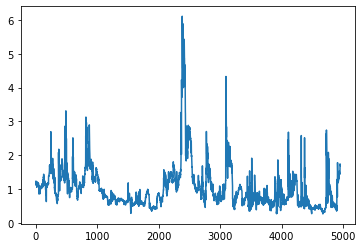

In [5]:
vols = []
for i in range (0, len(returns)-80):
    ret = returns[i:i+80]
    am = arch_model(ret, p=1, q=1)
    res = am.fit()
    forecasts = res.forecast()
    vol = np.sqrt(forecasts.variance.iloc[-1][0])
    vols.append(vol)

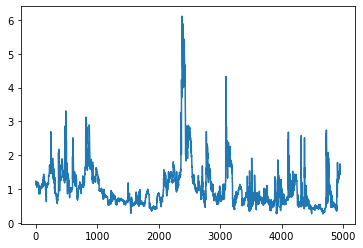

In [22]:
plt.plot([vol / 100 for vol in vols])
plt.ylim((0,0.35))
plt.show()